In [15]:
from torch import nn
import numpy as np
import torch
from torch.distributions.normal import Normal
import torch.optim as optim
import torch.utils.data

import math


zeros = torch.zeros(1, 60, 210)
# zeros = zeros.unsqueeze(0)
print(zeros.size())
conv = nn.Conv2d(1, 64, 4, stride=2, padding=1)

x = conv(zeros)
print(x.size())

conv2 = nn.Conv2d(64, 5, 3)

x = conv2(x)
print(x.size())

flatten = nn.Flatten()
x = flatten(x)

print(x.size())

dense = nn.Linear(13312, 64)
x = dense(x)

print(x.size())

# dilconv = nn.Conv2d(64, 64, (3, 3), padding=(2,1), dilation=(16,1), stride=(1,2))
# x = dilconv(x)
# print(x.size())

# conv2 = nn.Conv2d(64, 64, 3, padding='same')
# x = dilconv(x)
# print(x.size())

torch.Size([1, 60, 210])
torch.Size([64, 30, 105])
torch.Size([5, 28, 103])
torch.Size([5, 2884])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (5x2884 and 13312x64)

In [ ]:
from AutoEncoderDenoiser import SPDenoiser
import torch

zeros = torch.zeros(1, 60, 212)
zeros = zeros.unsqueeze(0)
print(zeros.size())
filters = (32, 64, 64, 64)
kernels = (3, 3, 3, 3)
strides = (1, 2, 2, 1)
latent_space_dim = 2

model = SPDenoiser(60, 210, filters, kernels, strides, latent_space_dim, device = 'cpu')

x = model(zeros)
# print(model)
print(x.size())

c:\Users\woute\.conda\envs\Diffwave\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([1, 1, 60, 212])
torch.Size([1, 1, 60, 212])
torch.Size([1, 32, 60, 212])
torch.Size([1, 64, 30, 106])
torch.Size([1, 64, 15, 53])
torch.Size([1, 64, 15, 53])
torch.Size([1, 50880])
torch.Size([1, 2])
torch.Size([1, 50880])
torch.Size([1, 64, 15, 53])
(1, 1)
torch.Size([1, 64, 15, 53])
(1, 1)
torch.Size([1, 64, 30, 106])
(1, 1)
torch.Size([1, 64, 60, 212])
torch.Size([1, 1, 60, 212])
torch.Size([1, 1, 60, 212])


In [ ]:
%load_ext autoreload

%autoreload 2

## Preprocessing Data

### Show a file

Samplerate:  32000  | OGSamplerate:  32000
Samplerate:  32000  | OGSamplerate:  44100
resampling
Clean audio: 


Noisy audio: 


Recreated clean audio: 
Samplerate:  32000


Recreated decoded clean audio: 
Samplerate:  32000


Recreated clean audio with wav2world: 
Samplerate:  32000


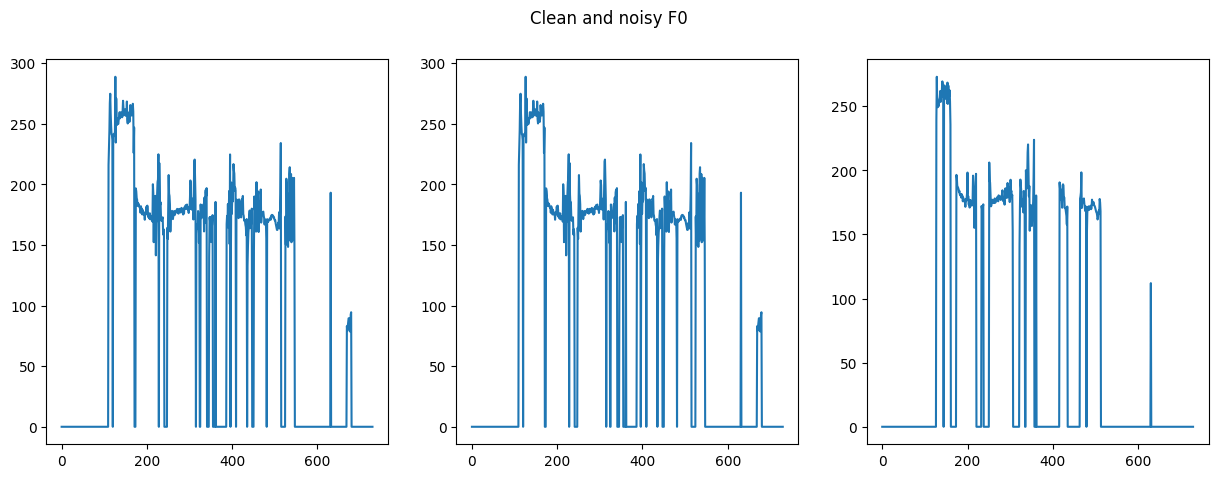

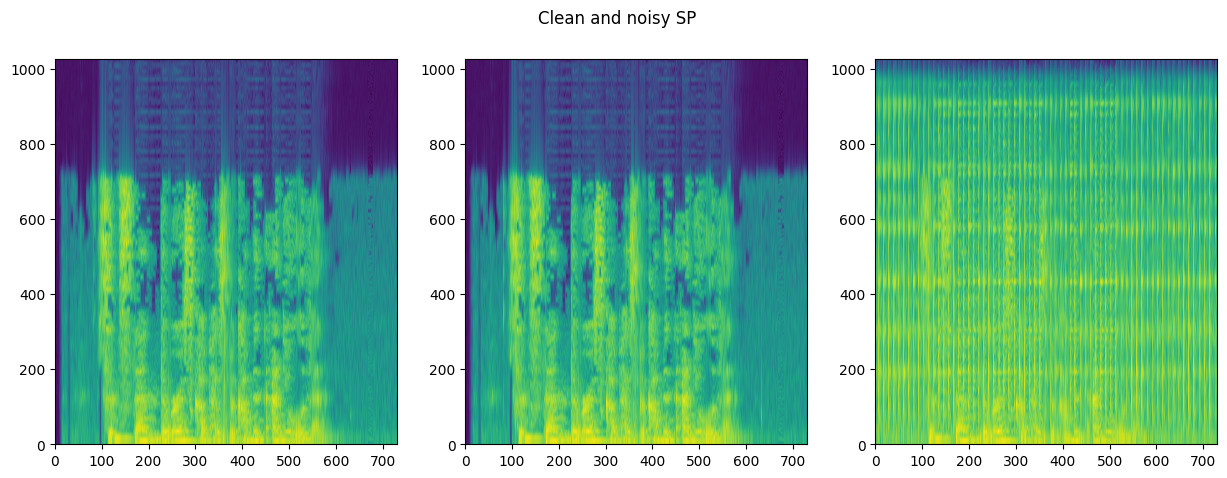

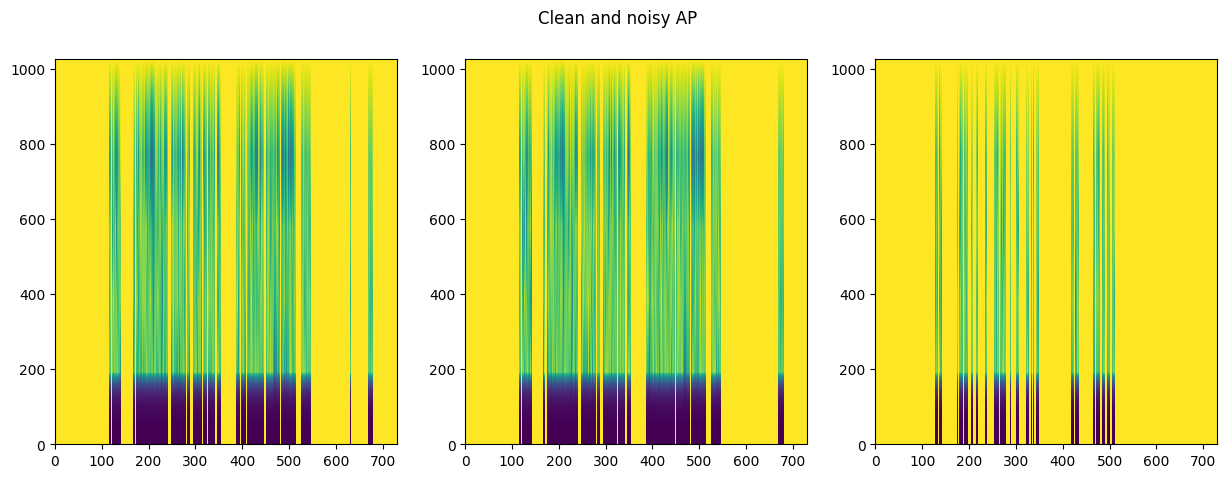

In [ ]:
from preprocess import process_wav, decode_harmonic
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import IPython
import numpy as np
import pyworld as pw
import soundfile as sf

cleanvoice = "G:/Projects/2022-2023/ConvDenoiser/dataset/voice/common_voice_en_34919893.mp3"
ambience = "G:/Projects/2022-2023/ConvDenoiser/dataset/soloambience/105029-7-1-9.wav"
plotwidth = 15
plotheight = 5

outputs = process_wav((cleanvoice, ambience))
f0 = outputs[0]
sp = outputs[1]
code_sp = outputs[2]
ap = outputs[3]
code_ap = outputs[4]
f0c = outputs[5]
spc = outputs[6]
code_spc = outputs[7]
apc = outputs[8]
code_apc = outputs[9]
cAudioSamples = outputs[10]
samplerate = outputs[11]
nAudioSamples = outputs[13]


print("Clean audio: ")
IPython.display.display(IPython.display.Audio(cAudioSamples, rate=samplerate))

print("Noisy audio: ")
IPython.display.display(IPython.display.Audio(nAudioSamples, rate=samplerate))

print("Recreated clean audio: ")
print("Samplerate: ", samplerate)
IPython.display.display(IPython.display.Audio(pw.synthesize(f0c, spc, apc, samplerate), rate=samplerate))

print("Recreated decoded clean audio: ")
print("Samplerate: ", samplerate)
IPython.display.display(IPython.display.Audio(pw.synthesize(f0c, decode_harmonic(code_spc, 2048), apc, samplerate), rate=samplerate))

print('Recreated clean audio with wav2world: ')
data, fs = sf.read(cleanvoice)
pf0, psp, pap = pw.wav2world(data, fs)
print("Samplerate: ", fs)
IPython.display.display(IPython.display.Audio(pw.synthesize(pf0, psp, pap, fs), rate=fs))
# Show F0
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(plotwidth, plotheight))
fig.suptitle("Clean and noisy F0")
ax1.plot(pf0)
ax2.plot(f0c)
ax3.plot(f0)
plt.show()
# Show SP Graphs
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(plotwidth, plotheight))
fig.suptitle("Clean and noisy SP")
ax1.pcolormesh(np.ndarray.transpose(psp, (1,0)), norm=LogNorm())
ax2.pcolormesh(np.ndarray.transpose(spc, (1,0)), norm=LogNorm())
ax3.pcolormesh(np.ndarray.transpose(sp, (1,0)), norm=LogNorm())
plt.show()
# Show coded SP Graphs
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(plotwidth, plotheight))
fig.suptitle("Clean and noisy AP")
ax1.pcolormesh(np.ndarray.transpose(pap, (1,0)))
ax2.pcolormesh(np.ndarray.transpose(apc, (1,0)))
ax3.pcolormesh(np.ndarray.transpose(ap, (1,0)))

plt.show()

### Preprocess a bunch of files

In [ ]:
from preprocess import startProcessing

voicefolder = "H:/Downloads/DS_10283_1942/clean_trainset_wav/"
noisefolder = "G:/Projects/2022-2023/ConvDenoiser/dataset/ambience/"
exportfolder = "G:/Projects/2022-2023/ConvDenoiser/dataset/output5/"
savepathy = ""

startProcessing(savepathy, voicefolder, noisefolder, exportfolder, 'All')

[['H:/Downloads/DS_10283_1942/clean_trainset_wav/p226_168.wav', 'G:/Projects/2022-2023/ConvDenoiser/dataset/ambience/157866-8-0-23.wav'], ['H:/Downloads/DS_10283_1942/clean_trainset_wav/p226_086.wav', 'G:/Projects/2022-2023/ConvDenoiser/dataset/ambience/137815-4-0-2.wav'], ['H:/Downloads/DS_10283_1942/clean_trainset_wav/p226_294.wav', 'G:/Projects/2022-2023/ConvDenoiser/dataset/ambience/174786-2-0-27.wav'], ['H:/Downloads/DS_10283_1942/clean_trainset_wav/p226_183.wav', 'G:/Projects/2022-2023/ConvDenoiser/dataset/ambience/159726-3-0-0.wav'], ['H:/Downloads/DS_10283_1942/clean_trainset_wav/p226_015.wav', 'G:/Projects/2022-2023/ConvDenoiser/dataset/ambience/105029-7-2-14.wav'], ['H:/Downloads/DS_10283_1942/clean_trainset_wav/p227_090.wav', 'G:/Projects/2022-2023/ConvDenoiser/dataset/ambience/207211-2-0-89.wav'], ['H:/Downloads/DS_10283_1942/clean_trainset_wav/p226_177.wav', 'G:/Projects/2022-2023/ConvDenoiser/dataset/ambience/157866-8-0-6.wav'], ['H:/Downloads/DS_10283_1942/clean_trainset

 22%|██▏       | 442/2000 [07:27<26:19,  1.01s/it]



Enjoy your freshly processed files


## DAE try

In [ ]:
from WavenetDenoiser import SPWavenetDenoiser
import torch

modeltje = SPWavenetDenoiser(60, device='cpu')
inputje = torch.rand((60, 120))
paddy = torch.nn.ConstantPad1d((136, 0), 0)(inputje)
print(paddy.size())
# print(inputje.size()[2])
# output = modeltje(inputje)

# print(output.size())

Receptive field = 4
torch.Size([60, 256])


### Test one item in dataloader

In [ ]:
import matplotlib.pyplot as plt
from WavenetDenoiser import SPWavenetDenoiser, WavenetDataset, TimbreDataset
from torch.utils.data import DataLoader

# spdataset = TimbreDataset("H:/Projects/2022-2023/ConvDenoiser/dataset/output4/sp/", "H:/Projects/2022-2023/ConvDenoiser/dataset/output4/csp/", 256)
# # sptestdataset = SPDataset("H:/Projects/2022-2023/ConvDenoiser/dataset/output/testsp/", "H:/Projects/2022-2023/ConvDenoiser/dataset/output/testcsp/")
spdataloader = DataLoader(spdataset, batch_size=1, shuffle=True, pin_memory=False)


# for x, y in spdataloader:
x, y = next(iter(spdataloader))

print(x[0].size())
print(x[1].size())
# print(x[1].size())
print(y.size())

plt.pcolormesh(x[0][0].squeeze().cpu().detach().numpy())
plt.title("Clean Input Coded SP")
plt.show()

plt.pcolormesh(x[0][1].squeeze().cpu().detach().numpy())
plt.title("Noisy Condition Coded SP")
plt.show()

plt.pcolormesh(y[0].squeeze().cpu().detach().numpy())
plt.title("Clean Target Coded SP")
plt.show()

# plt.pcolormesh(z[0][0].cpu().detach().numpy())
# plt.title("Noisy Coded SP")
# plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'H:/Projects/2022-2023/ConvDenoiser/dataset/output4/csp/'

### Setup variables for training

In [1]:
from models.VAEDenoiser import SPDenoiser, SPDataset
import torch
from torch import nn
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader

learning_rate = 1e-4
batchsize = 128
epochs = 5
# loss_fn = torch.nn.MSELoss()
loss_fn = torch.nn.BCEWithLogitsLoss()
device='cuda'

# Model hyperparameters
features = 60
rec_field = 8
hidden_channels = 768
latent_space_dim = 128
embedding_dim = 64

spdenoiser = SPDenoiser(features, rec_field, hidden_channels, embedding_dim, latent_space_dim, device)
spdenoiser.to(device)
print('Model: ', spdenoiser)

# spdataset = TimbreDataset("G:/Projects/2022-2023/ConvDenoiser/dataset/output5/sp/", "G:/Projects/2022-2023/ConvDenoiser/dataset/output5/csp/", 256)
# sptestdataset = TimbreDataset("G:/Projects/2022-2023/ConvDenoiser/dataset/output4test/sp/", "G:/Projects/2022-2023/ConvDenoiser/dataset/output4test/csp/", 256)
spdataset = SPDataset("./traindataset/sp/", "./traindataset/csp/", segments = rec_field)
sptestdataset = SPDataset("./testdatset/sp/", "./testdatset/csp/", segments = rec_field)

spdataloader = DataLoader(spdataset, batch_size=batchsize, shuffle=True, pin_memory = False)
sptestdataloader = DataLoader(sptestdataset, batch_size=64, shuffle=False, pin_memory = False)


spdenoiser.to(device)

optimizer=torch.optim.Adam(spdenoiser.parameters(), lr=1e-4)
print(spdenoiser.parameters())
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
lossy = 0
step = 0

device_count = torch.cuda.device_count()

# if device_count > 1:
#     spdenoiser = nn.DataParallel(spdenoiser)
#     print('multiple device using :', device_count)

Dense size: 256
Model:  SPDenoiser(
  (encoder): Encoder(
    (duo_conv_1): DoubleConvStack(
      (convlayer_1): Conv1d(60, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (convlayer_2): Conv1d(768, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (leaky): LeakyReLU(negative_slope=0.01)
    )
    (duo_conv_2): DoubleConvStack(
      (convlayer_1): Conv1d(768, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (convlayer_2): Conv1d(768, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (leaky): LeakyReLU(negative_slope=0.01)
    )
    (strided_convolution): Conv1d(768, 768, kernel_size=(4,), stride=(1, 2), padding=(1,))
    (residual_stack): ResidualStack(
      (layers): ModuleList(
        (0): ResidualBlock(
          (resBlock): Sequential(
            (0): ReLU(inplace=True)
            (1): Conv1d(768, 768, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
            (2): ReLU(inplace=True)
            (3): Conv1d(768, 768, kernel_size=(1,), stri

Loading files to dataset: 100%|███████████████████████████████████████████████████████████████████████████████████| 4423/4423 [00:09<00:00, 471.83it/s]


Directories:  ./testdatset/sp/ | ./testdatset/csp/
Noisy file amount:  19
Clean file amount:  19


Loading files to dataset: 100%|███████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 360.15it/s]


<generator object Module.parameters at 0x7f2e17c08c10>


### Quick parameter test

In [2]:
from models.VAEDenoiser import SPDenoiser
import torch

device='cuda'

# Model hyperparameters
features = 60
rec_field = 256
hidden_channels = 768
latent_space_dim = 128
embedding_dim = 64

spdenoiser = SPDenoiser(features, rec_field, hidden_channels, embedding_dim, latent_space_dim, device, True)
spdenoiser.to(device)

testinput = torch.rand((1,1,60,256)).to(device)
testcondition = torch.rand((1,1,60,256)).to(device)
testoutput = spdenoiser(testinput)

# inny = testinput.view(testinput.size(0), -1)
# outy = inny.view(testinput.size())

print(inny.size())
print(outy.size())

Dense size: 8192
Input size:  torch.Size([1, 1, 60, 256])
##################
Encoder preconv size:  torch.Size([1, 1, 60, 256])


AttributeError: 'DoubleConvStack' object has no attribute 'convlayer1'

### Train model

In [2]:
from util import CGM_loss, sample_from_CGM
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
from torch import nn
writer = SummaryWriter()

# BCE_loss = nn.BCELoss()

# def reconst_loss(y_target, y_predicted):
#     error = y_target - y_predicted
#     reconstruction_loss = torch.mean(torch.square(error), dim=[1,2,3])
#     return reconstruction_loss

def combined_loss(x, target, mu, log_var):
    reproduction_loss = loss_fn(x, target)
    KLD      = - 0.5 * torch.mean(1+ log_var - mu.pow(2) - log_var.exp())
    
    # print("x:",torch.min(x), torch.max(x), torch.isnan(x).sum().item())
    # print("mu:",torch.min(mu), torch.max(mu), torch.isnan(mu).sum().item())
    # print("log_var:",torch.min(log_var), torch.max(log_var), torch.isnan(log_var).sum().item())
    # print("target:",torch.min(target), torch.max(target), torch.isnan(target).sum().item())
    
    # kl_divergence = - 0.5 * torch.sum(1+ log_var - mu.pow(2) - log_var.exp())
    # # print(kl_divergence)
    # # loss = nn.functional.binary_cross_entropy(x, target, reduction='sum') + kl_divergence
    # loss = loss_fn(x, target) + kl_divergence
    
    # print(loss)

    return reproduction_loss + KLD * 0.001


spdenoiser.train()
epochs = 20

def adjust_learning_rate(start_epoch, epoch, lr, optimizer):

    real_epoch = start_epoch + epoch
    lr = lr / (1 + 0.00001 * real_epoch)

    print('lr '+str(lr)+'  epoch  '+str(real_epoch))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

def gen_plot(noisy, denoised, clean):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle("Test MSFC result")
        ax1.pcolormesh(noisy)
        ax2.pcolormesh(denoised)
        ax3.pcolormesh(clean)
        return fig

def validate(epoch):
        spdenoiser.eval()

        total_loss = 0
        epoch_step = 0
        for (x, target) in iter(sptestdataloader):
            condi = x.to(device)

            target = target.to(device)

            output, mean, var = spdenoiser(condi)
            # loss = loss_fn(output, target)
            loss = combined_loss(output, target, mean, var)

            loss = loss.item()

            total_loss += loss
            epoch_step += 1

        spdenoiser.train()
        avg_loss = total_loss/epoch_step
        return avg_loss

print(len(spdataloader))
start_epoch = 0

for epoch in range(epochs):
    lossy = 0
    step = 0

    with tqdm(enumerate(spdataloader),total=len(spdataloader),desc=f"Training. Epoch: {epoch}. Loss for step {step}: {lossy}") as t:
        for batch_idx, (x) in t:
            optimizer.zero_grad()
            step = batch_idx + 1

            x_train = x.to('cuda').requires_grad_()
            # target = target.to('cuda').requires_grad_()

            x_hat, mu, sigma = spdenoiser(x_train)
            # print("Output: ", output.size())
            # print("Y train: ", y_train.size())
            
            loss = combined_loss(x_hat, x_train, mu, sigma)
            # loss = ((x_train - output)**2).sum() + kl.sum()
            
            
            loss.backward()
            # for name, param in spdenoiser.named_parameters():
            #     print(name, param.grad)
            lossy += loss.item()
            
            optimizer.step()

            t.set_description(f"Training. Epoch: {epoch}. Average loss for step {step}: {lossy / step}")

    # test_loss = validate(epoch)
    writer.add_scalar('Train loss', lossy / step, epoch)
    # writer.add_scalar('Test loss', test_loss, epoch)

writer.flush()
torch.save(spdenoiser.state_dict(), "./BigTrainModelNPSS")

2023-02-06 15:53:49.027210: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-06 15:53:50.354380: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/cuda11.2-cudnn8.1.0/targets/x86_64-linux/lib/
2023-02-06 15:53:50.354504: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/cuda11.2-cudnn8.1.0/targets/x86_64-linux/lib/
2023-02-06 15:53:50.

21657


Training. Epoch: 0. Average loss for step 21657: 0.5825560039450556: 100%|███████████████████████████████████████| 21657/21657 [12:37<00:00, 28.59it/s]
Training. Epoch: 1. Average loss for step 7966: 0.5816197331874119:  37%|███████████████                          | 7966/21657 [04:38<07:58, 28.60it/s]


KeyboardInterrupt: 

### Save Model

In [ ]:
writer.flush()
torch.save(spdenoiser.state_dict(), "./exports/firstDae")

### Test Model

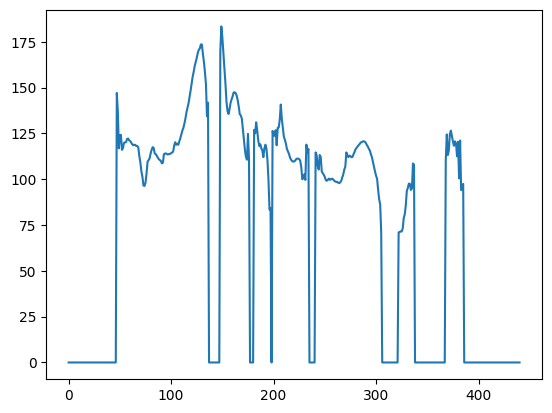

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from WavenetDenoiser import SPWavenetDenoiser
from util import sample_from_CGM
import pyworld as pw
import soundfile as sf
import IPython
from preprocess import decode_harmonic, process_wav

x, fs = sf.read("G:/Projects/2022-2023/Butternut Box/Kieskeurig/Clip 5.wav")
f0, sp, ap = pw.wav2world(x, fs)

plt.plot(f0)
plt.show()

(1, 60)
[]
torch.Size([1, 1, 60, 256])
torch.Size([1, 60, 8])
torch.Size([60, 8])


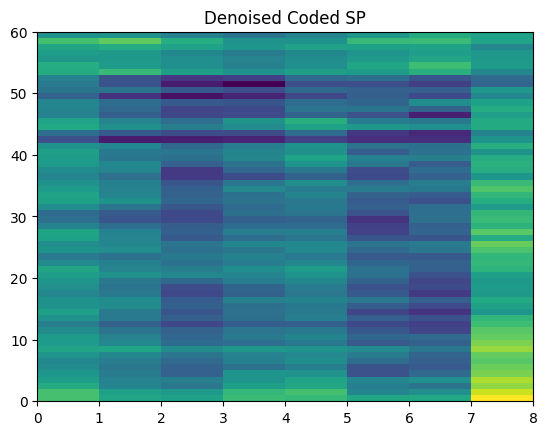

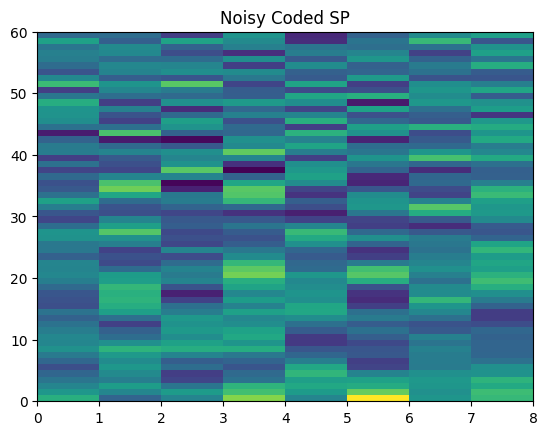

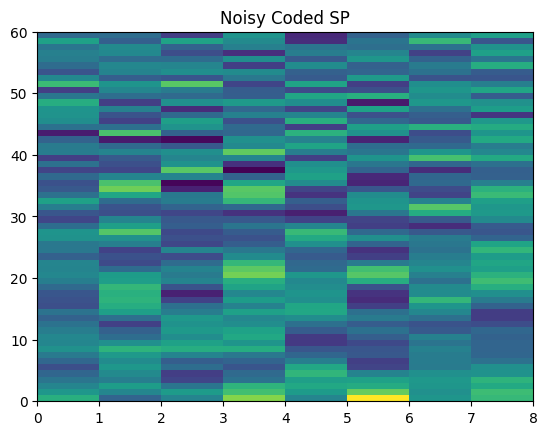

Training. Epoch: 1. Loss for step 7967: 4633.182794570923:   0%|                                                                 | 0/2 [00:00<?, ?it/s]

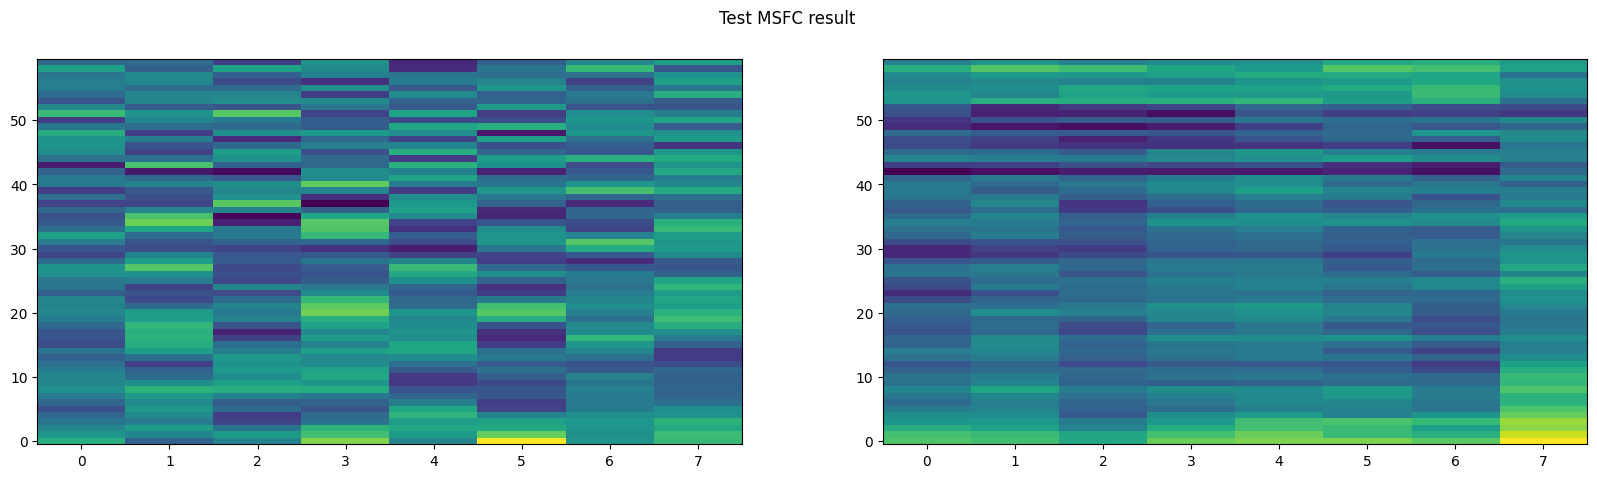

Training. Epoch: 1. Loss for step 7967: 4633.182794570923:  50%|████████████████████████████▌                            | 1/2 [00:00<00:00,  4.17it/s]

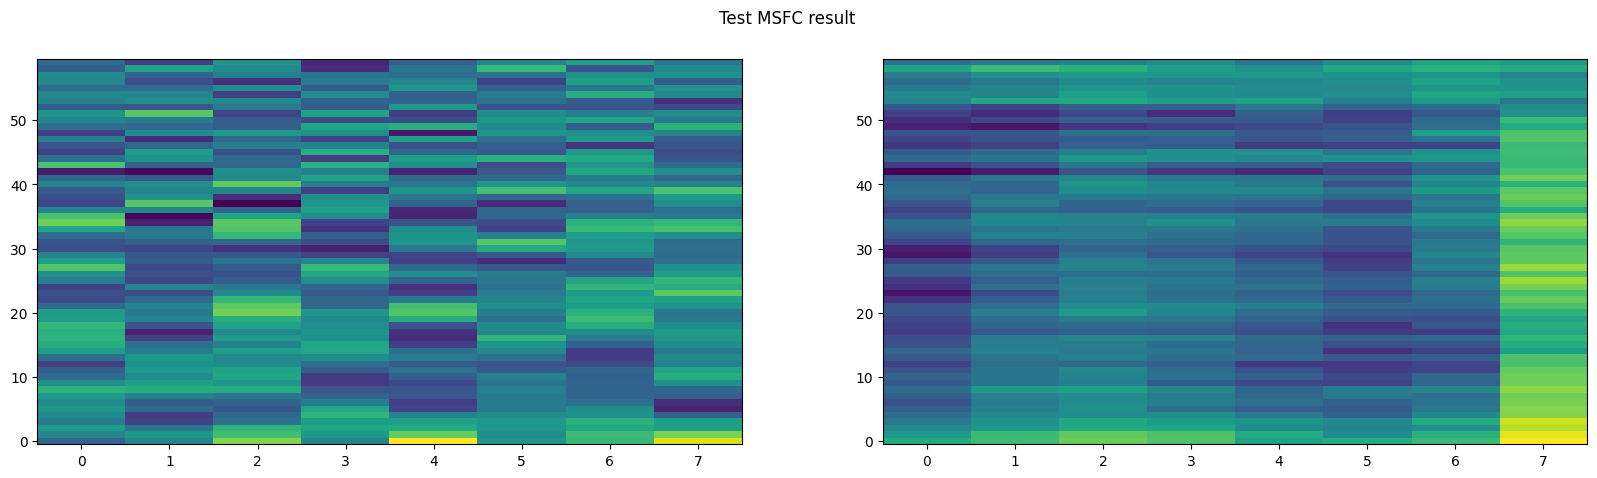

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 100%|█████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.15it/s]

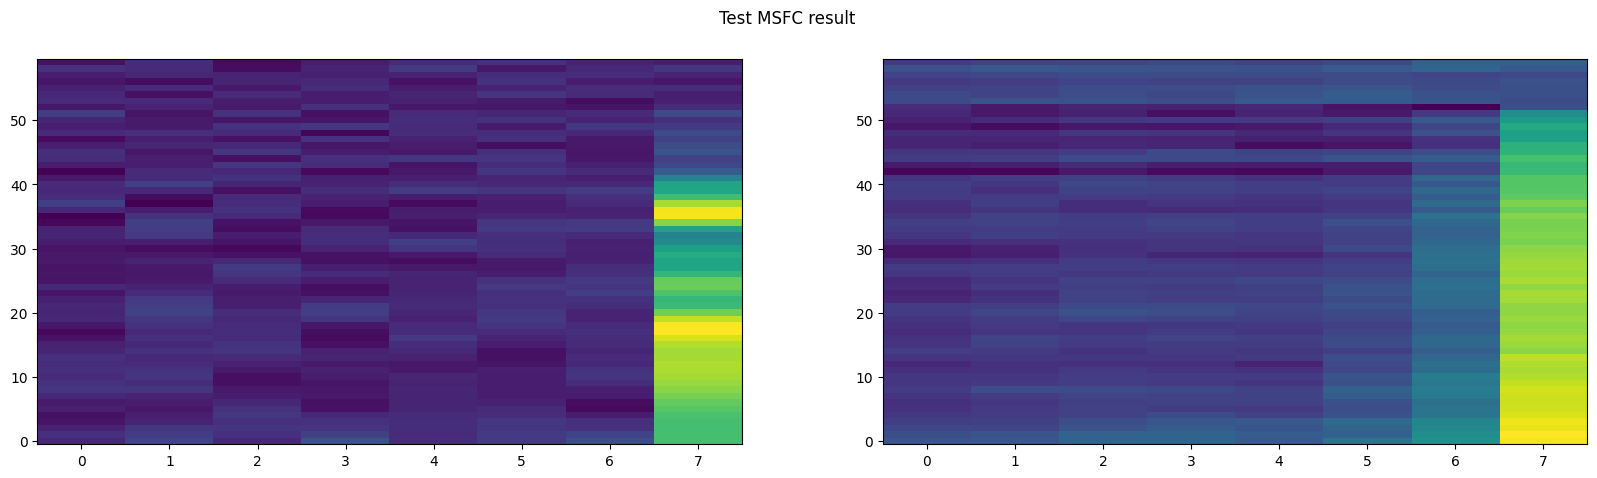

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 3it [00:00,  4.14it/s]                                                                      

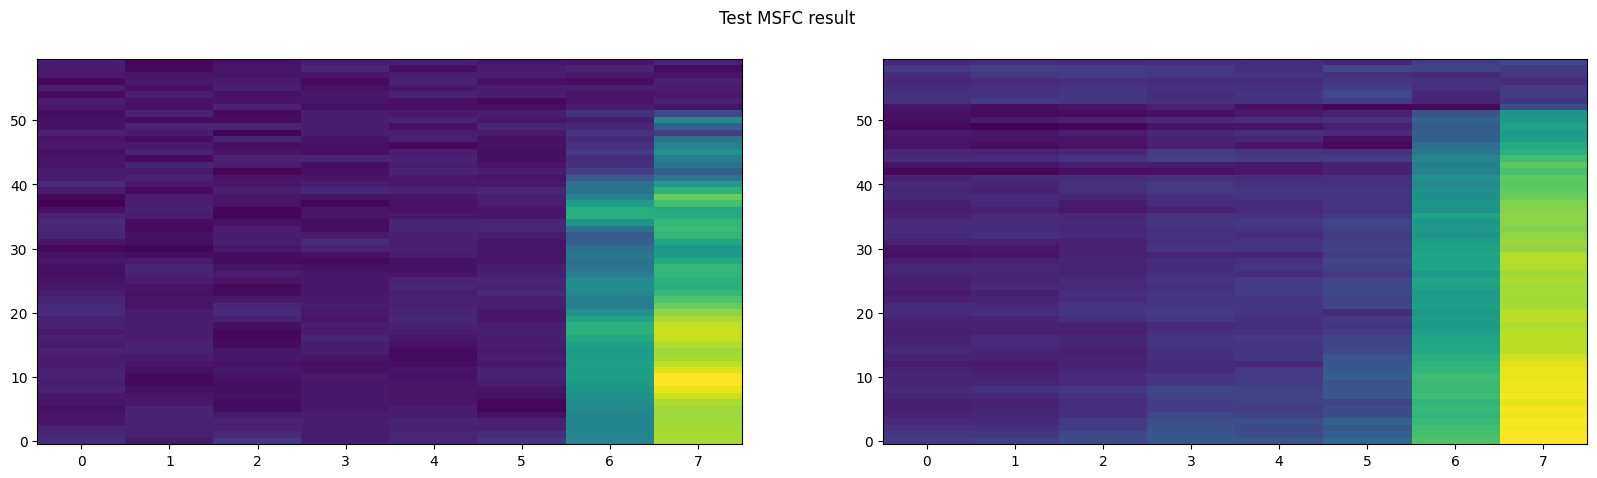

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 4it [00:00,  4.14it/s]

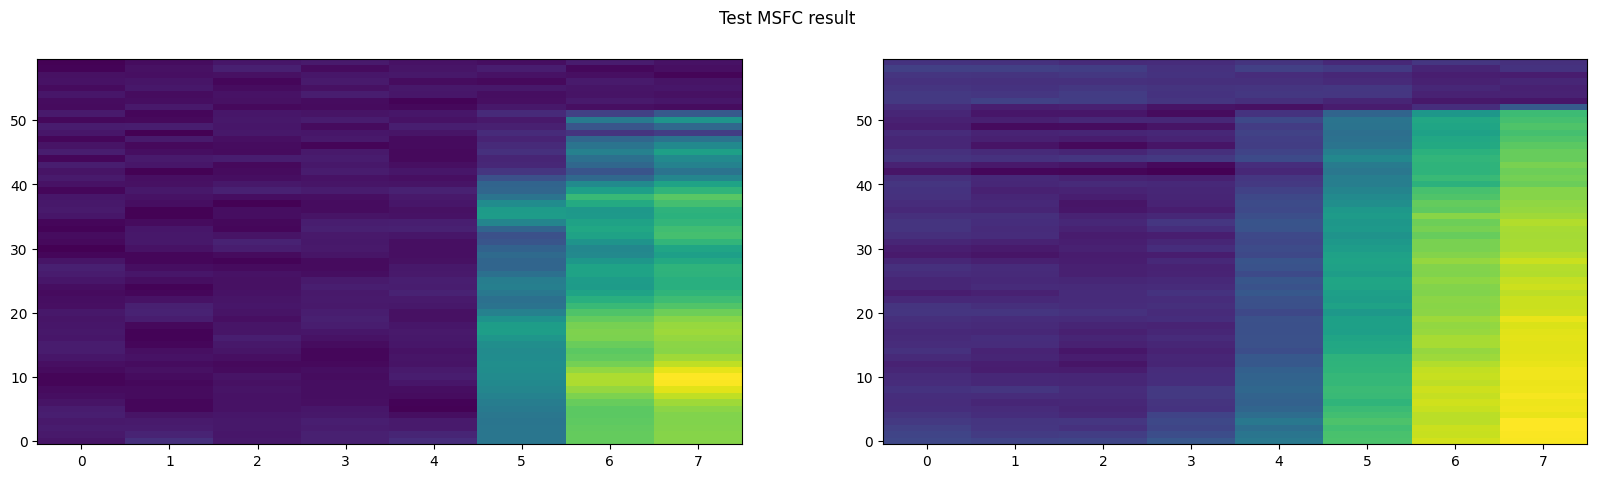

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 5it [00:01,  4.14it/s]

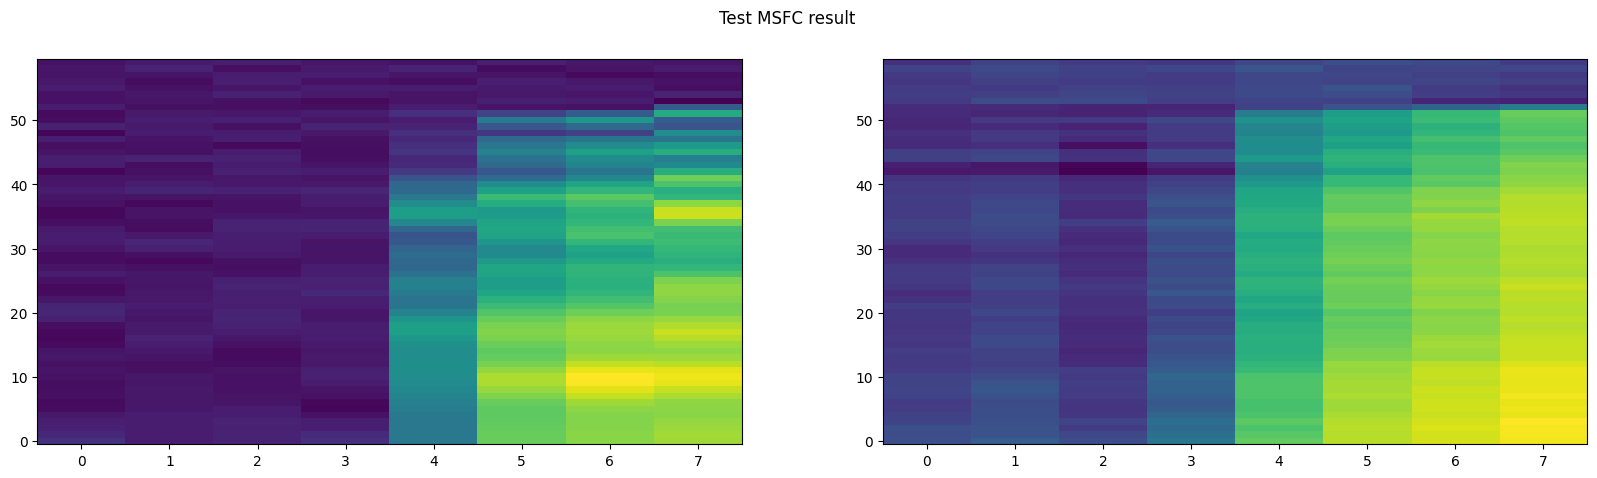

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 6it [00:01,  4.14it/s]

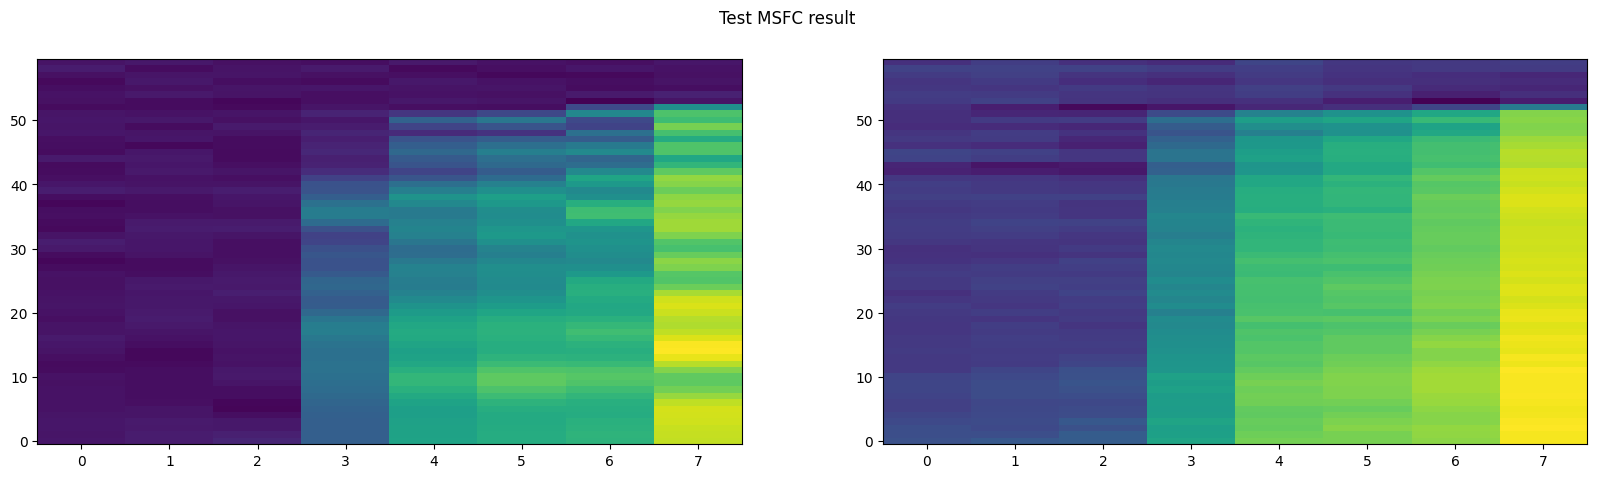

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 7it [00:01,  4.13it/s]

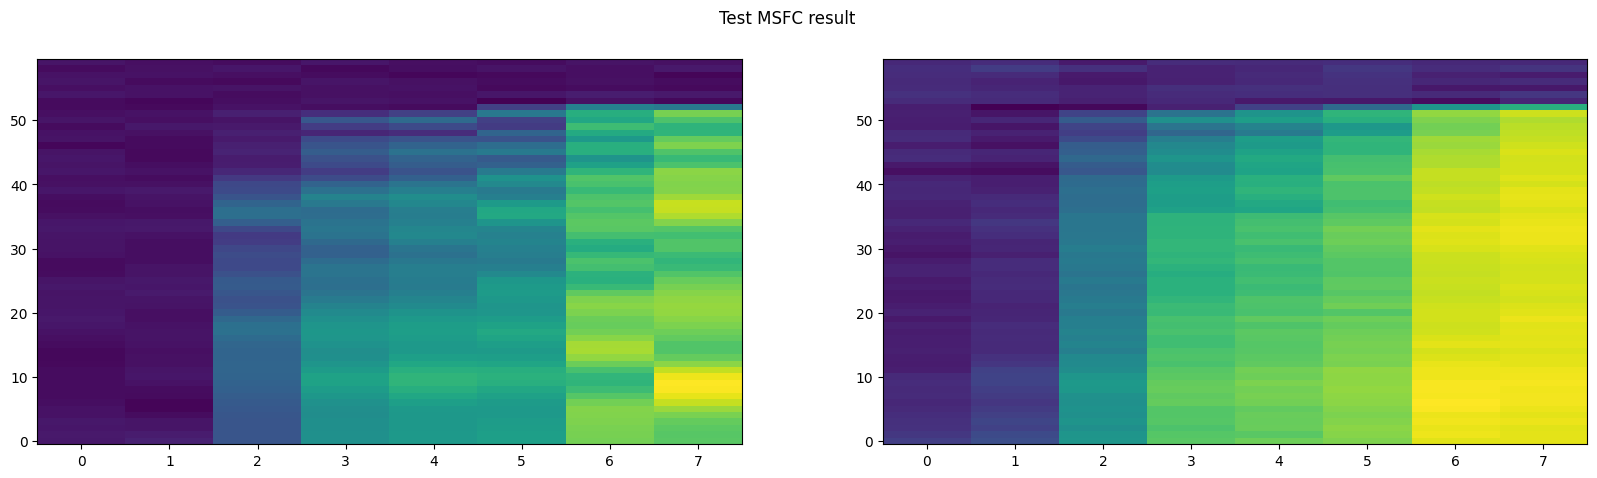

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 8it [00:01,  4.14it/s]

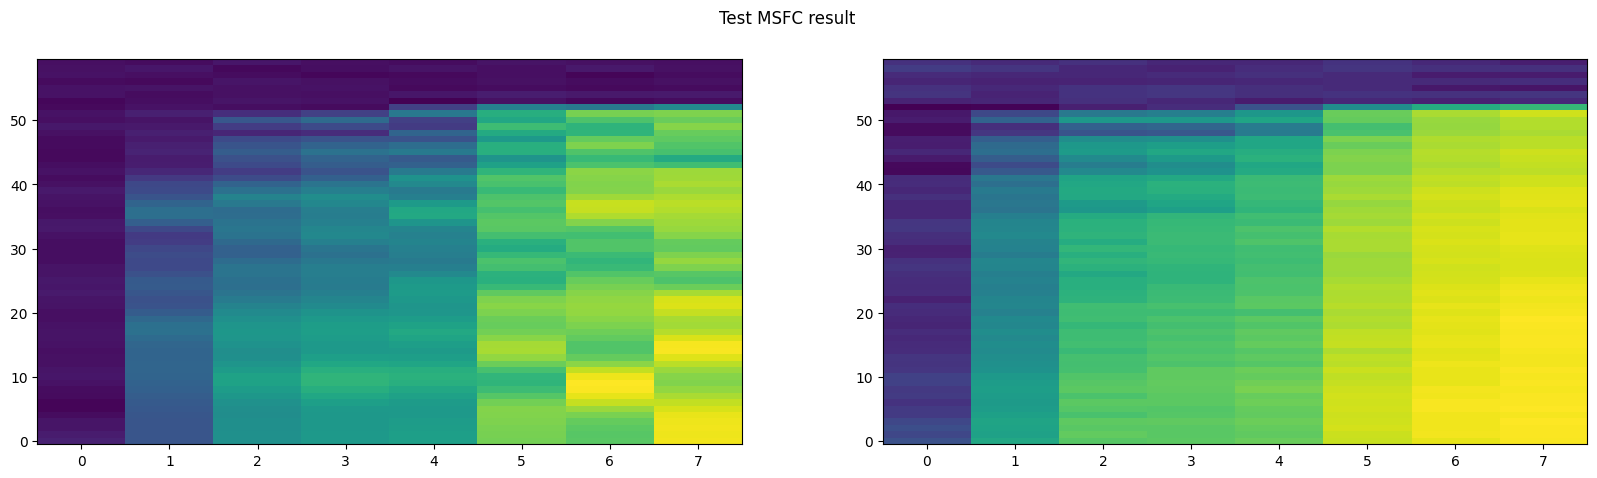

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 9it [00:02,  4.10it/s]

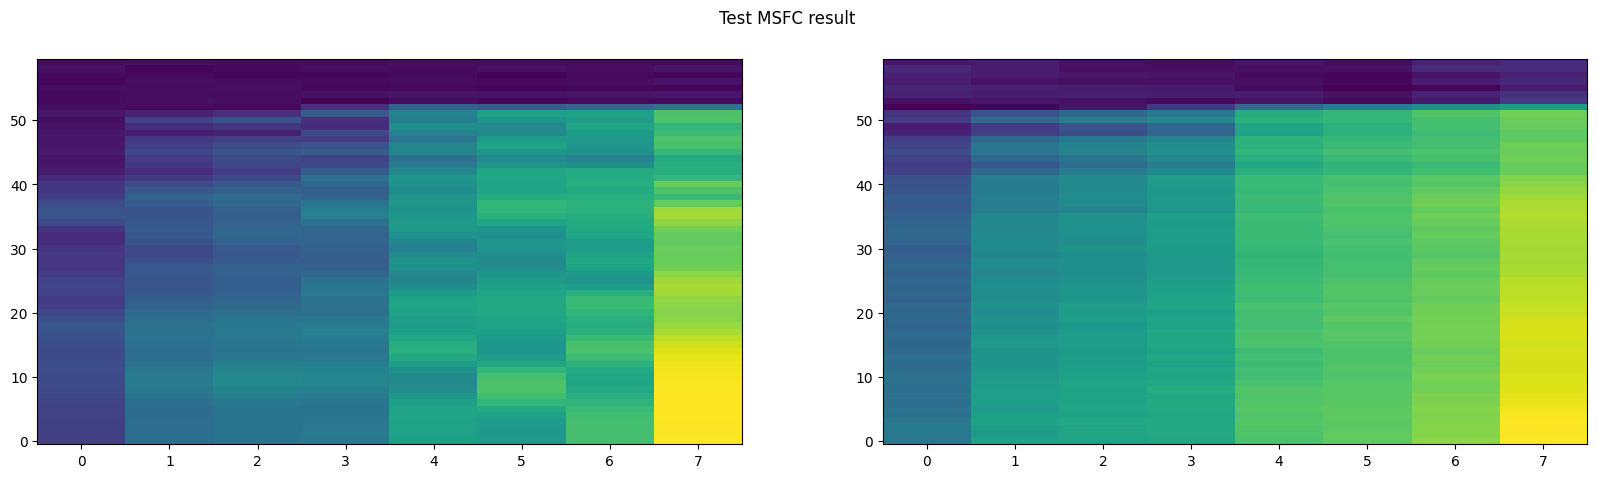

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 10it [00:02,  4.11it/s]

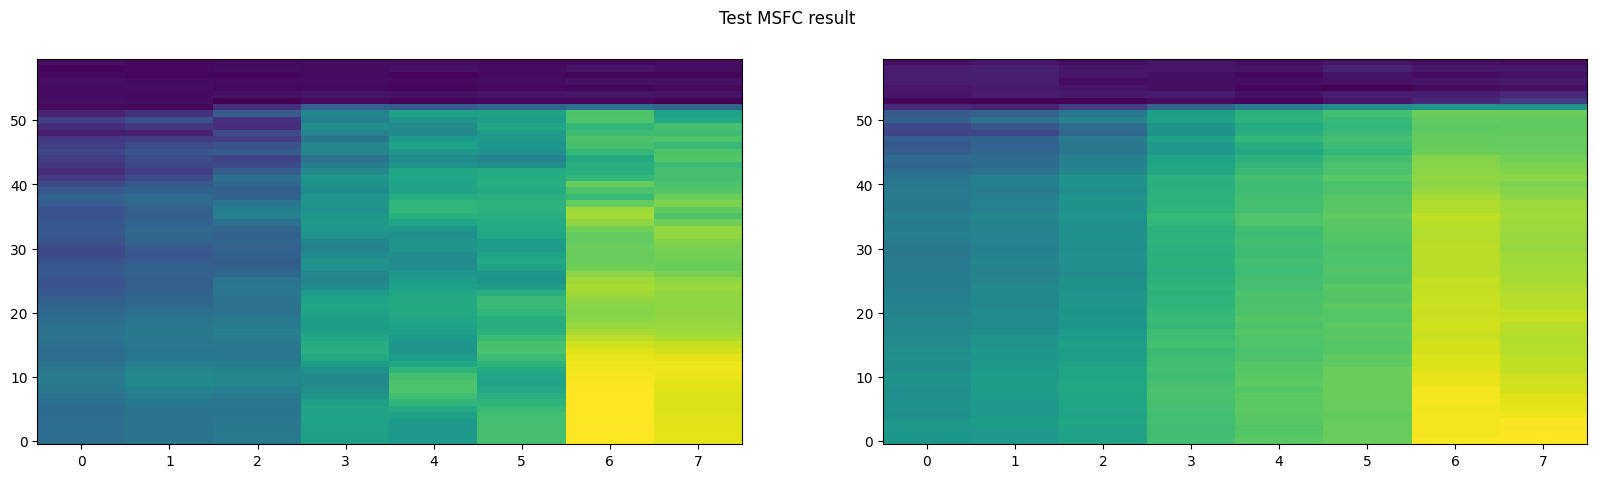

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 11it [00:03,  2.07it/s]

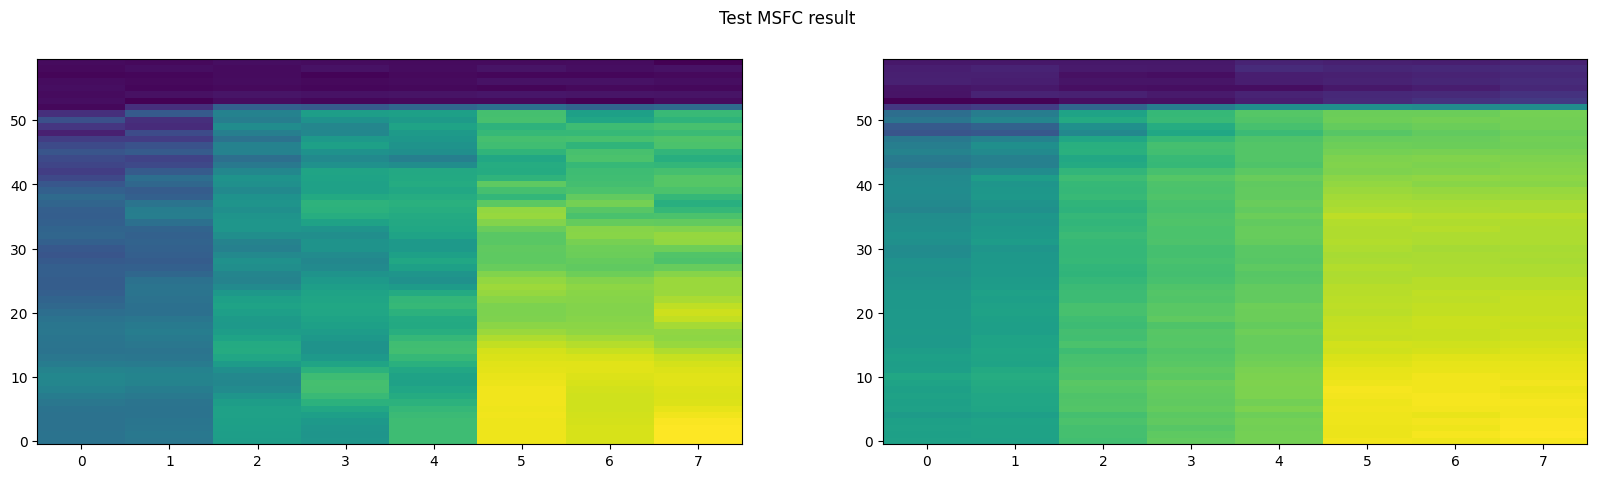

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 12it [00:03,  2.43it/s]

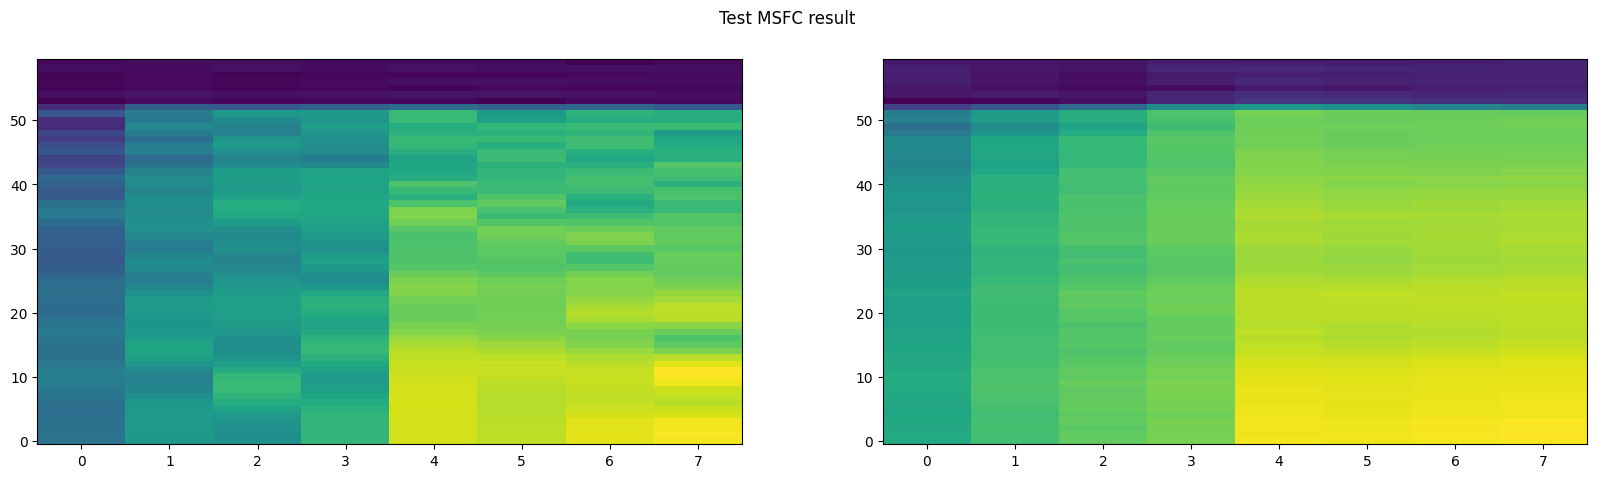

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 13it [00:03,  2.77it/s]

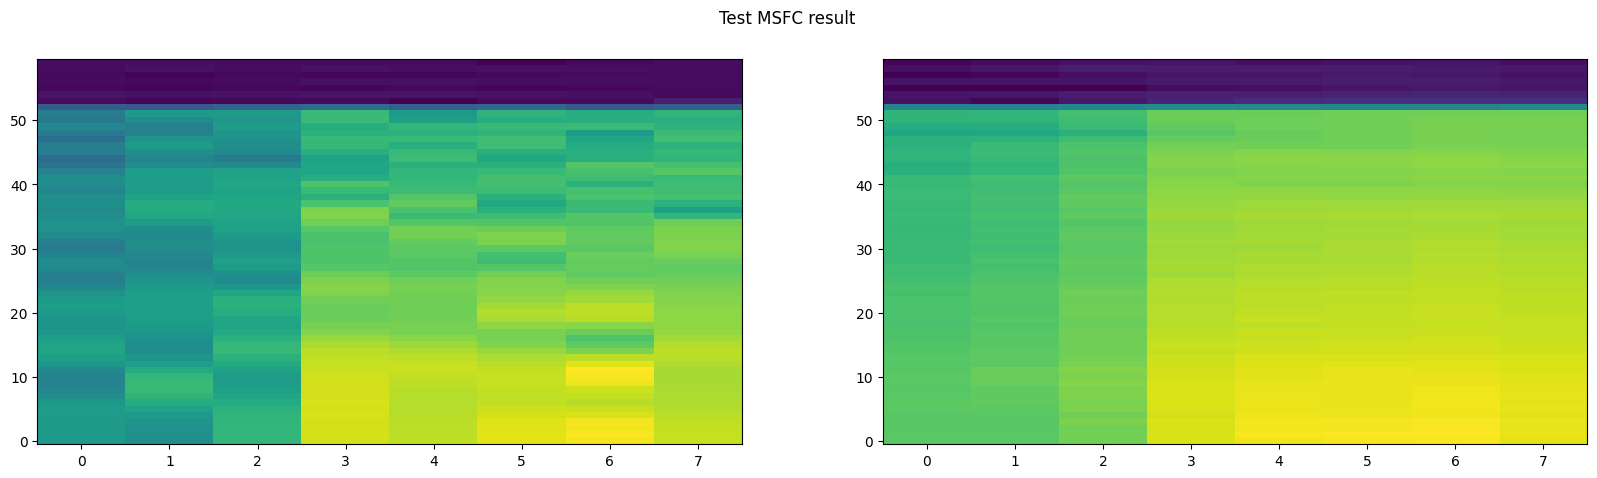

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 14it [00:04,  3.07it/s]

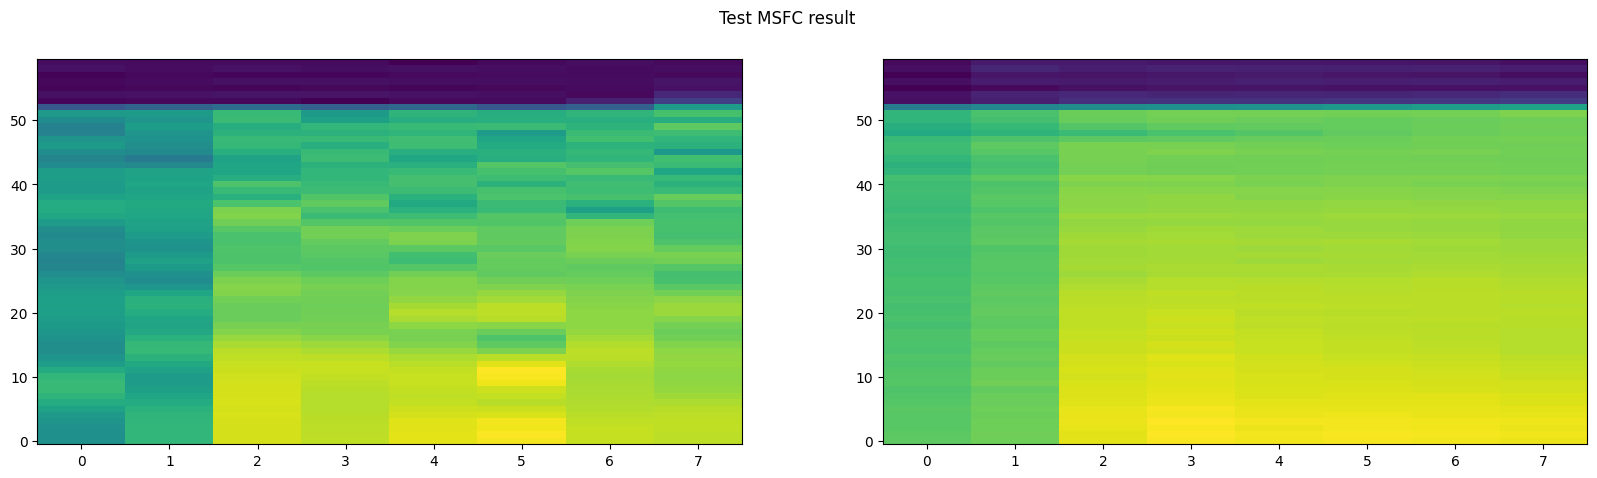

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 15it [00:04,  3.32it/s]

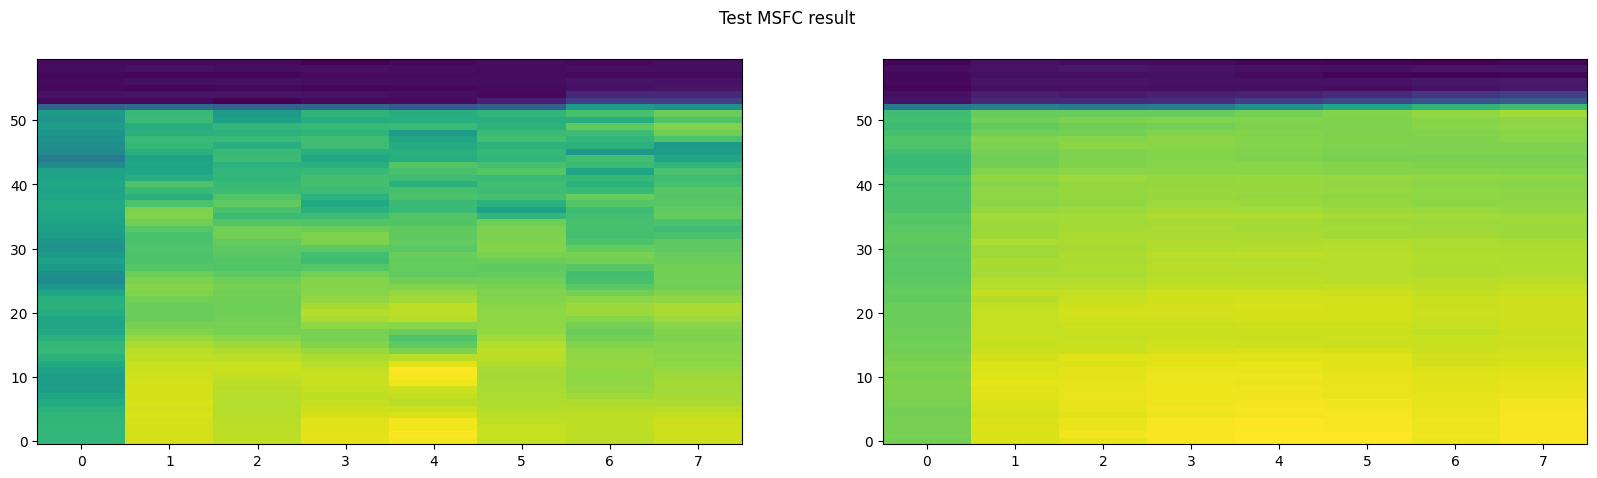

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 16it [00:04,  3.53it/s]

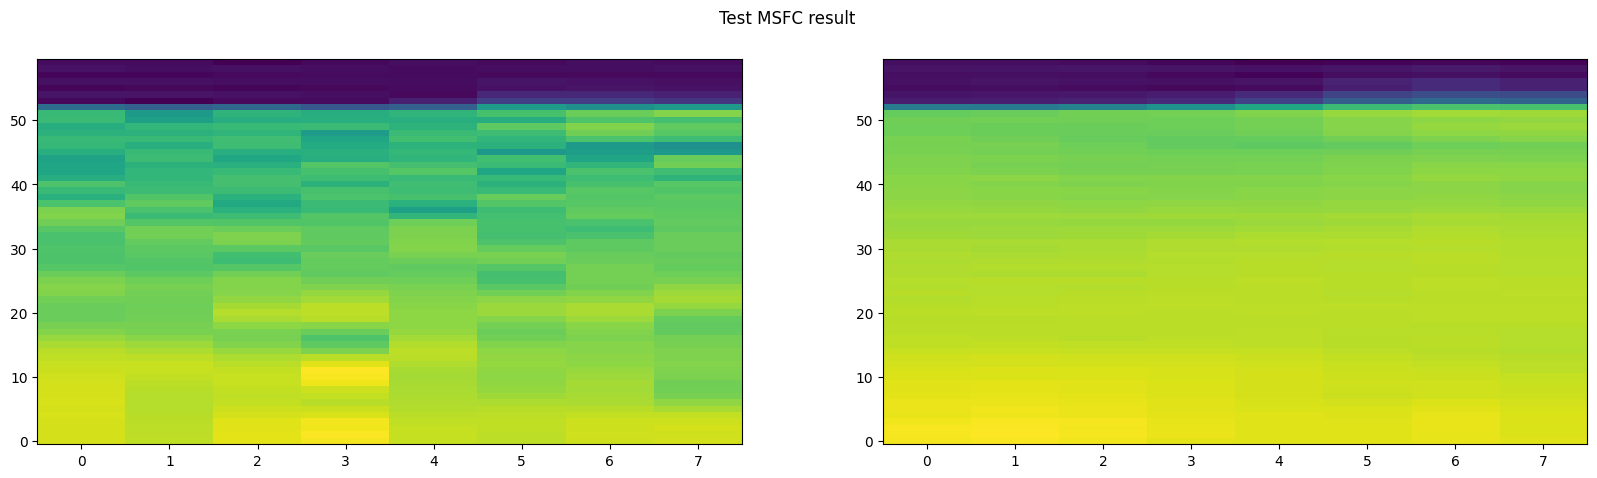

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 17it [00:04,  3.70it/s]

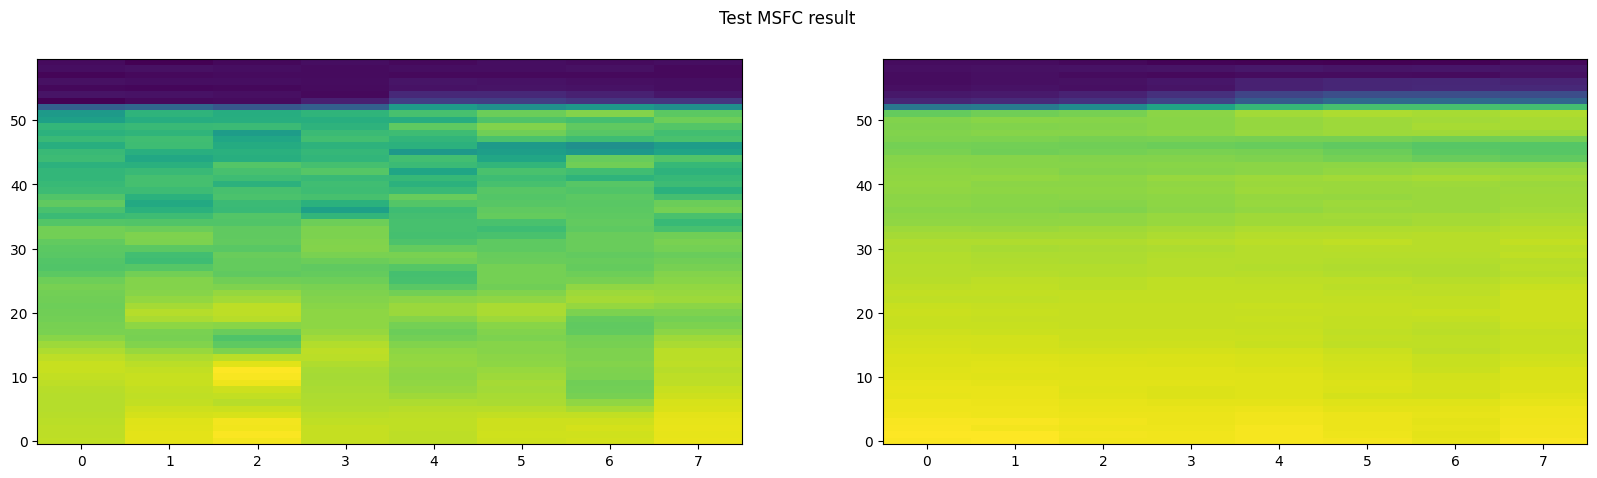

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 18it [00:05,  3.82it/s]

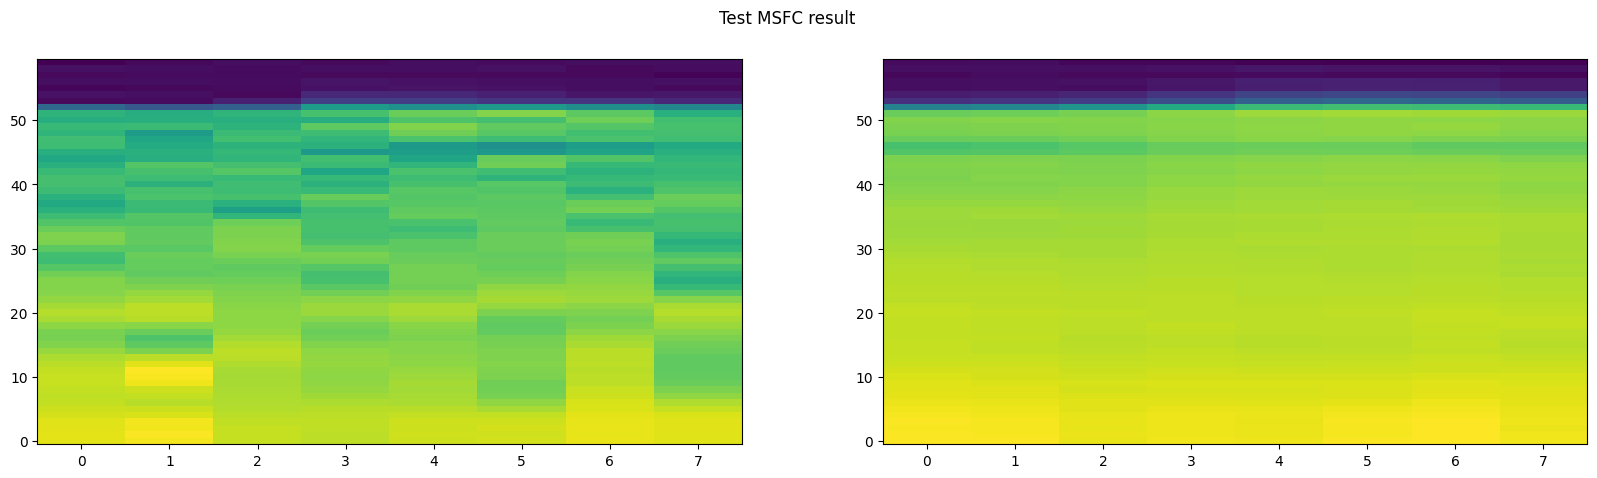

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 19it [00:05,  3.89it/s]

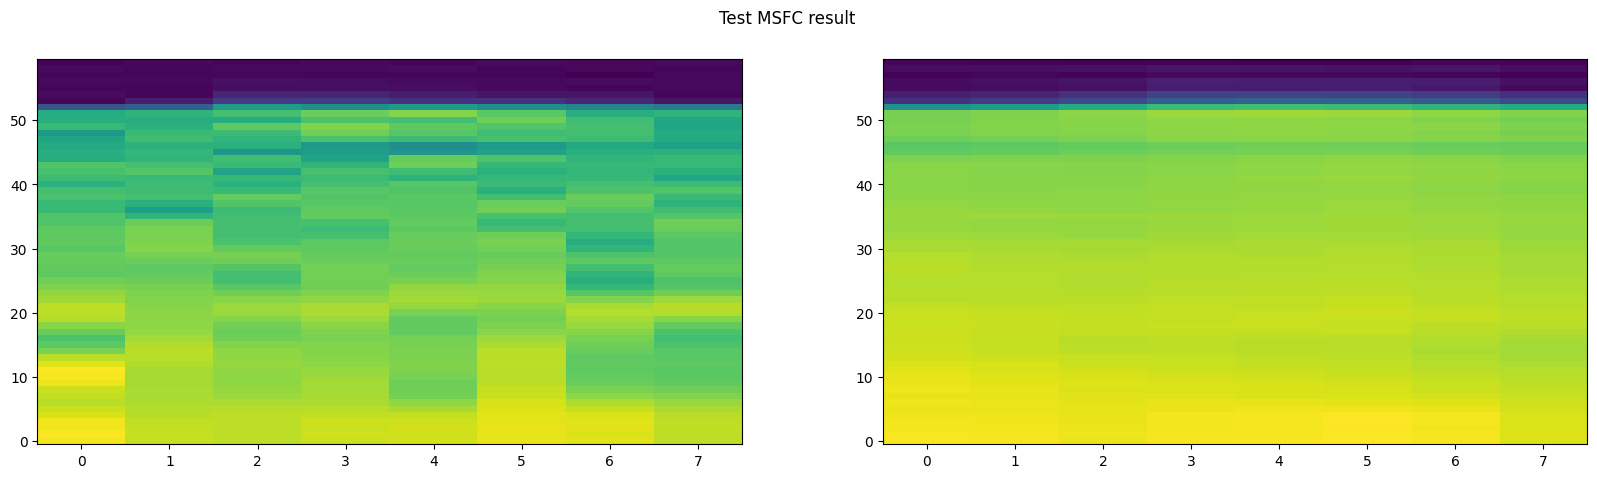

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 20it [00:05,  3.94it/s]

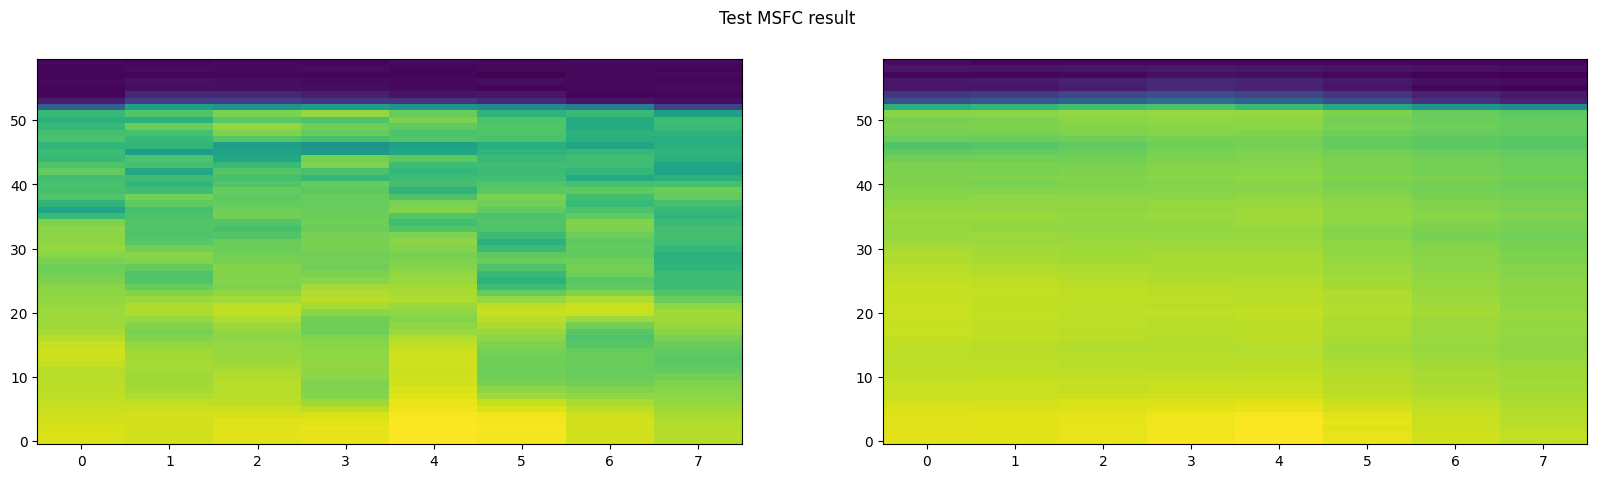

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 21it [00:05,  4.00it/s]

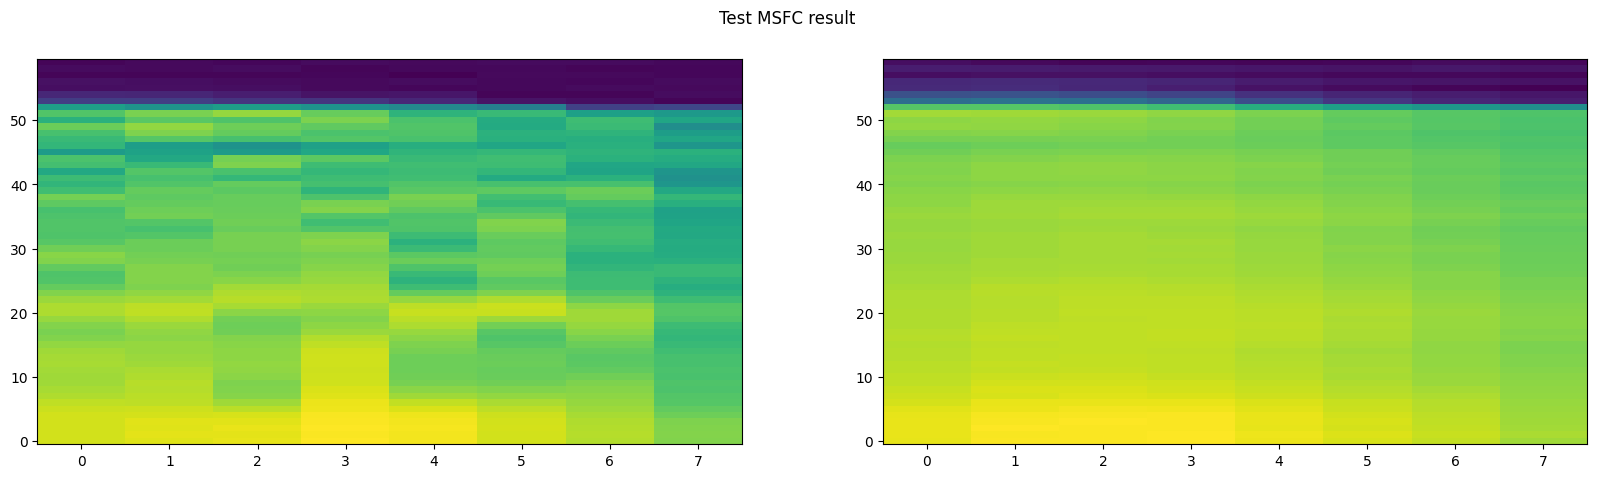

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 22it [00:06,  4.03it/s]

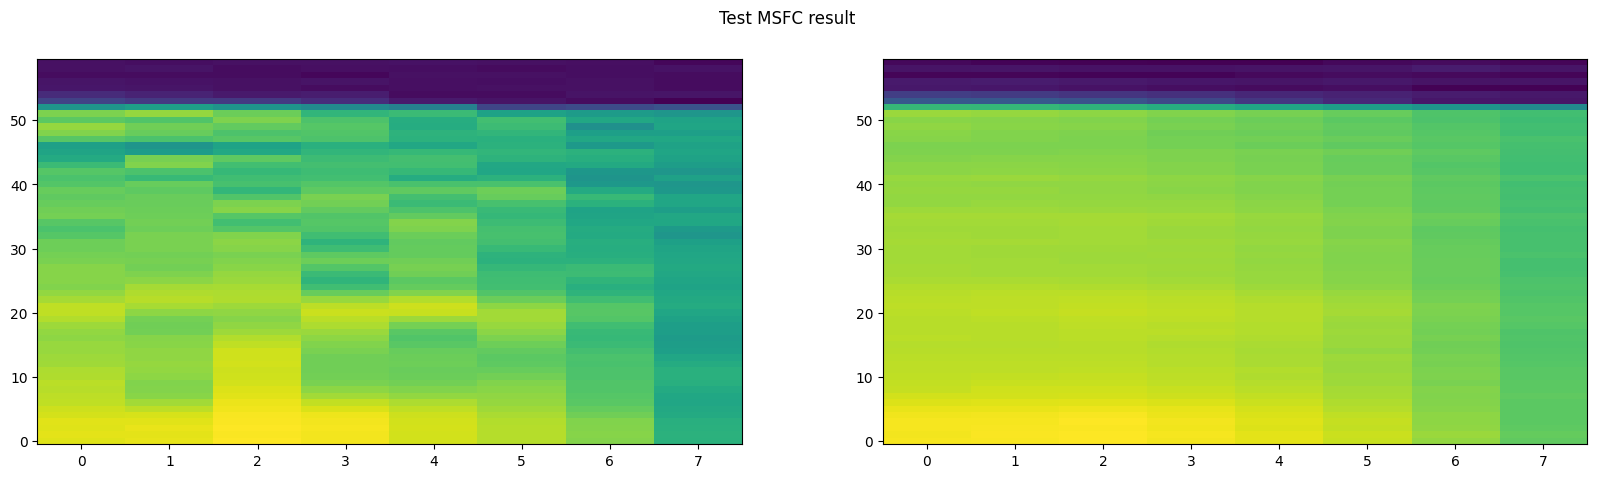

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 23it [00:06,  4.06it/s]

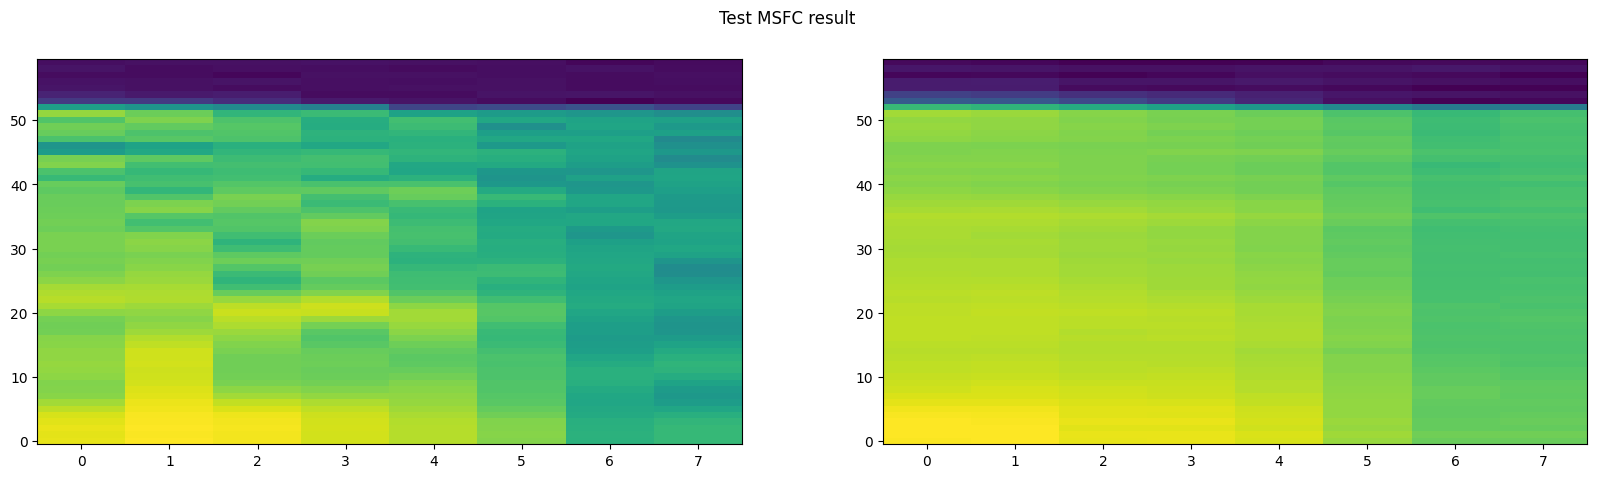

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 24it [00:06,  4.07it/s]

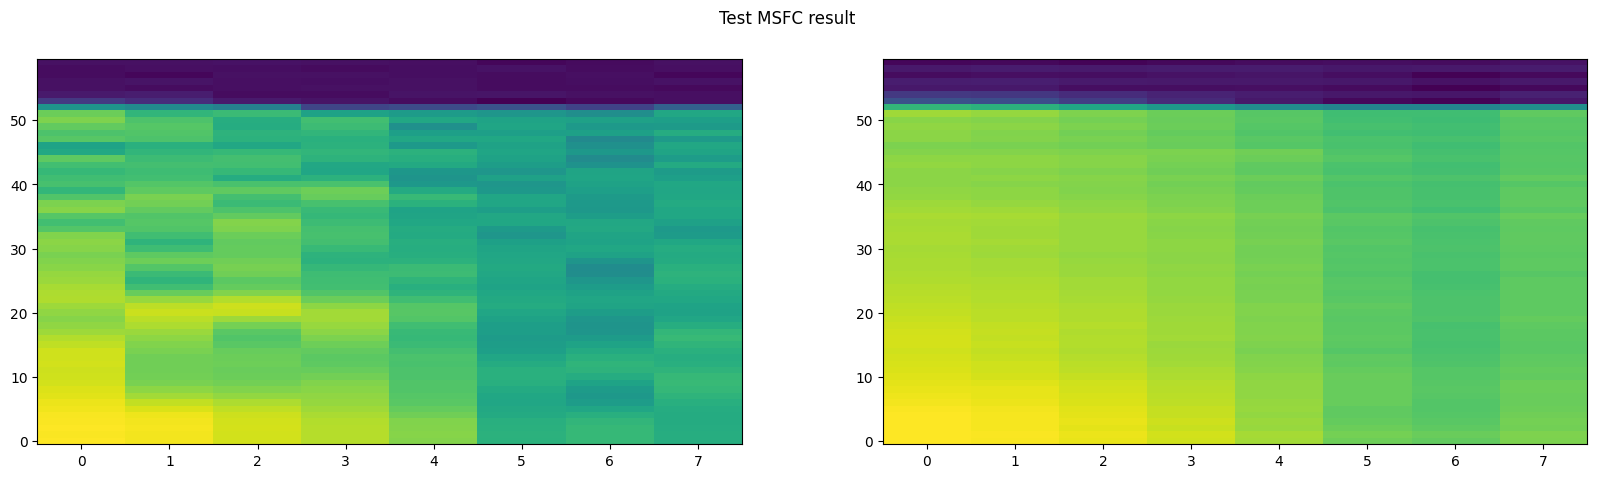

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 25it [00:06,  4.09it/s]

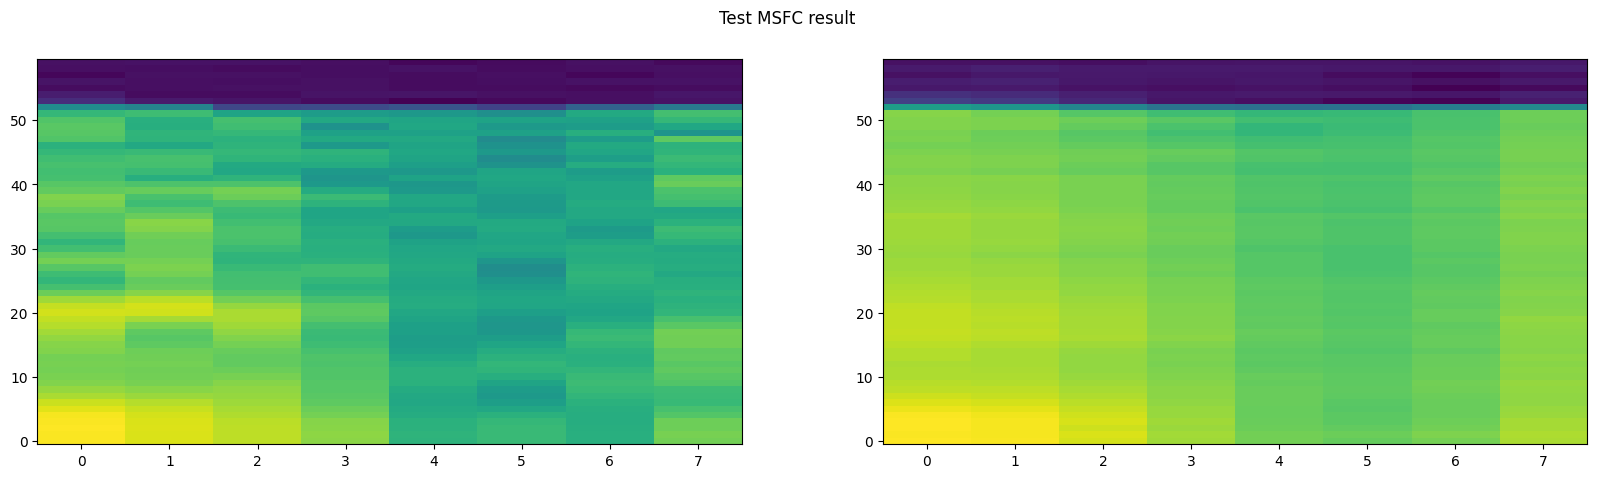

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 26it [00:07,  4.06it/s]

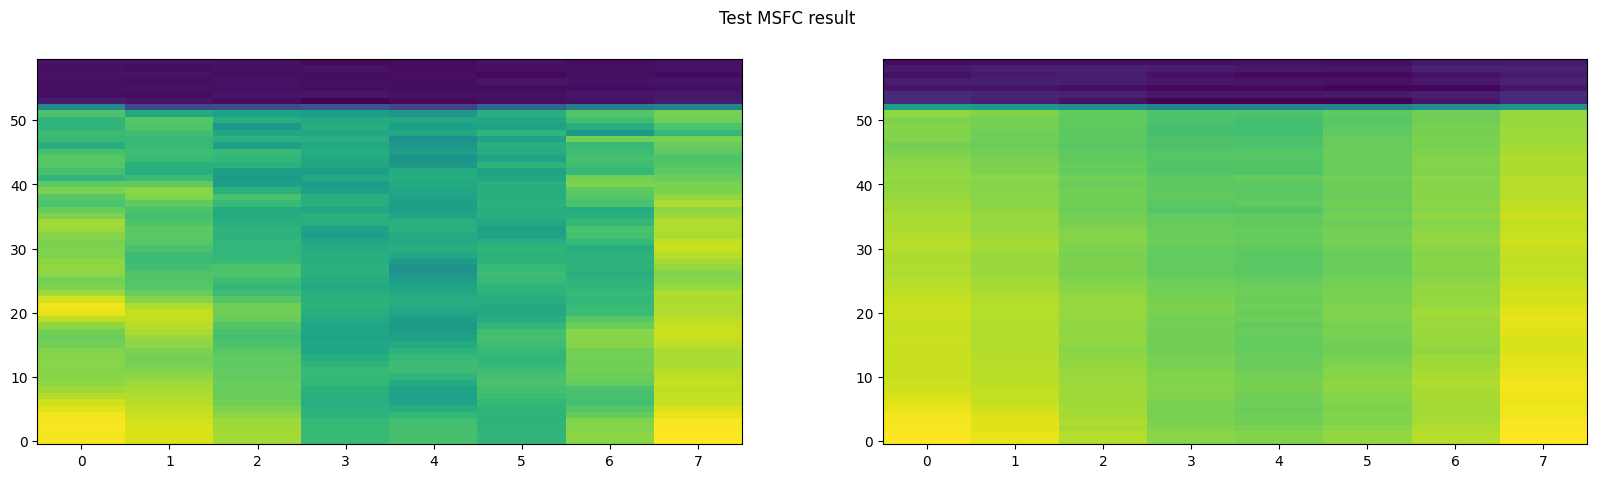

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 27it [00:07,  4.06it/s]

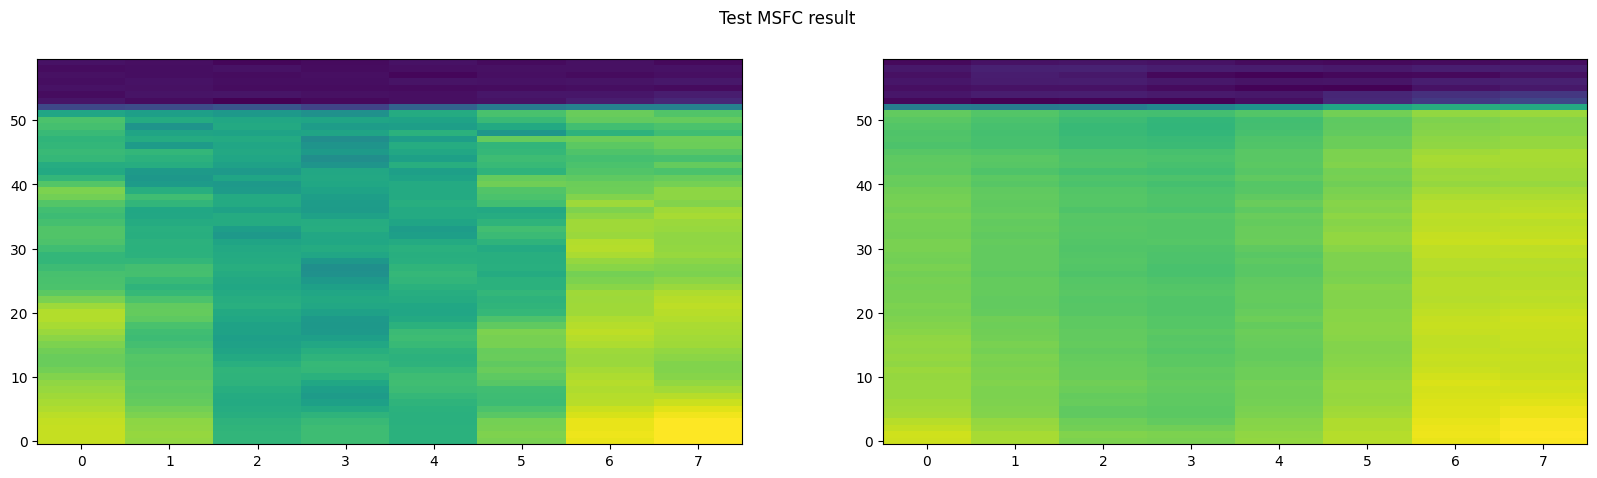

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 28it [00:07,  4.06it/s]

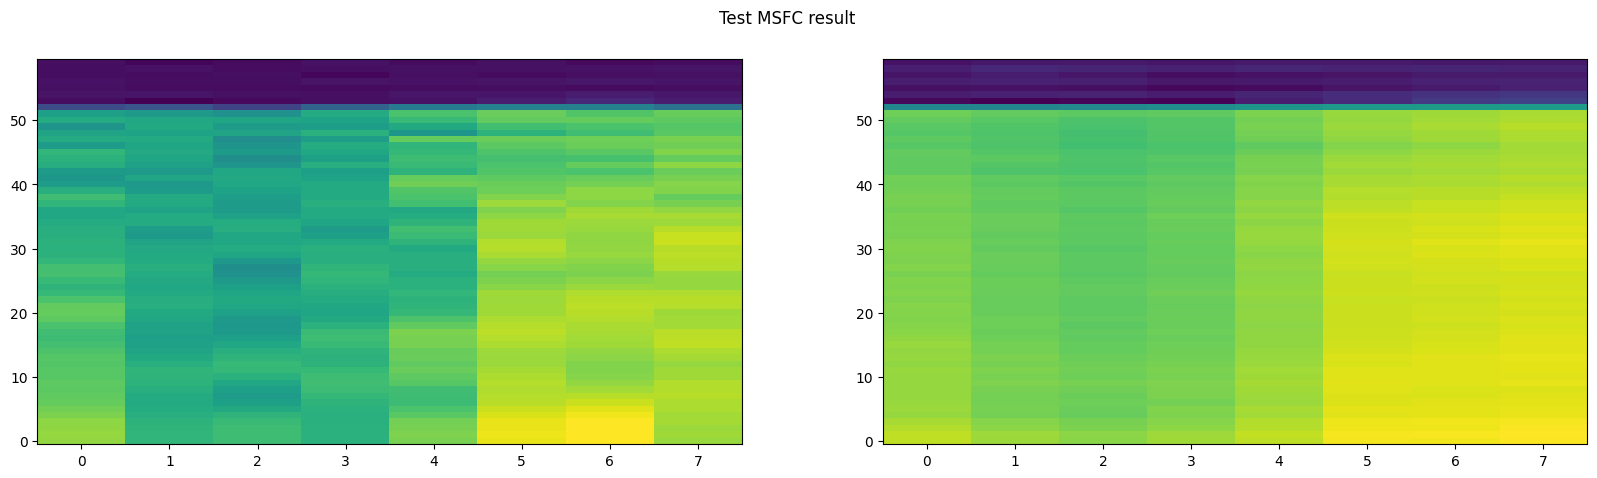

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 29it [00:07,  4.08it/s]

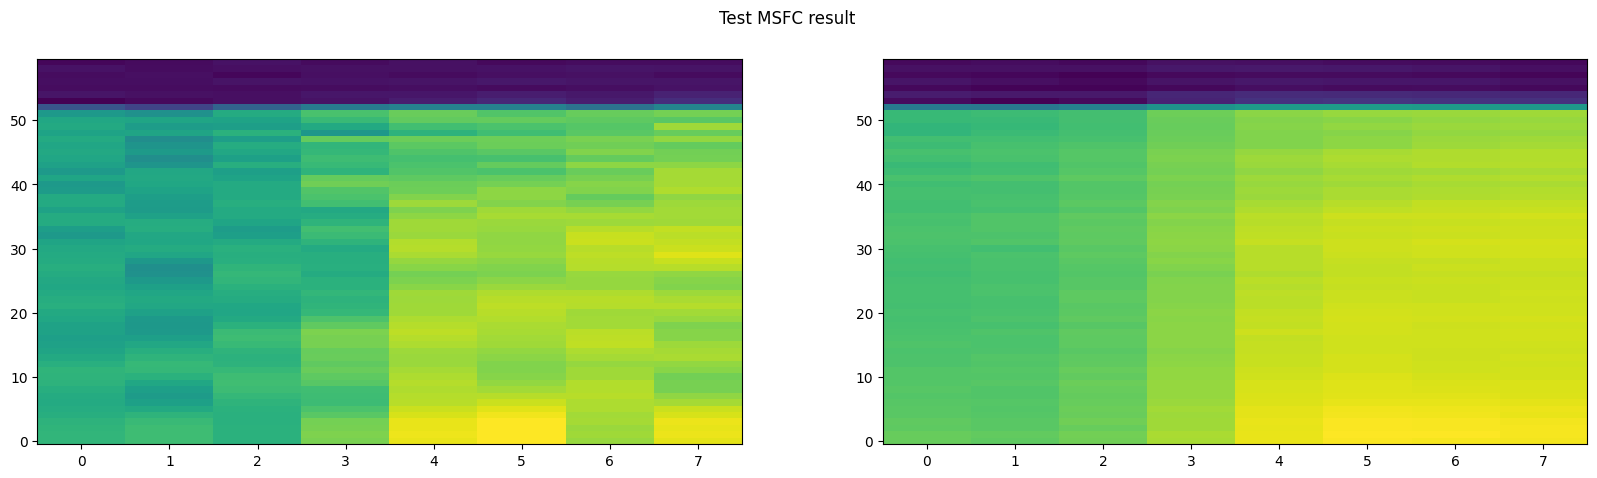

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 30it [00:08,  4.09it/s]

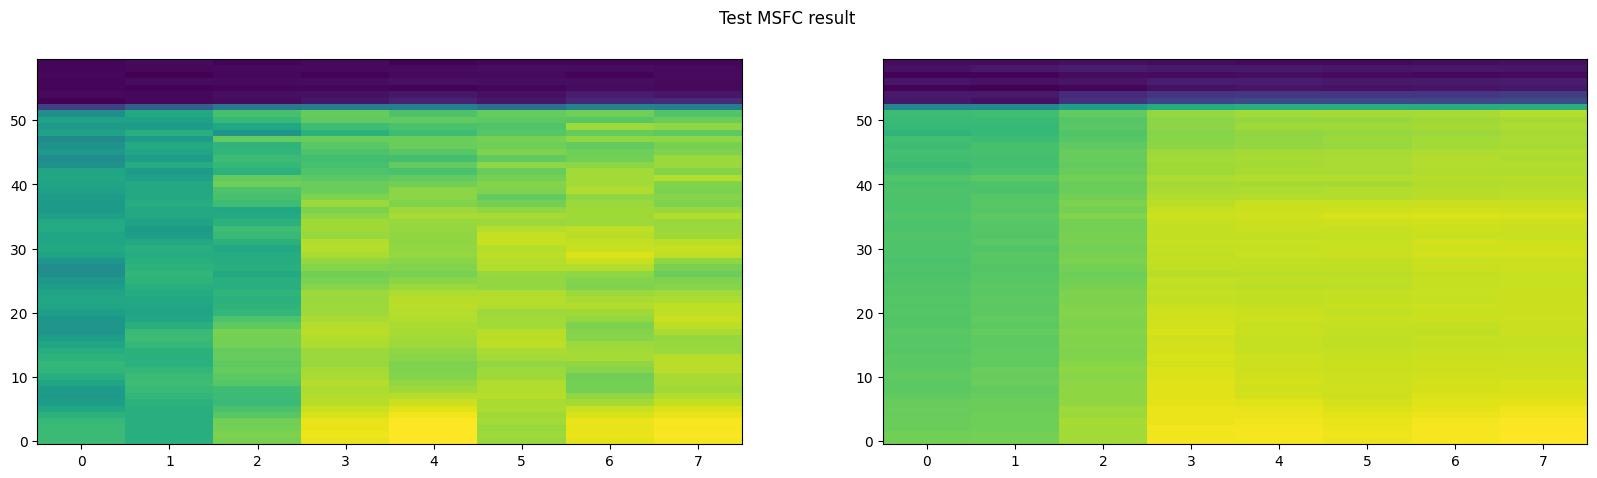

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 31it [00:08,  4.09it/s]

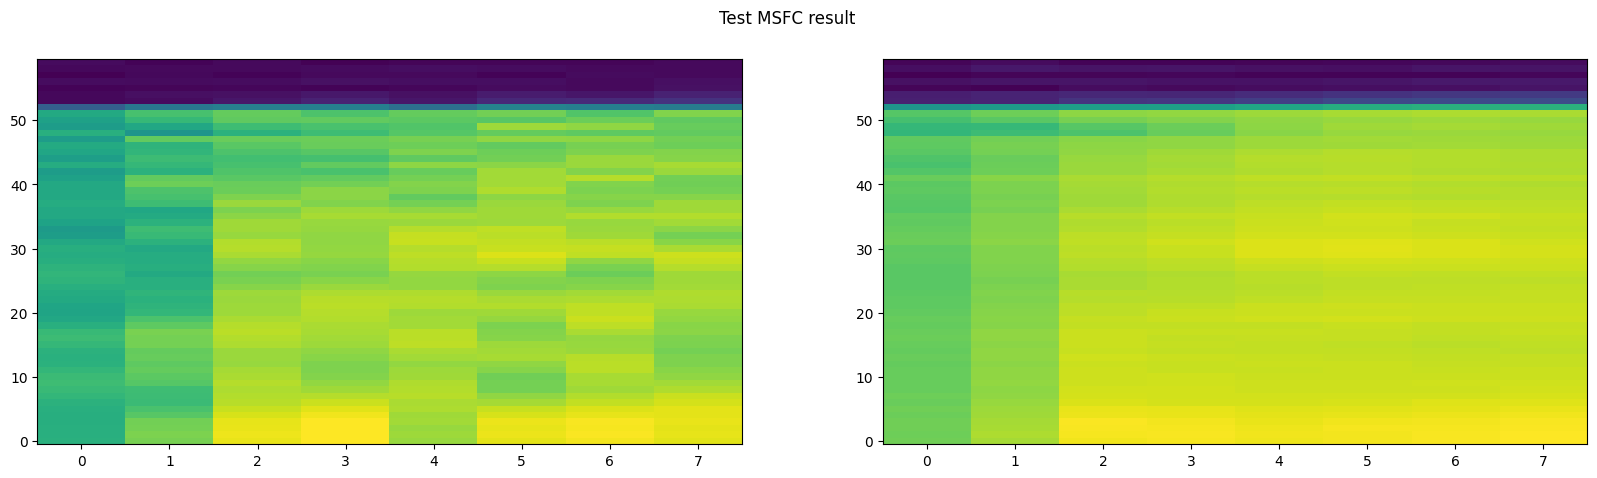

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 32it [00:08,  4.09it/s]

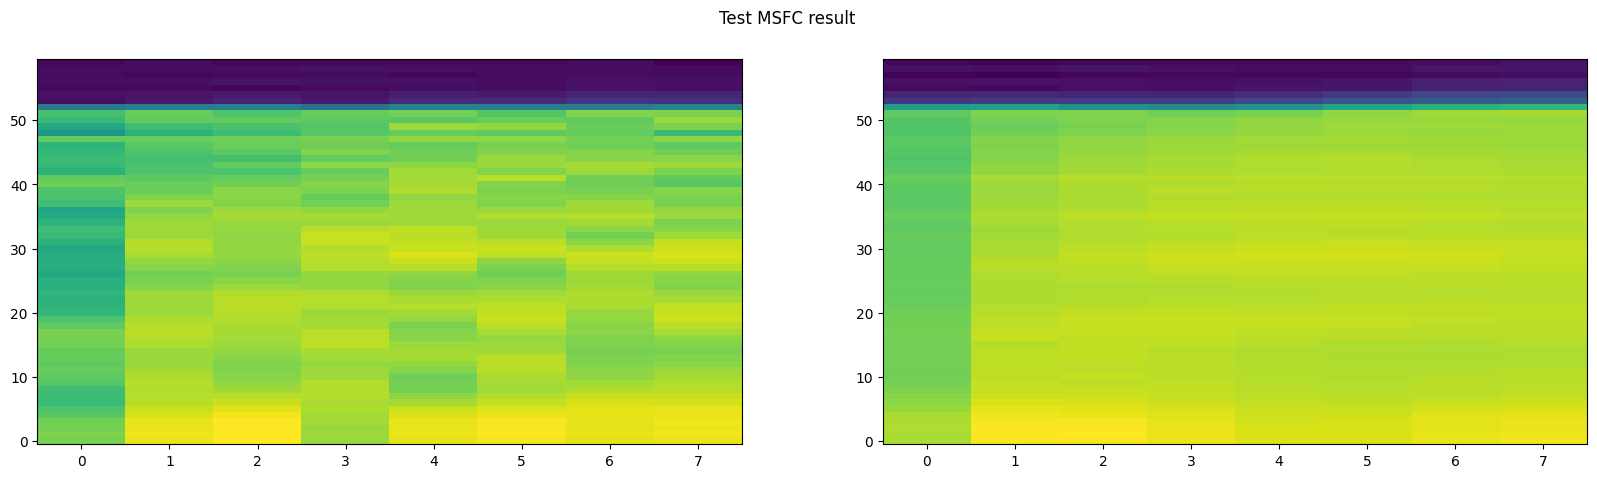

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 33it [00:08,  4.07it/s]

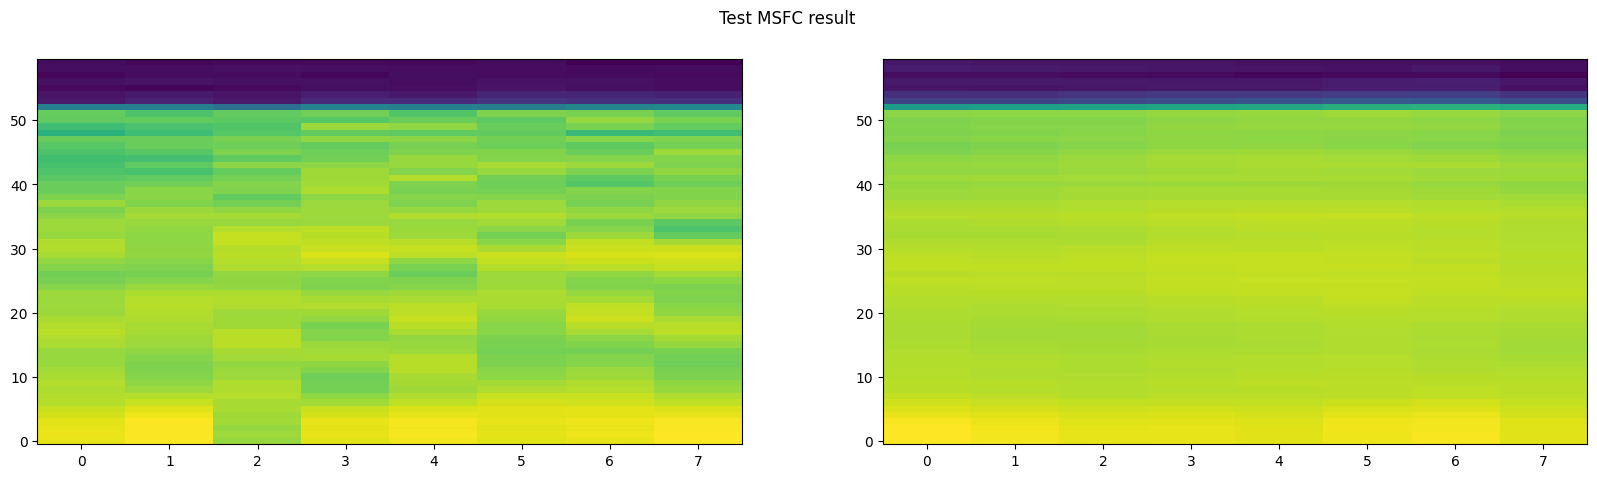

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 34it [00:09,  4.09it/s]

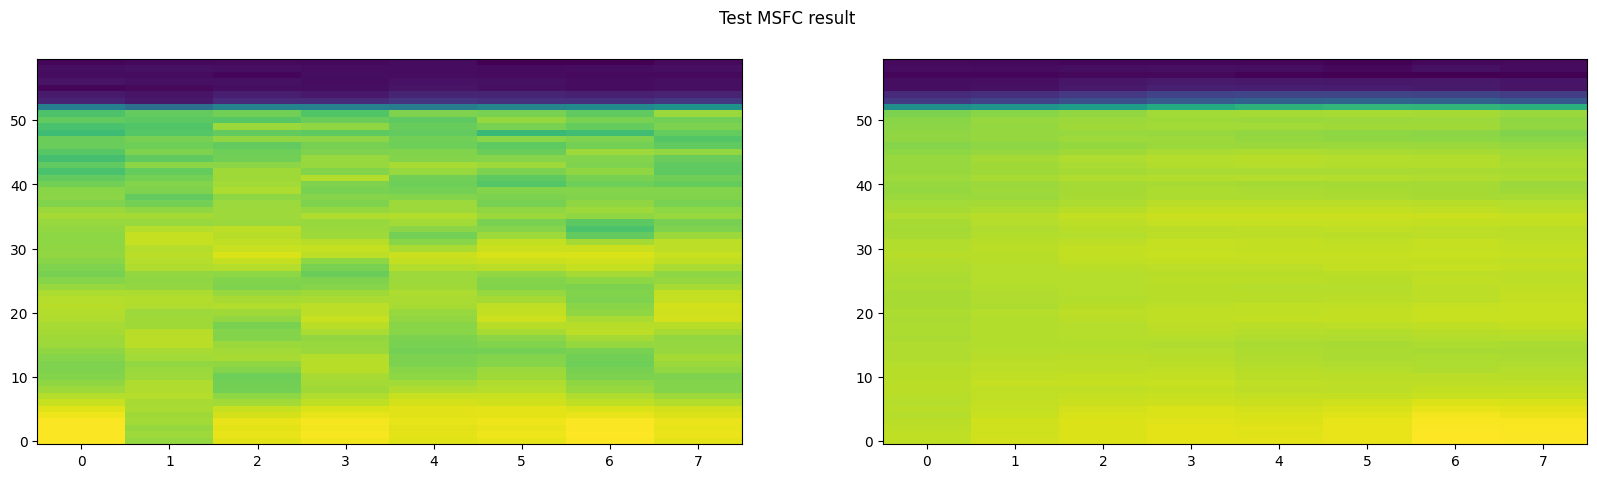

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 35it [00:09,  4.08it/s]

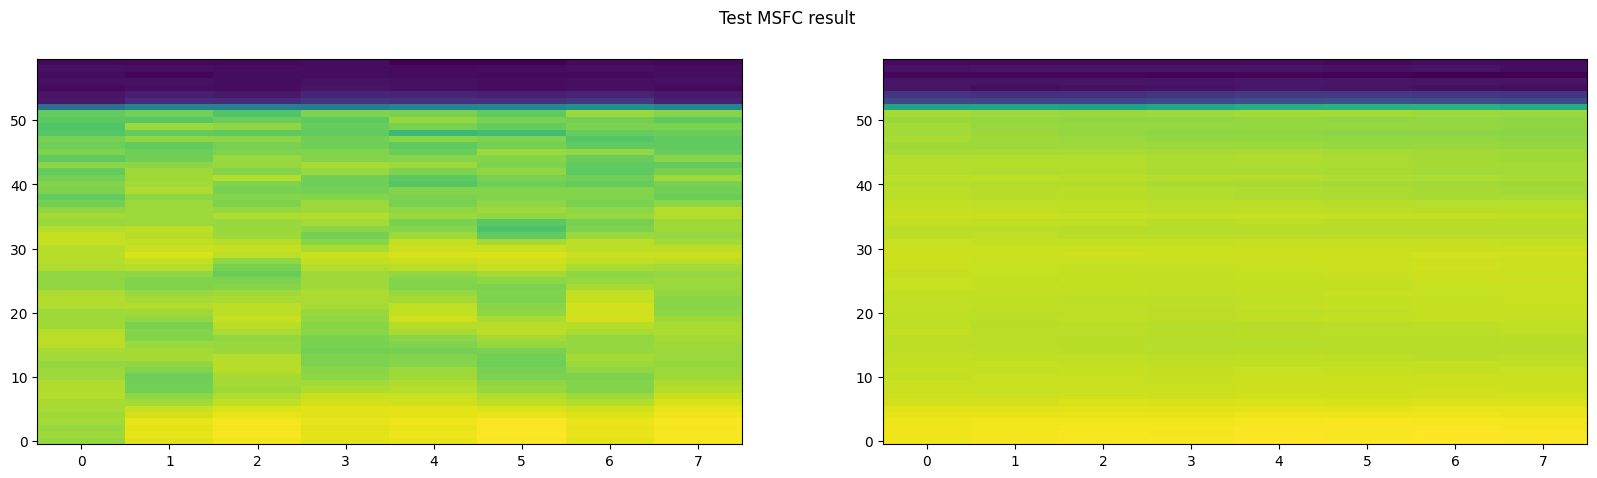

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 36it [00:09,  4.08it/s]

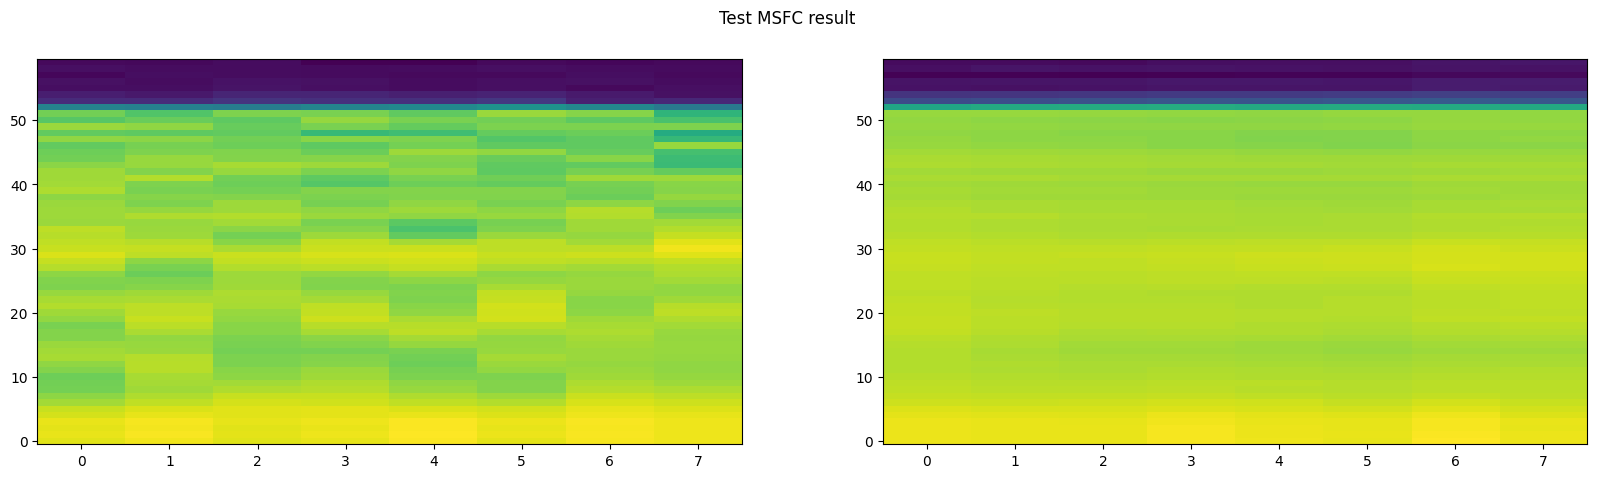

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 37it [00:09,  4.08it/s]

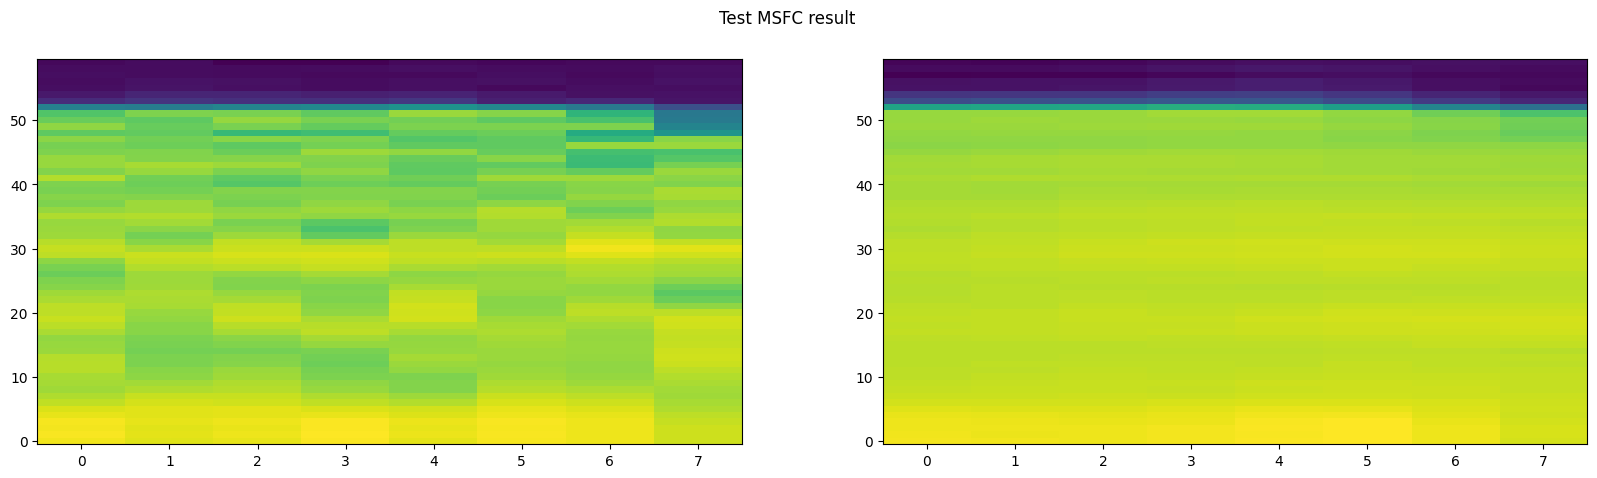

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 38it [00:10,  4.07it/s]

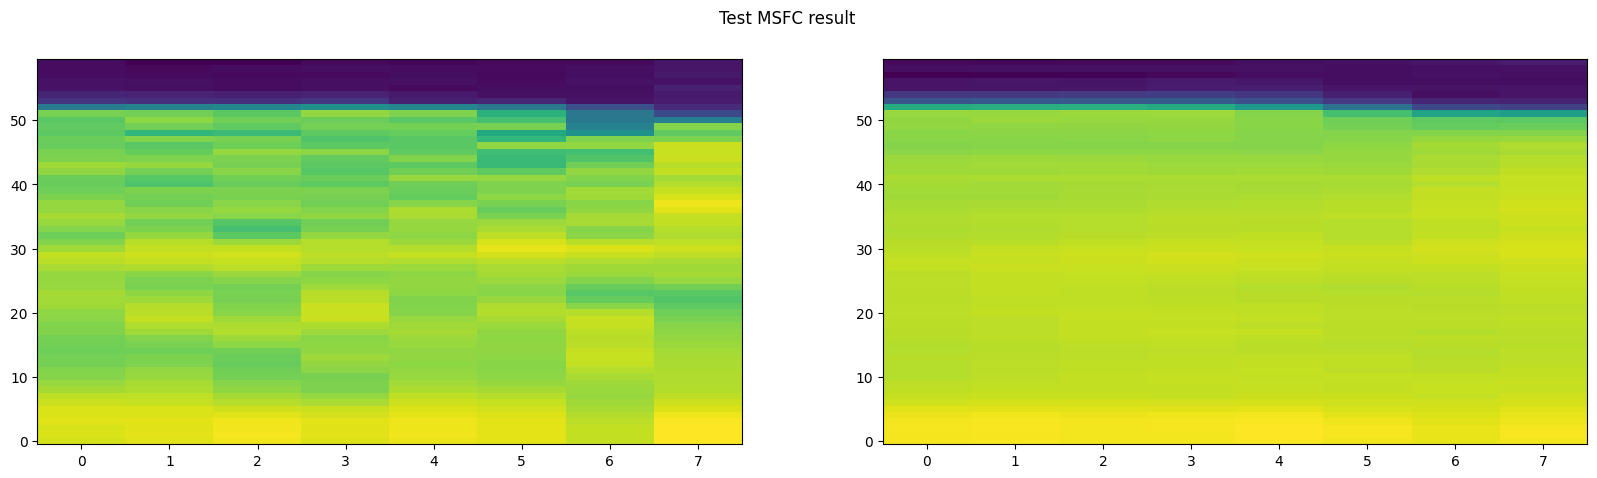

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 39it [00:10,  4.08it/s]

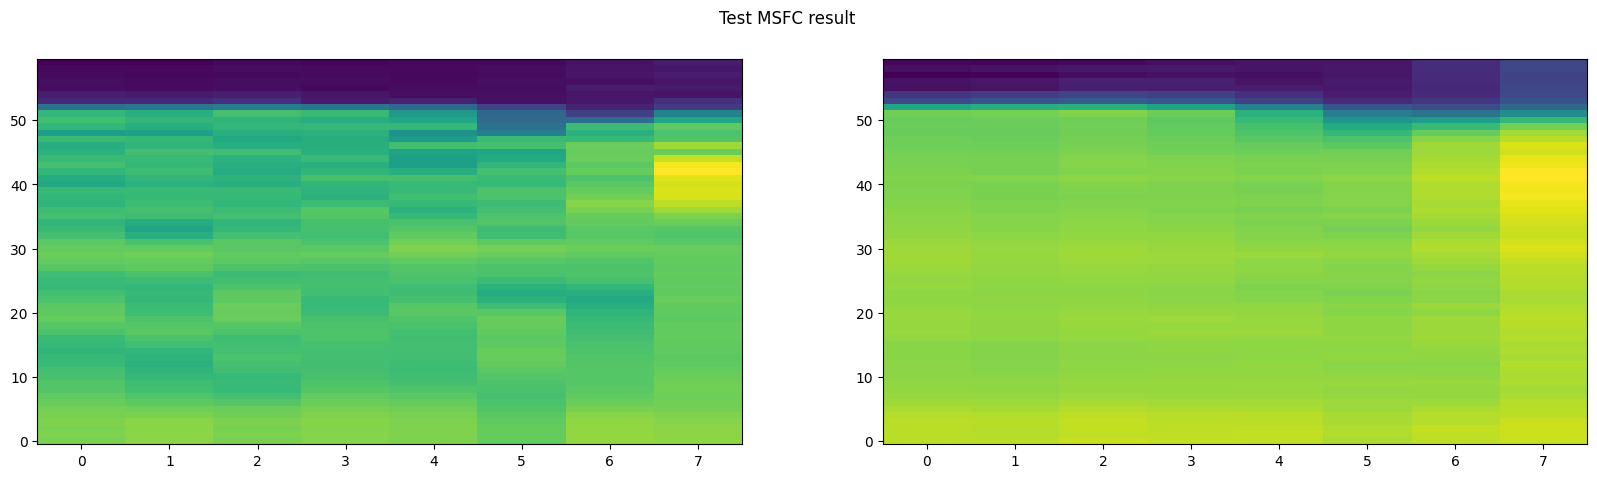

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 40it [00:11,  2.14it/s]

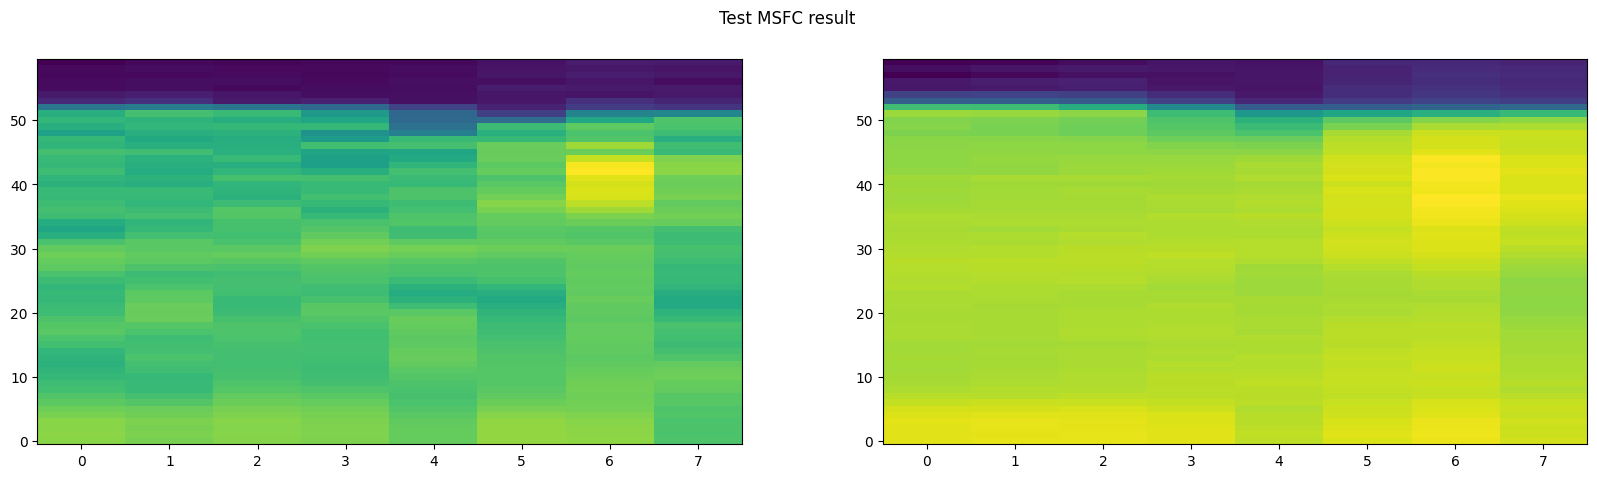

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 41it [00:11,  2.50it/s]

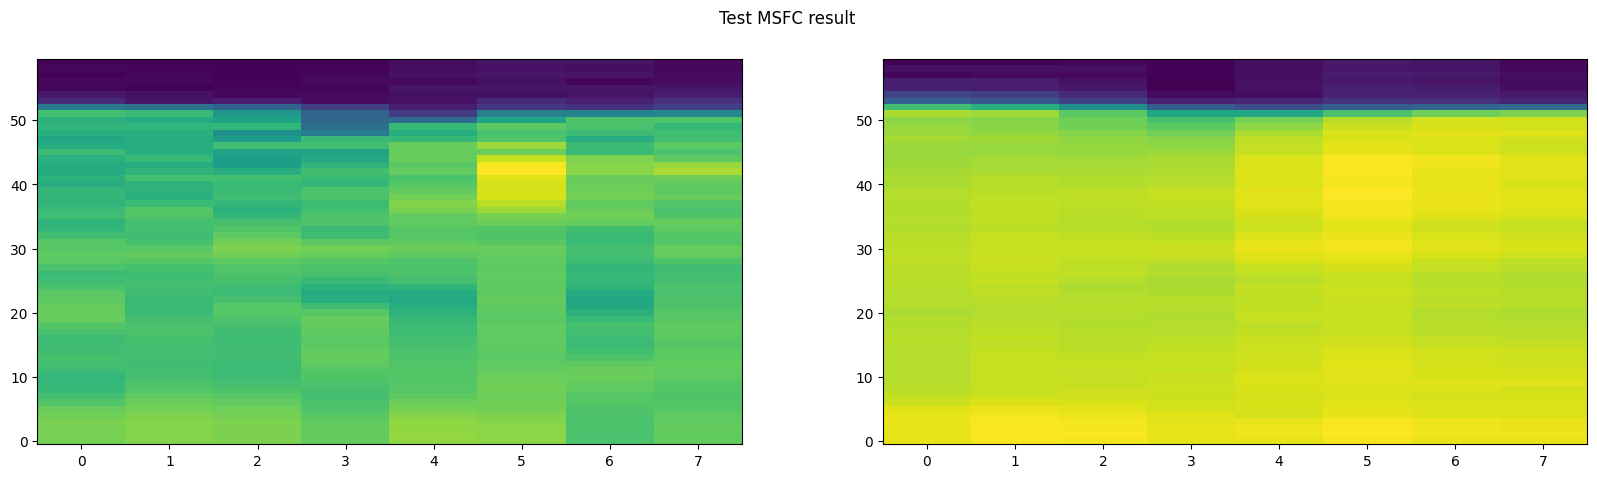

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 42it [00:11,  2.83it/s]

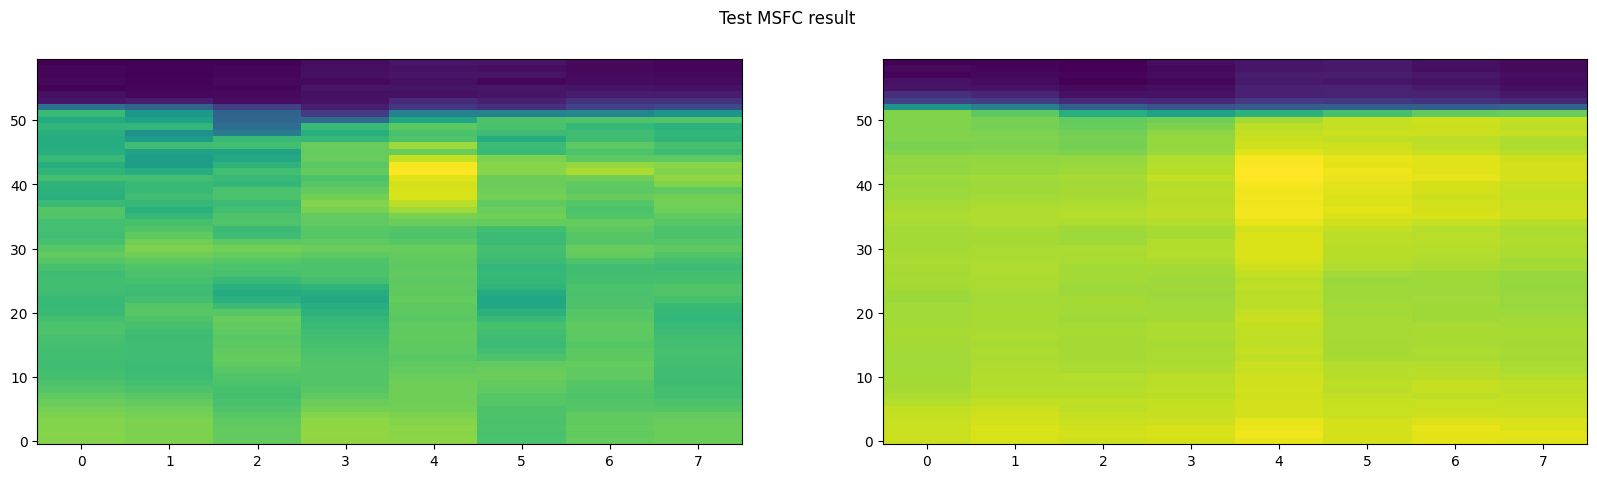

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 43it [00:12,  3.12it/s]

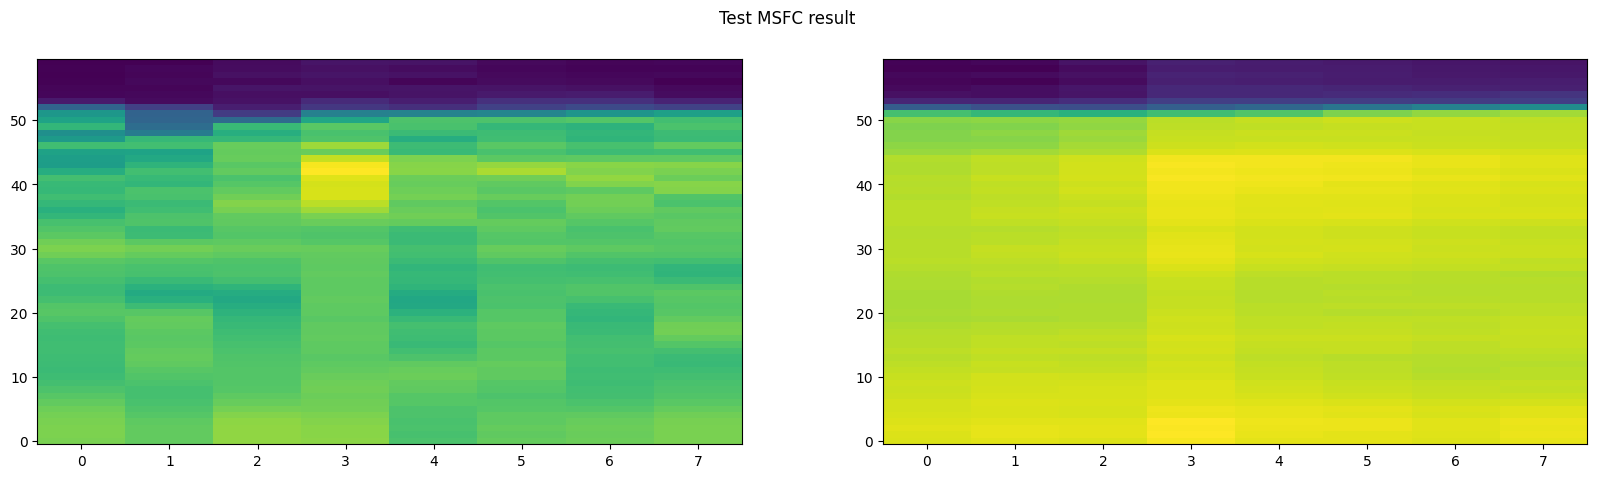

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 44it [00:12,  3.36it/s]

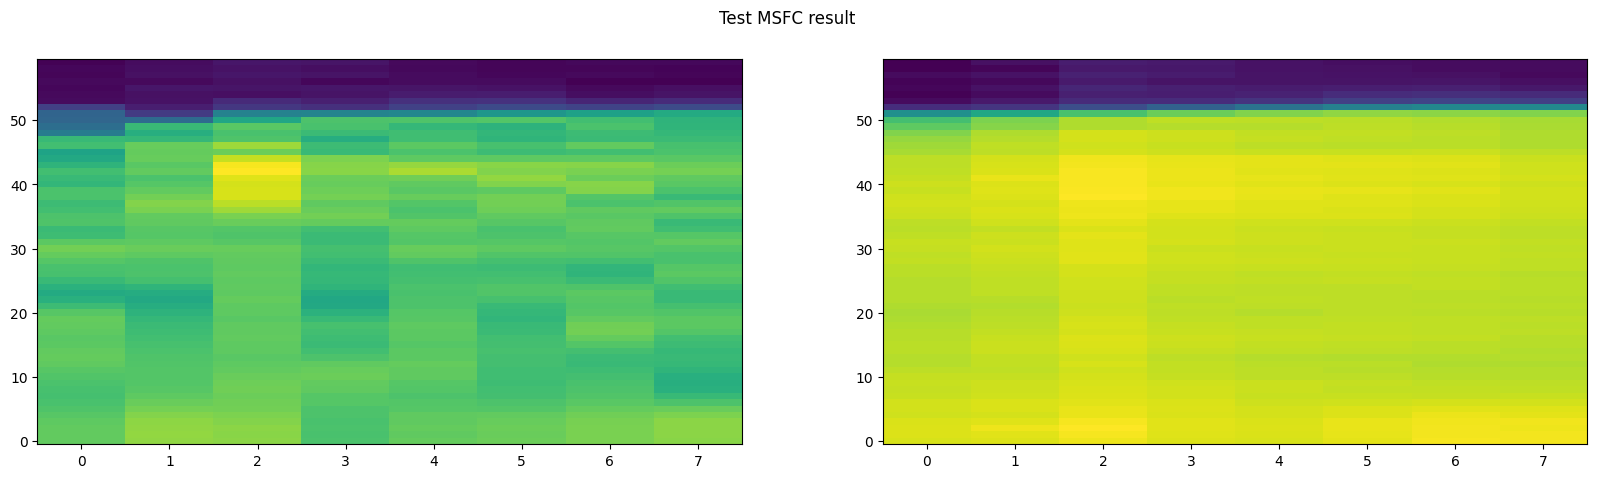

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 45it [00:12,  3.56it/s]

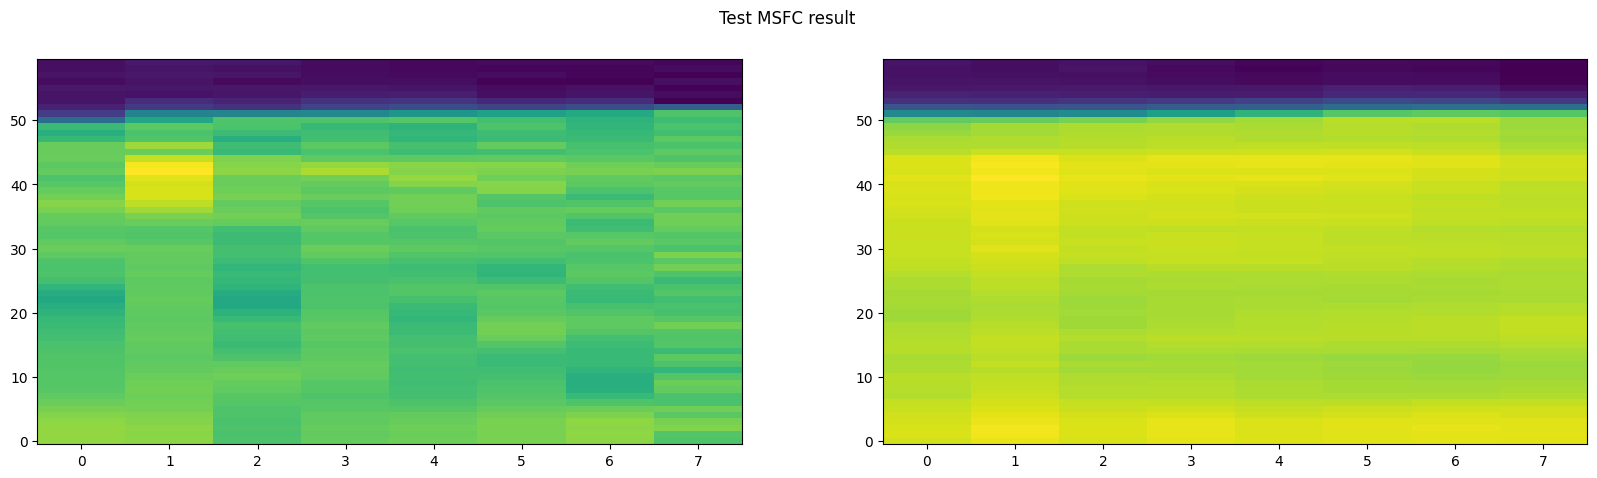

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 46it [00:12,  3.71it/s]

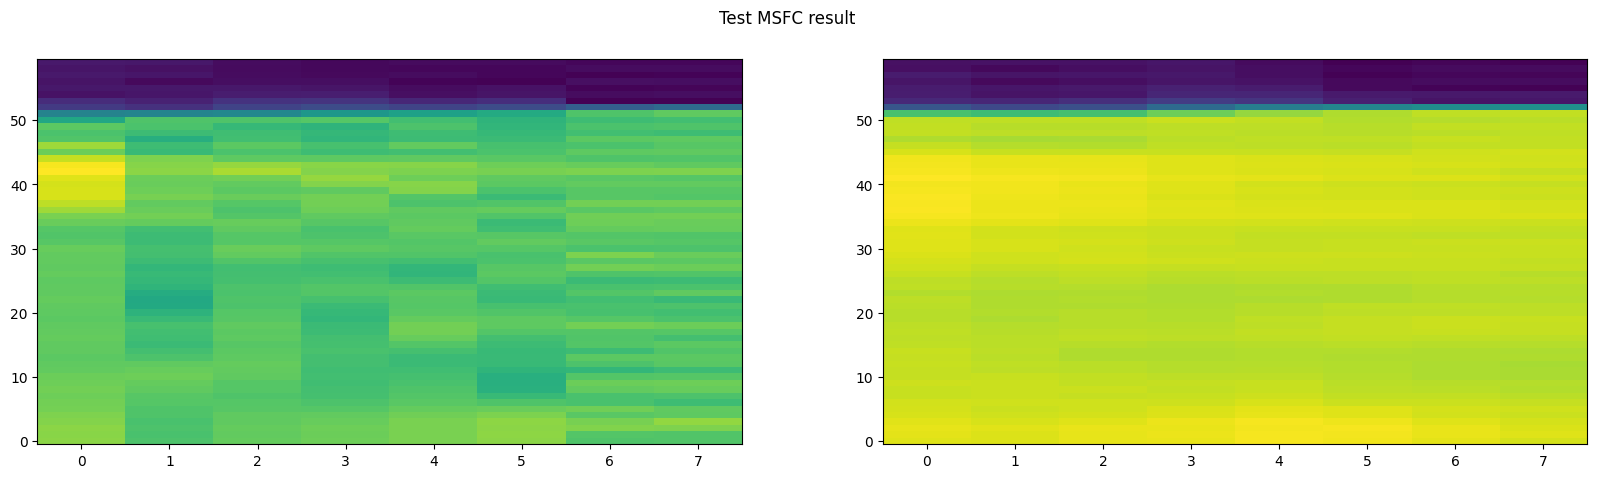

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 47it [00:12,  3.83it/s]

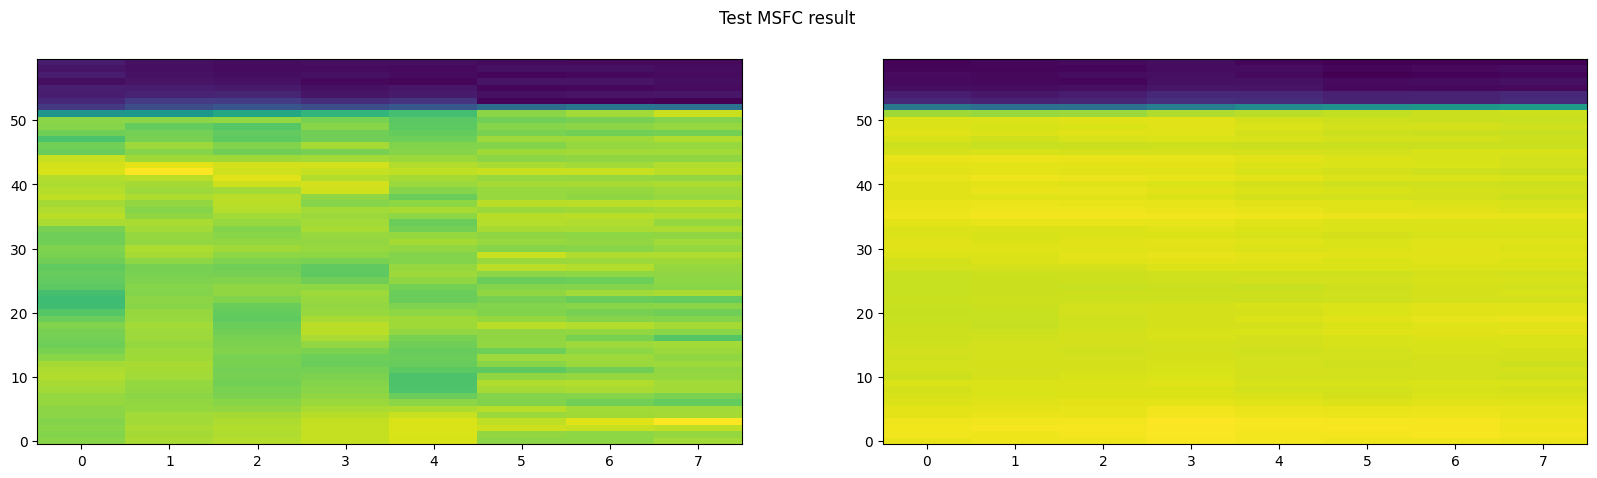

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 48it [00:13,  3.92it/s]

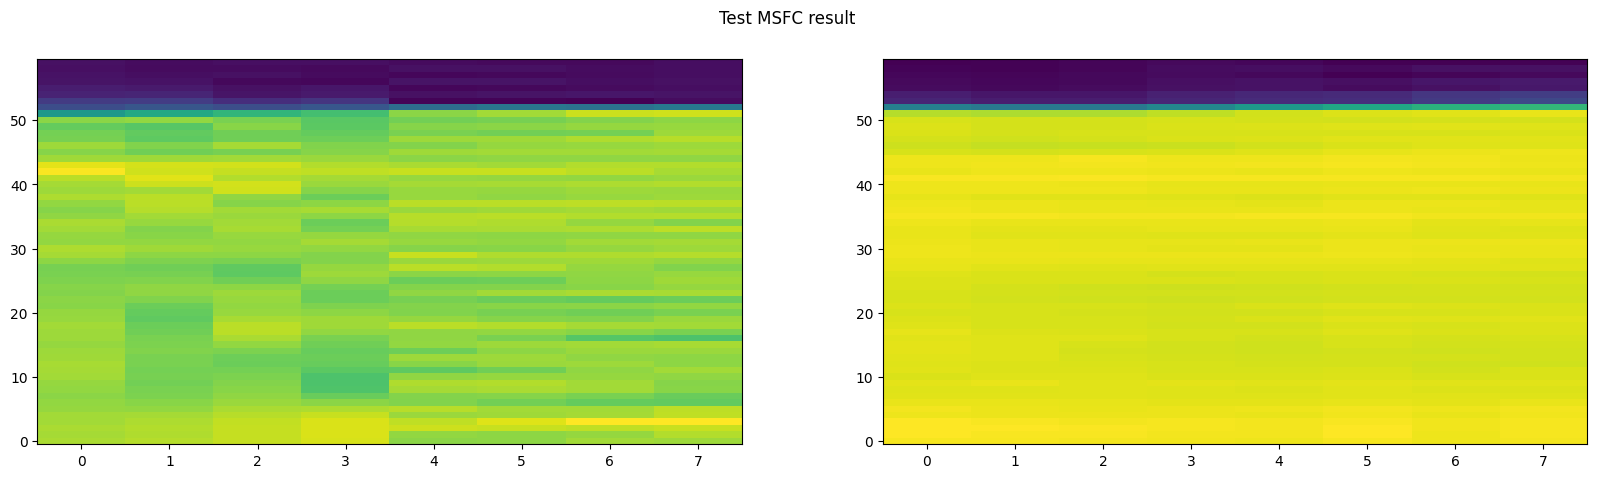

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 49it [00:13,  3.97it/s]

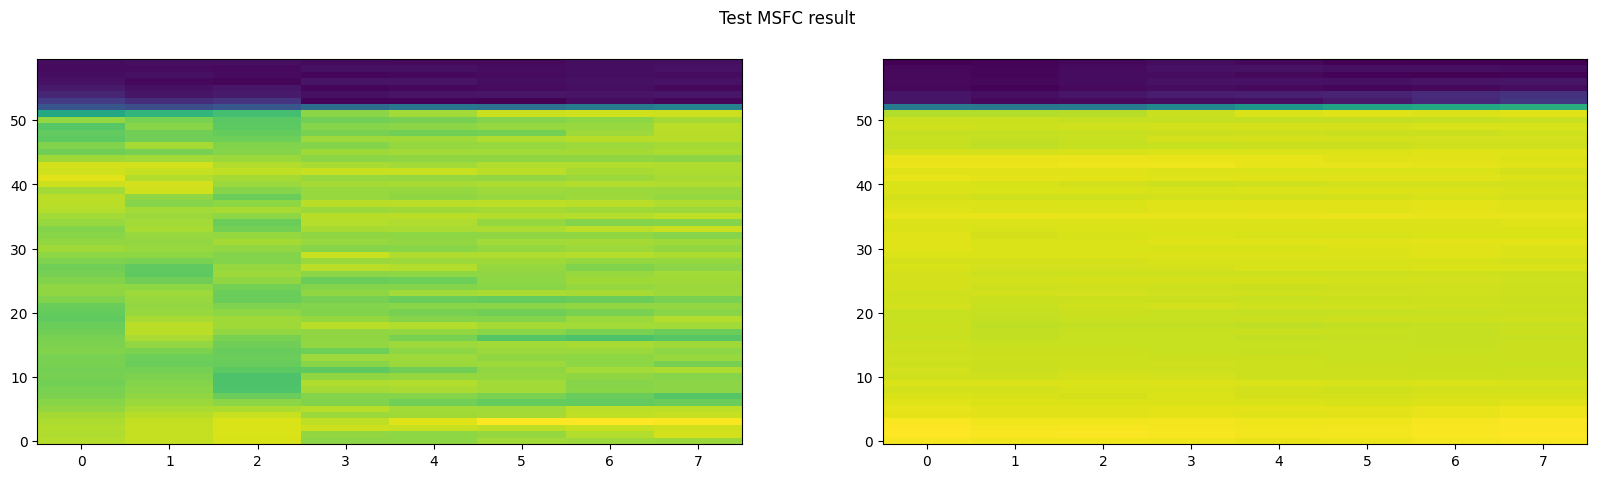

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 50it [00:13,  3.99it/s]

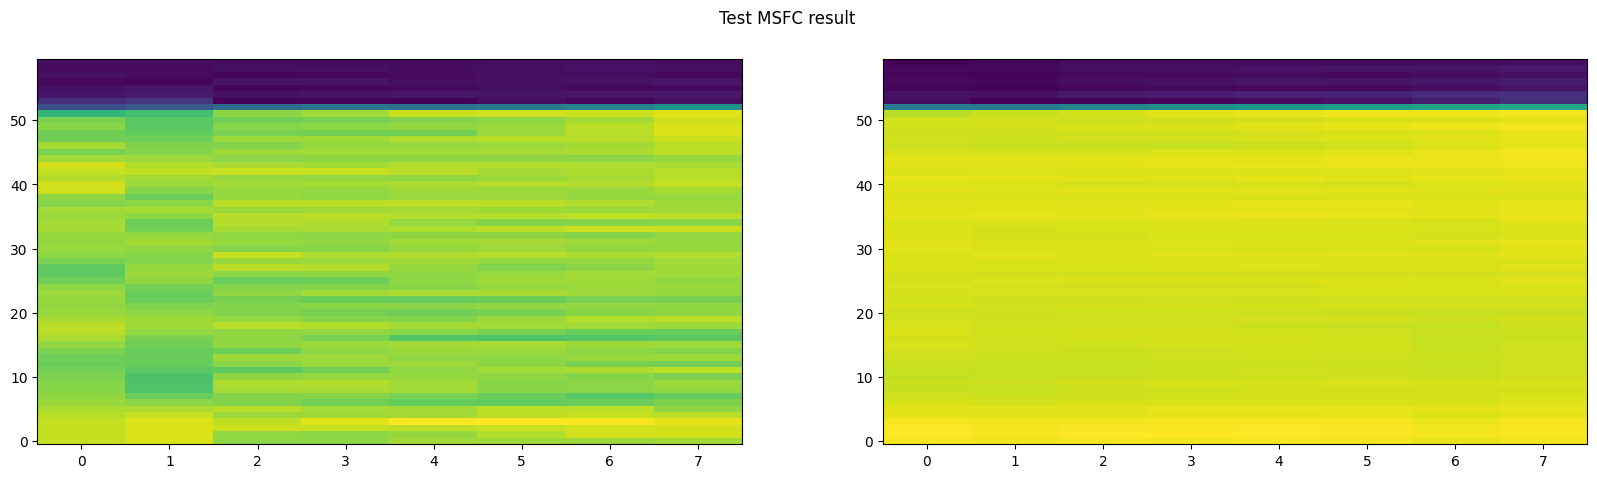

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 51it [00:13,  4.03it/s]

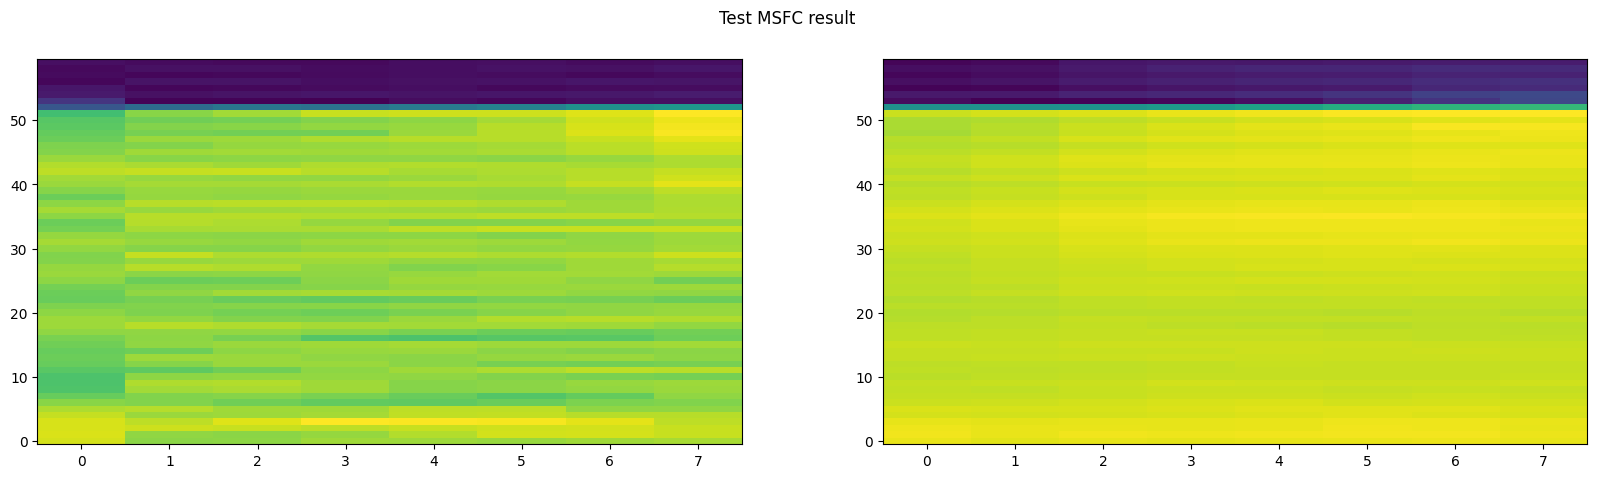

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 52it [00:14,  4.06it/s]

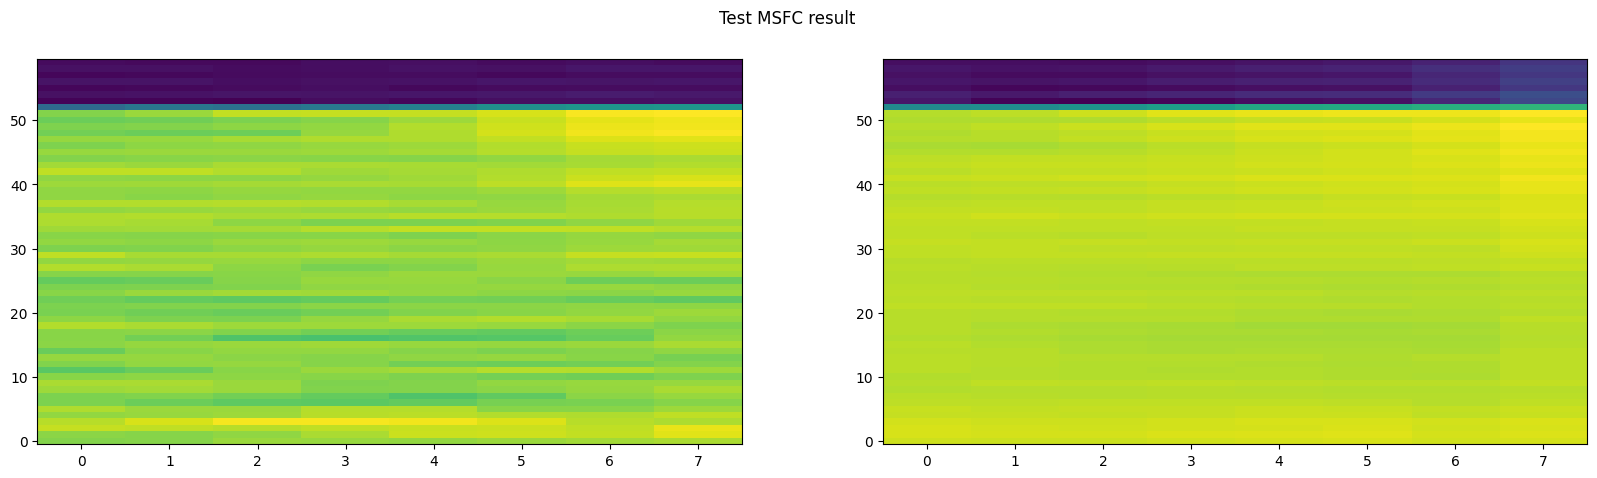

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 53it [00:14,  4.08it/s]

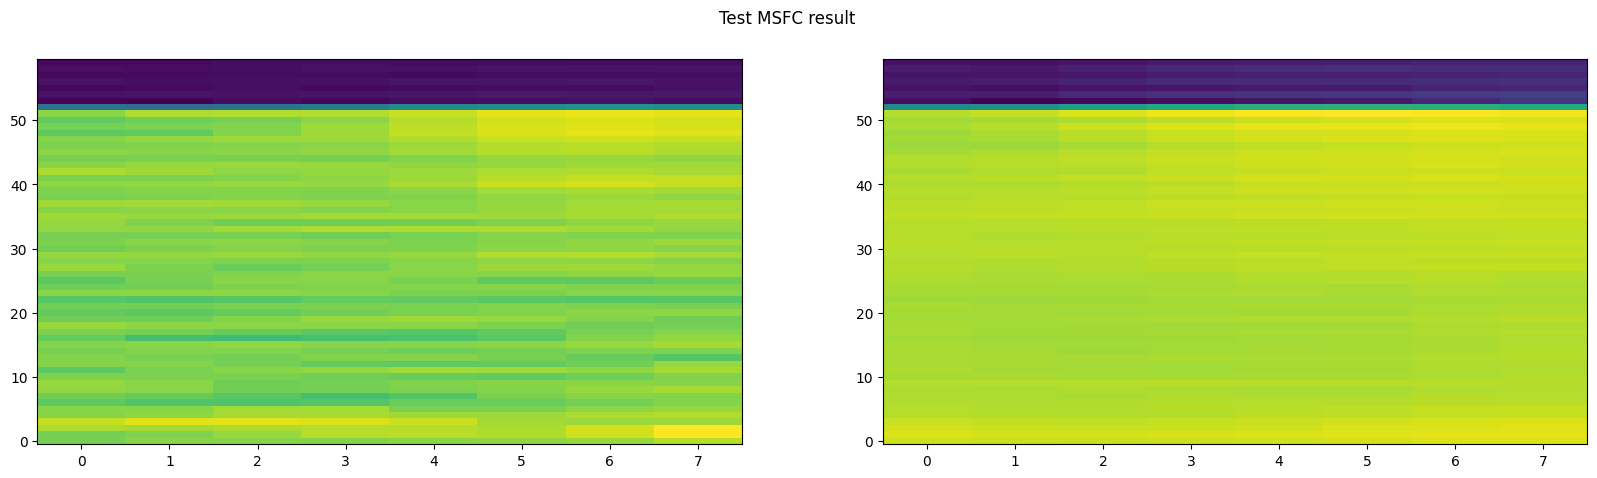

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 54it [00:14,  4.10it/s]

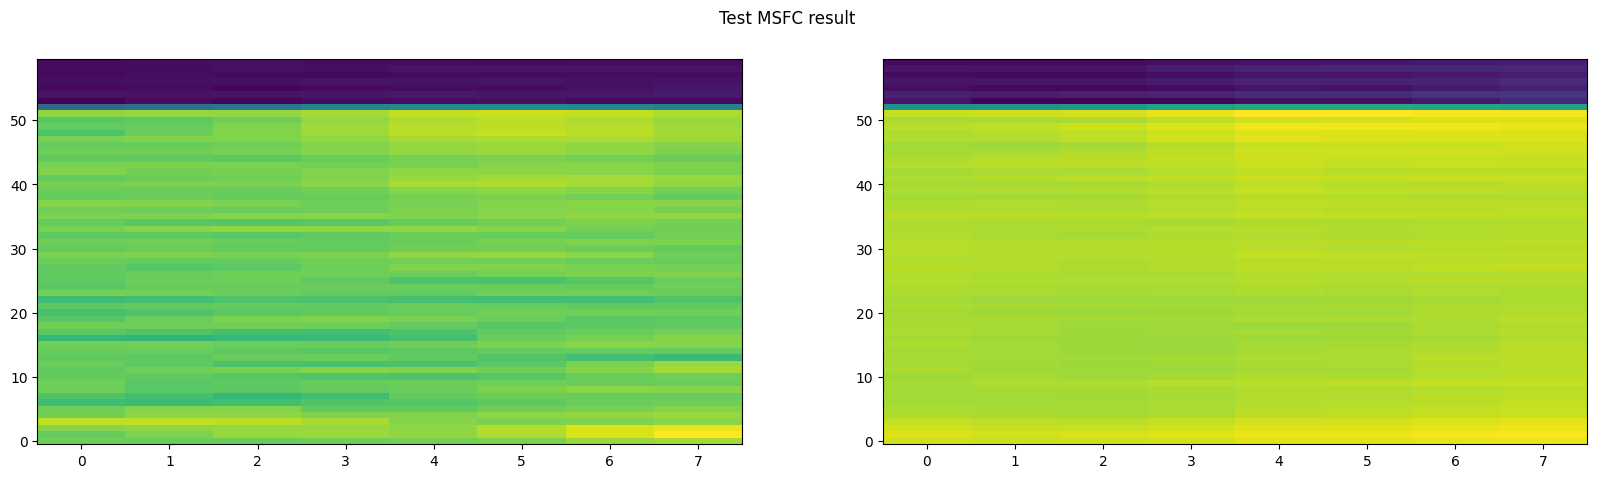

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 55it [00:14,  4.11it/s]

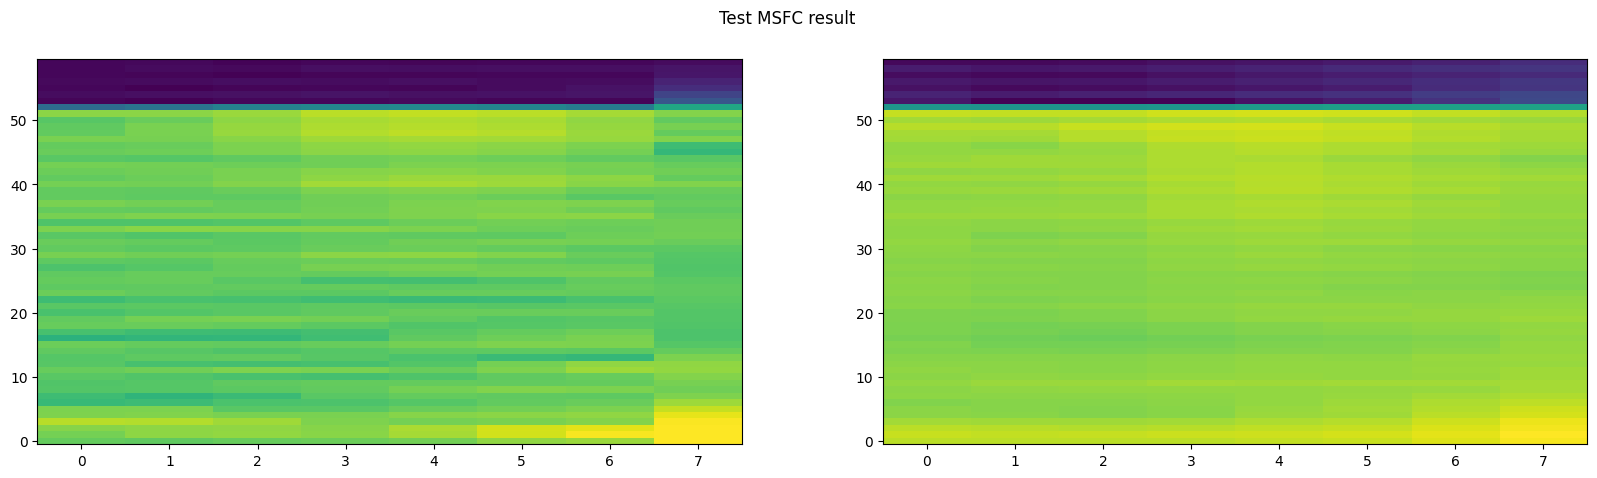

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 56it [00:15,  4.12it/s]

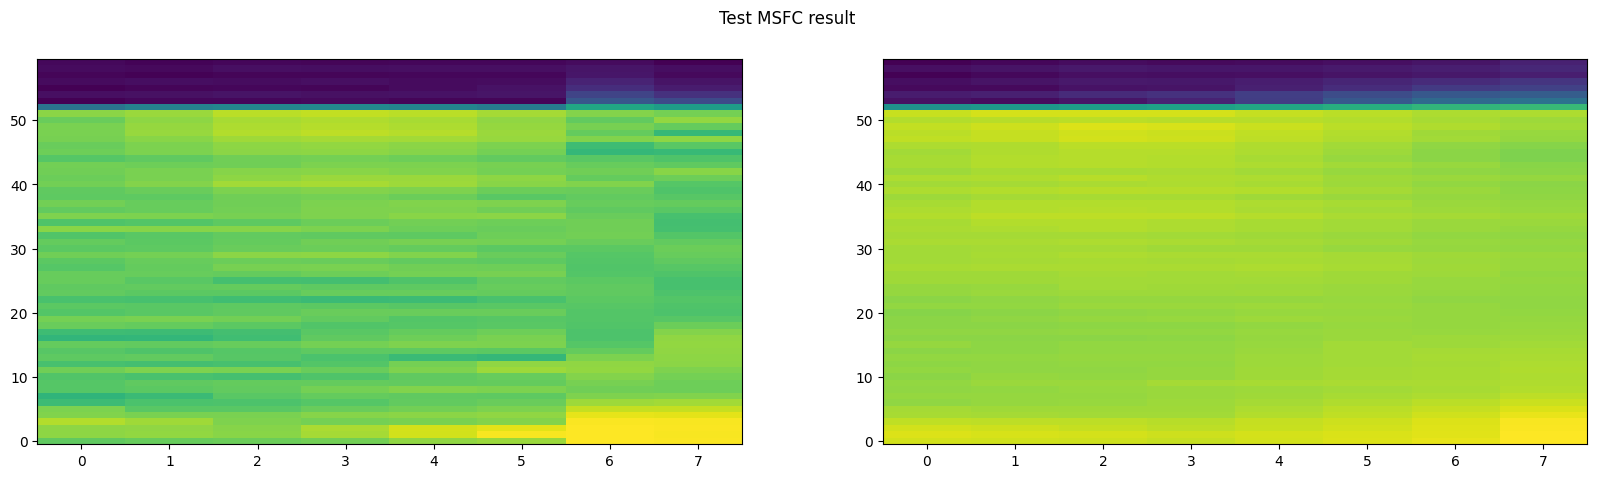

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 57it [00:15,  4.12it/s]

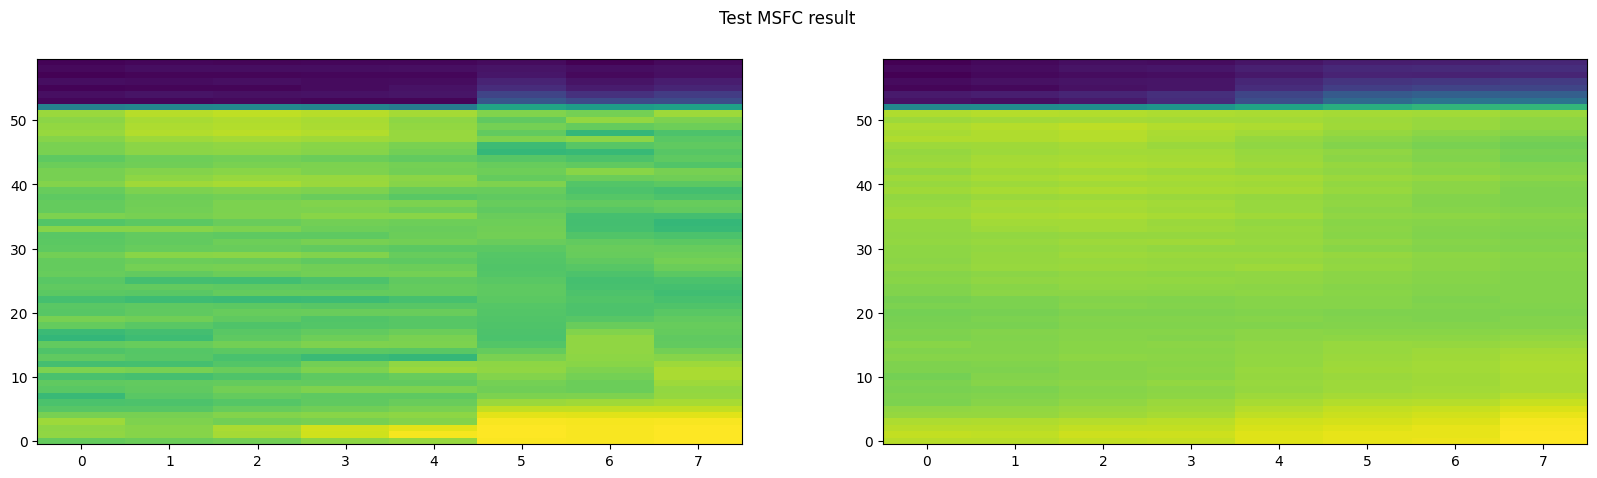

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 58it [00:15,  4.12it/s]

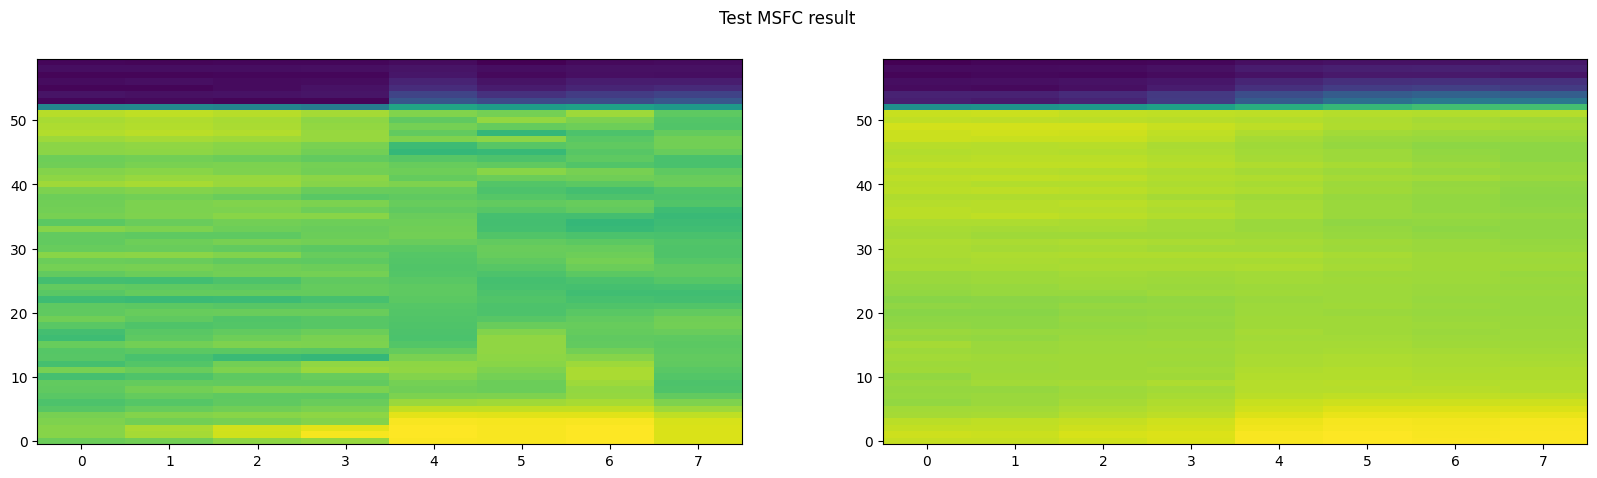

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 59it [00:15,  4.12it/s]

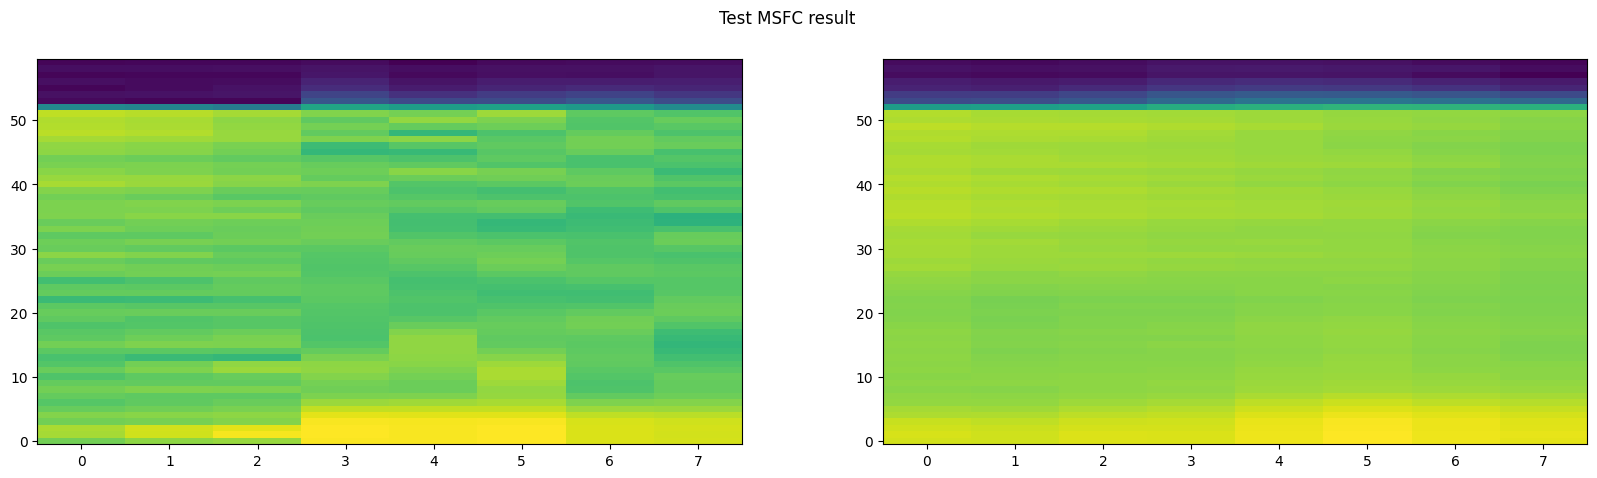

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 60it [00:16,  4.13it/s]

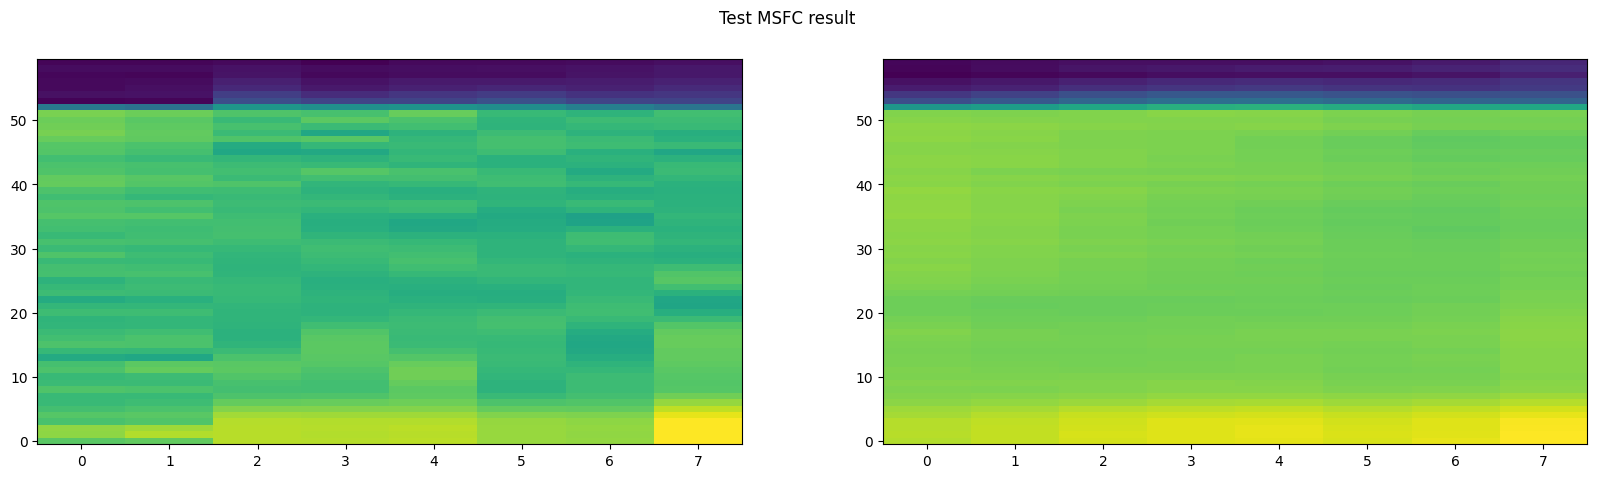

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 61it [00:16,  4.12it/s]

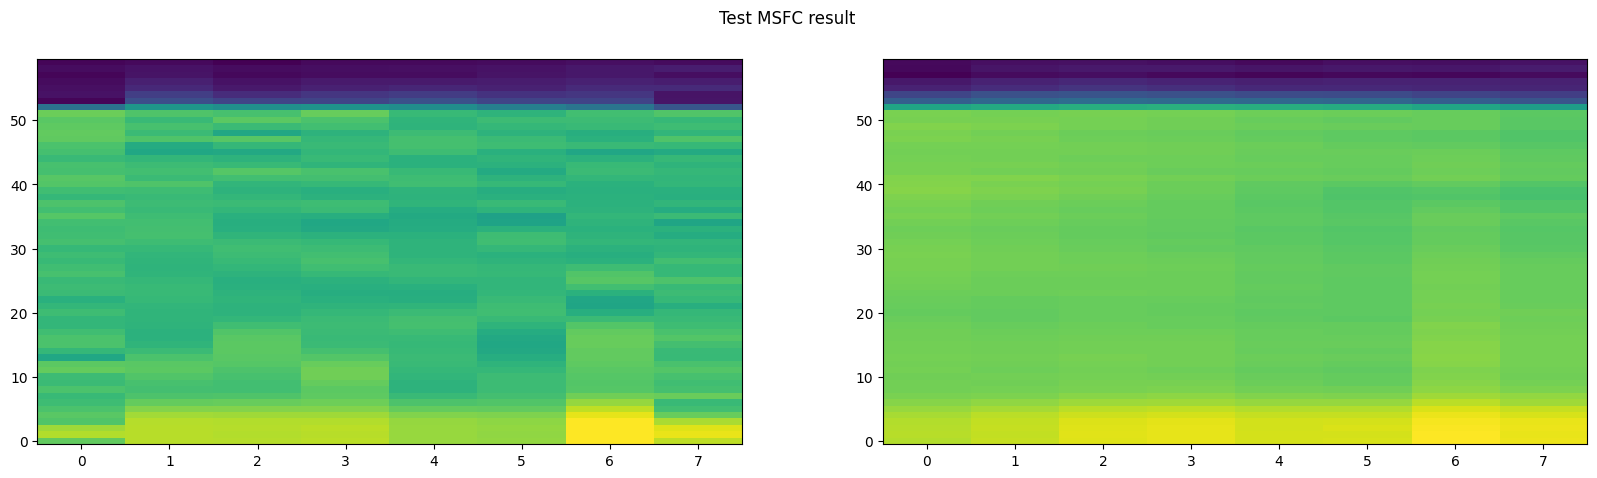

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 62it [00:16,  4.13it/s]

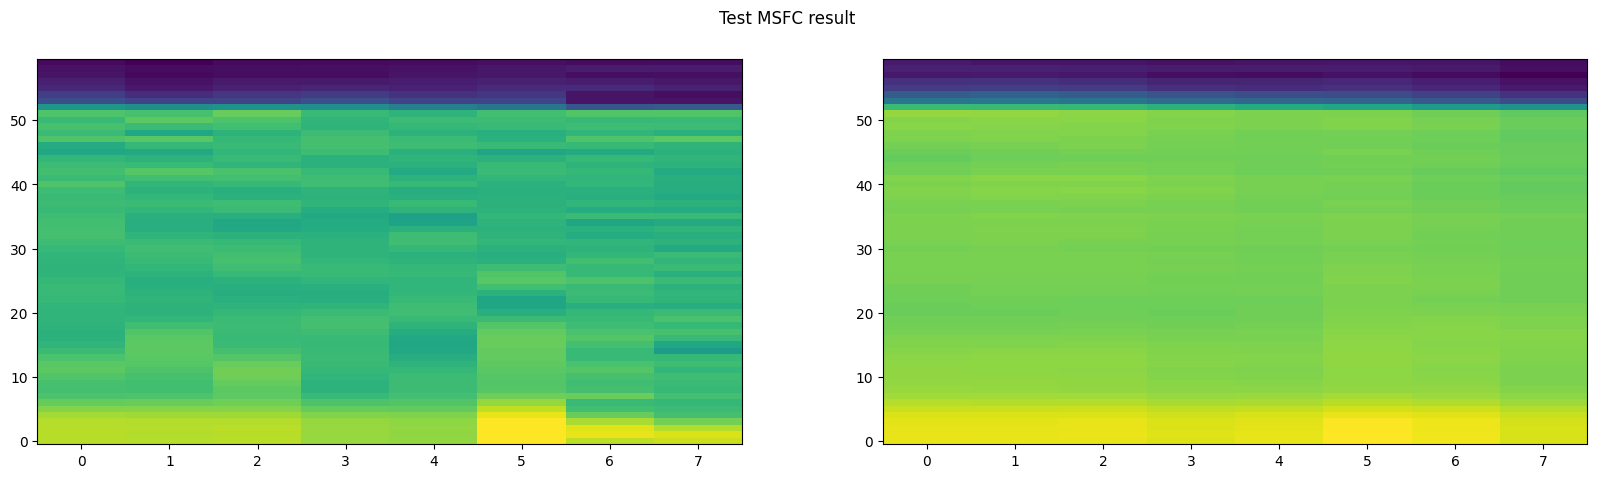

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 63it [00:16,  4.14it/s]

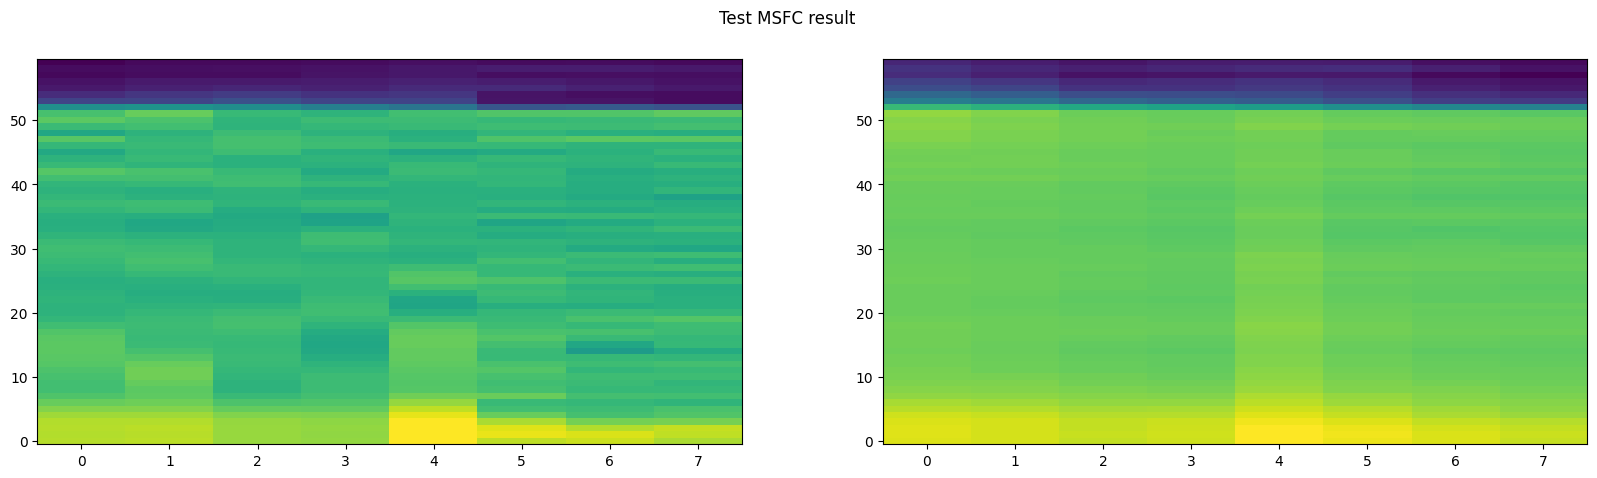

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 64it [00:17,  4.14it/s]

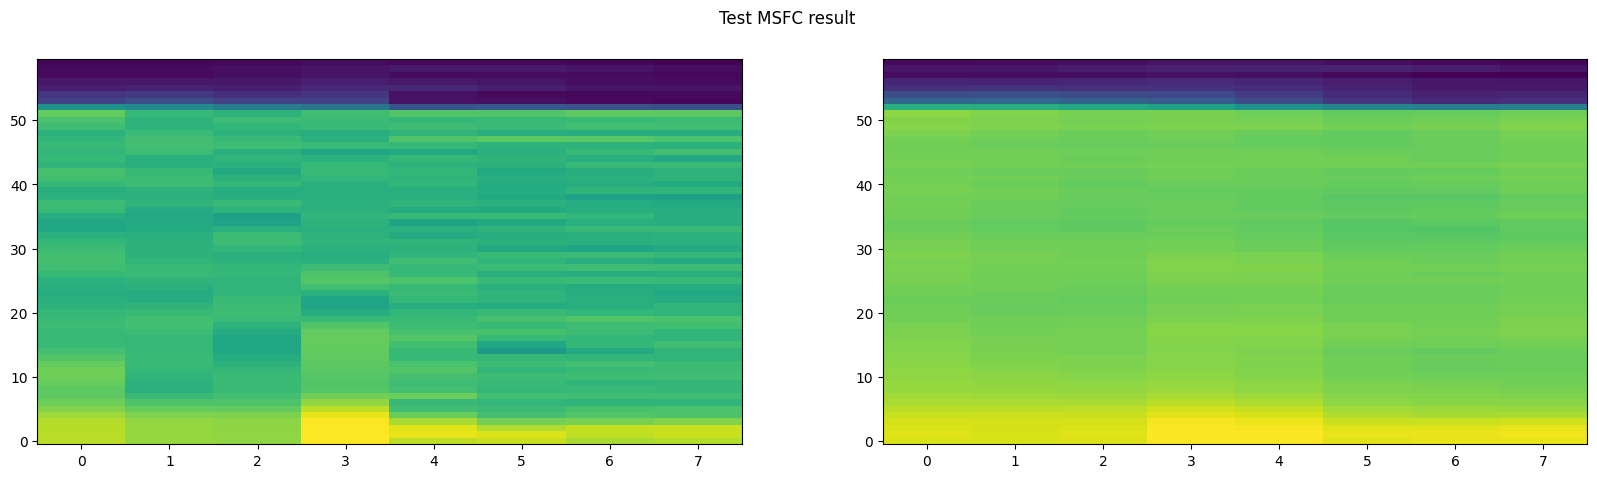

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 65it [00:17,  4.14it/s]

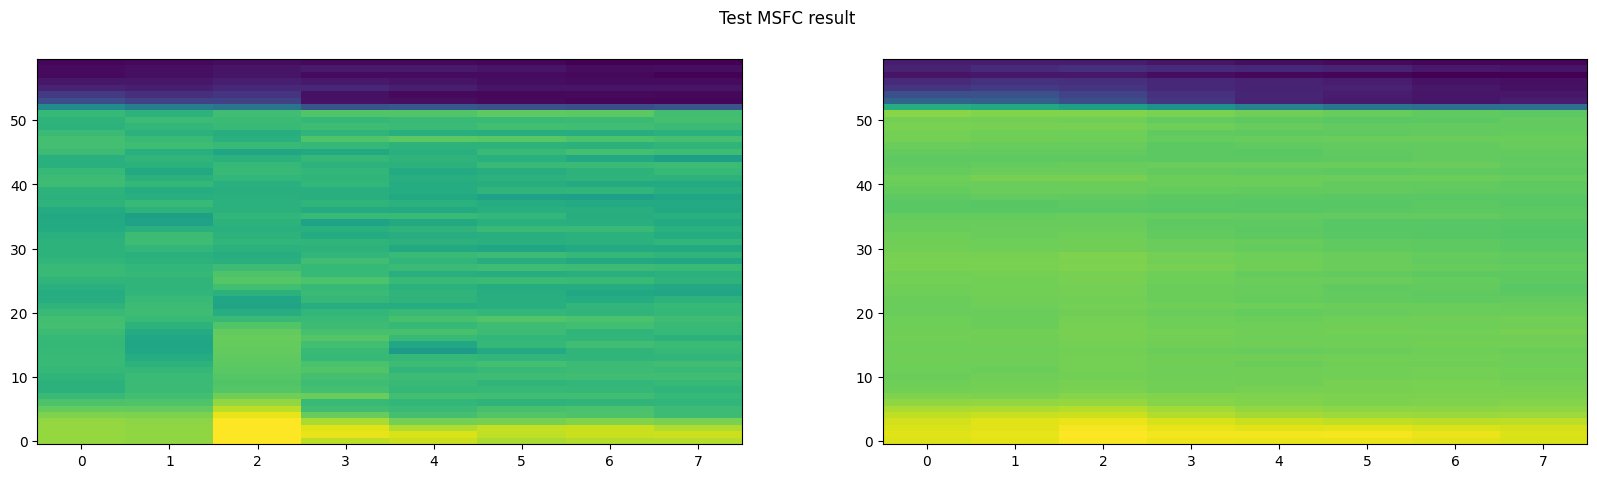

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 66it [00:17,  4.14it/s]

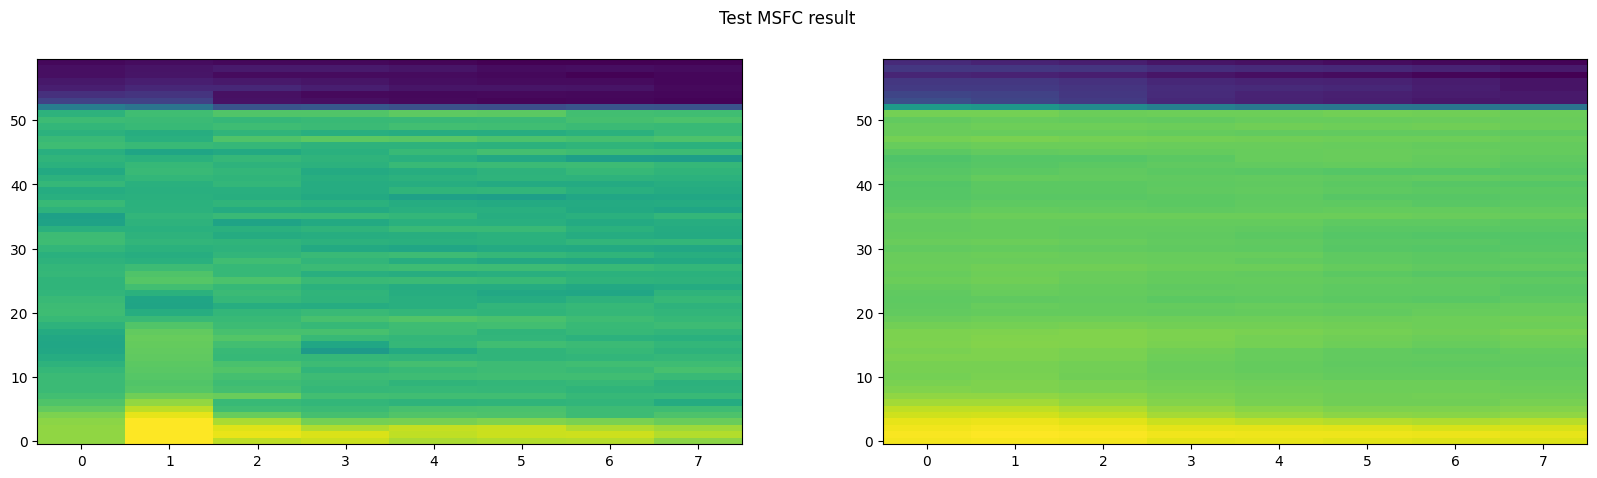

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 67it [00:17,  4.14it/s]

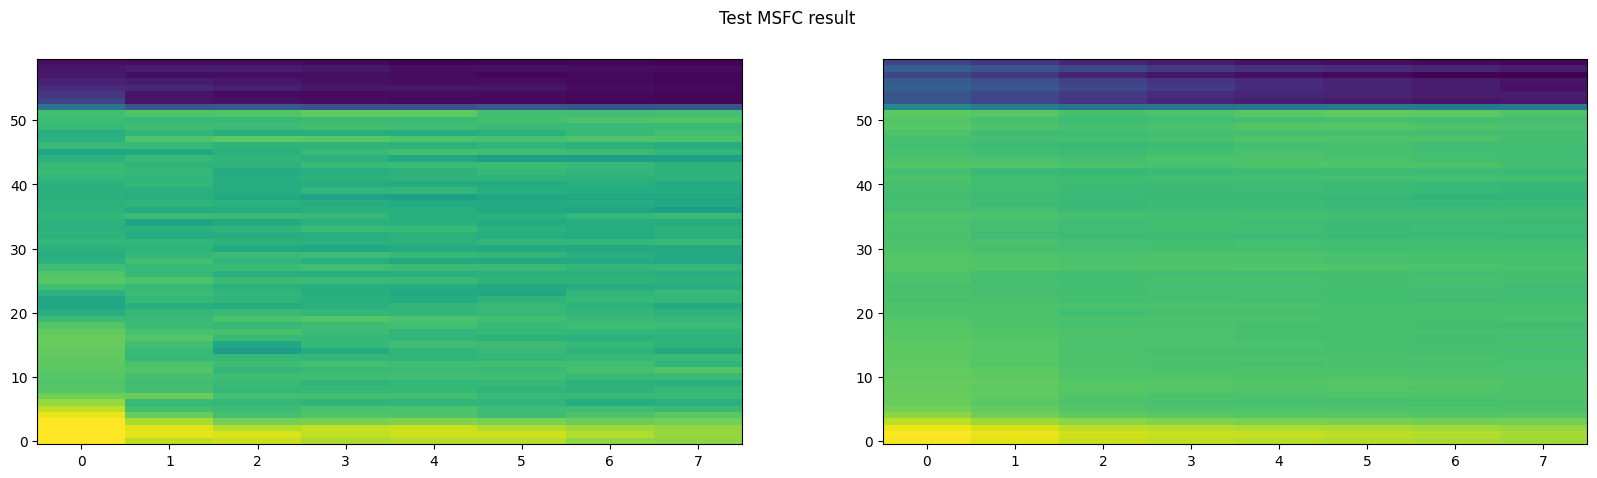

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 68it [00:18,  4.14it/s]

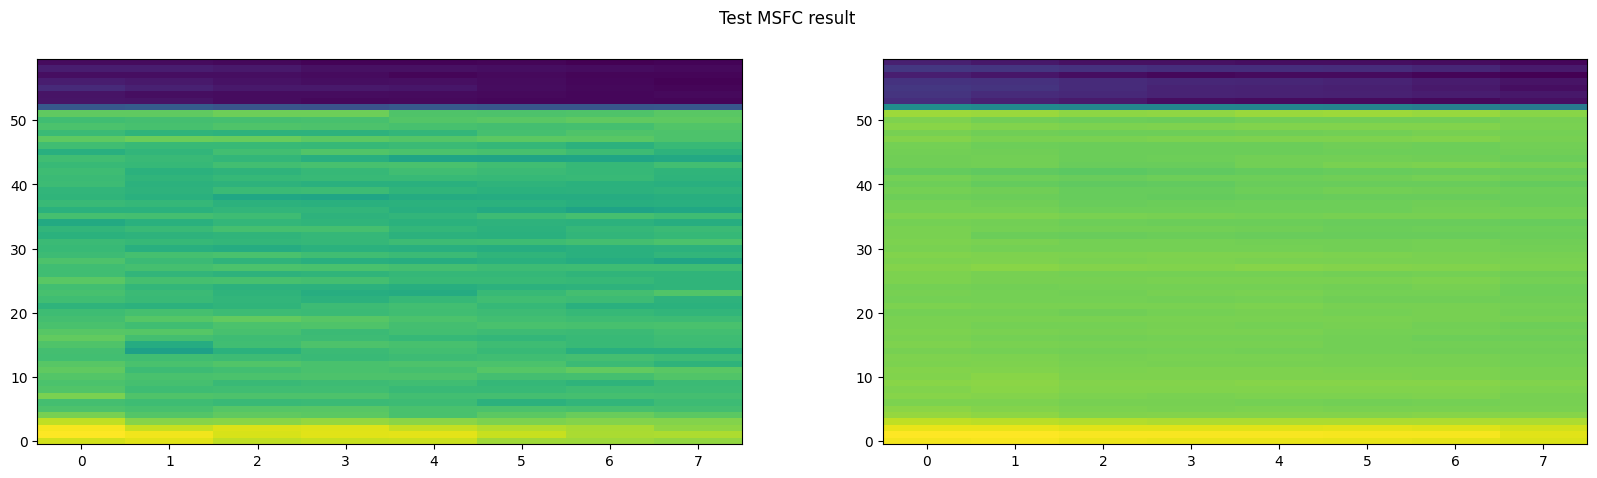

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 69it [00:18,  2.47it/s]

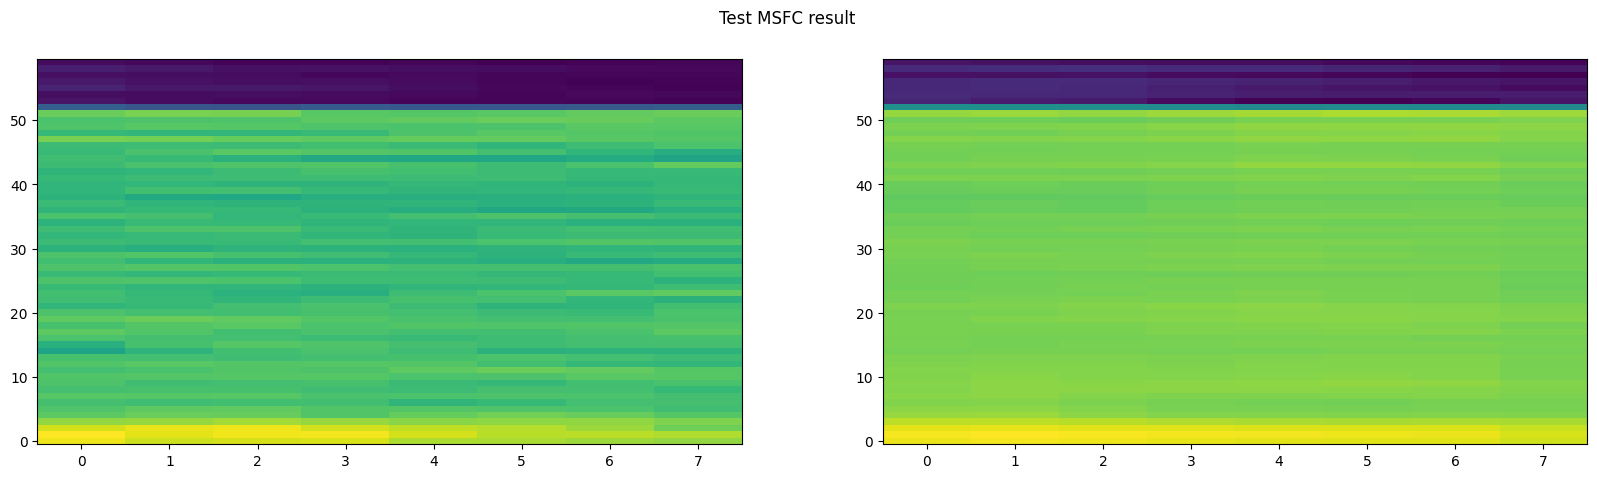

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 70it [00:19,  2.81it/s]

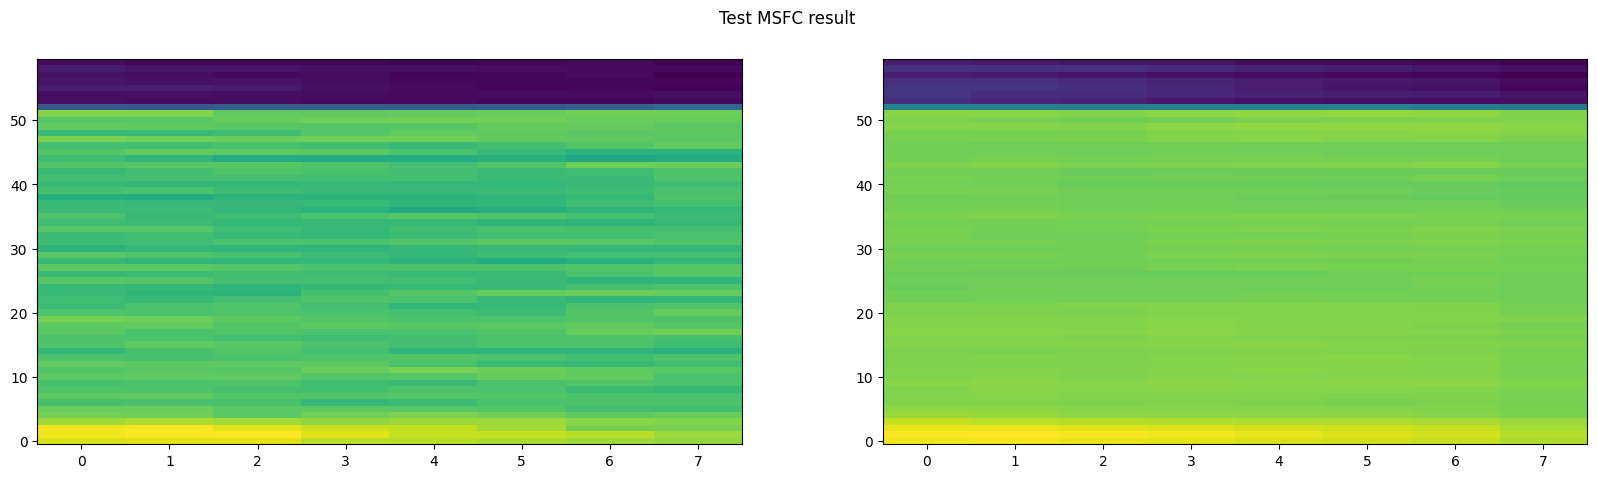

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 71it [00:19,  3.11it/s]

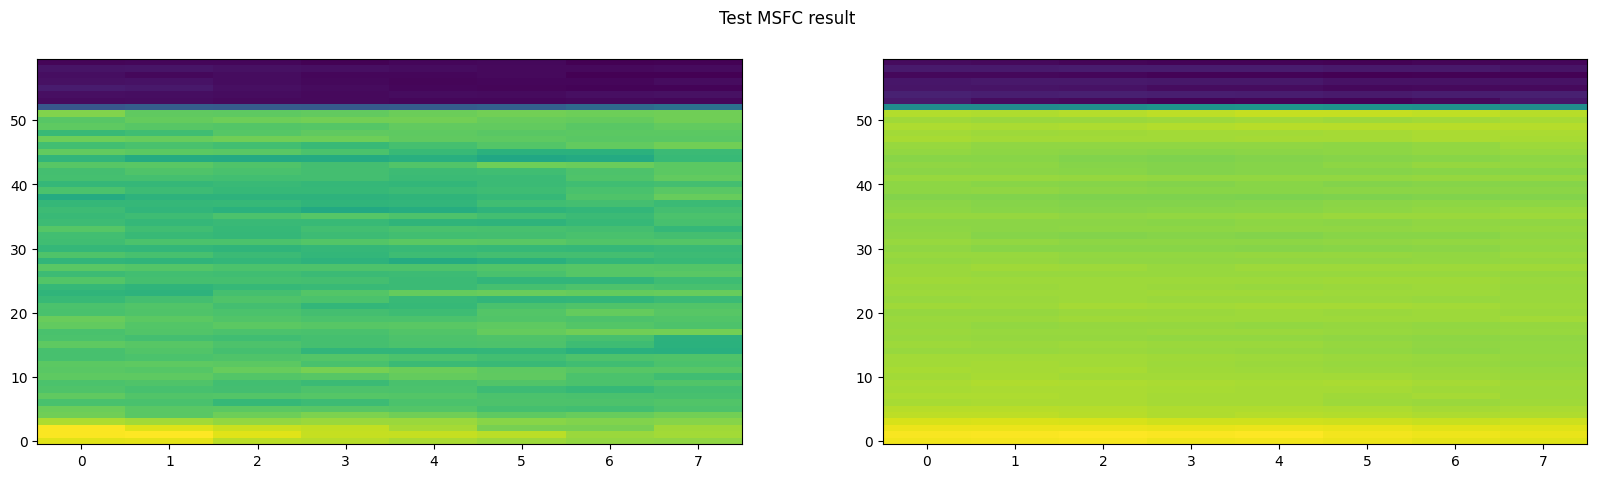

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 72it [00:19,  3.35it/s]

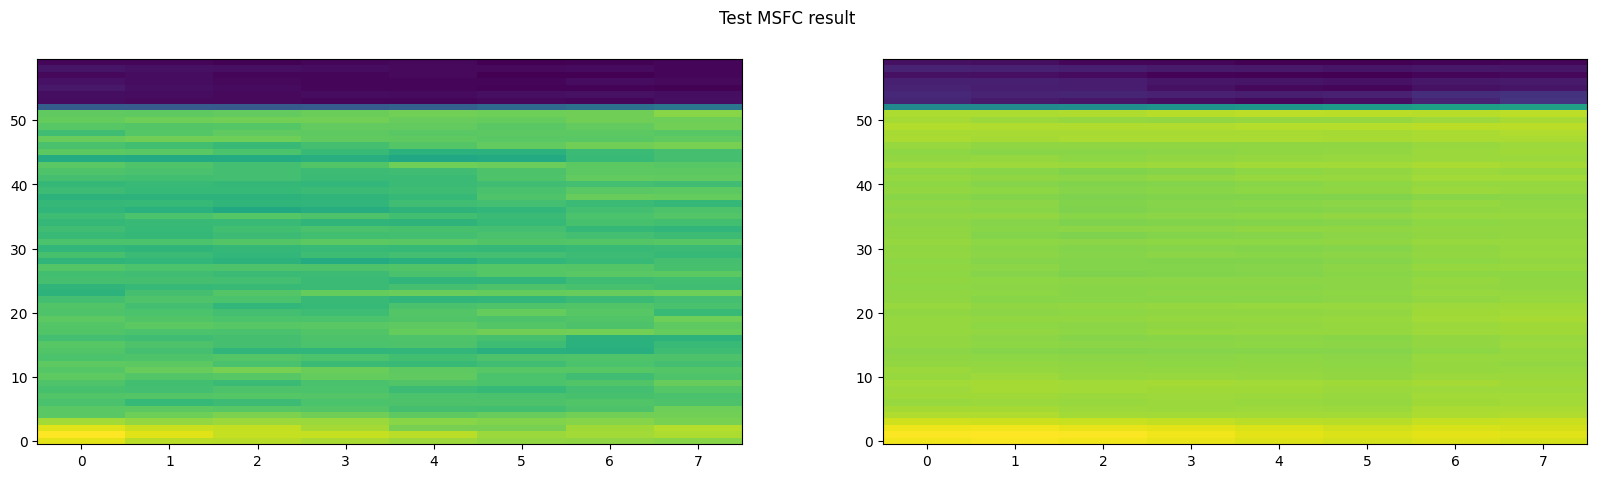

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 73it [00:19,  3.55it/s]

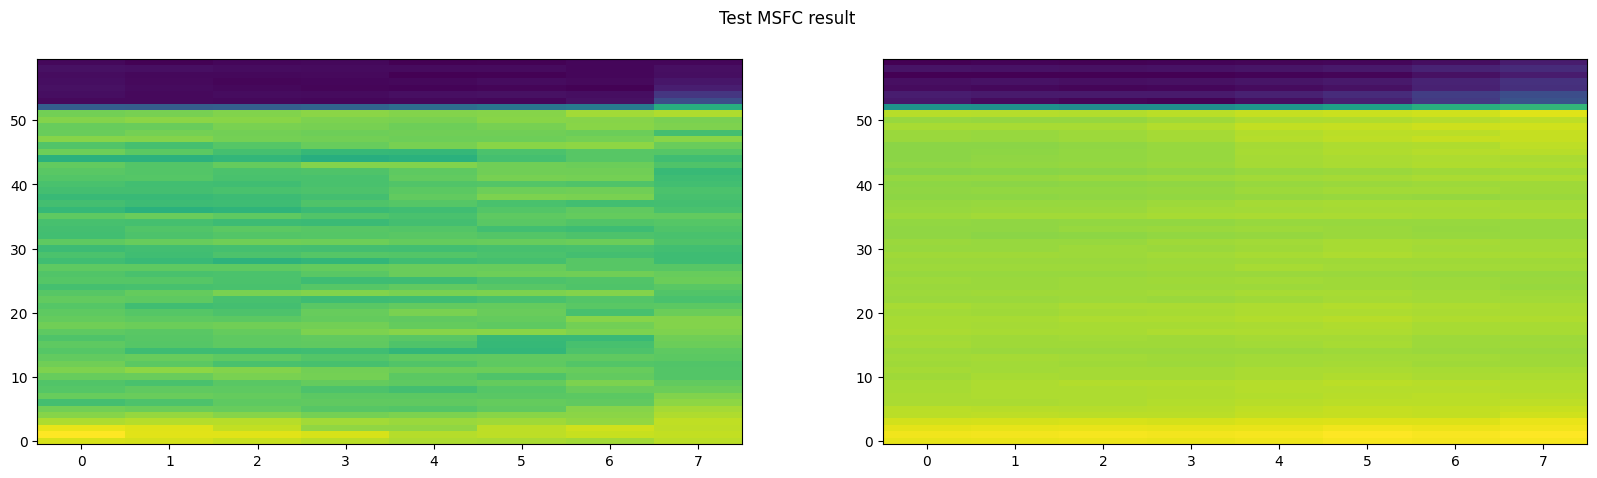

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 74it [00:20,  3.71it/s]

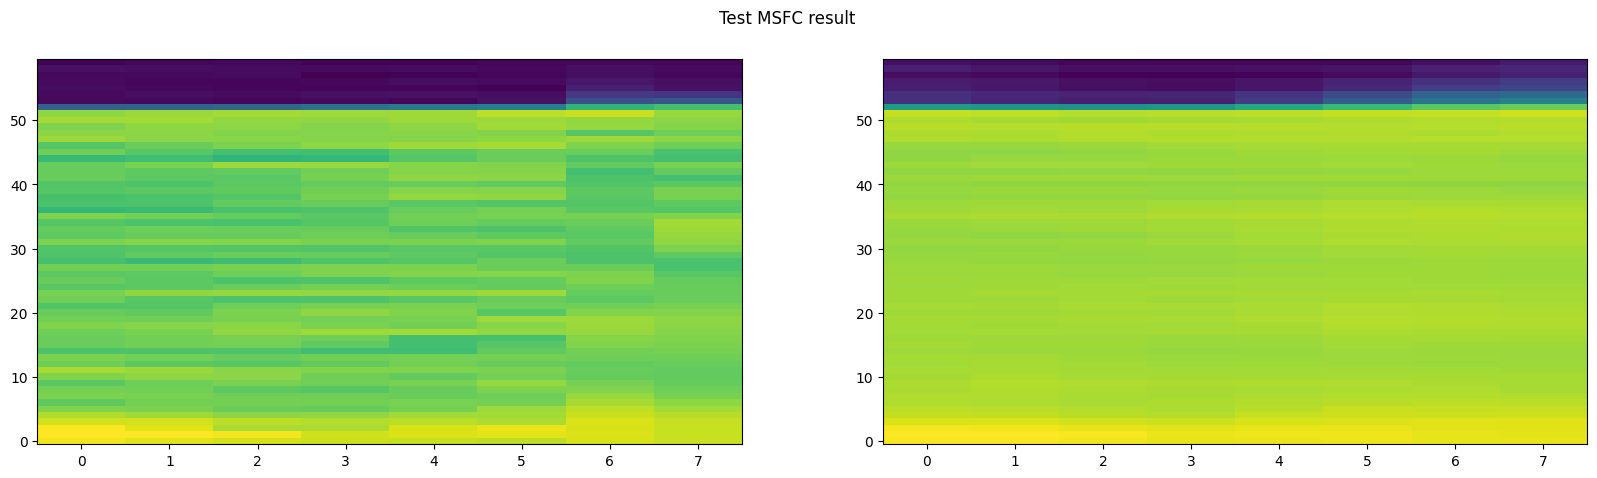

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 75it [00:20,  3.77it/s]

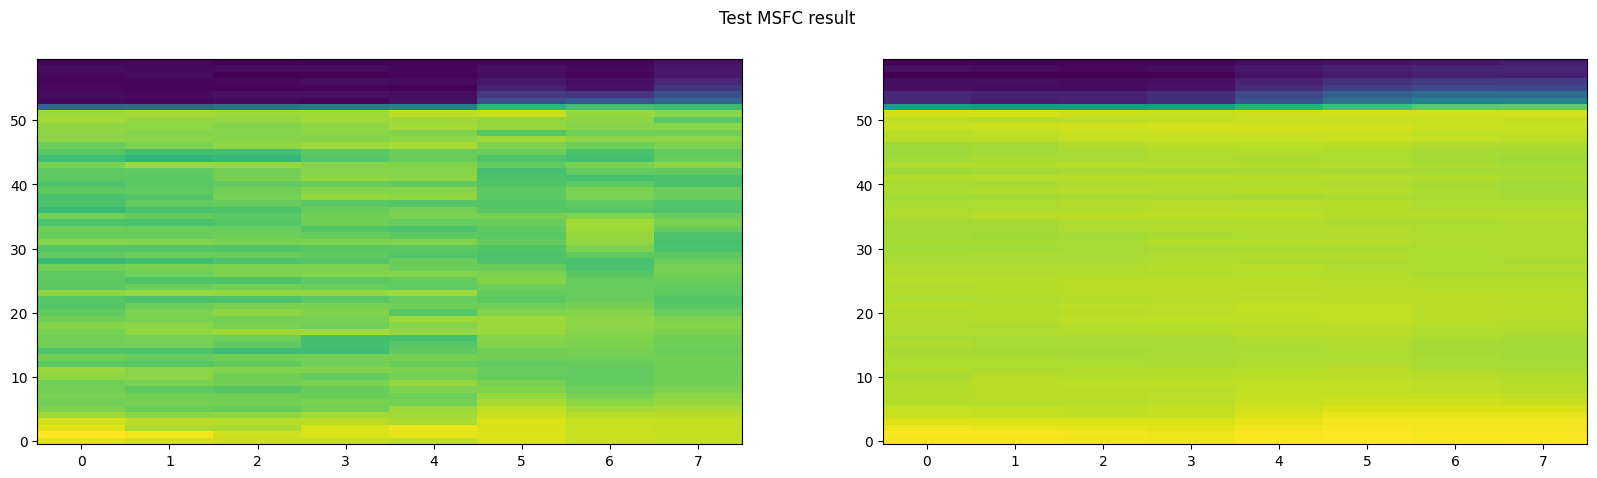

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 76it [00:20,  3.88it/s]

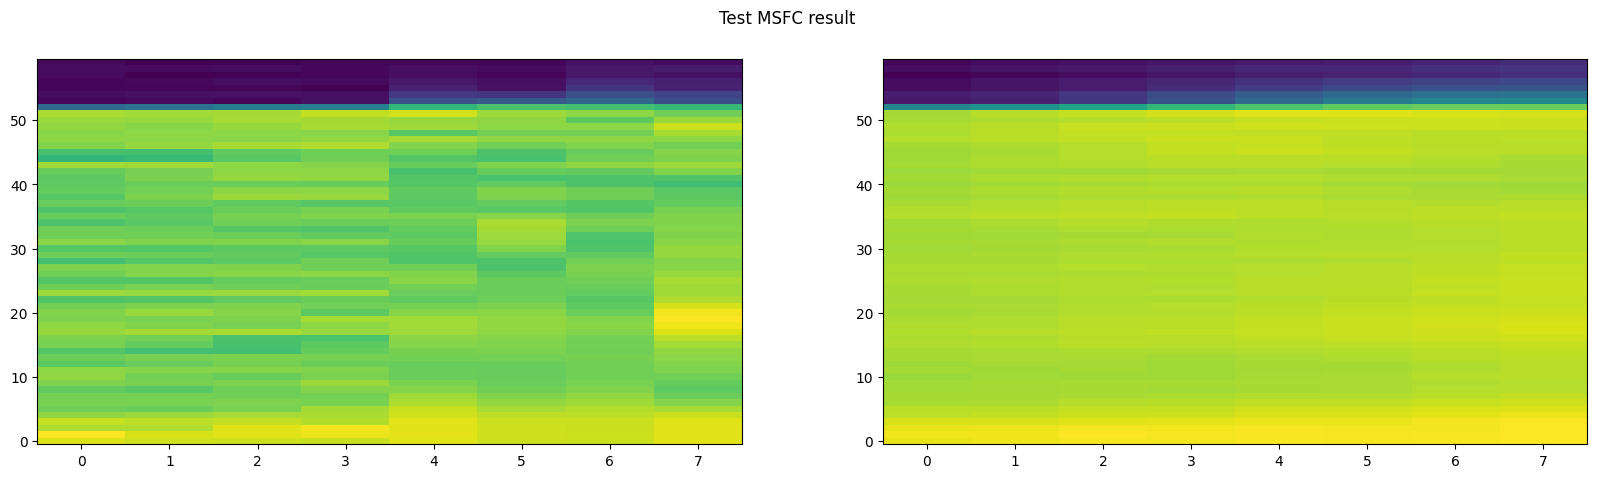

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 77it [00:20,  3.95it/s]

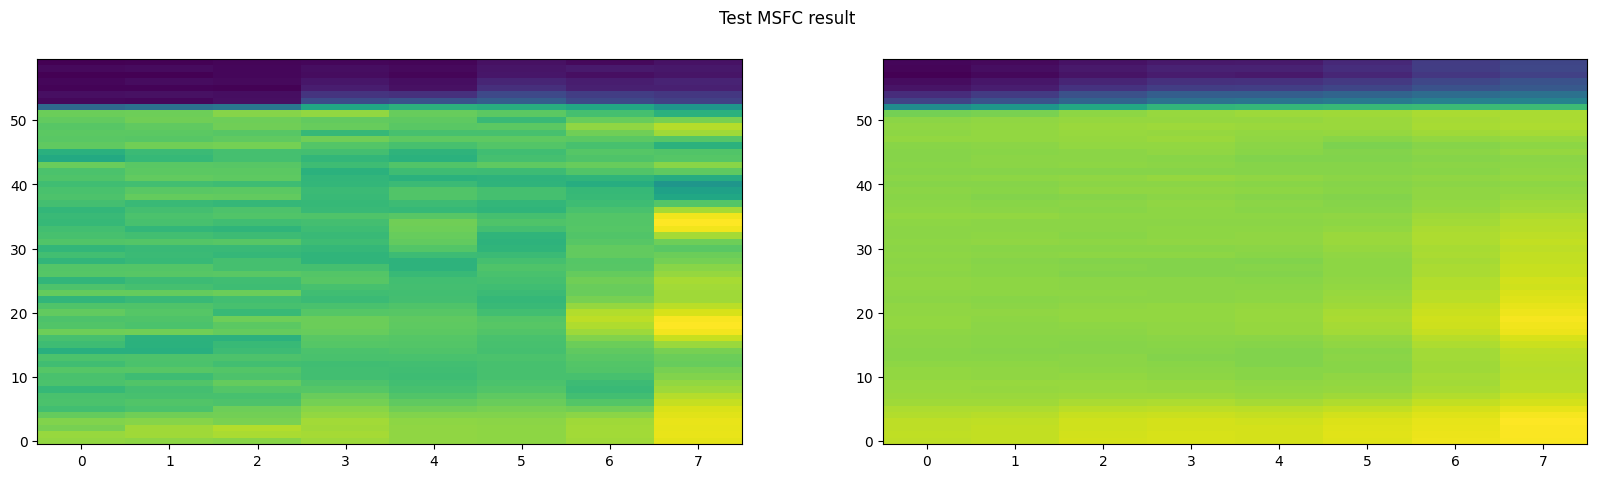

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 78it [00:21,  4.01it/s]

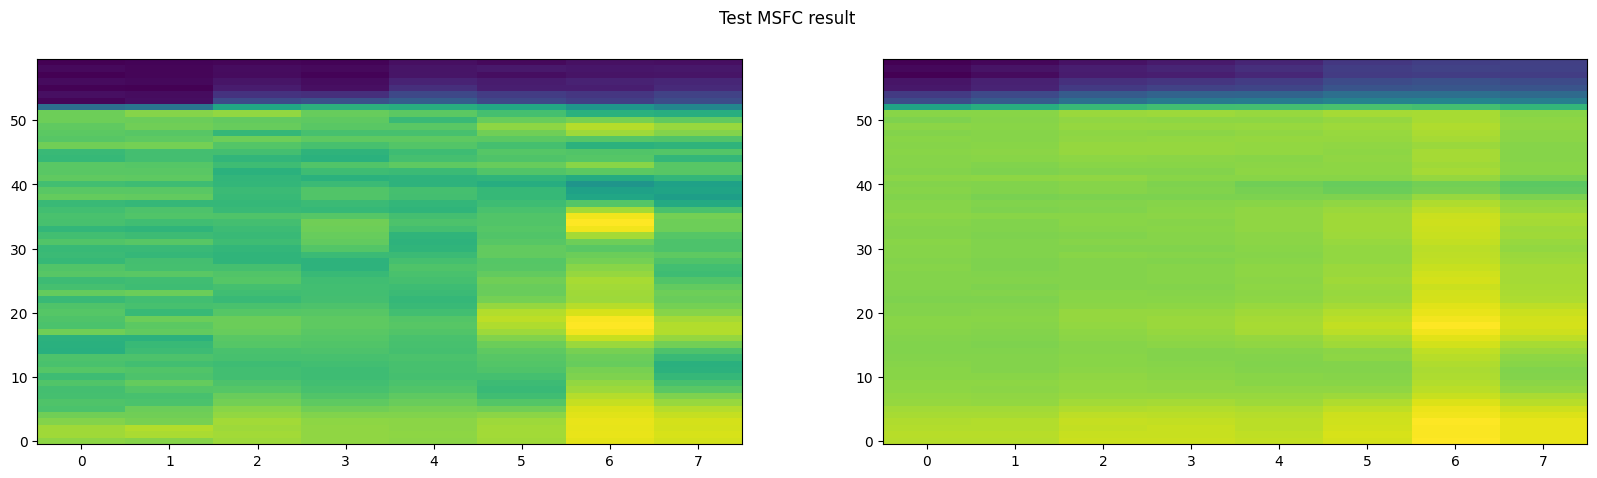

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 79it [00:21,  3.96it/s]

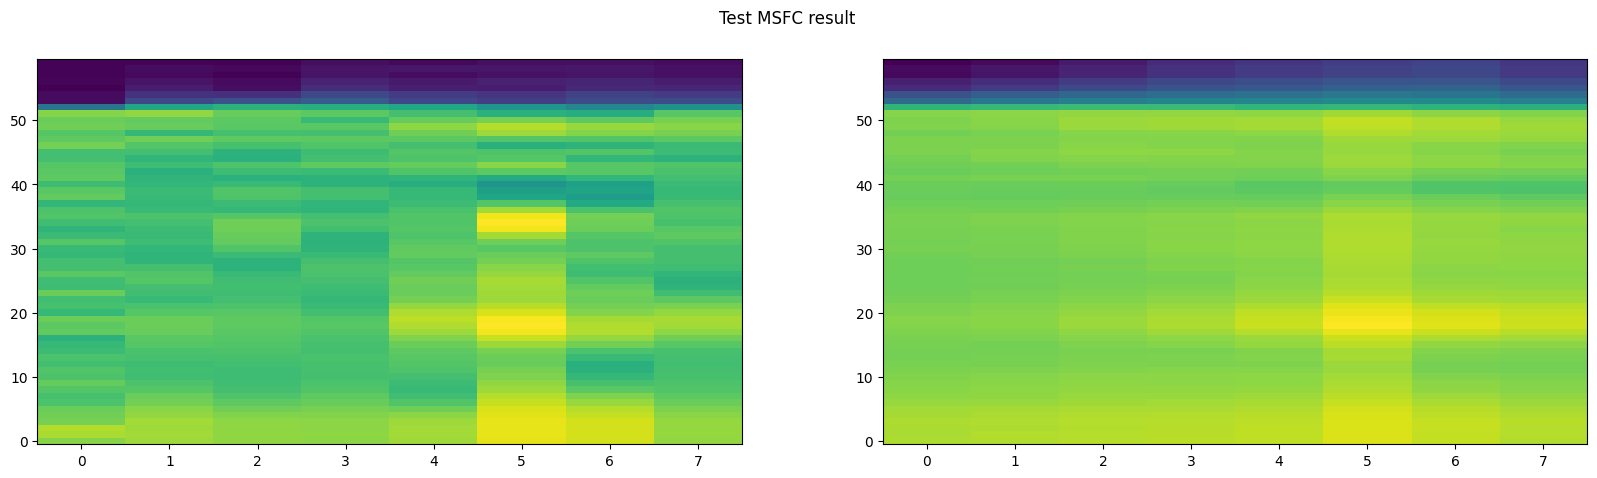

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 80it [00:21,  4.01it/s]

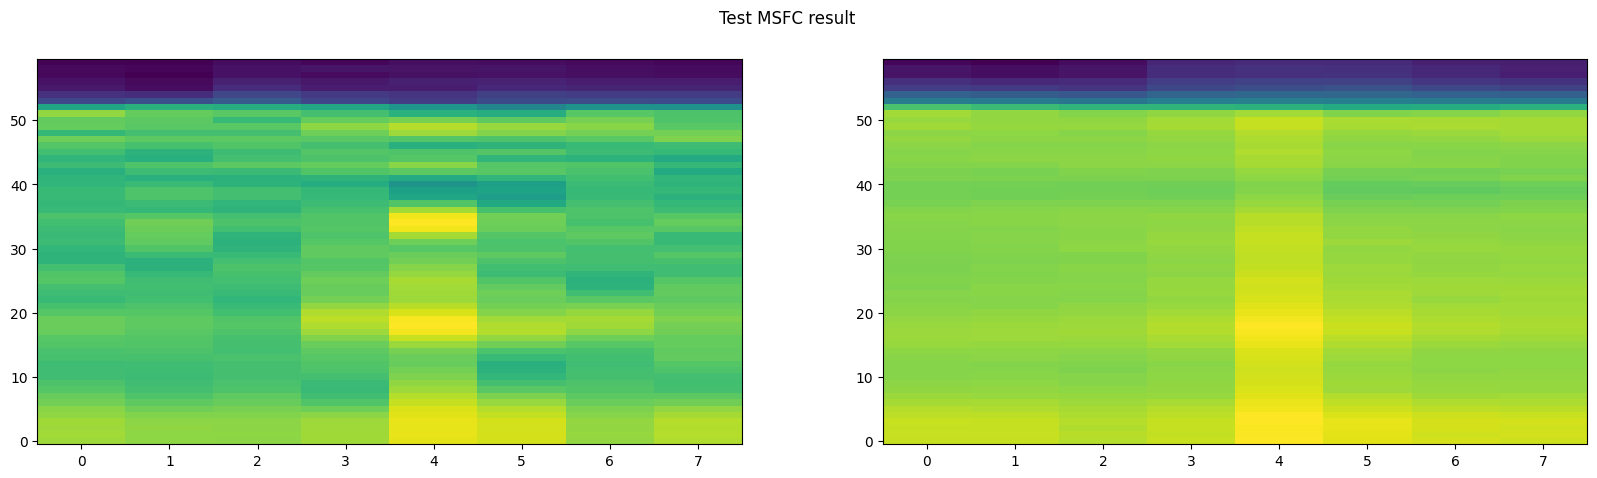

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 81it [00:21,  4.04it/s]

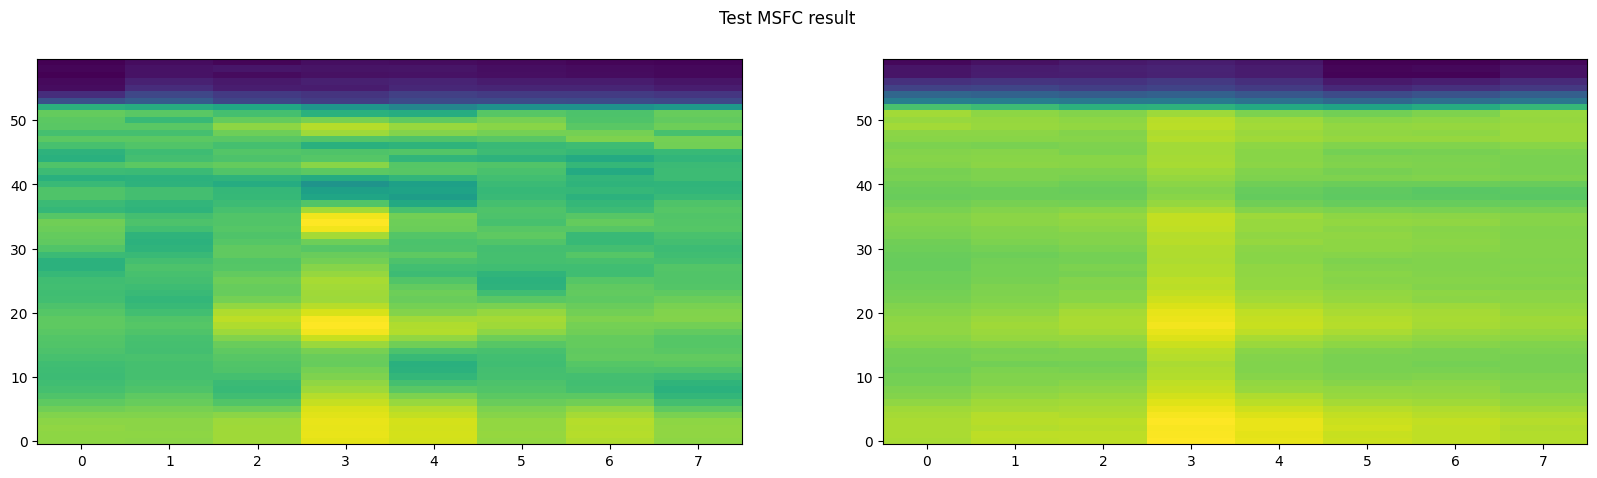

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 82it [00:22,  4.07it/s]

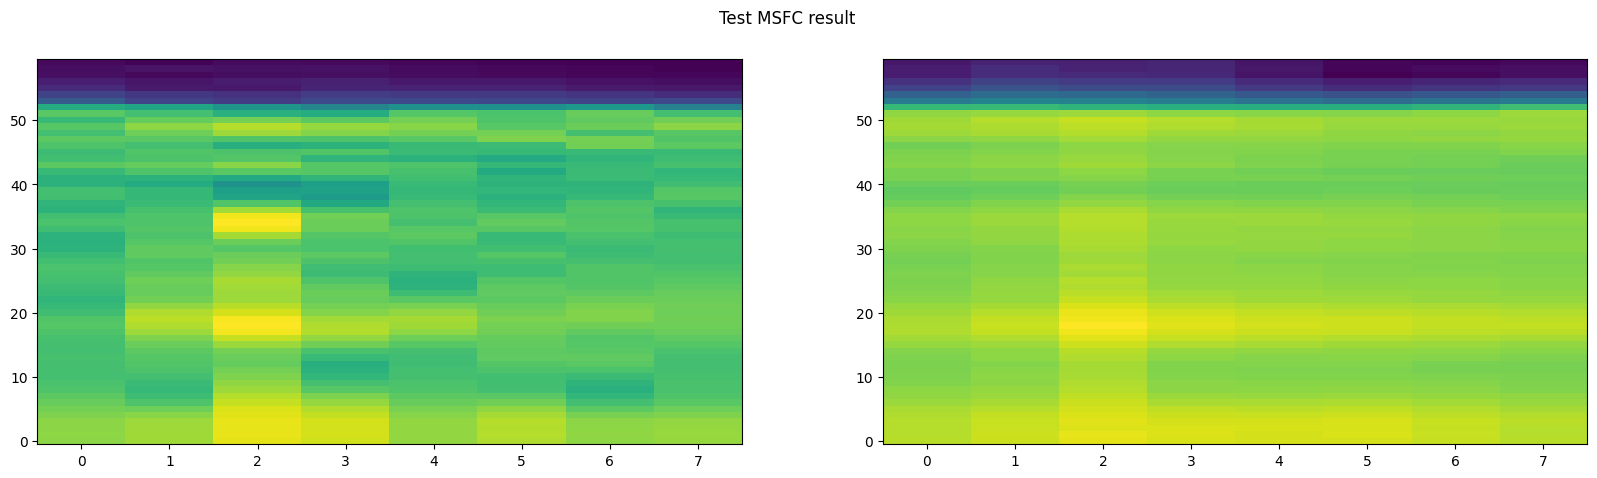

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 83it [00:22,  4.03it/s]

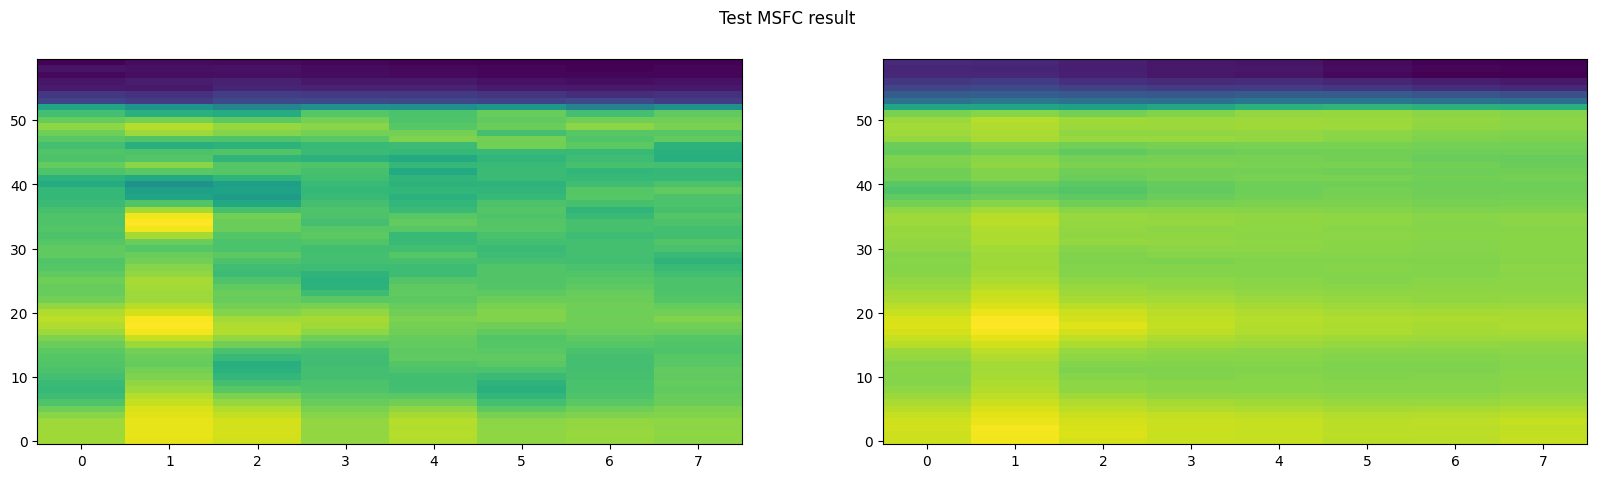

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 84it [00:22,  4.01it/s]

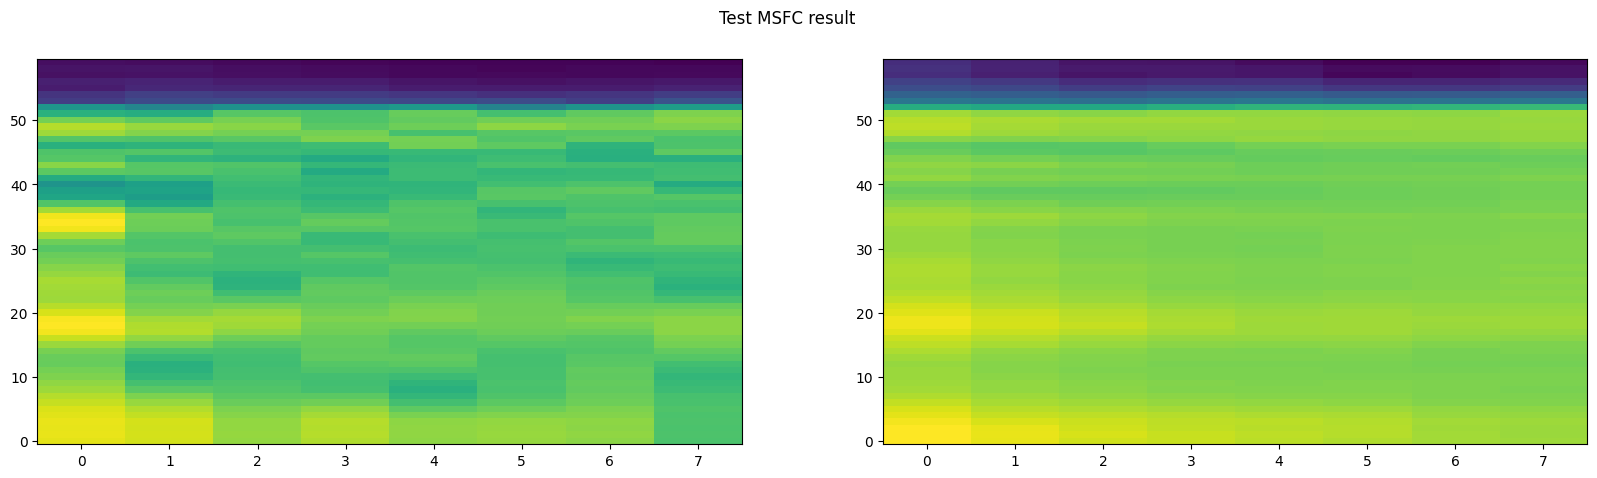

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 85it [00:22,  4.05it/s]

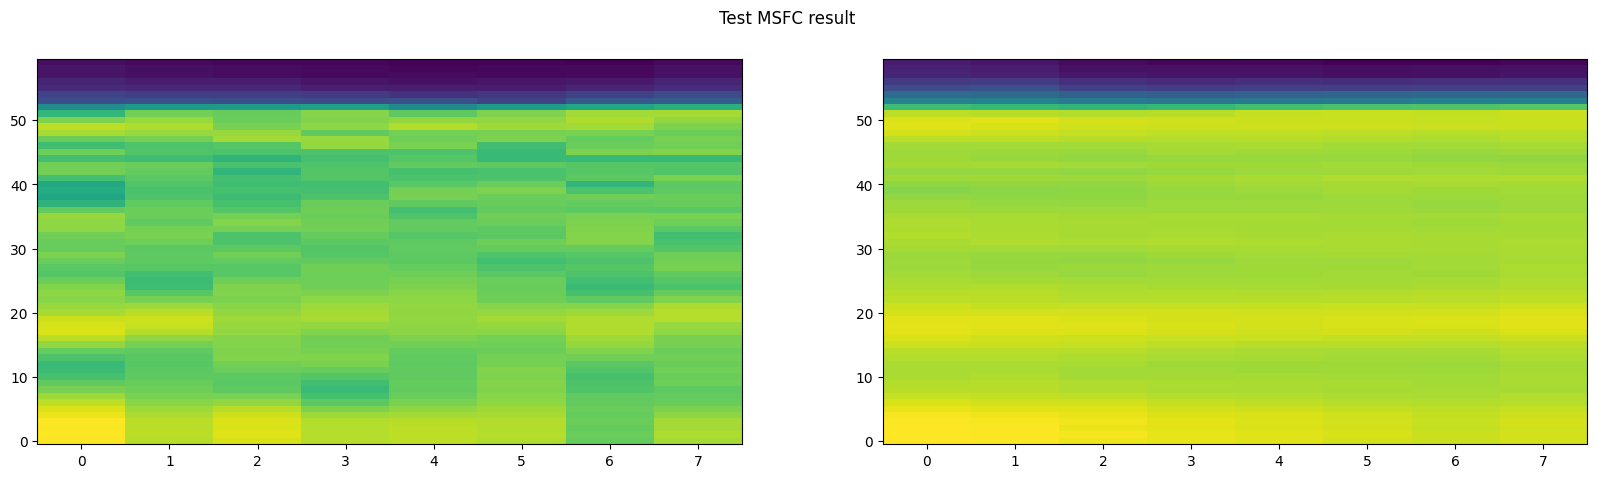

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 86it [00:23,  4.08it/s]

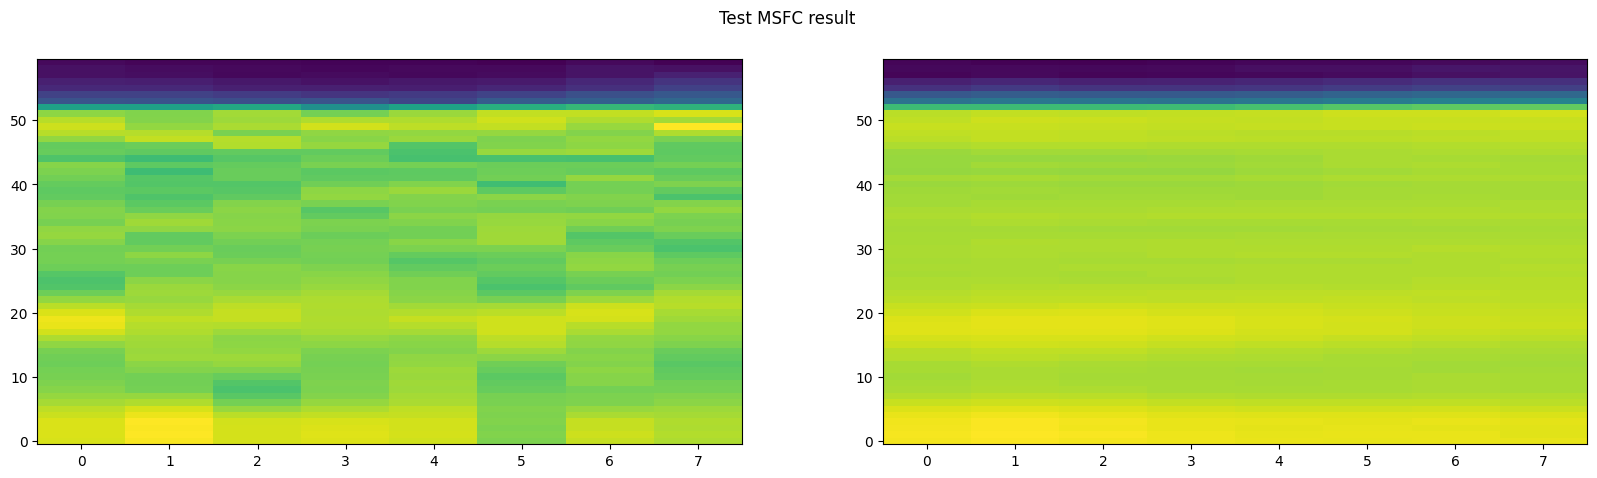

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 87it [00:23,  4.05it/s]

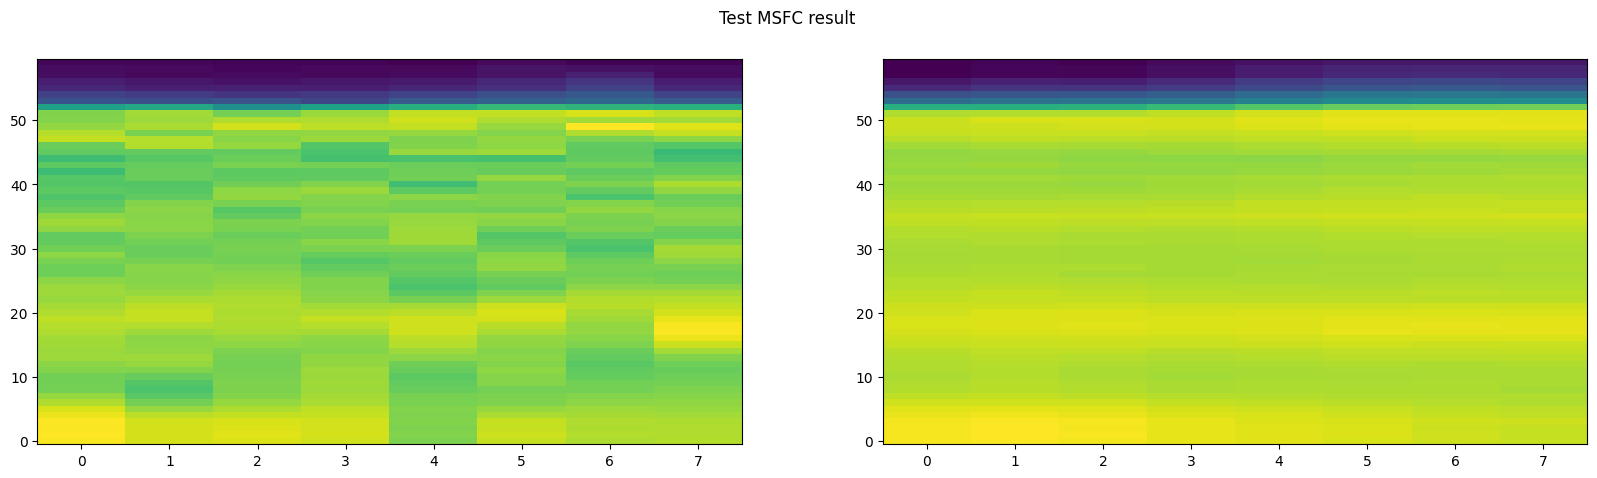

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 88it [00:23,  4.08it/s]

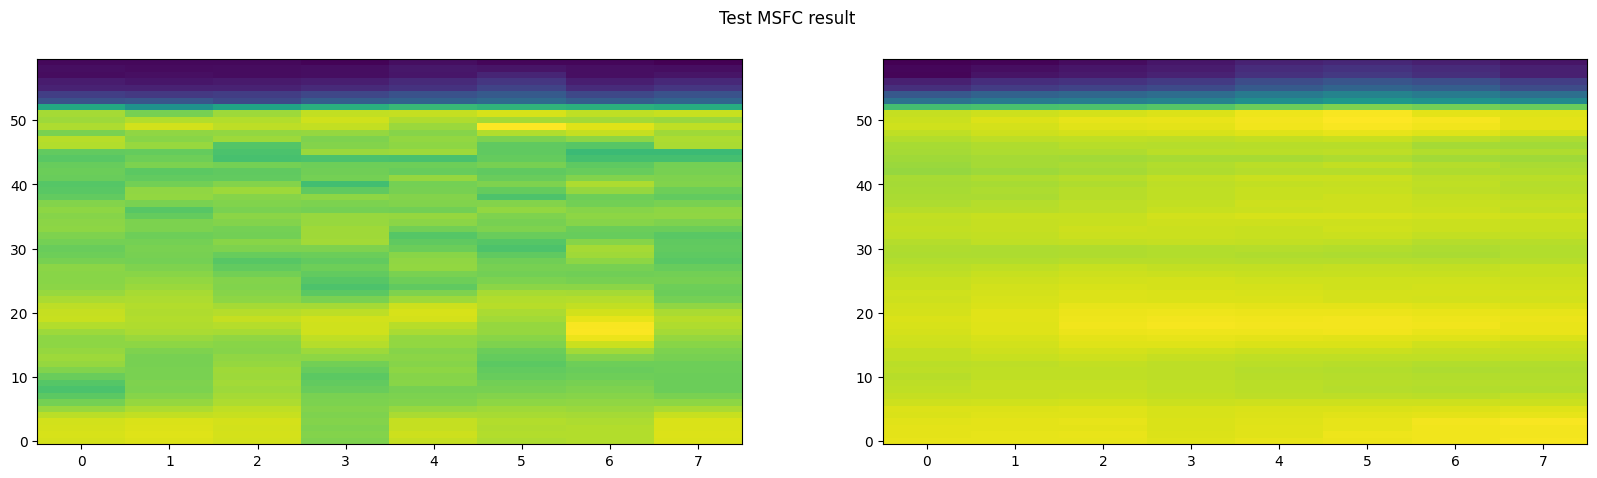

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 89it [00:23,  4.09it/s]

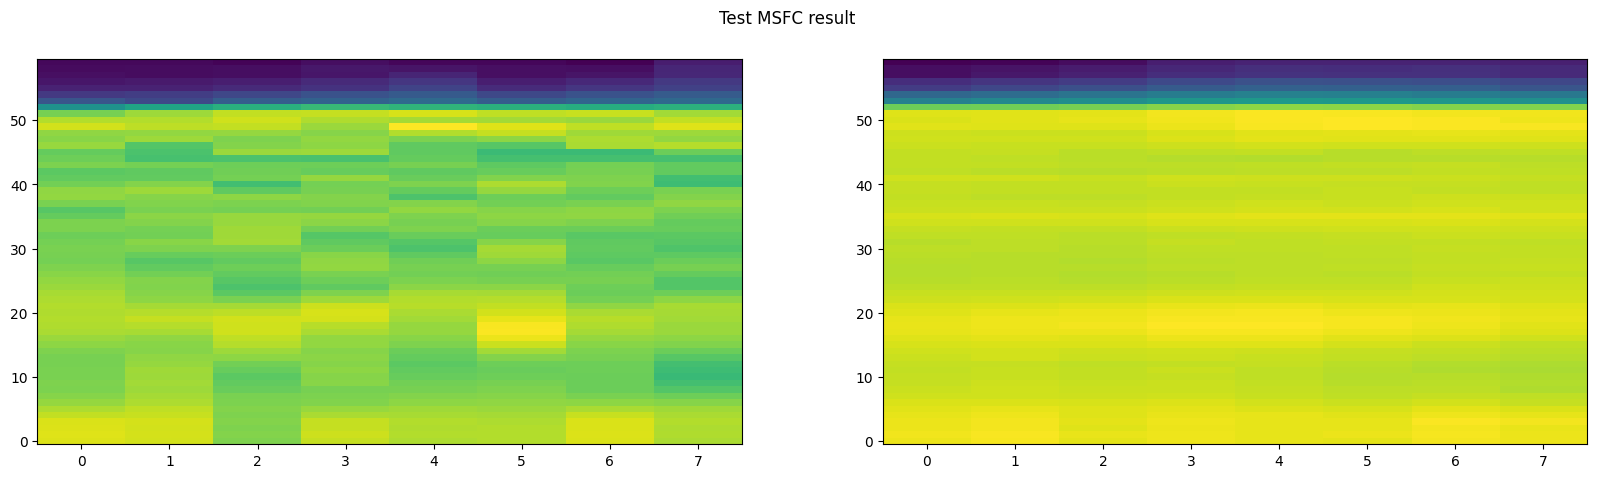

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 90it [00:24,  4.08it/s]

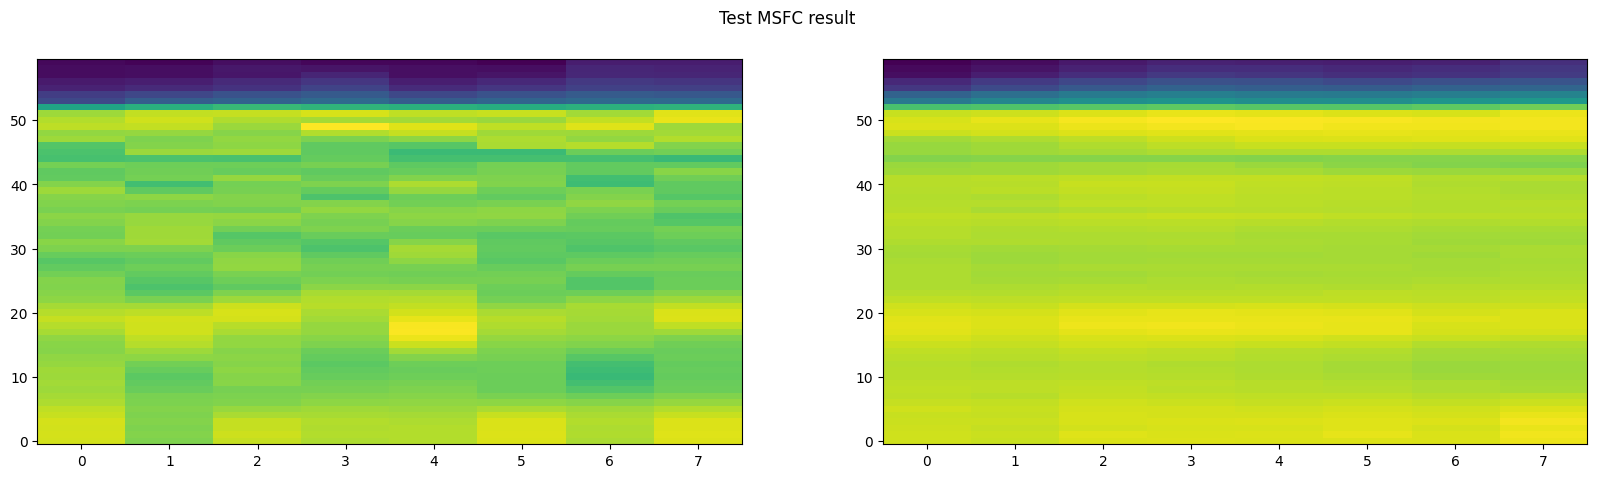

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 91it [00:24,  4.10it/s]

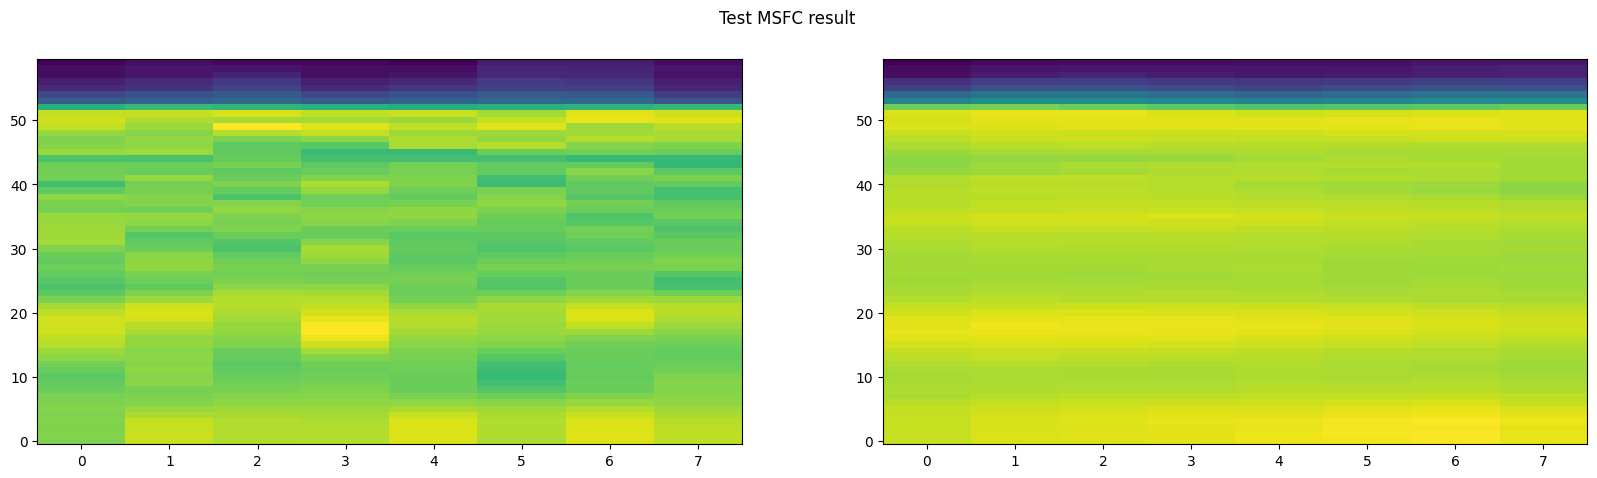

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 92it [00:24,  4.11it/s]

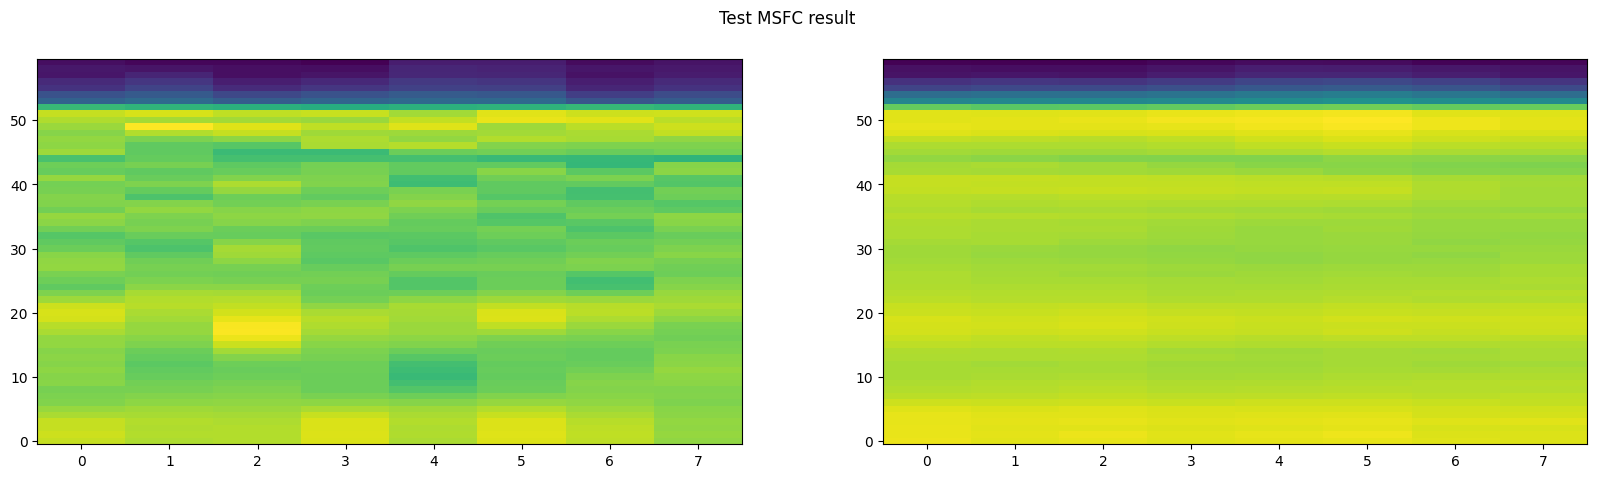

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 93it [00:24,  4.12it/s]

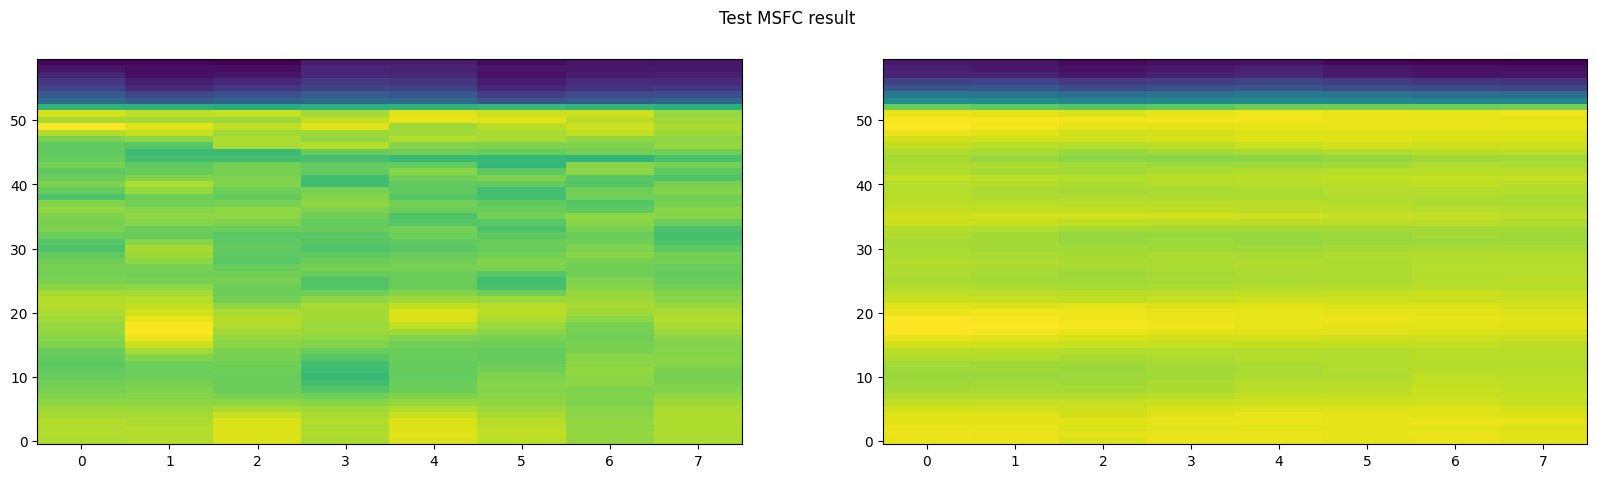

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 94it [00:24,  4.13it/s]

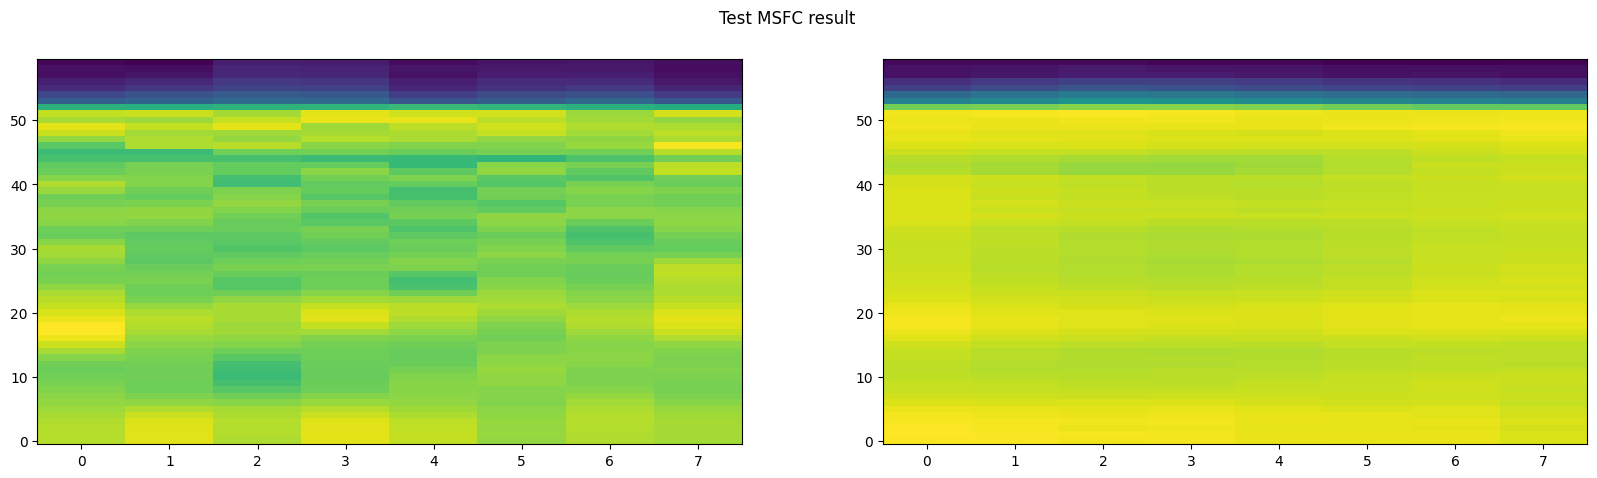

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 95it [00:25,  4.13it/s]

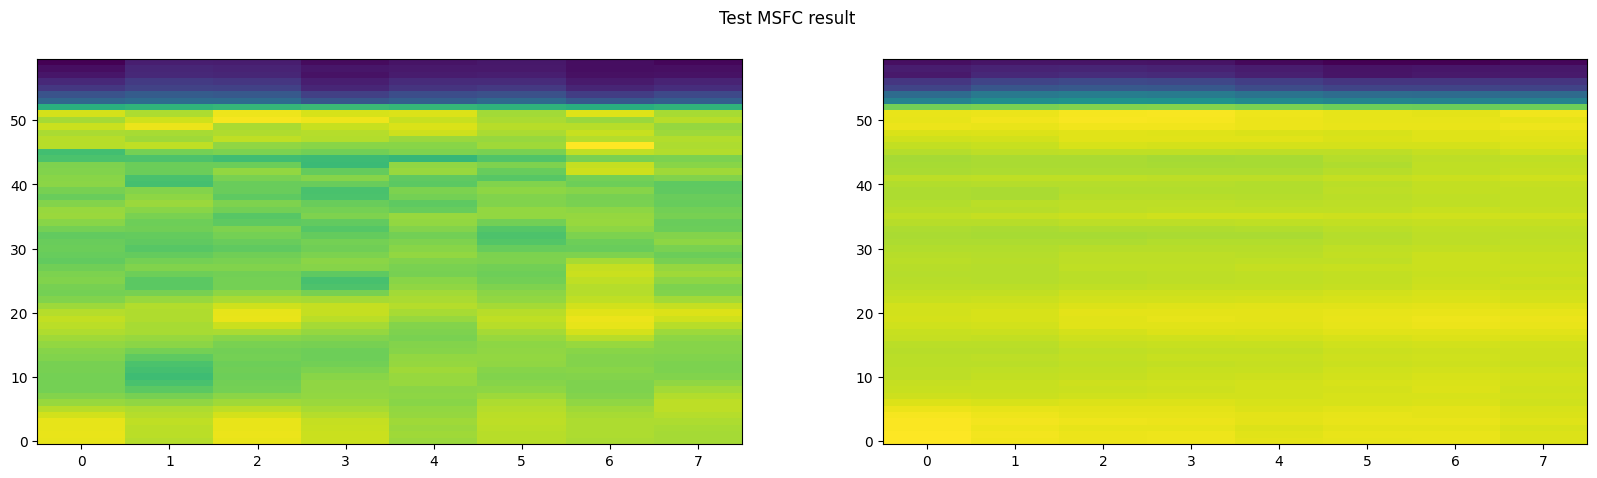

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 96it [00:25,  4.13it/s]

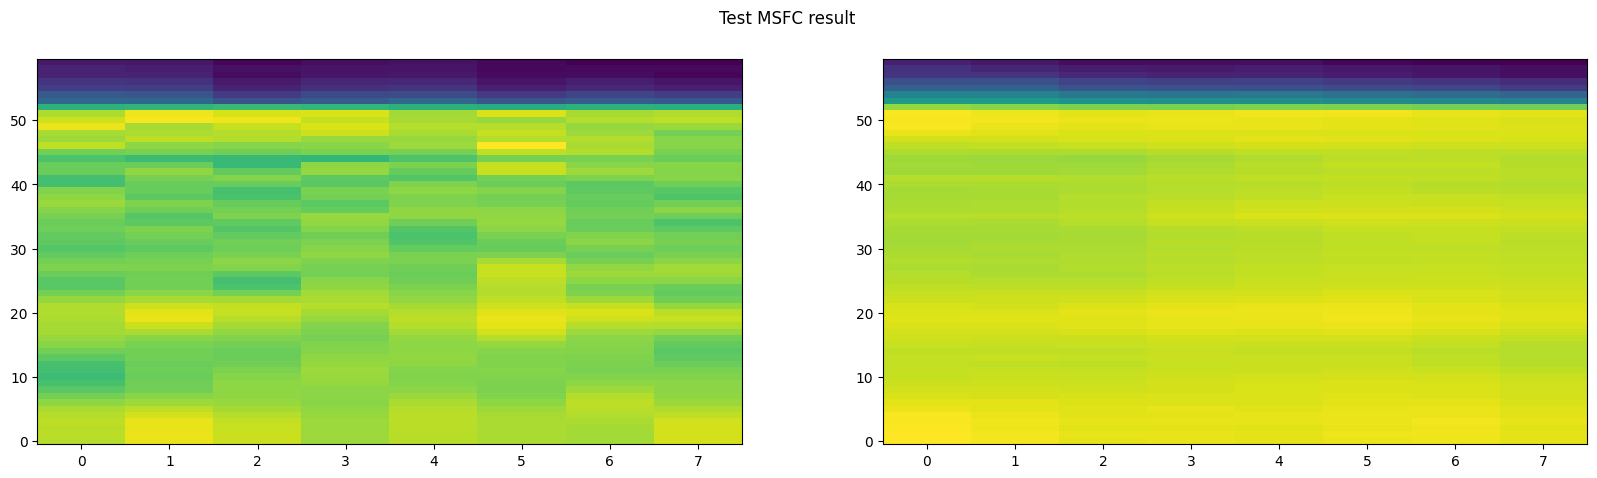

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 97it [00:25,  4.11it/s]

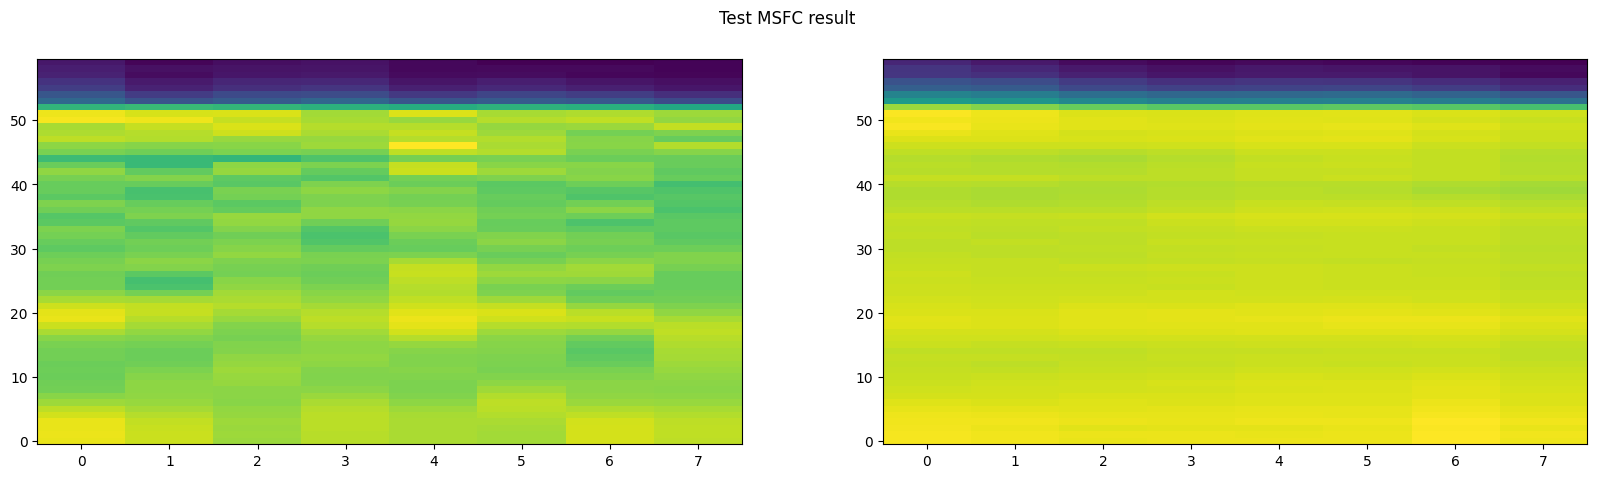

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 98it [00:26,  2.53it/s]

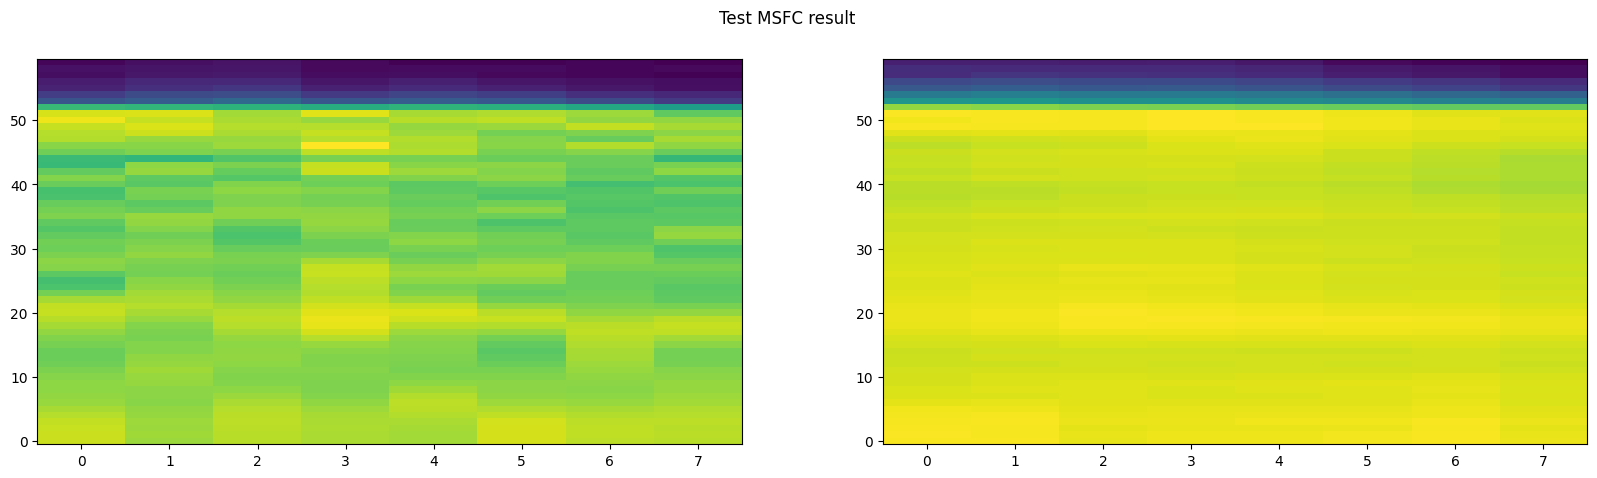

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 99it [00:26,  2.86it/s]

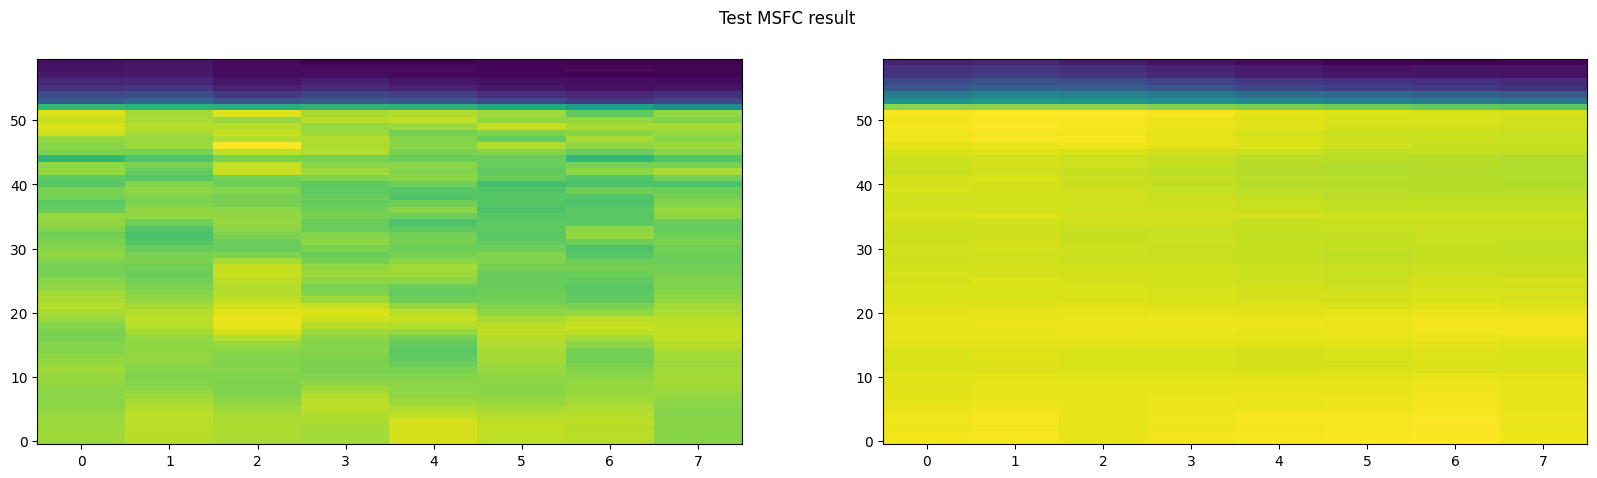

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 100it [00:26,  3.15it/s]

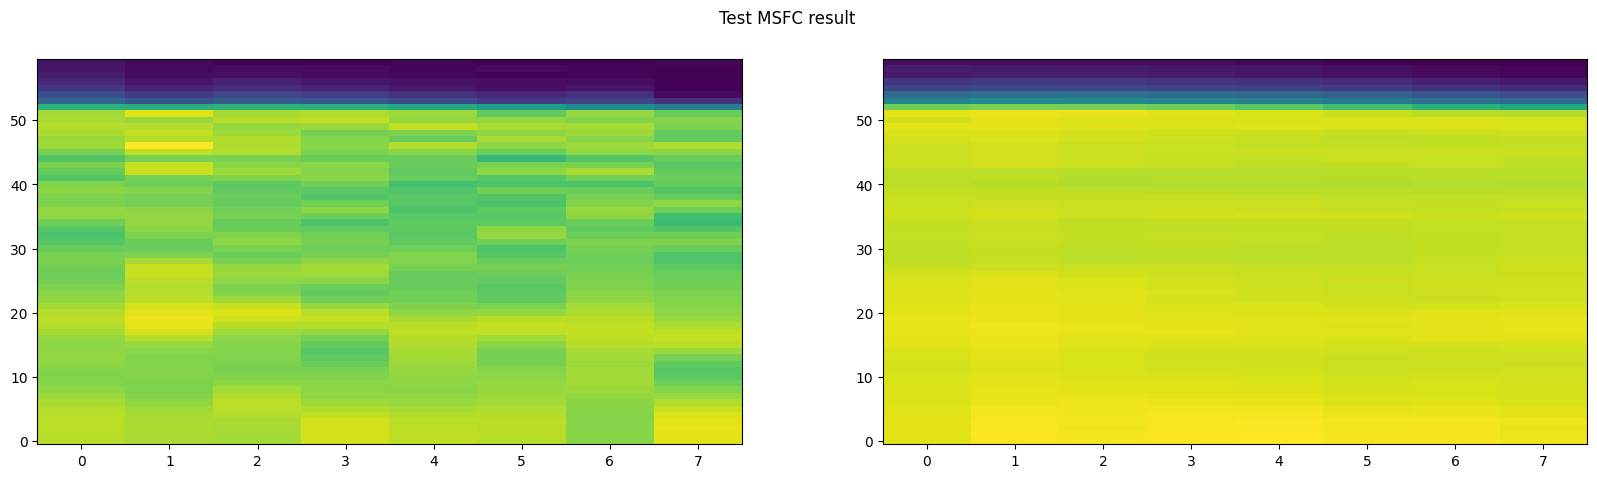

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 101it [00:27,  3.39it/s]

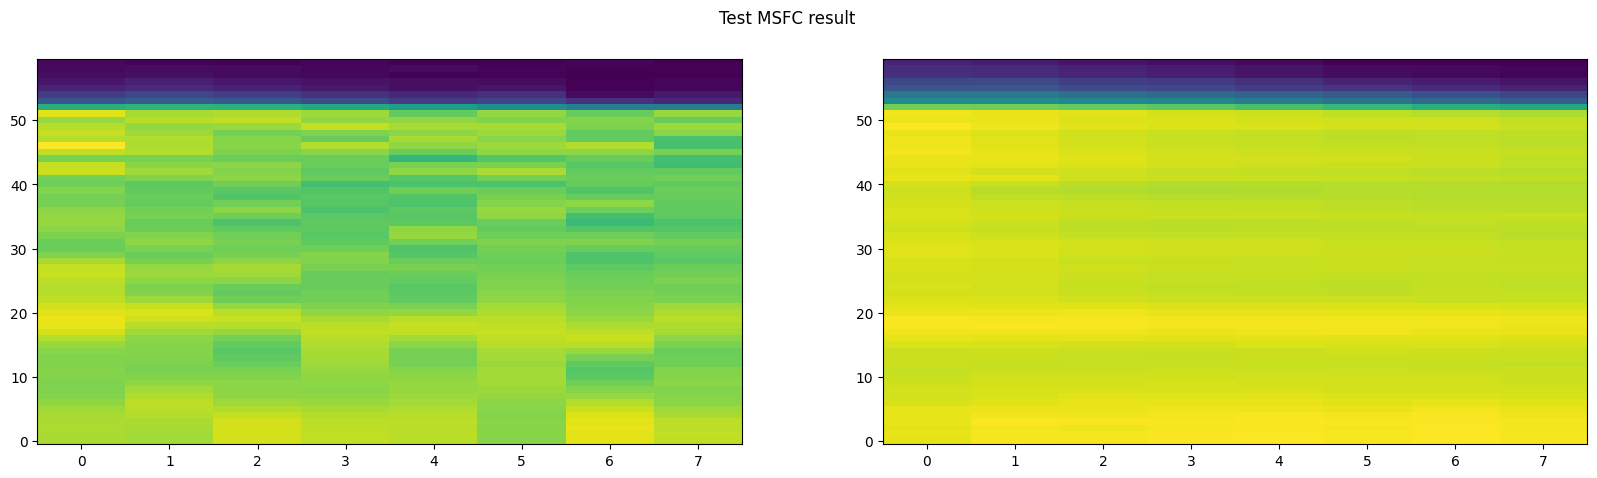

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 102it [00:27,  3.59it/s]

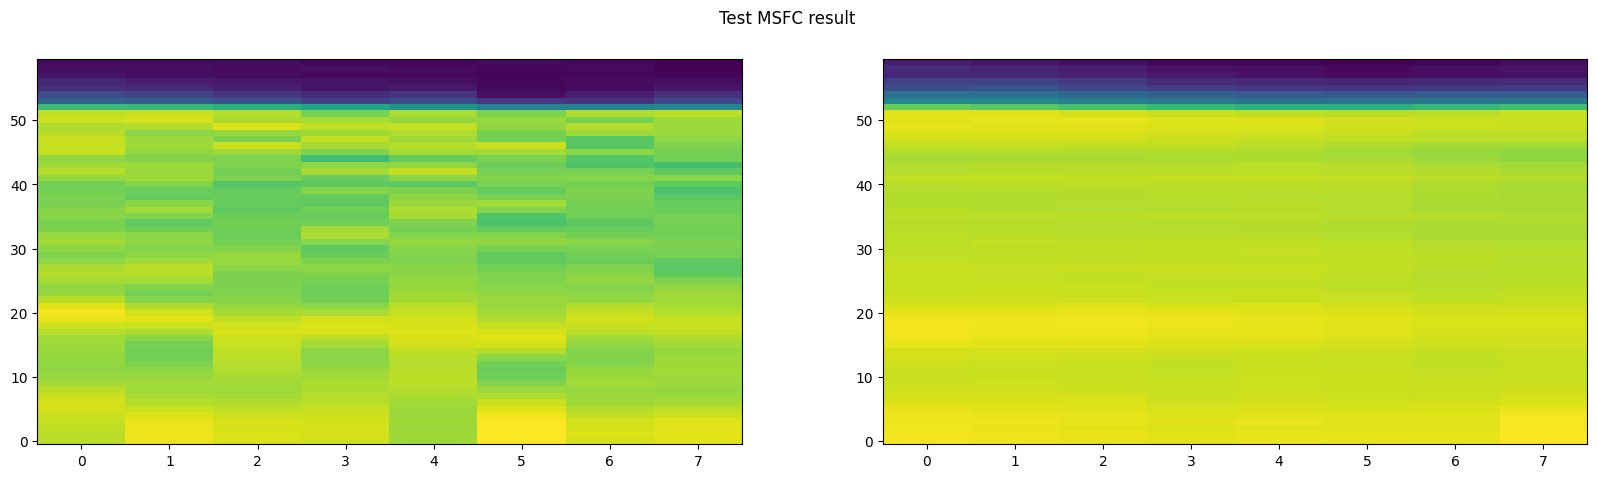

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 103it [00:27,  3.73it/s]

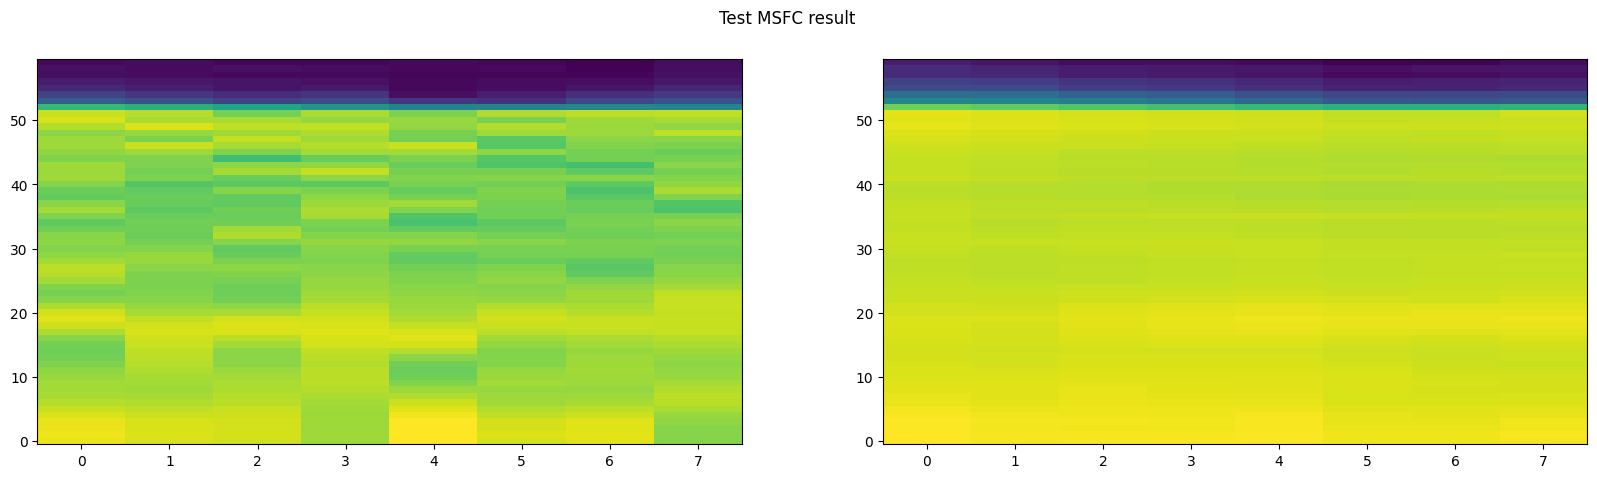

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 104it [00:27,  3.84it/s]

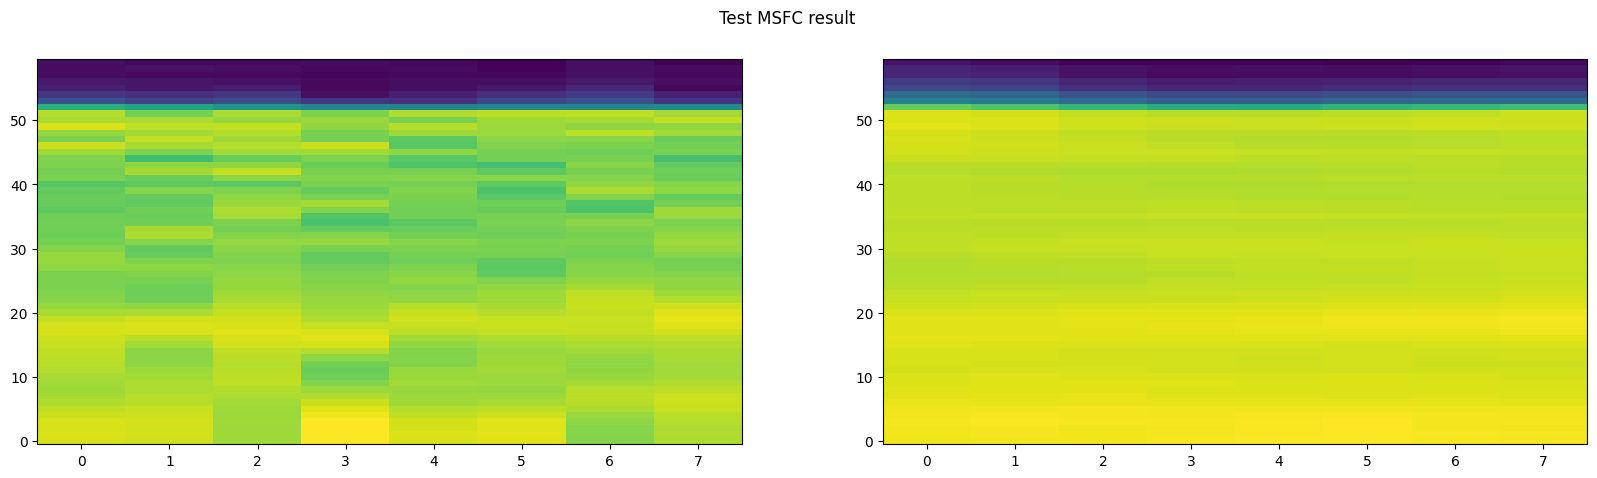

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 105it [00:28,  3.92it/s]

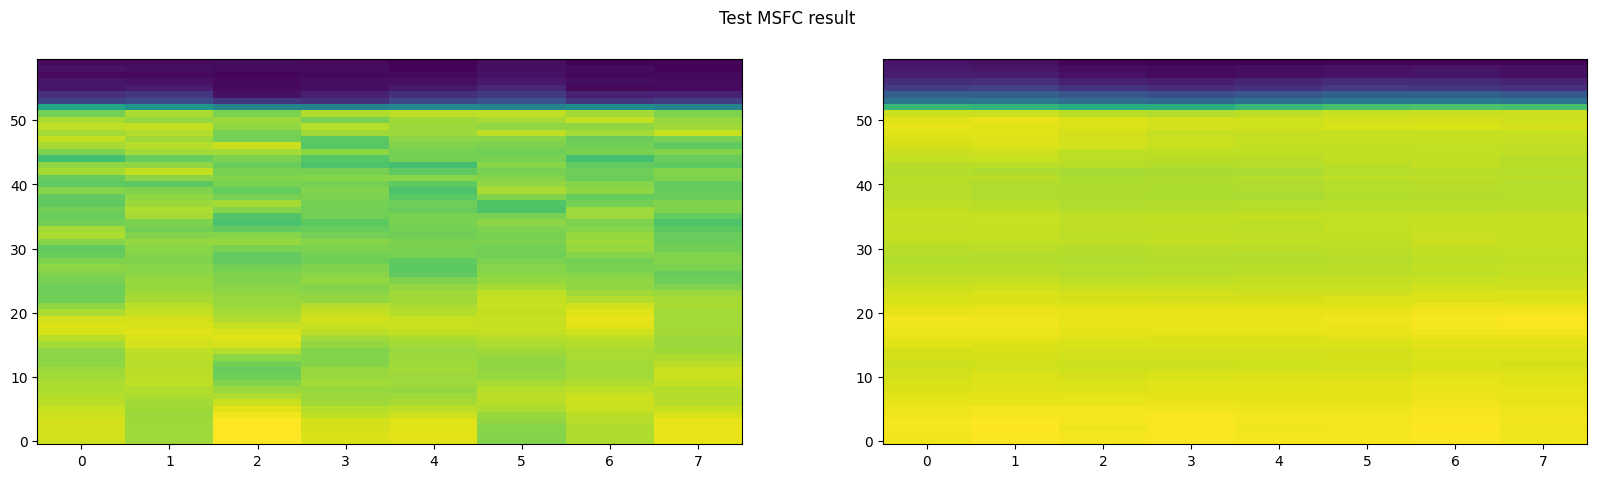

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 106it [00:28,  3.98it/s]

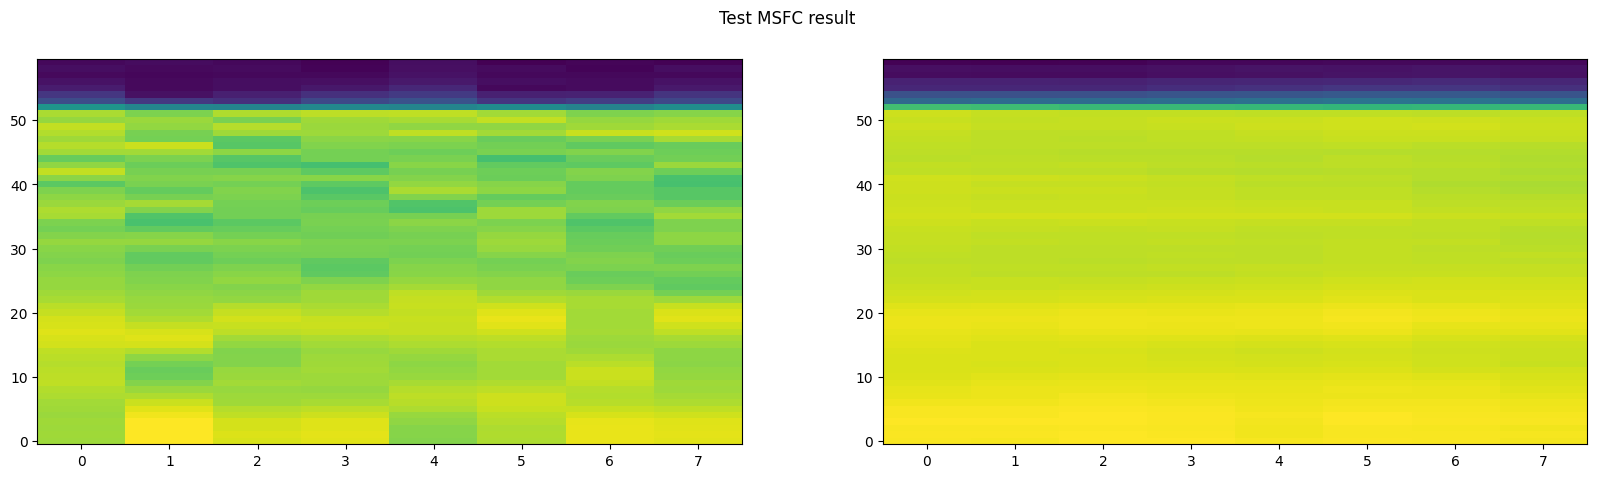

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 107it [00:28,  4.03it/s]

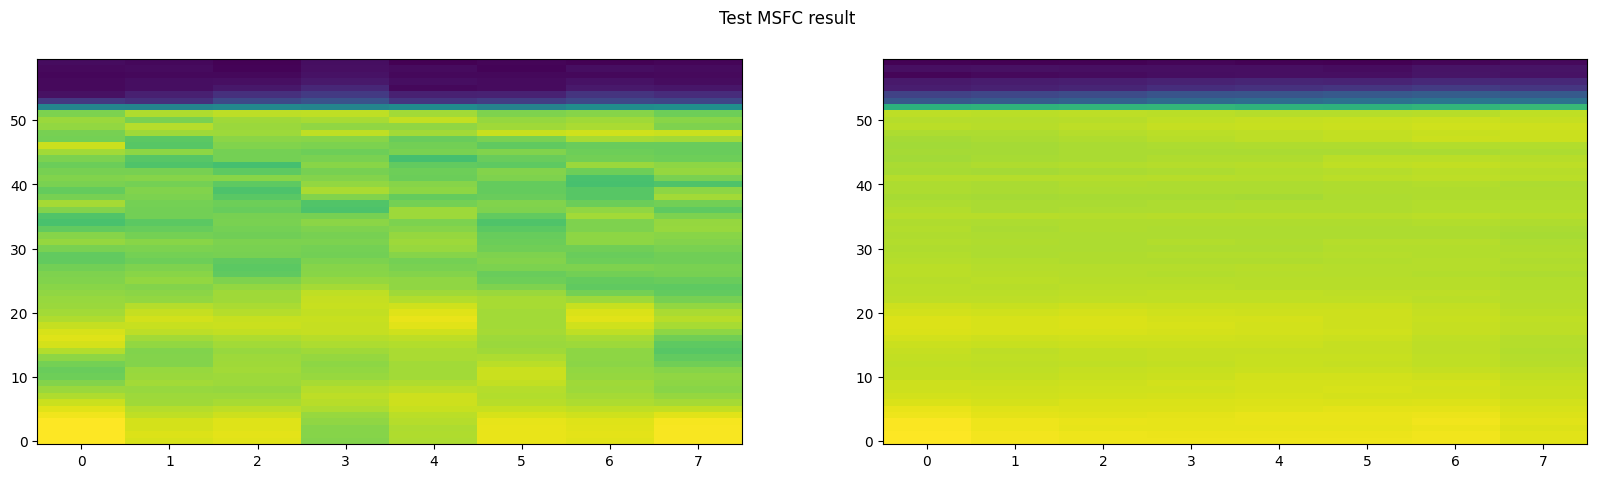

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 108it [00:28,  4.05it/s]

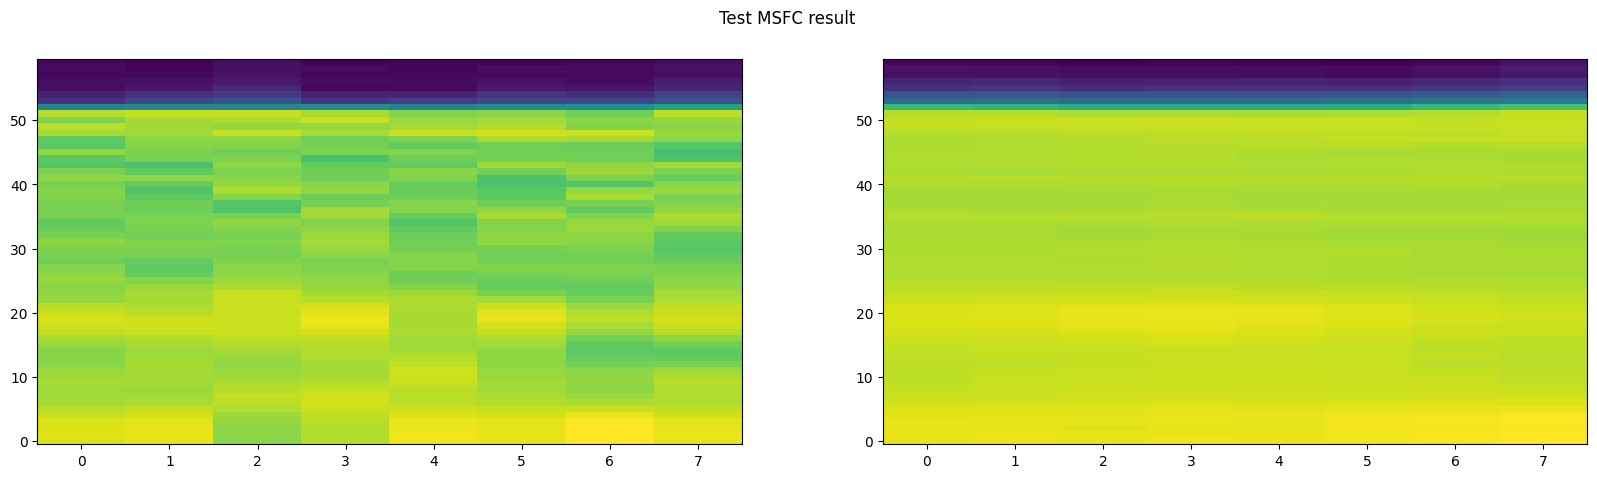

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 109it [00:29,  4.08it/s]

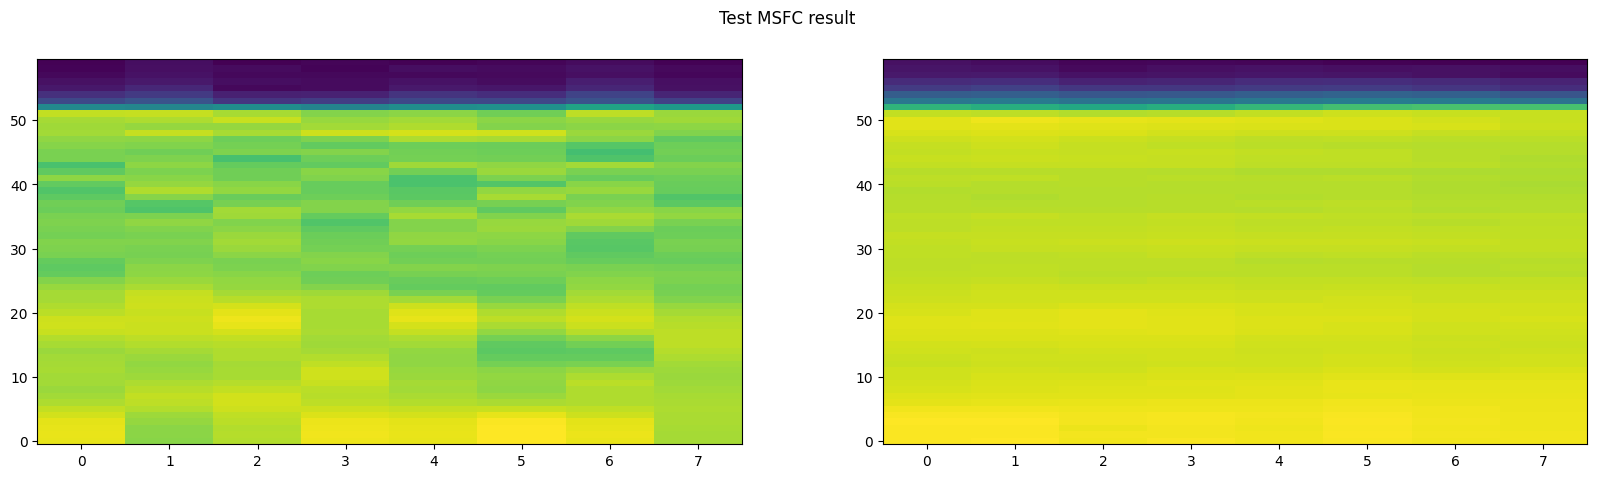

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 110it [00:29,  4.10it/s]

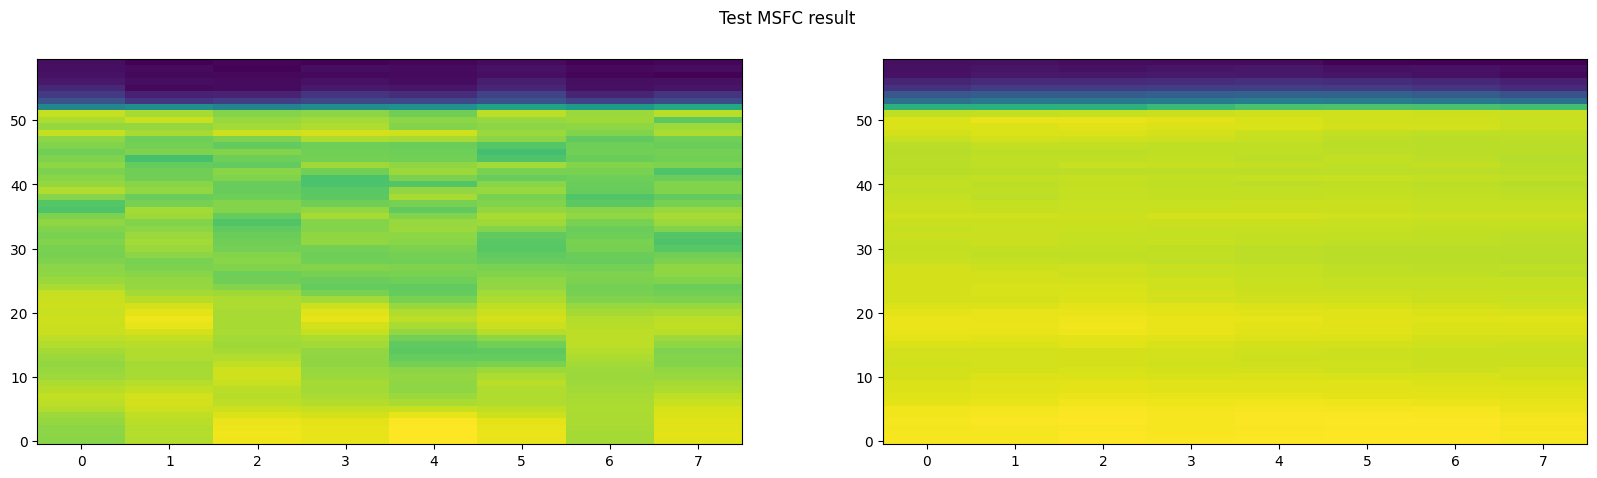

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 111it [00:29,  4.12it/s]

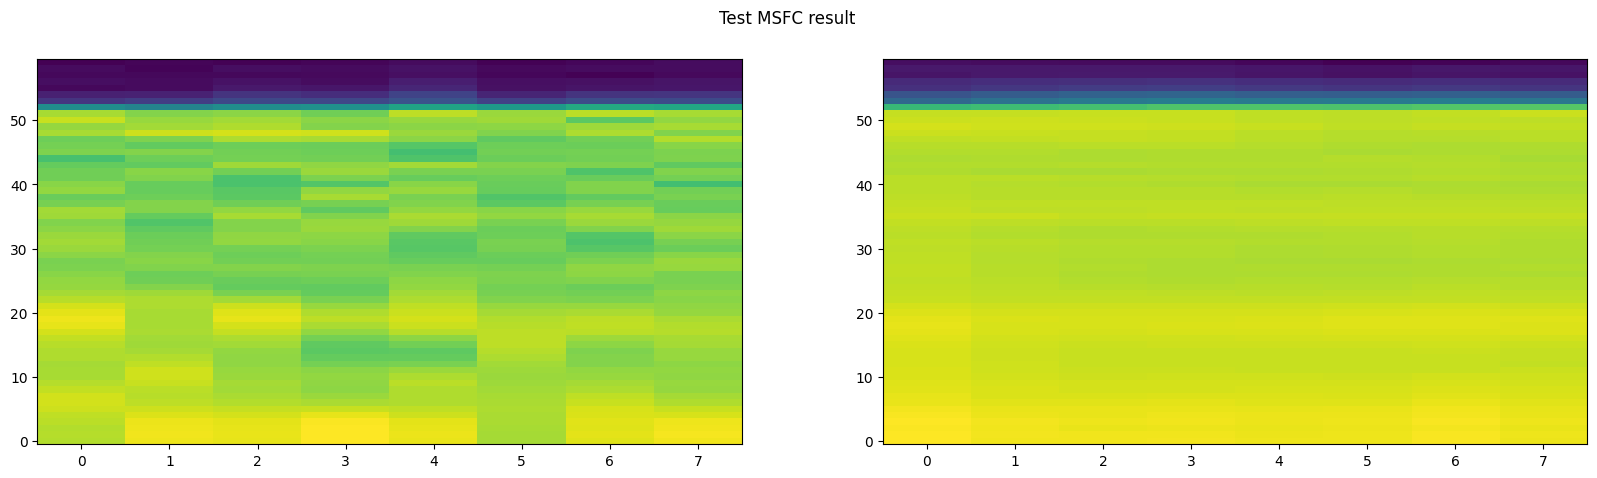

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 112it [00:29,  4.11it/s]

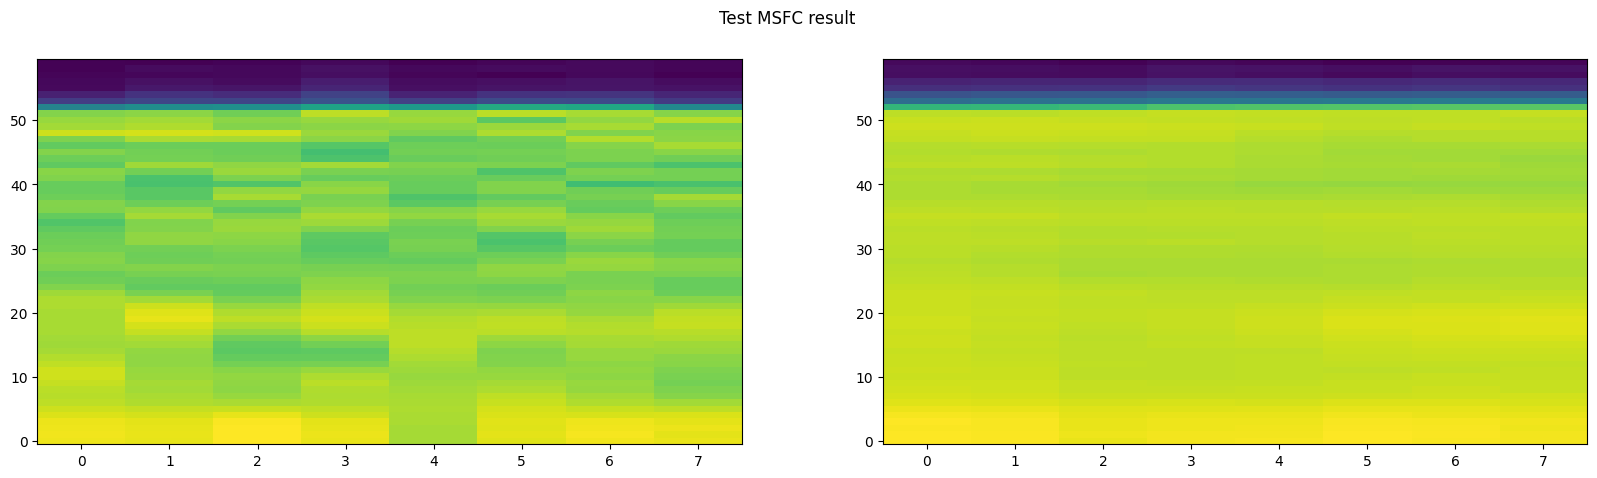

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 113it [00:30,  4.12it/s]

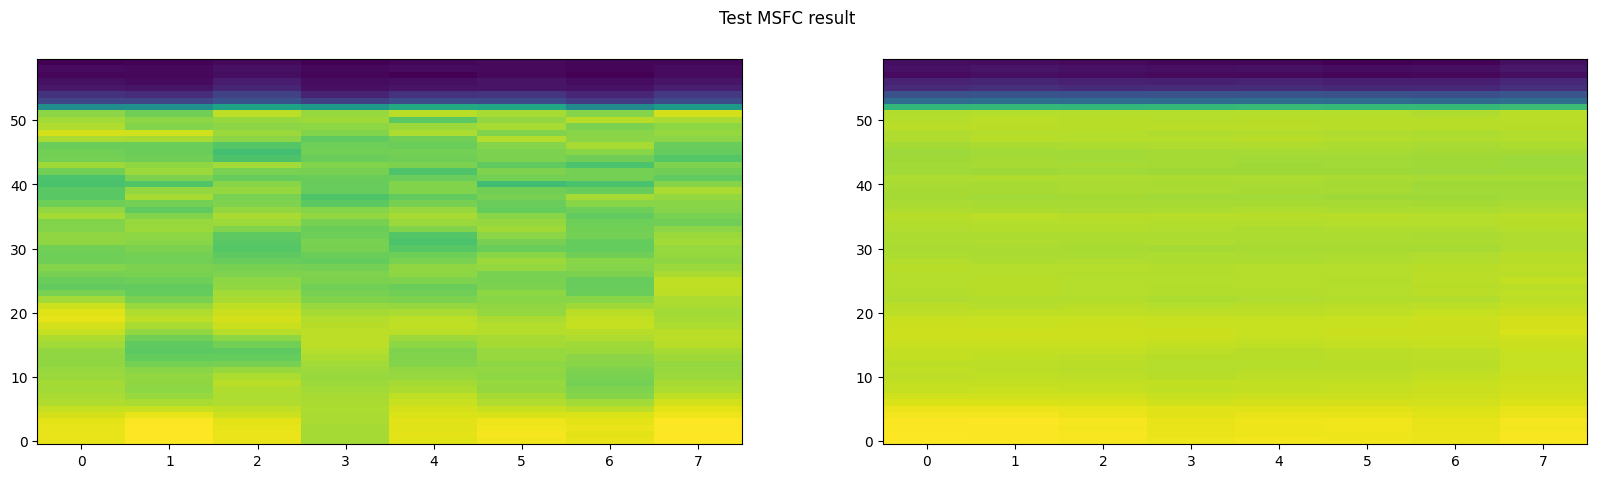

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 114it [00:30,  4.12it/s]

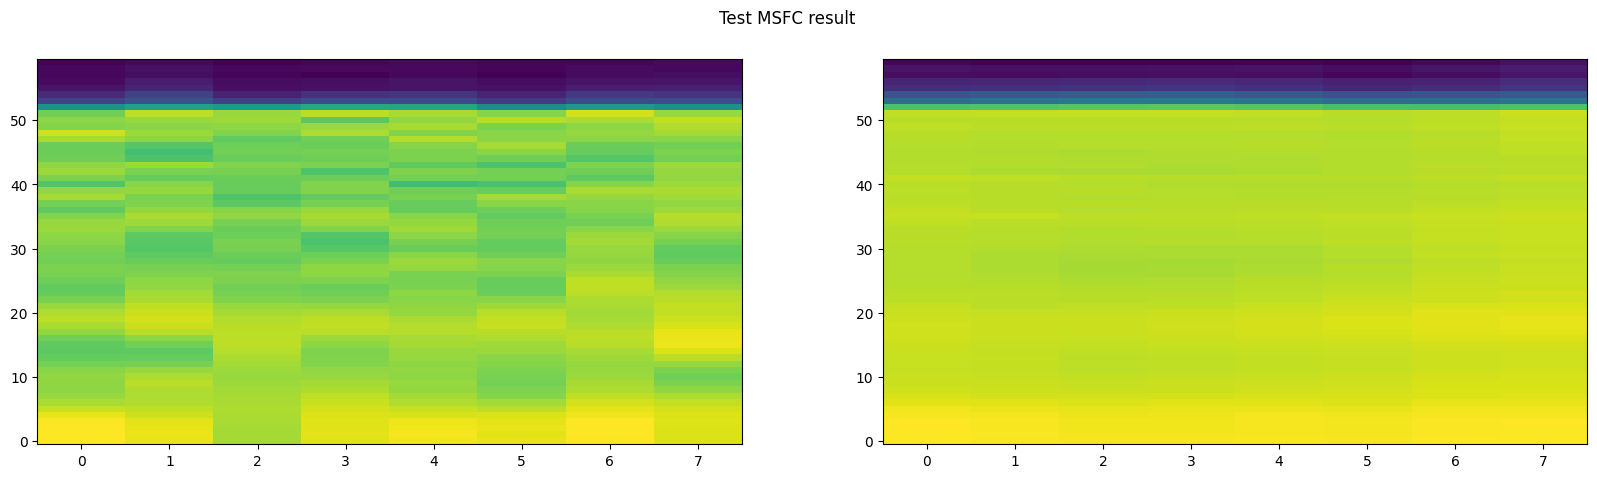

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 115it [00:30,  4.13it/s]

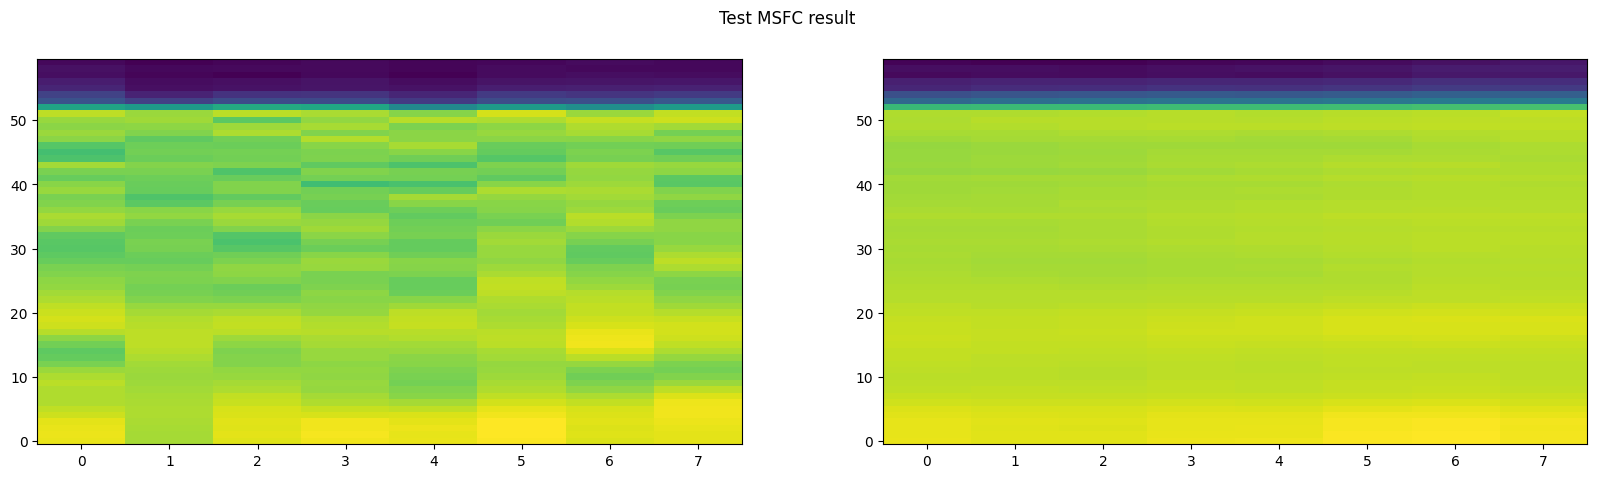

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 116it [00:30,  4.13it/s]

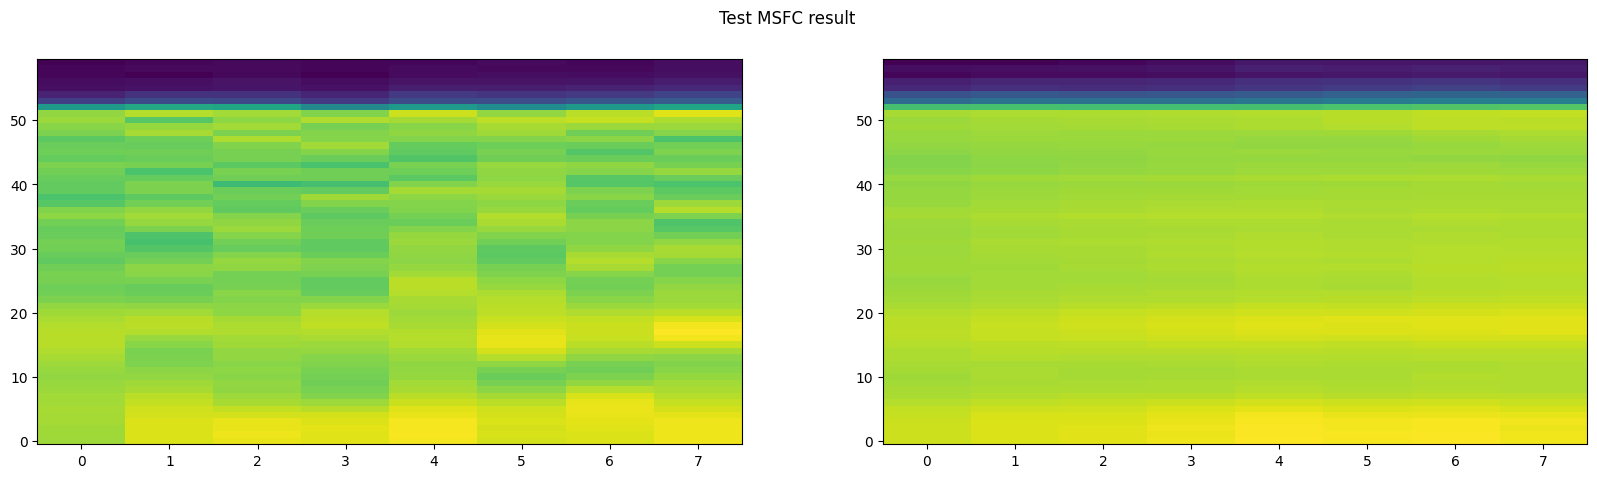

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 117it [00:31,  4.14it/s]

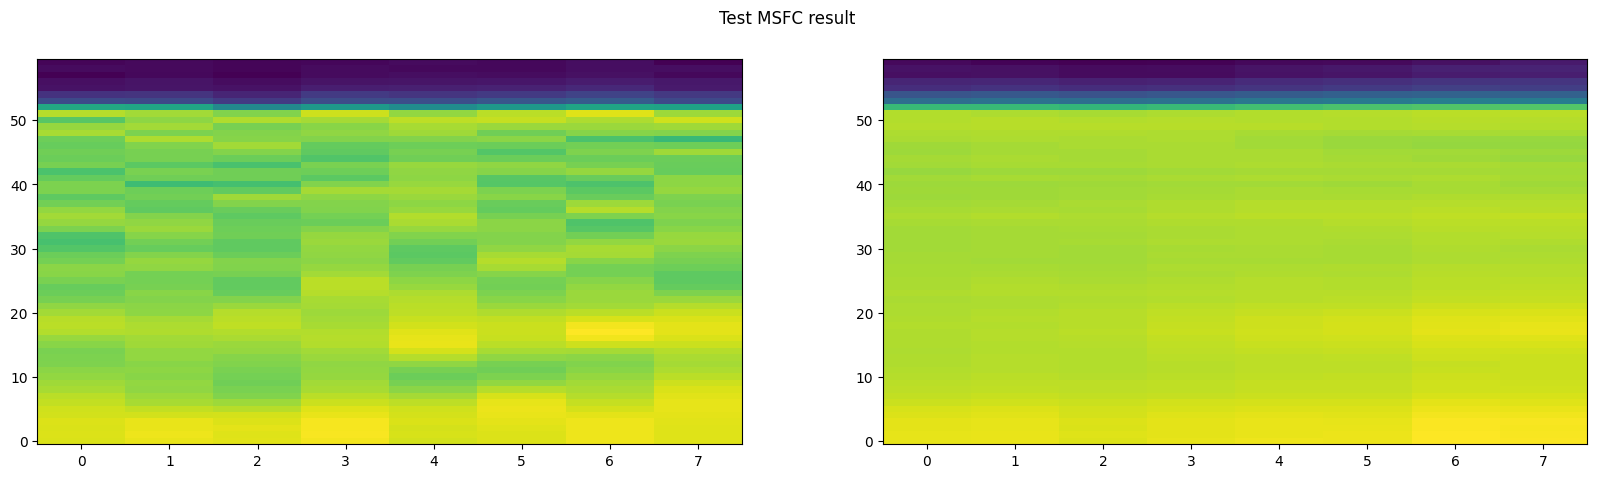

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 118it [00:31,  4.13it/s]

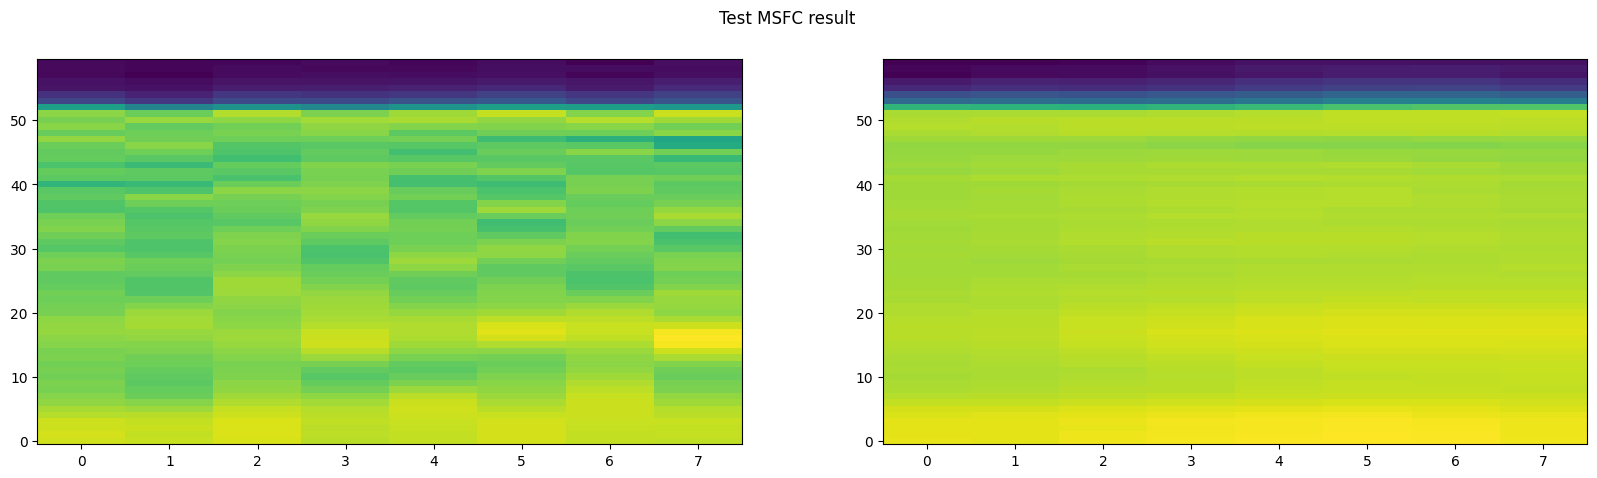

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 119it [00:31,  4.12it/s]

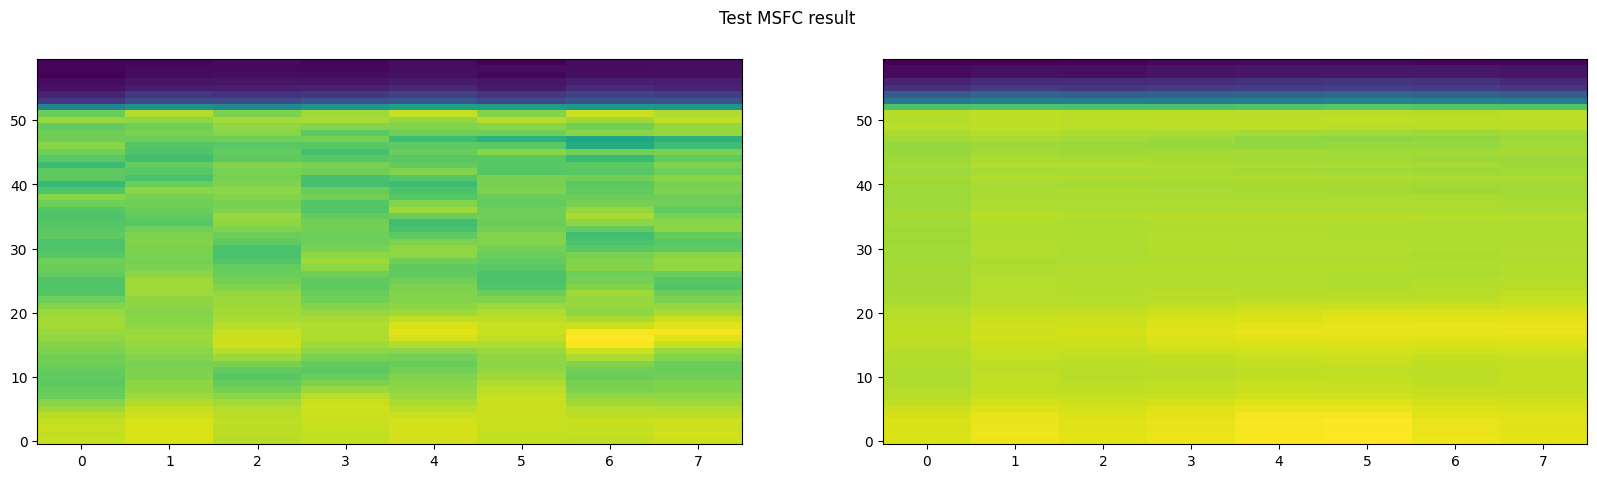

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 120it [00:31,  4.12it/s]

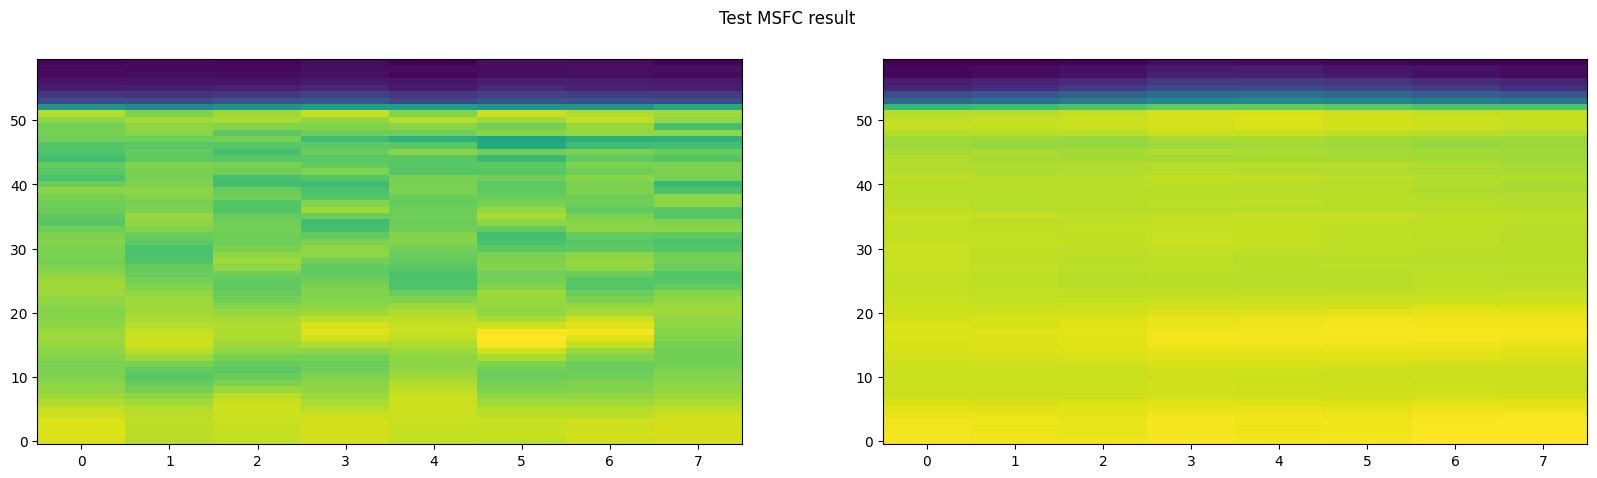

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 121it [00:32,  4.13it/s]

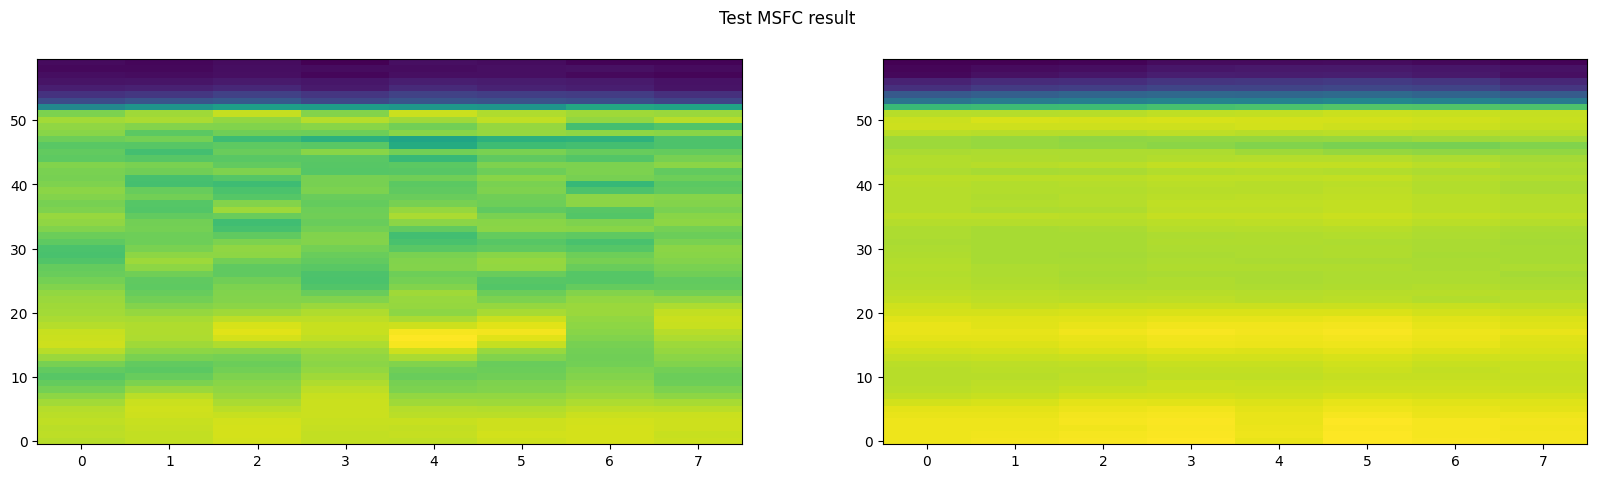

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 122it [00:32,  4.13it/s]

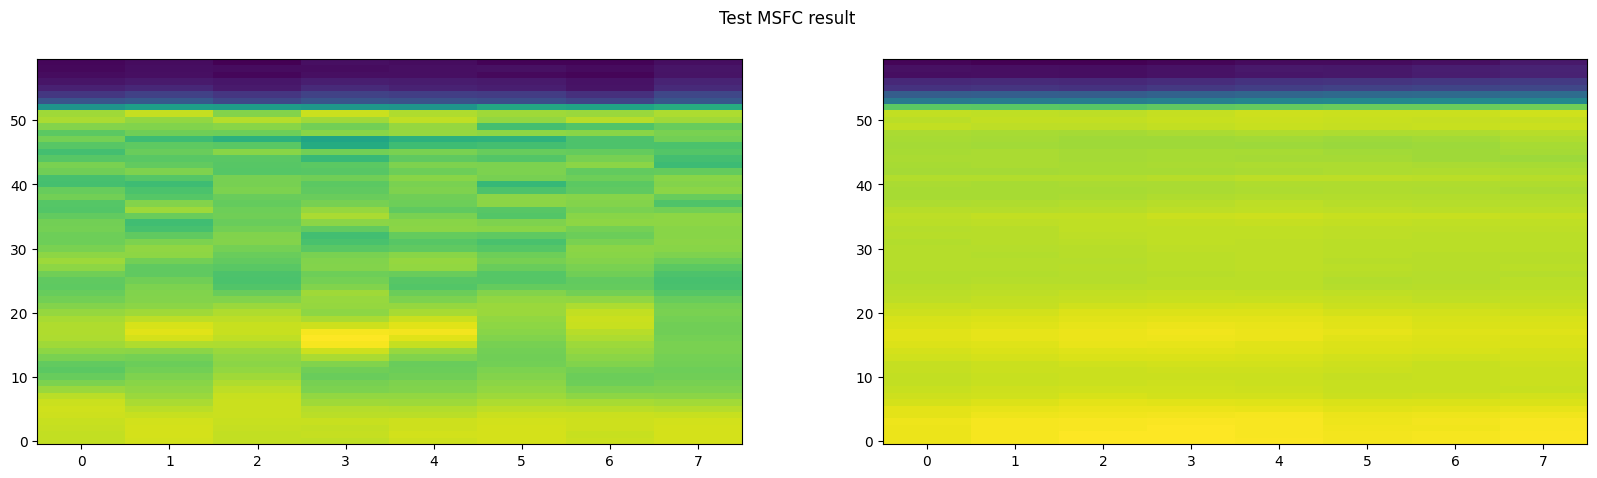

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 123it [00:32,  4.13it/s]

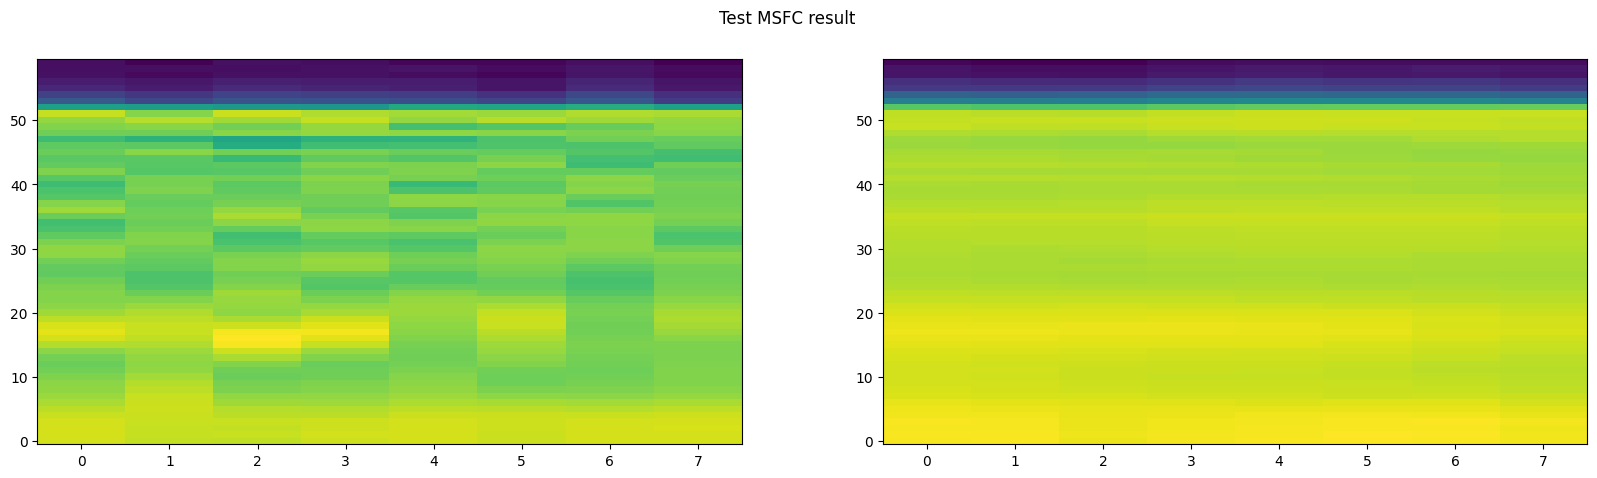

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 124it [00:32,  4.12it/s]

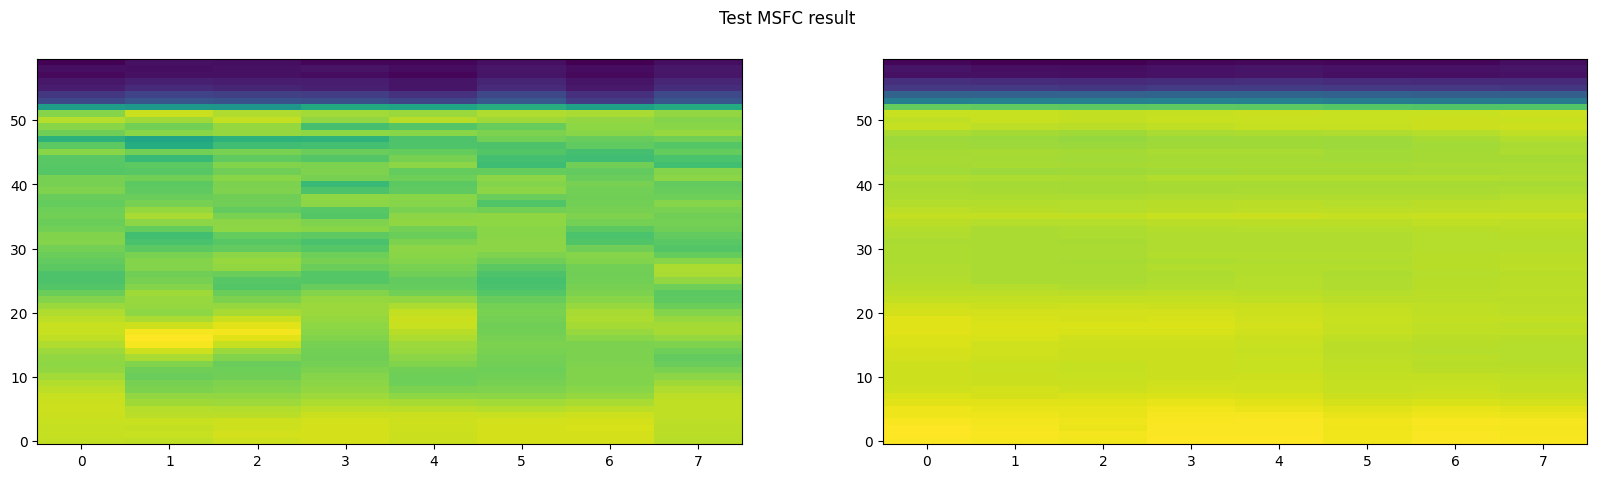

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 125it [00:32,  4.12it/s]

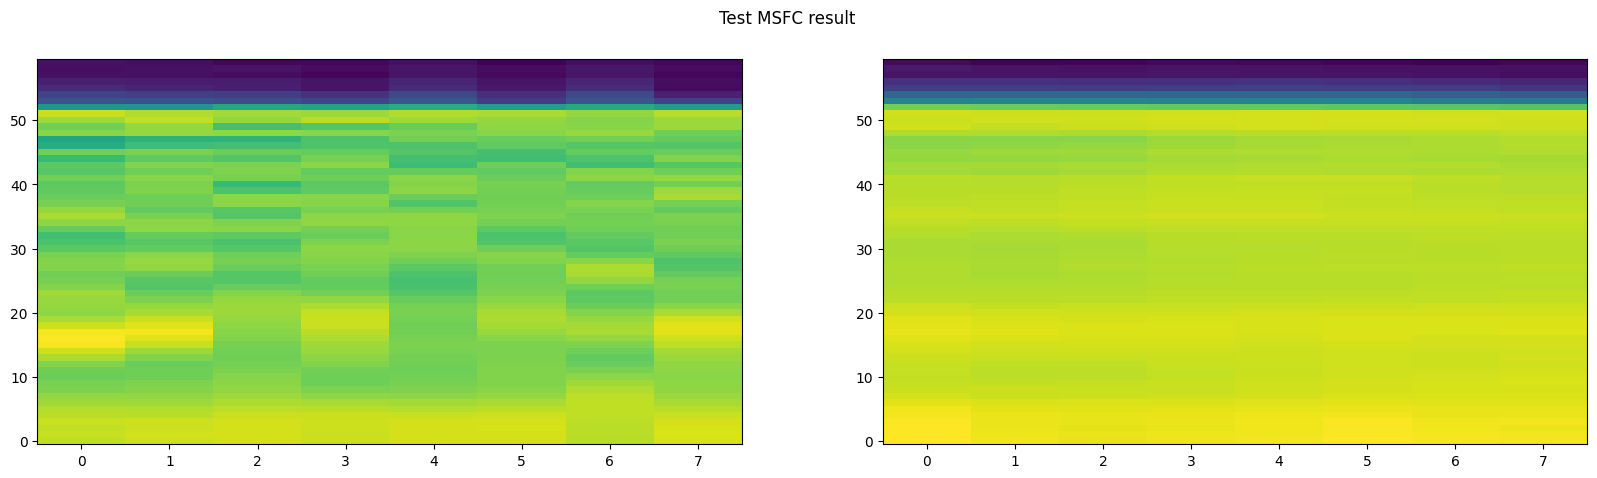

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 126it [00:33,  2.54it/s]

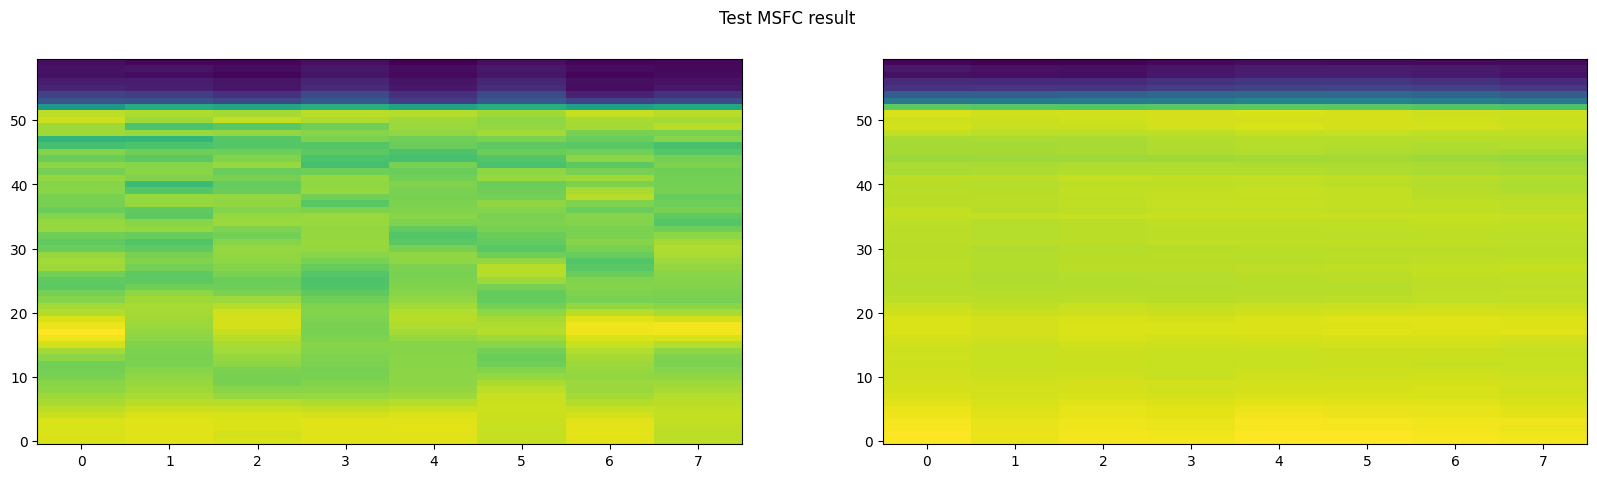

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 127it [00:33,  2.86it/s]

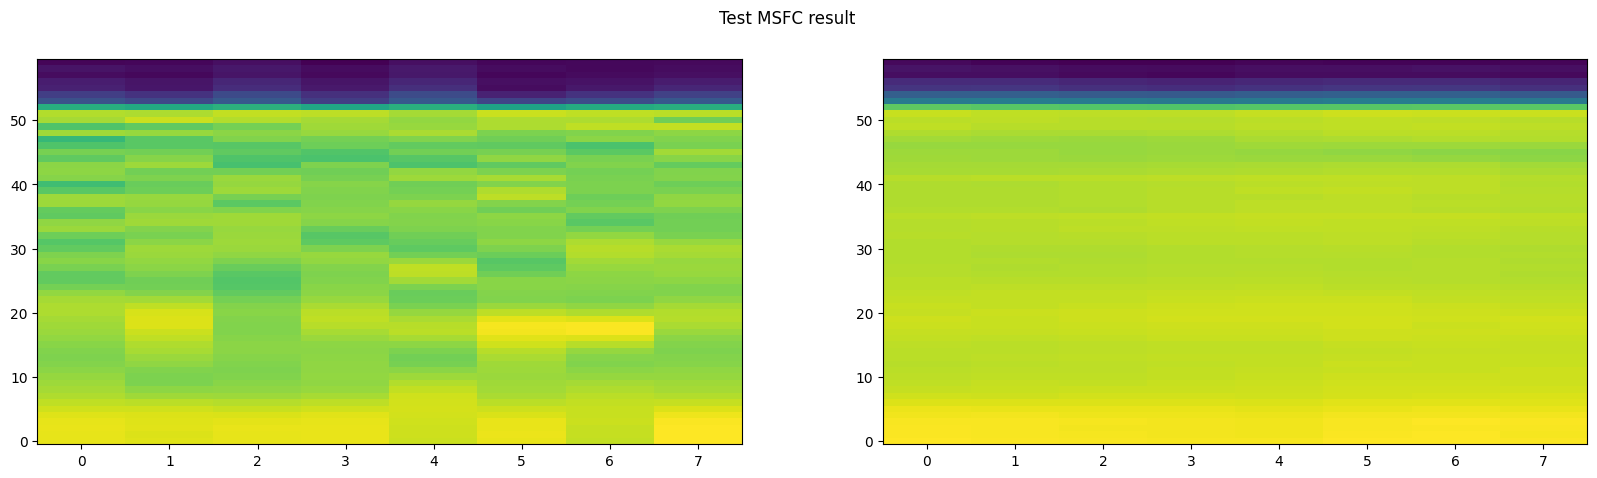

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 128it [00:34,  3.15it/s]

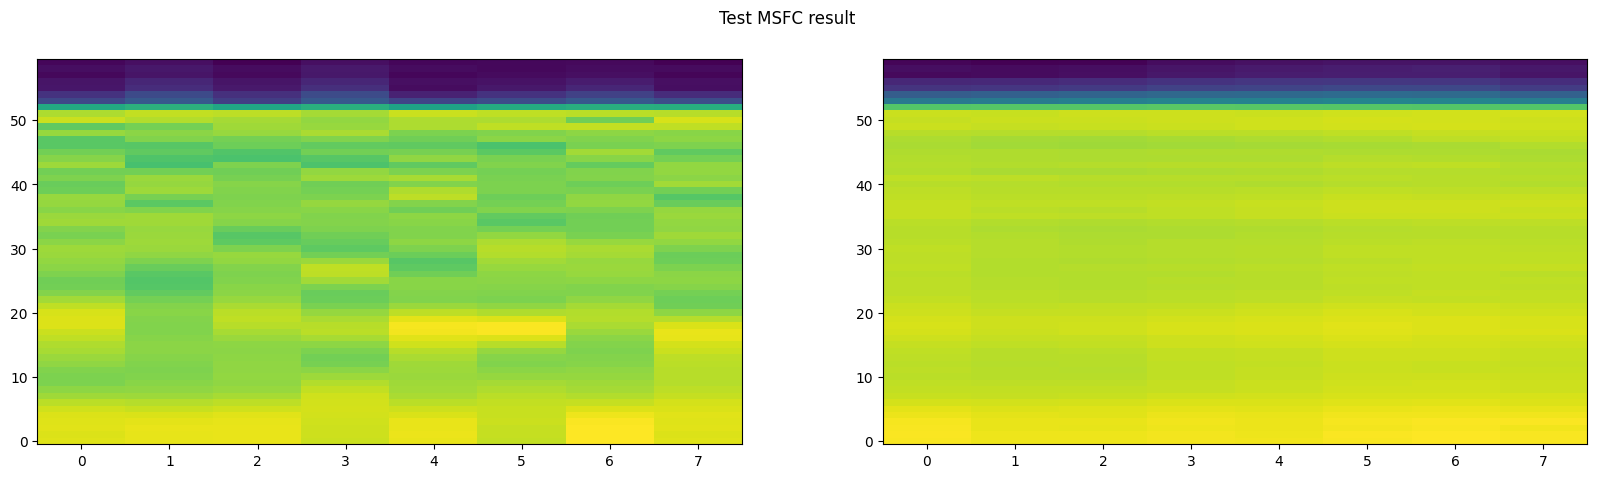

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 129it [00:34,  3.39it/s]

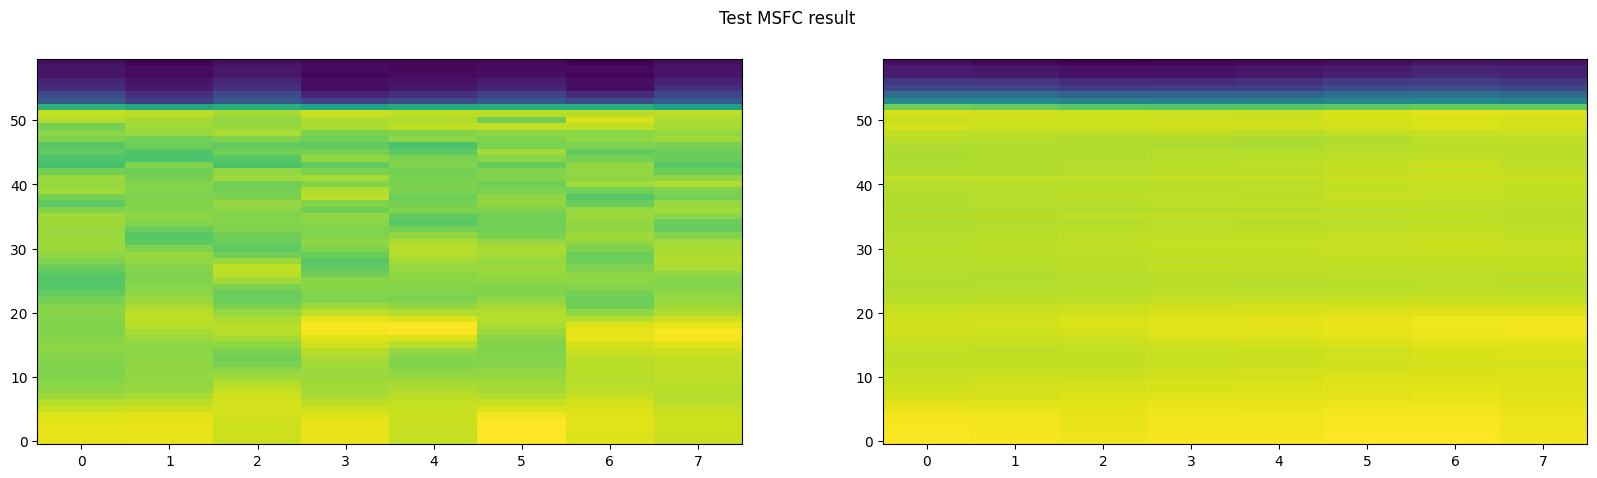

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 130it [00:34,  3.59it/s]

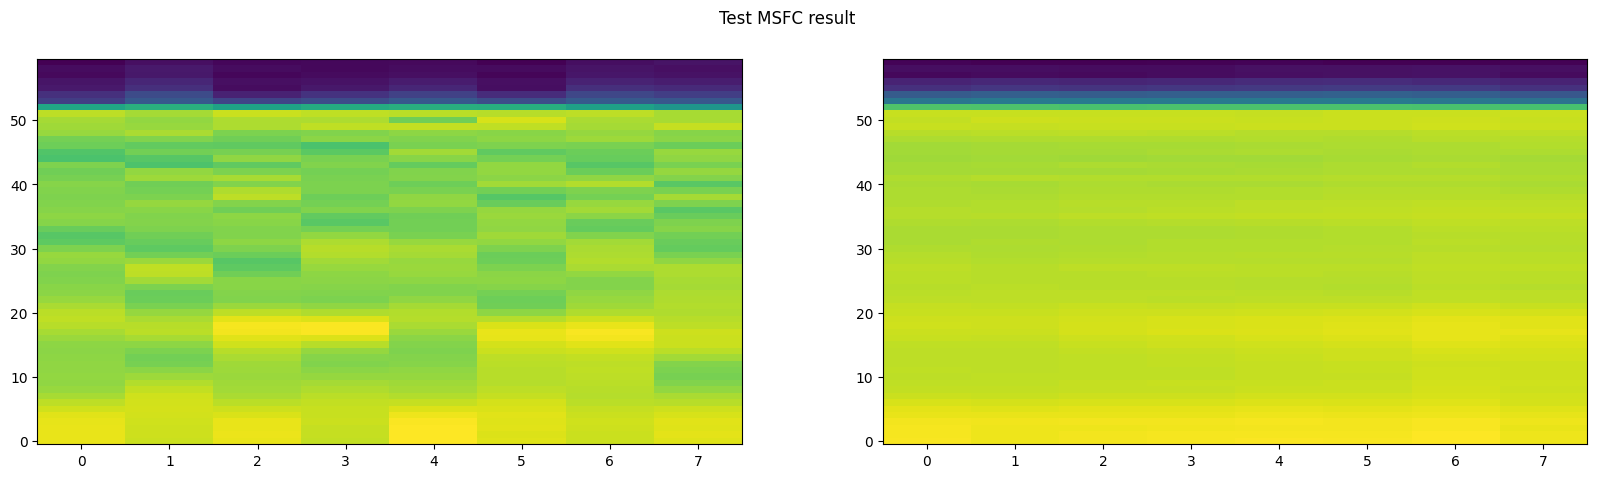

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 131it [00:34,  3.74it/s]

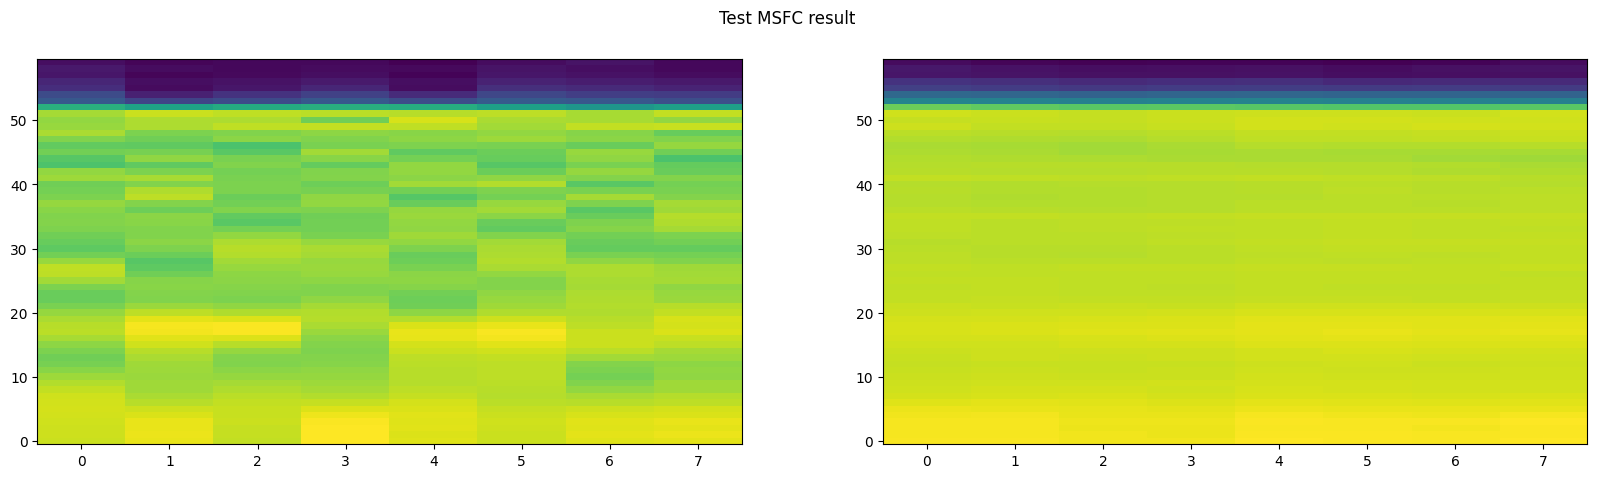

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 132it [00:35,  3.86it/s]

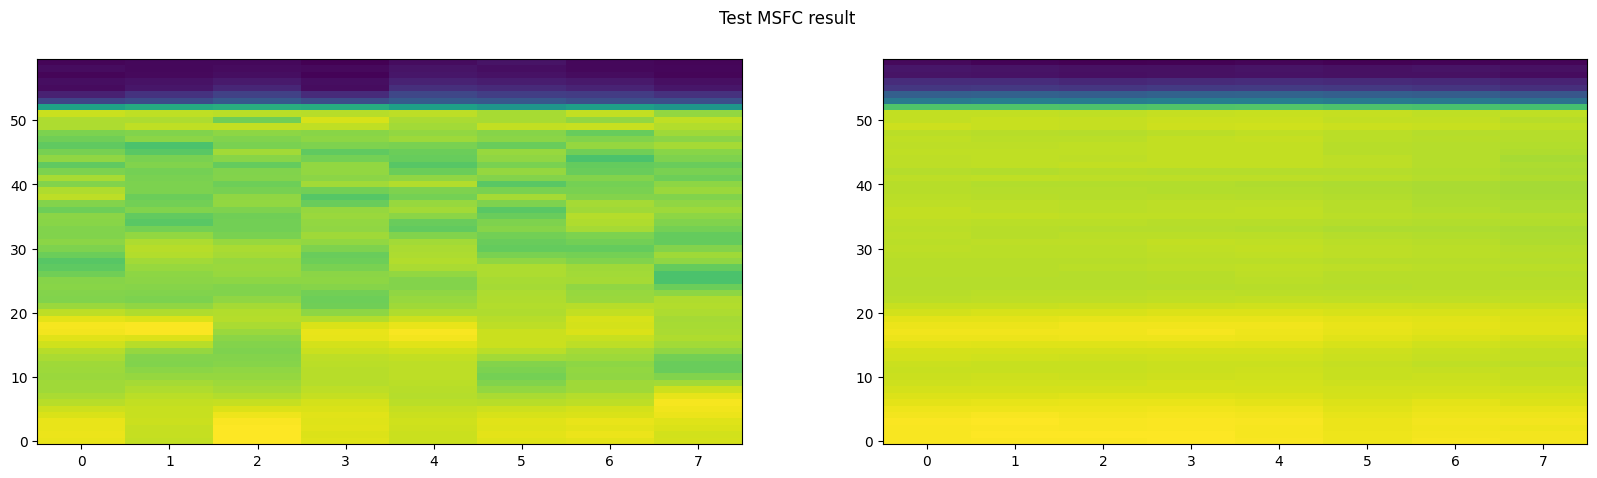

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 133it [00:35,  3.94it/s]

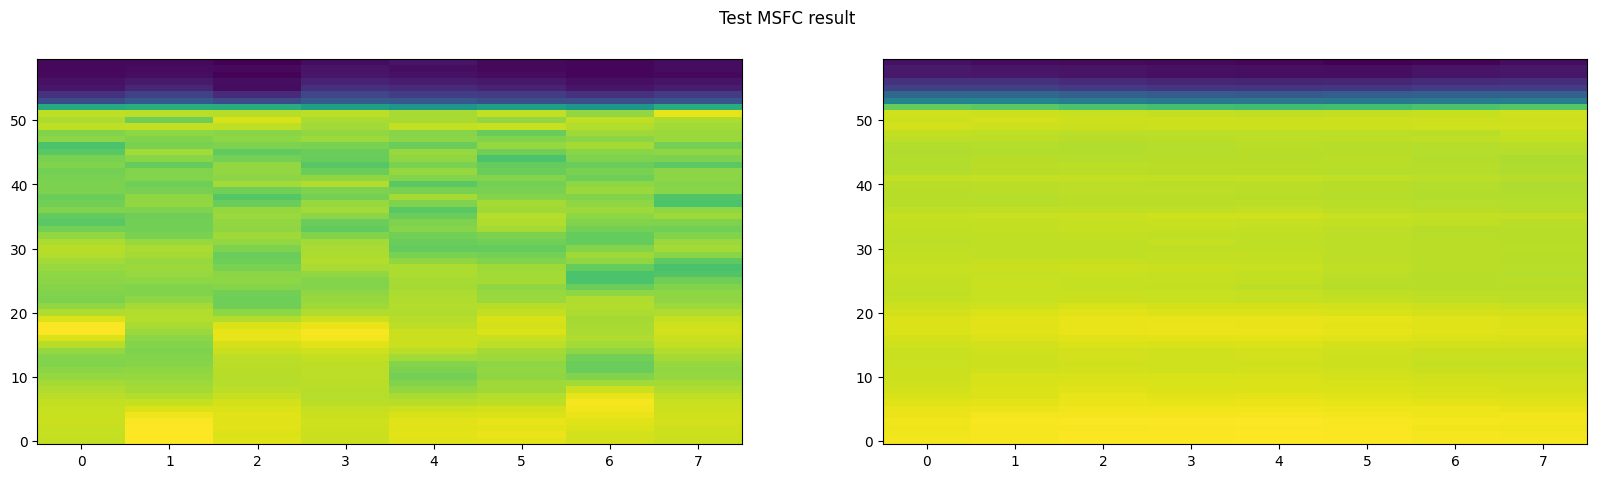

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 134it [00:35,  3.99it/s]

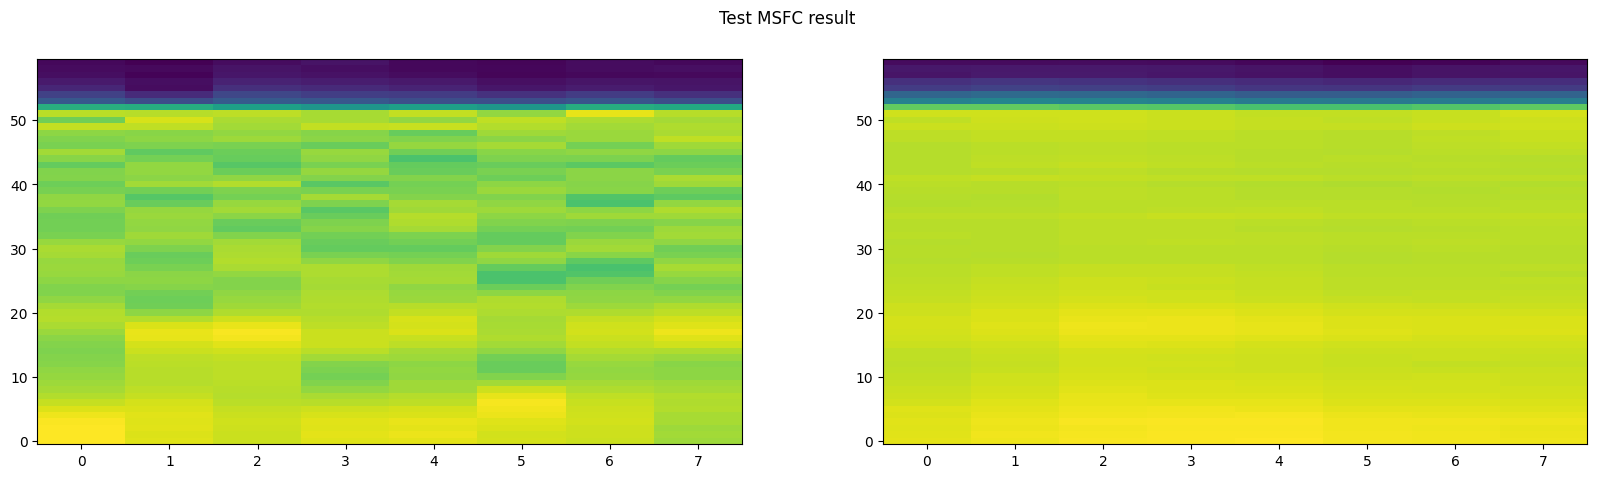

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 135it [00:35,  4.03it/s]

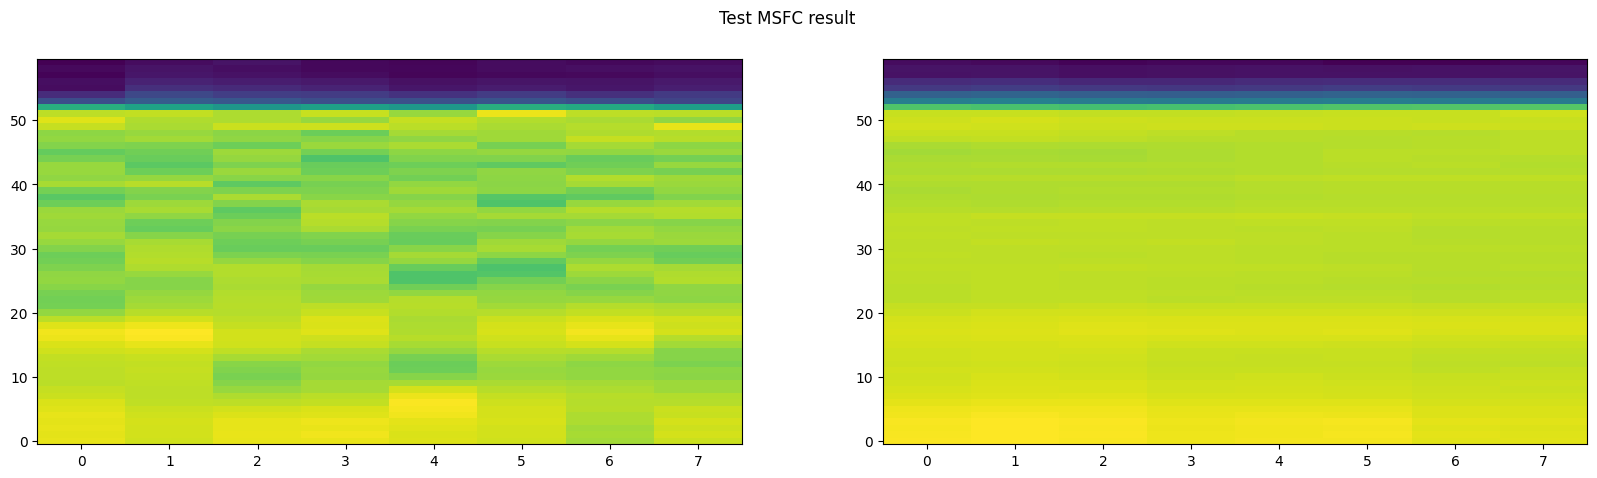

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 136it [00:36,  4.06it/s]

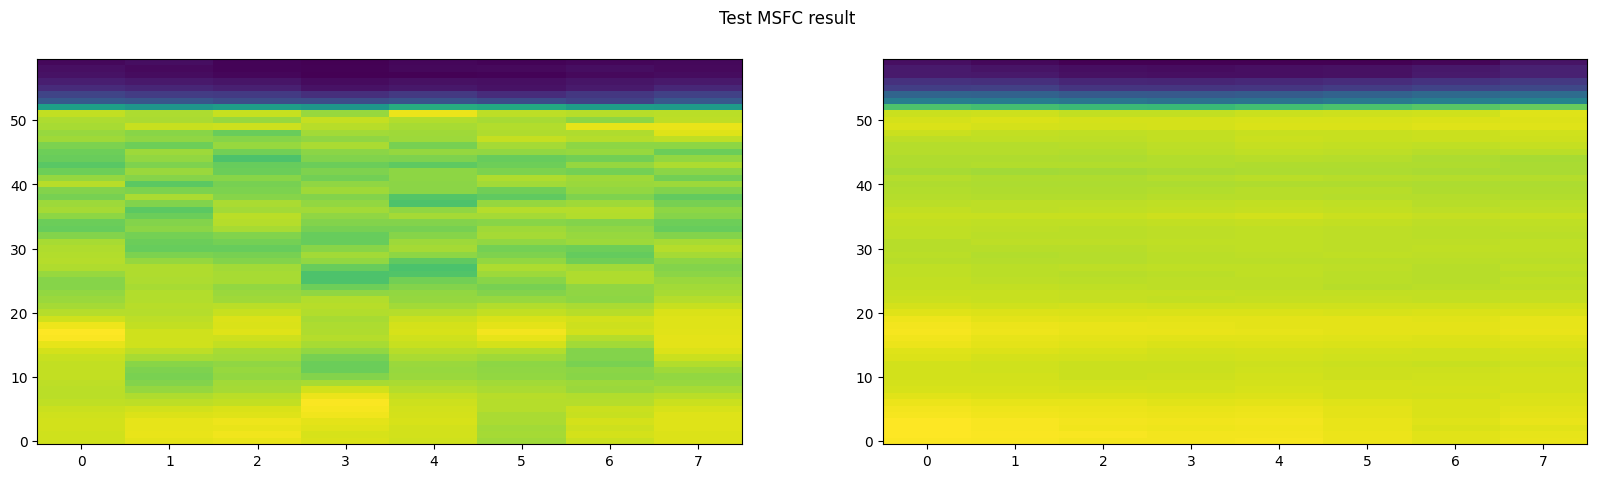

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 137it [00:36,  4.08it/s]

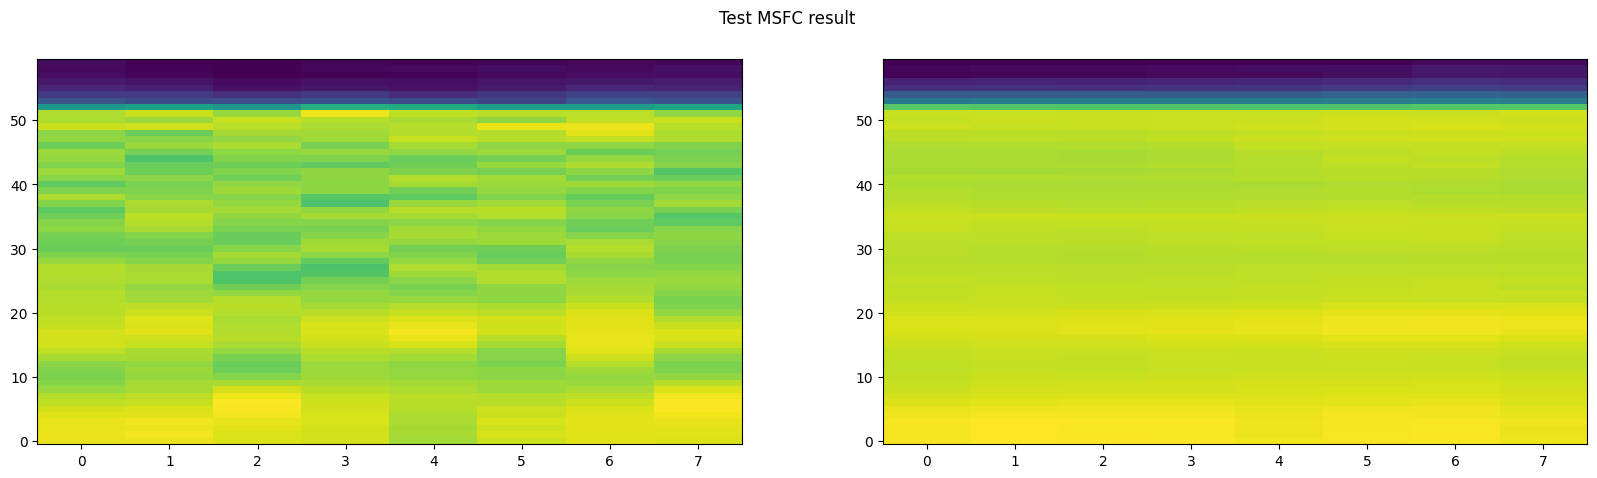

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 138it [00:36,  4.09it/s]

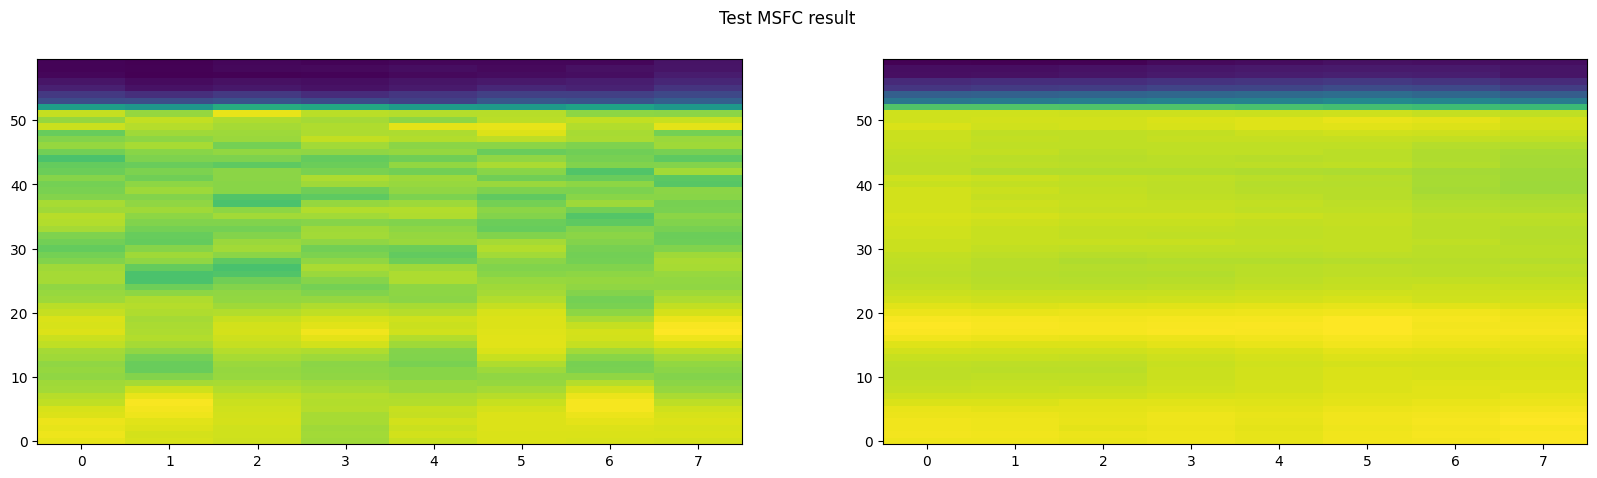

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 139it [00:36,  4.10it/s]

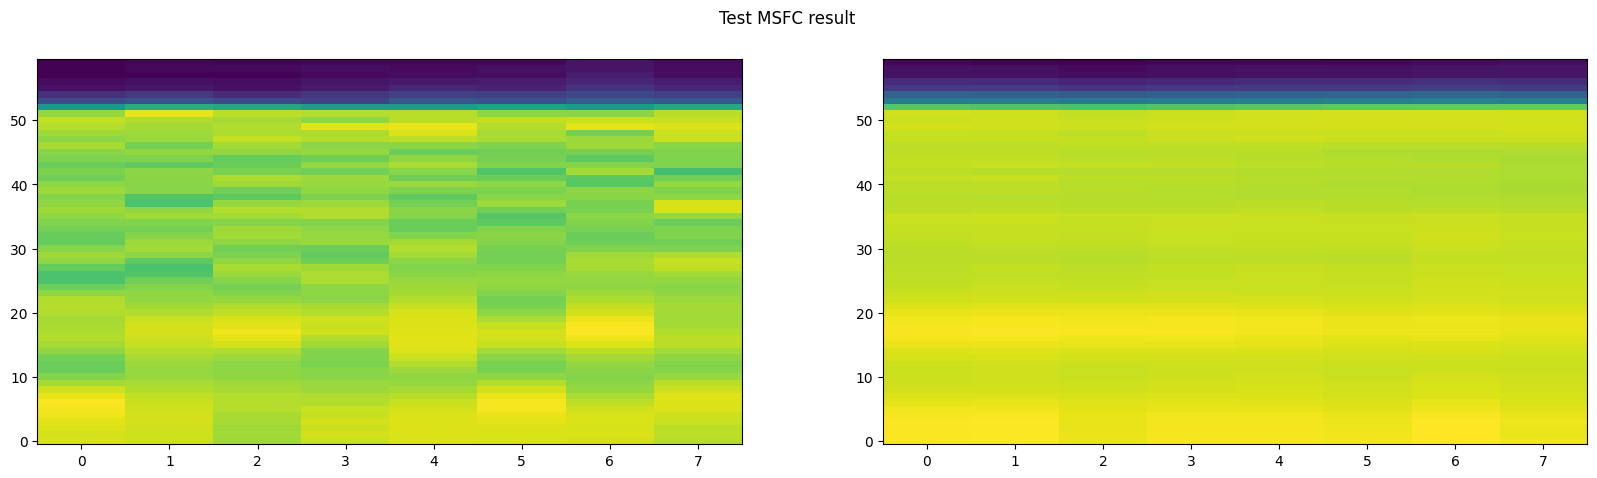

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 140it [00:37,  4.11it/s]

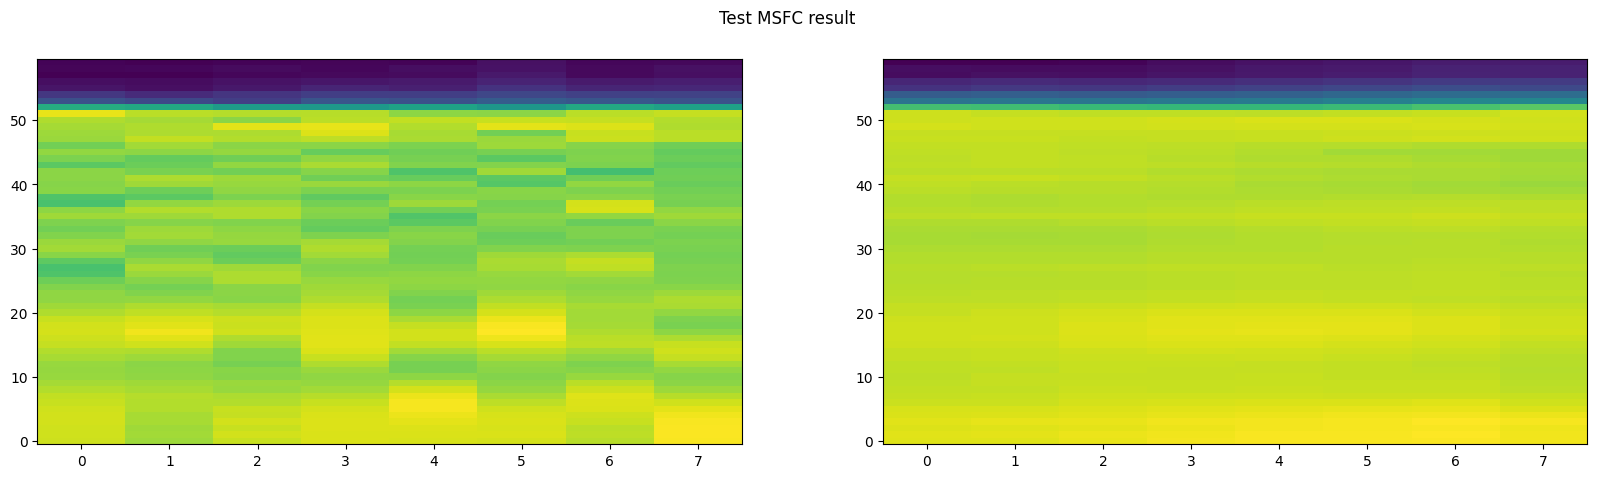

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 141it [00:37,  4.12it/s]

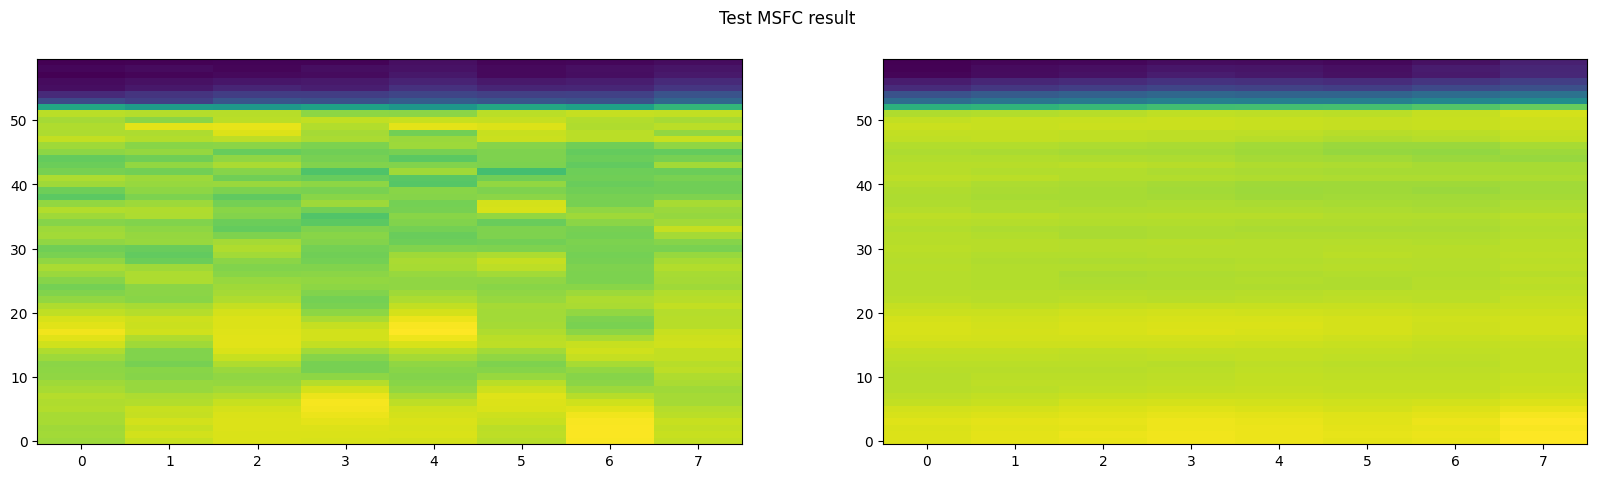

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 142it [00:37,  4.12it/s]

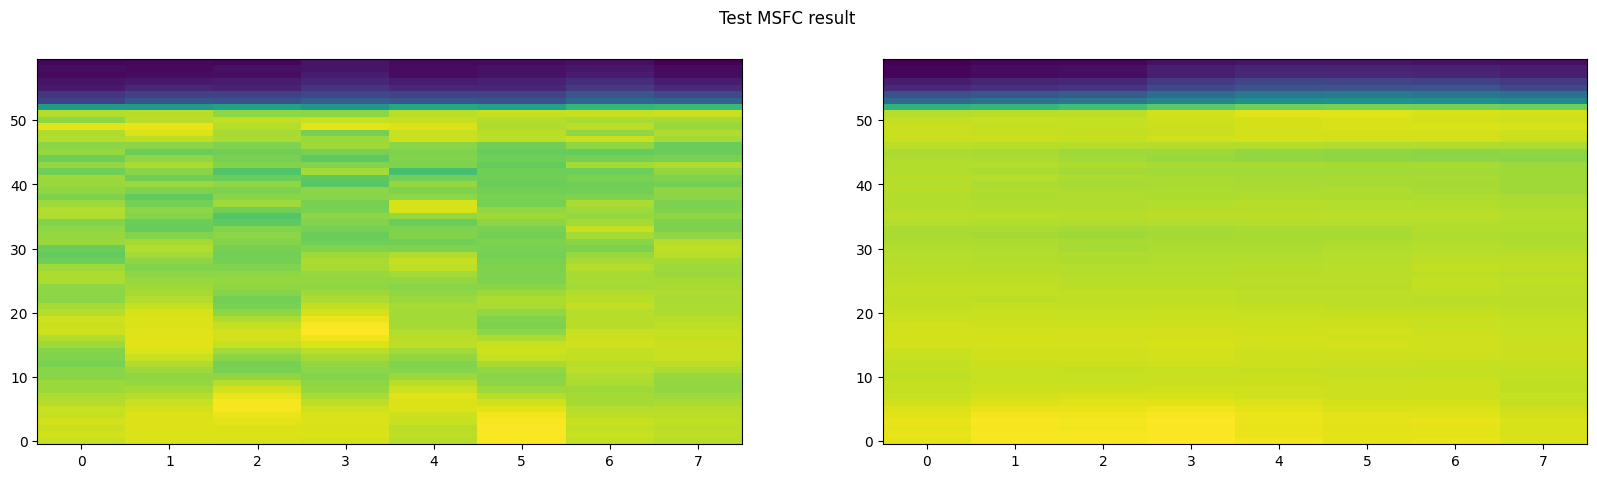

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 143it [00:37,  4.12it/s]

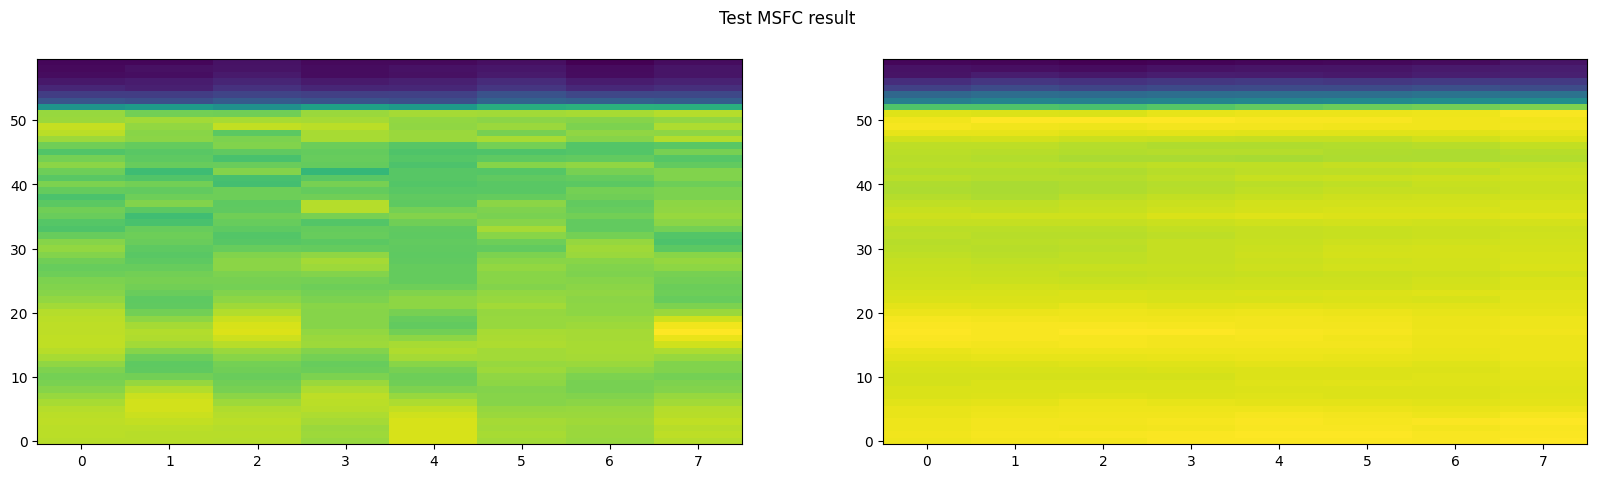

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 144it [00:38,  4.13it/s]

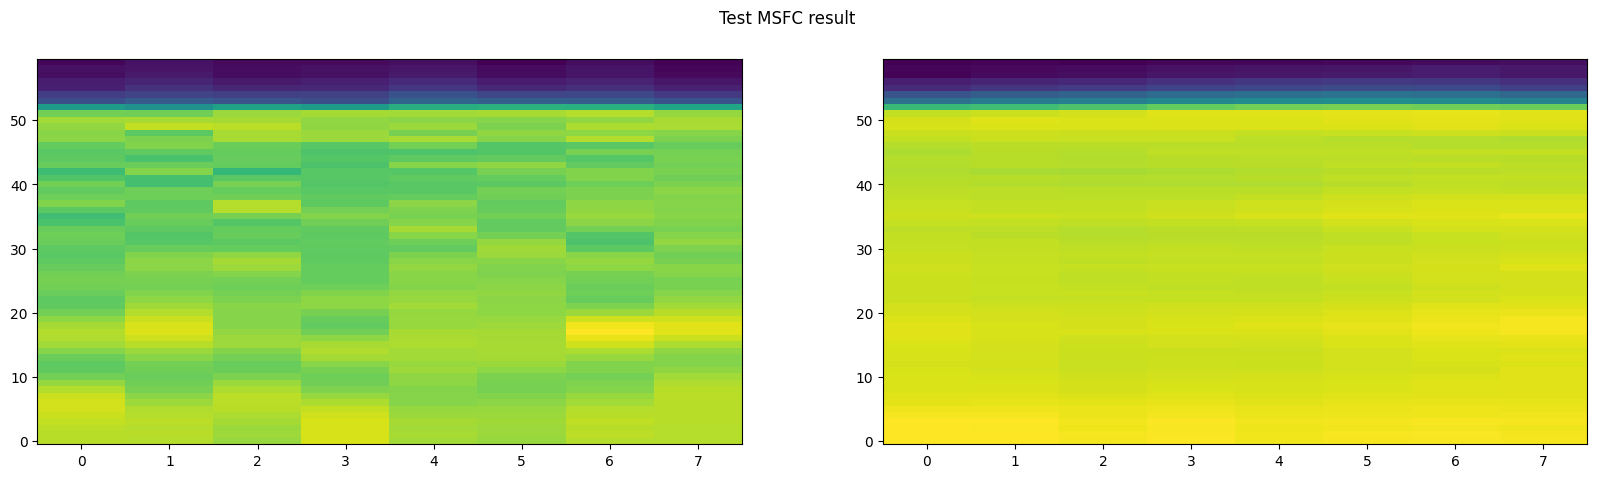

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 145it [00:38,  4.13it/s]

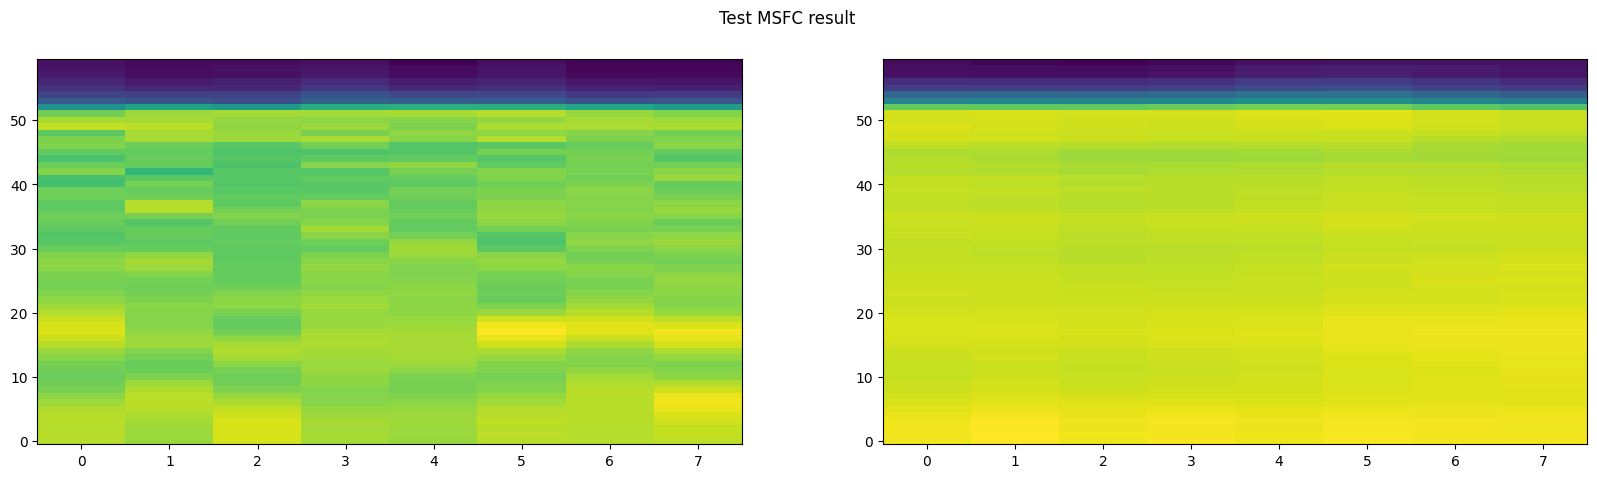

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 146it [00:38,  4.13it/s]

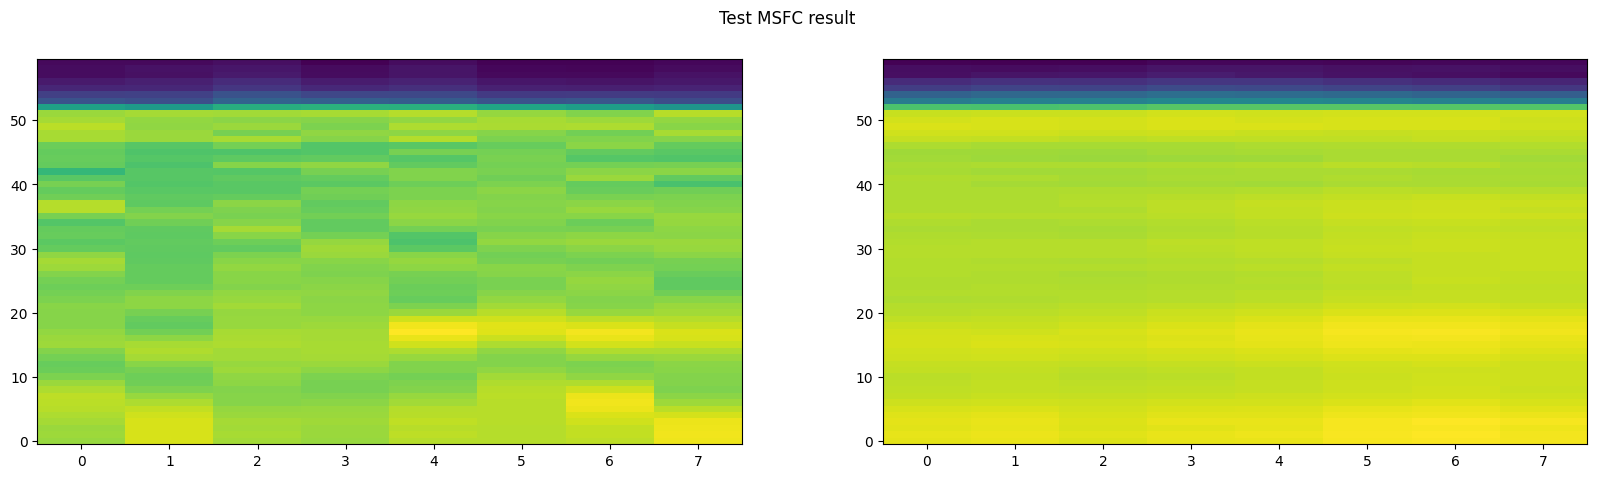

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 147it [00:38,  4.12it/s]

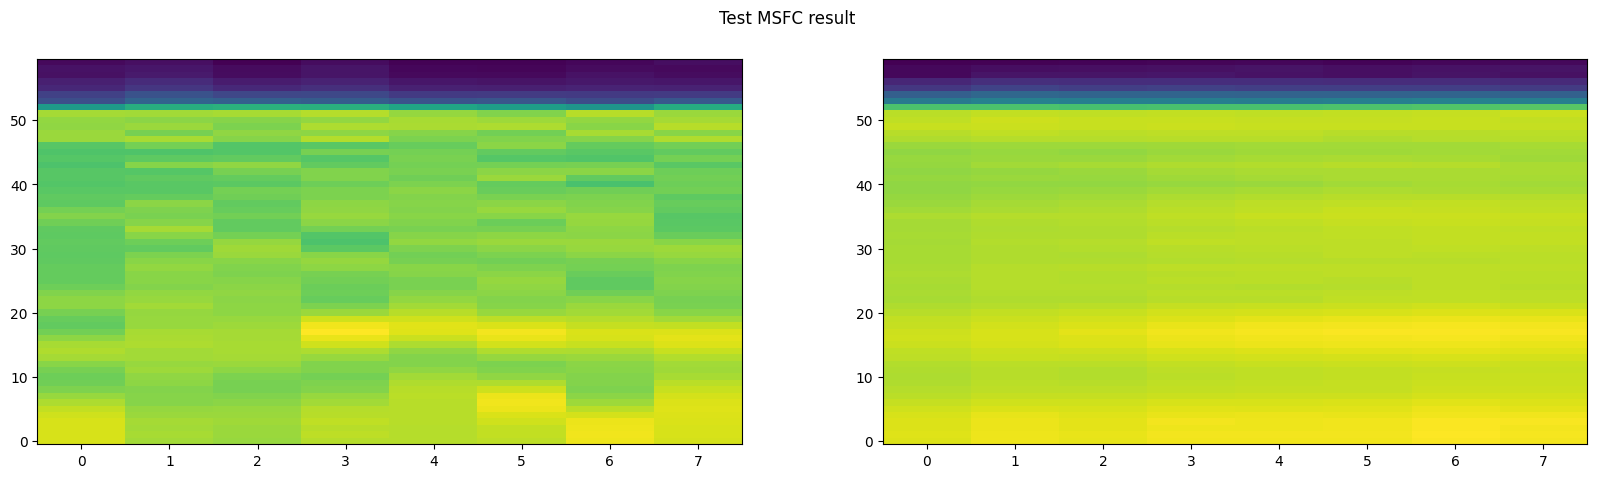

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 148it [00:39,  4.11it/s]

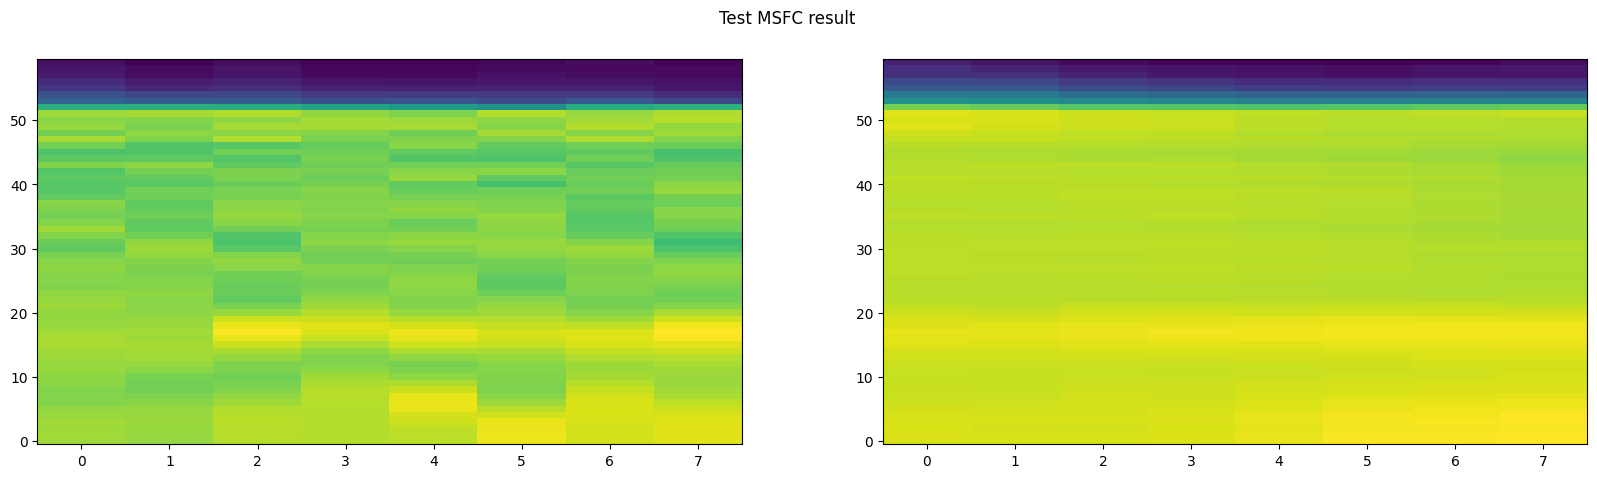

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 149it [00:39,  4.11it/s]

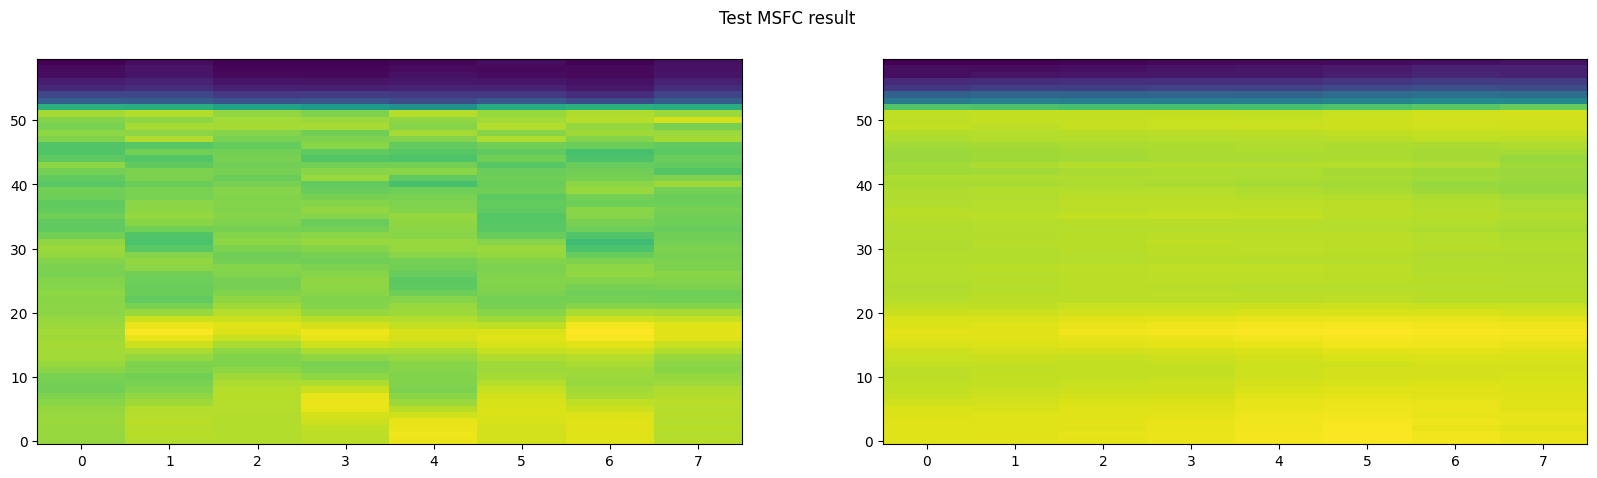

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 150it [00:39,  4.11it/s]

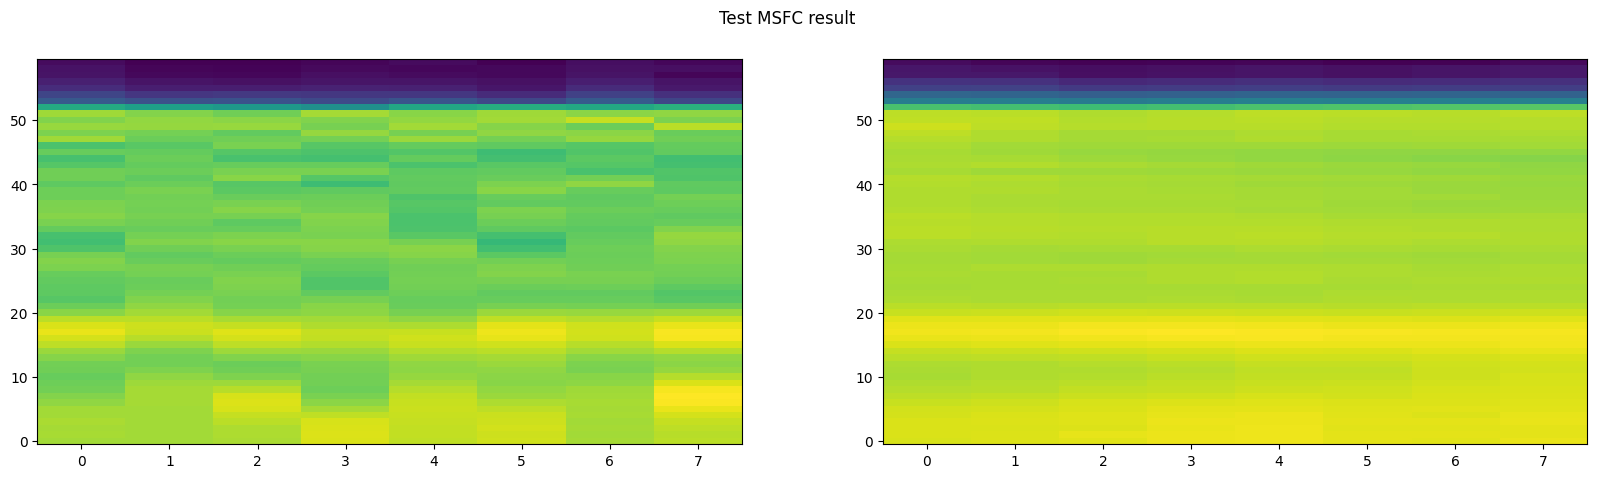

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 151it [00:39,  4.11it/s]

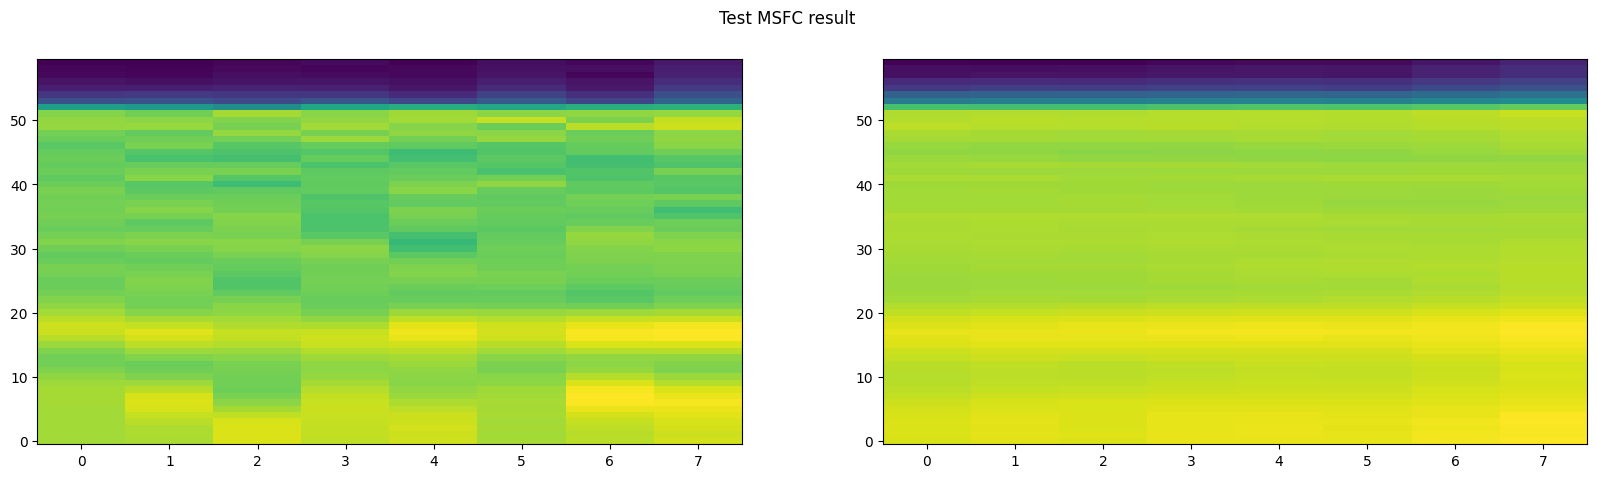

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 152it [00:40,  4.12it/s]

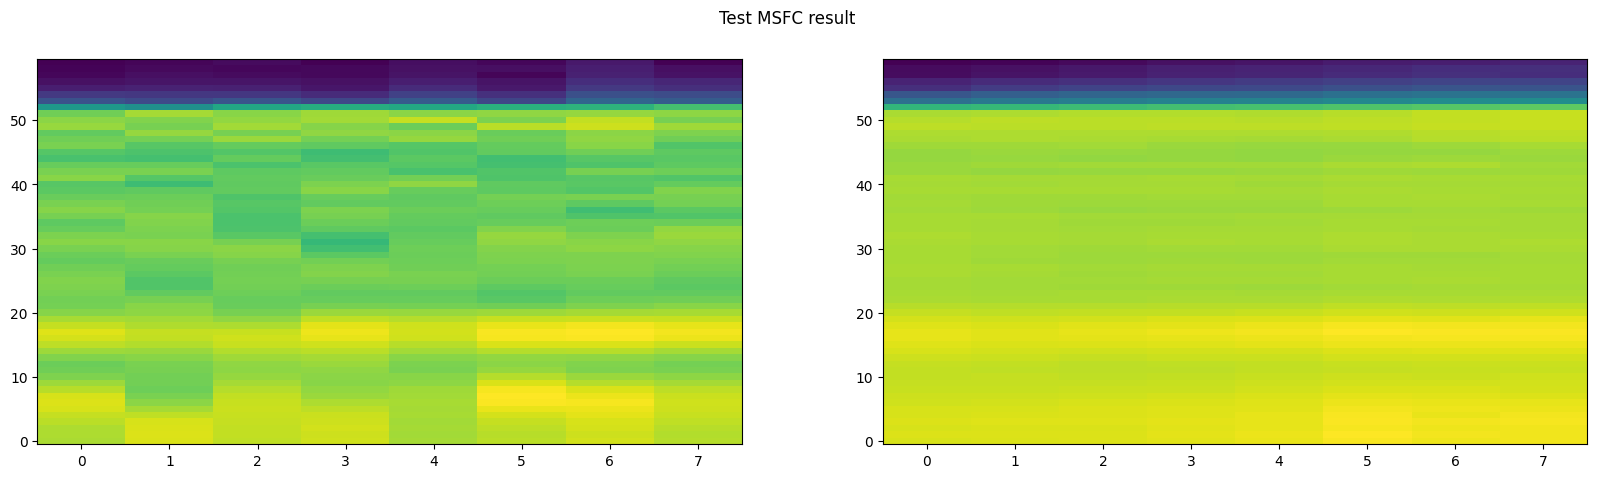

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 153it [00:40,  4.13it/s]

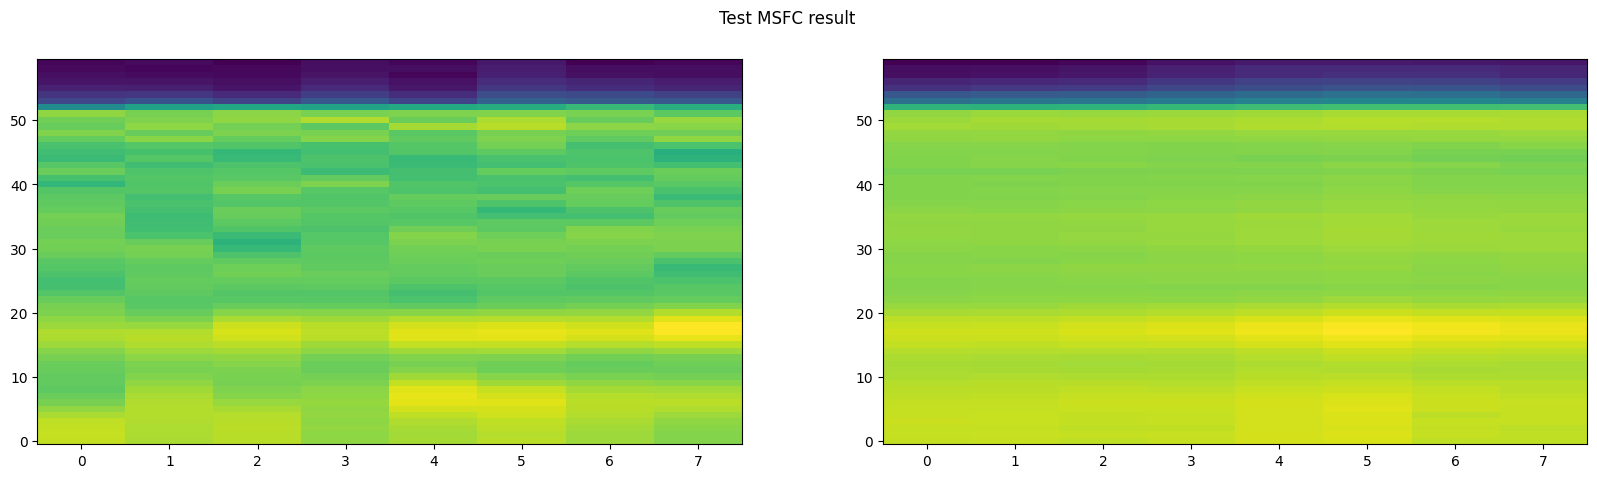

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 154it [00:40,  4.14it/s]

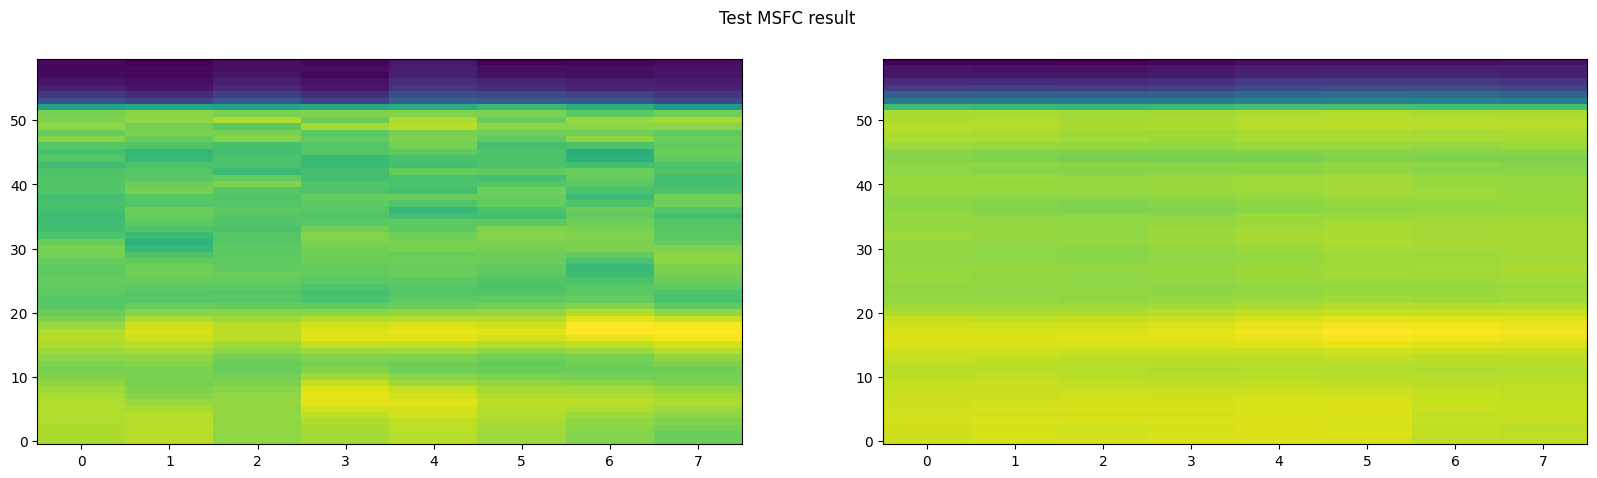

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 155it [00:41,  2.52it/s]

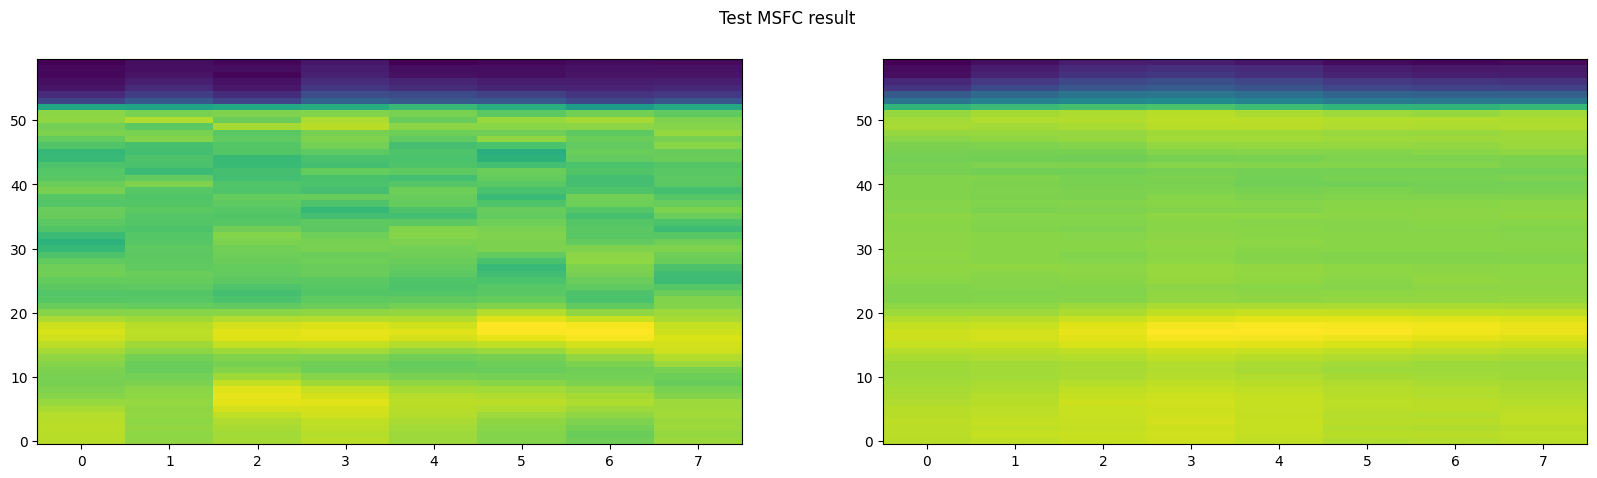

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 156it [00:41,  2.85it/s]

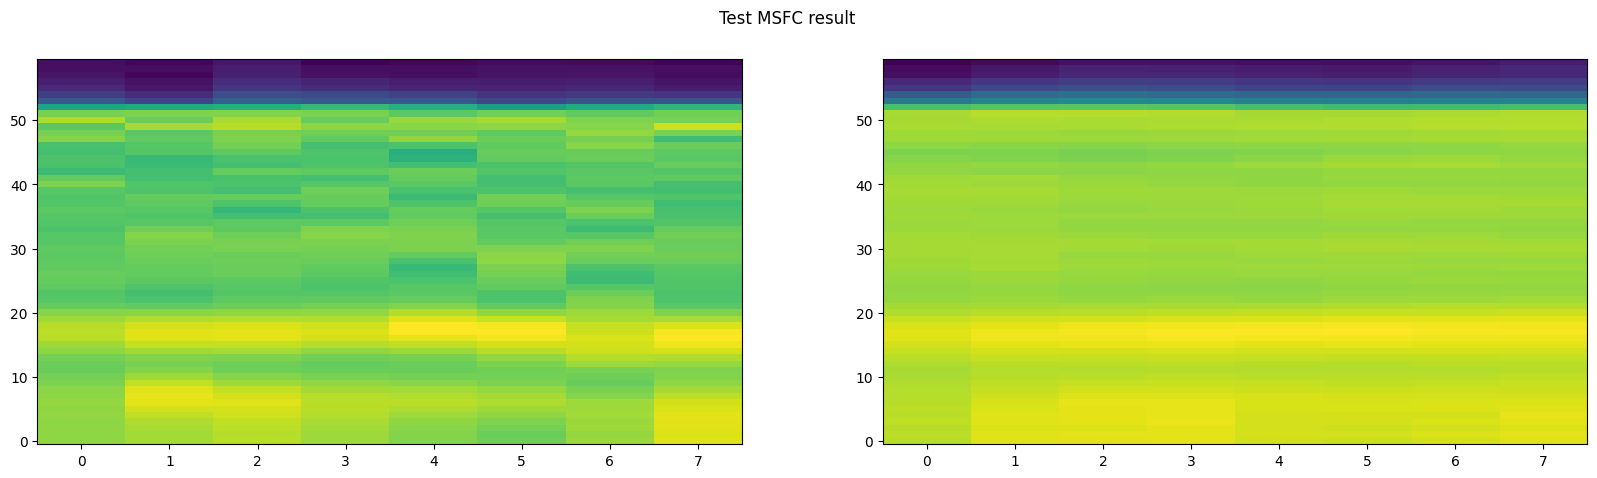

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 157it [00:41,  3.14it/s]

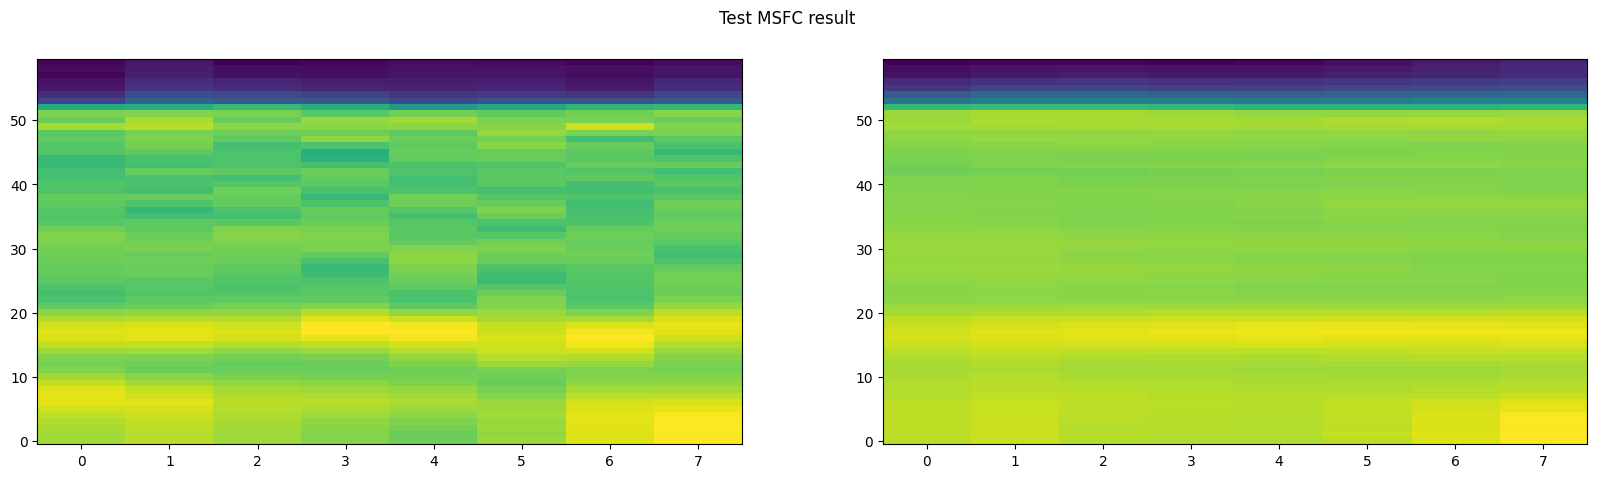

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 158it [00:42,  3.39it/s]

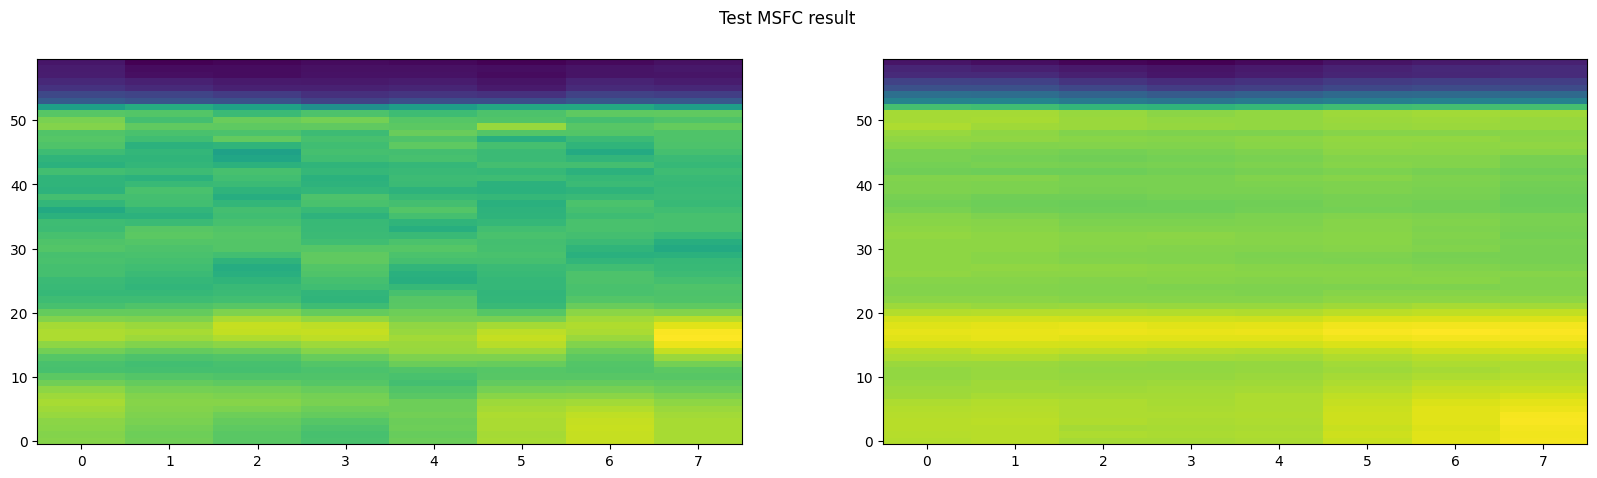

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 159it [00:42,  3.58it/s]

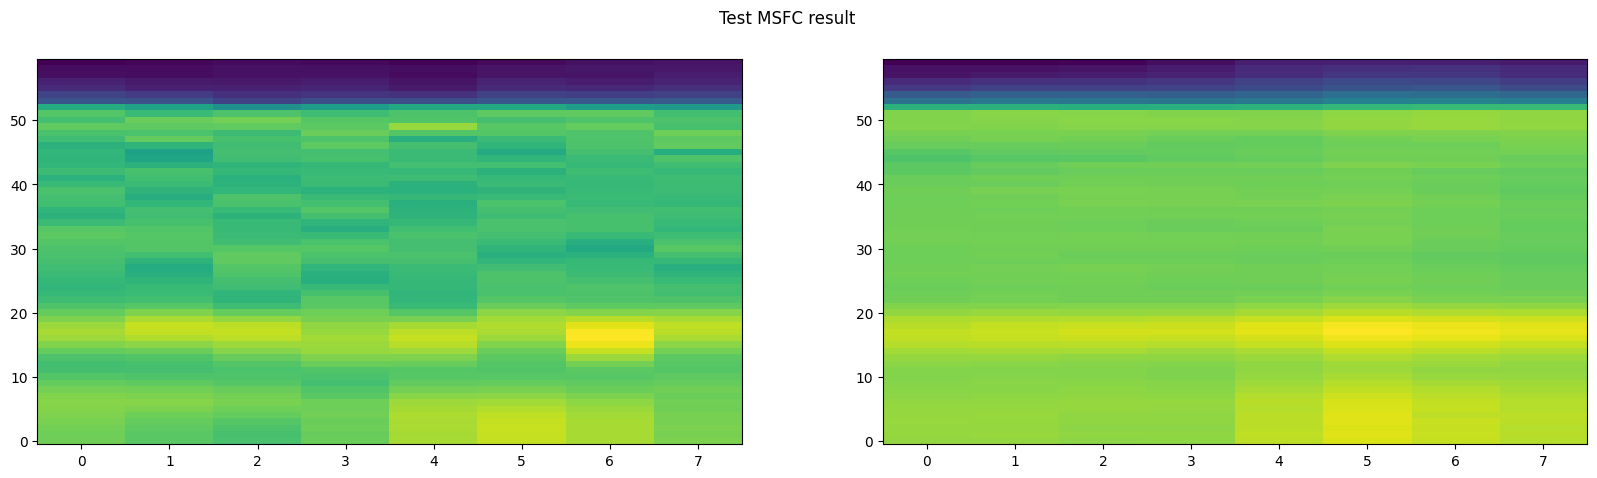

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 160it [00:42,  3.72it/s]

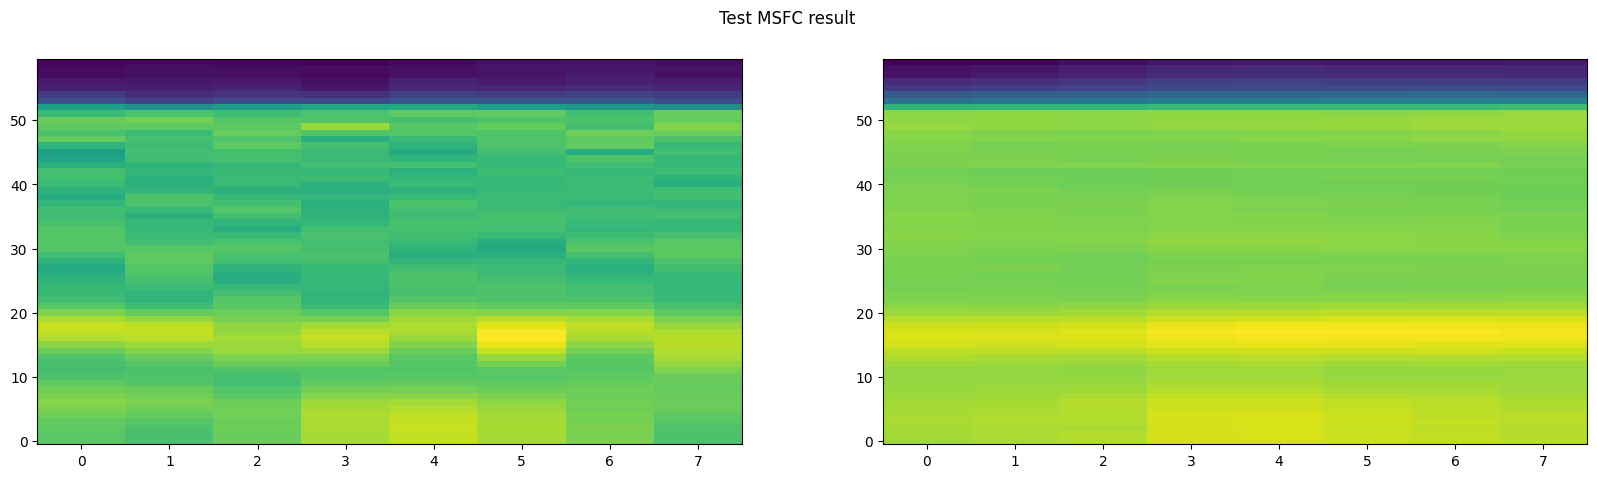

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 161it [00:42,  3.83it/s]

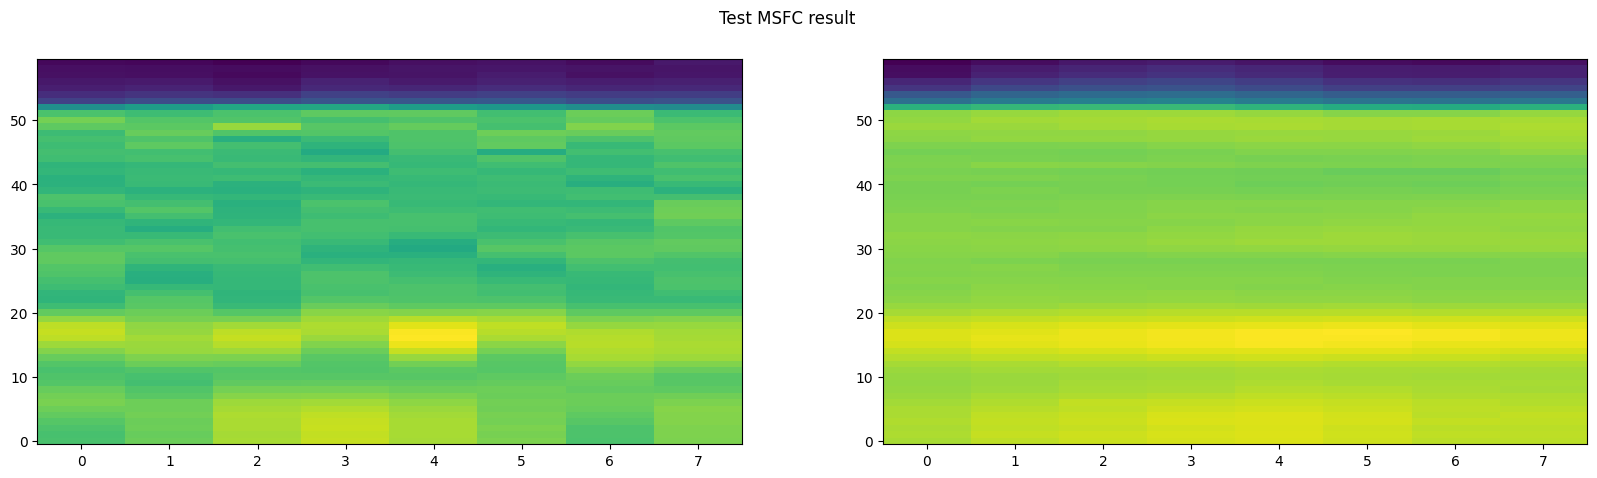

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 162it [00:42,  3.91it/s]

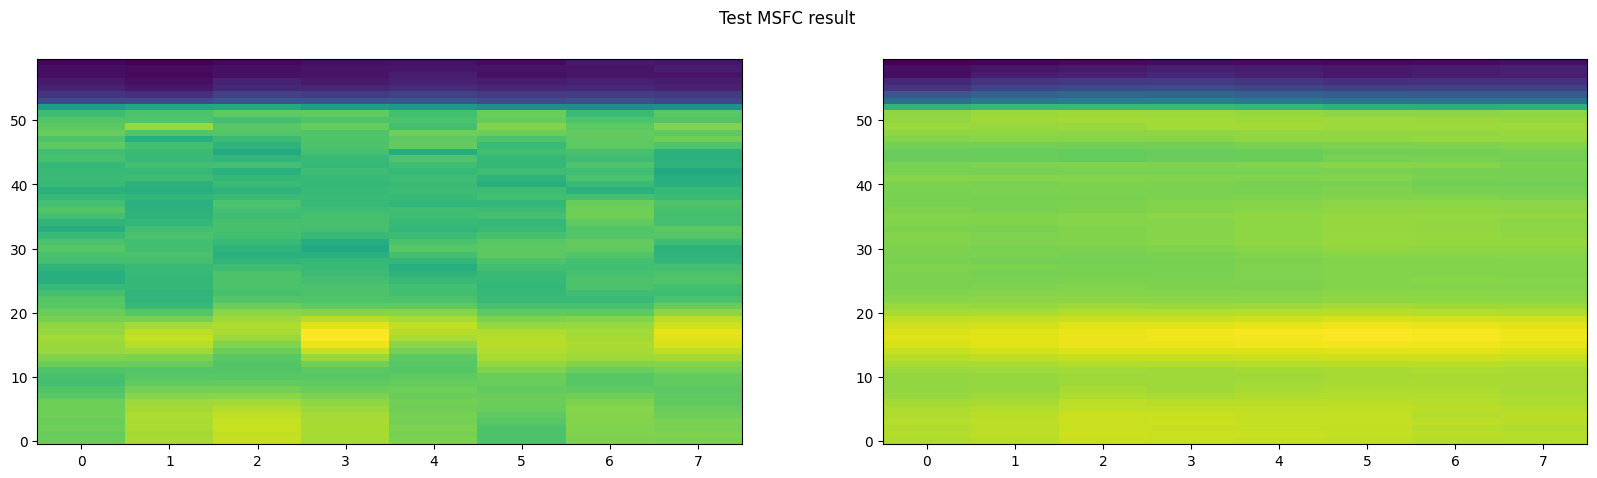

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 163it [00:43,  3.97it/s]

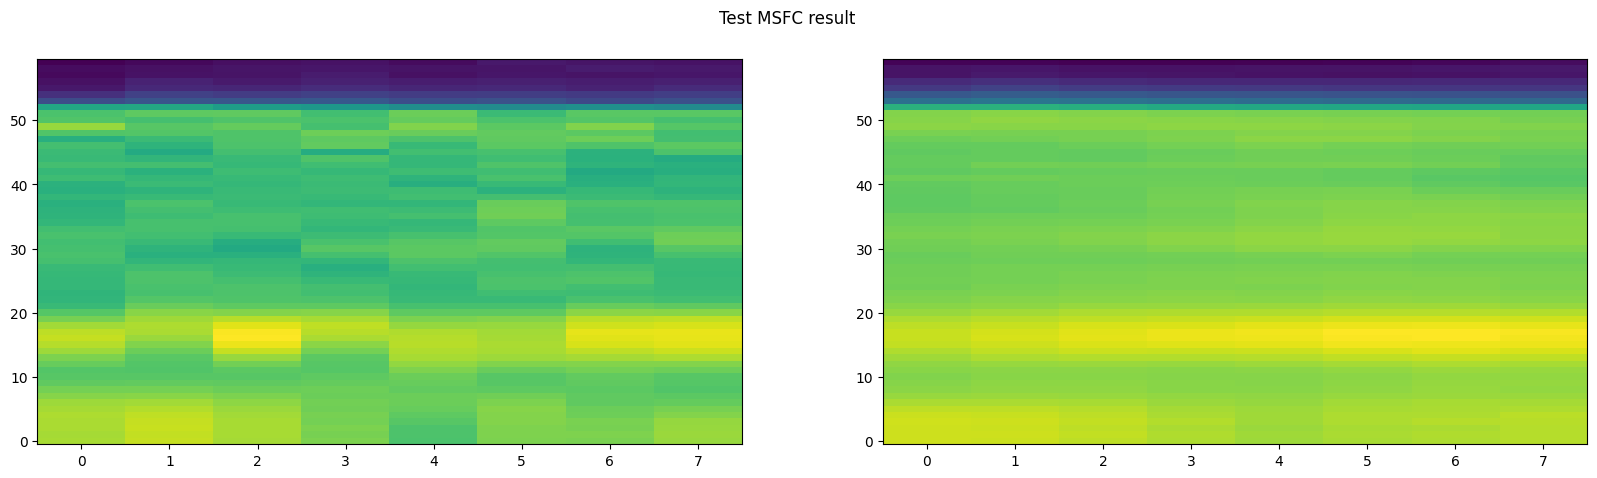

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 164it [00:43,  4.02it/s]

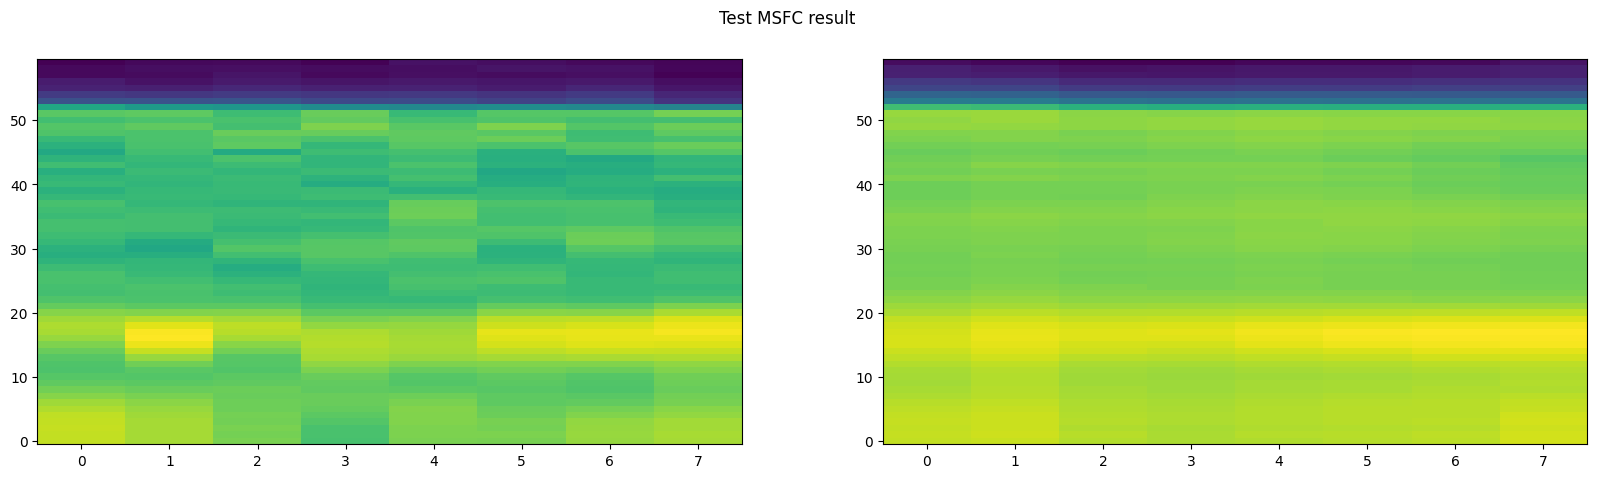

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 165it [00:43,  4.05it/s]

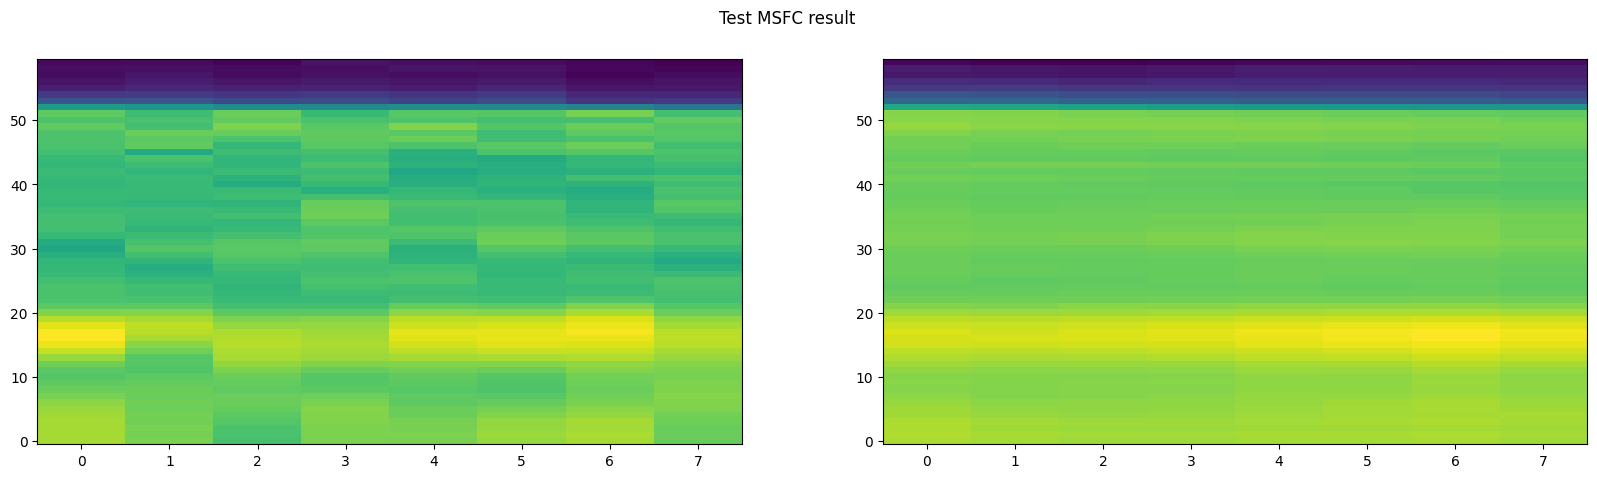

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 166it [00:43,  4.07it/s]

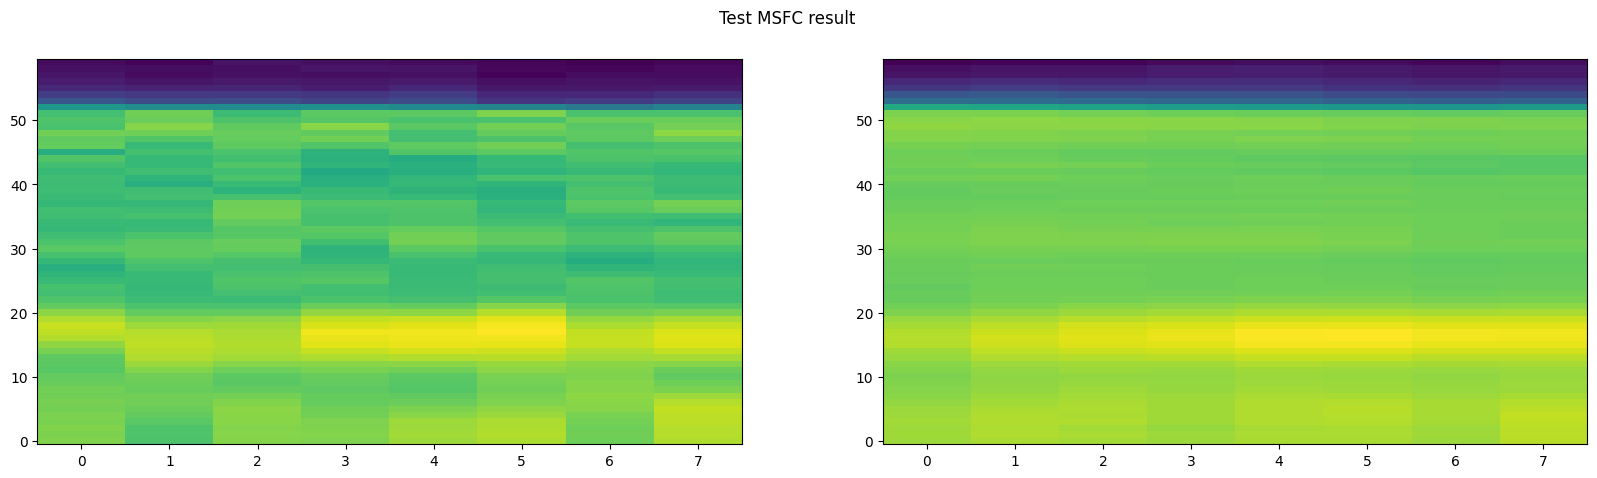

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 167it [00:44,  4.08it/s]

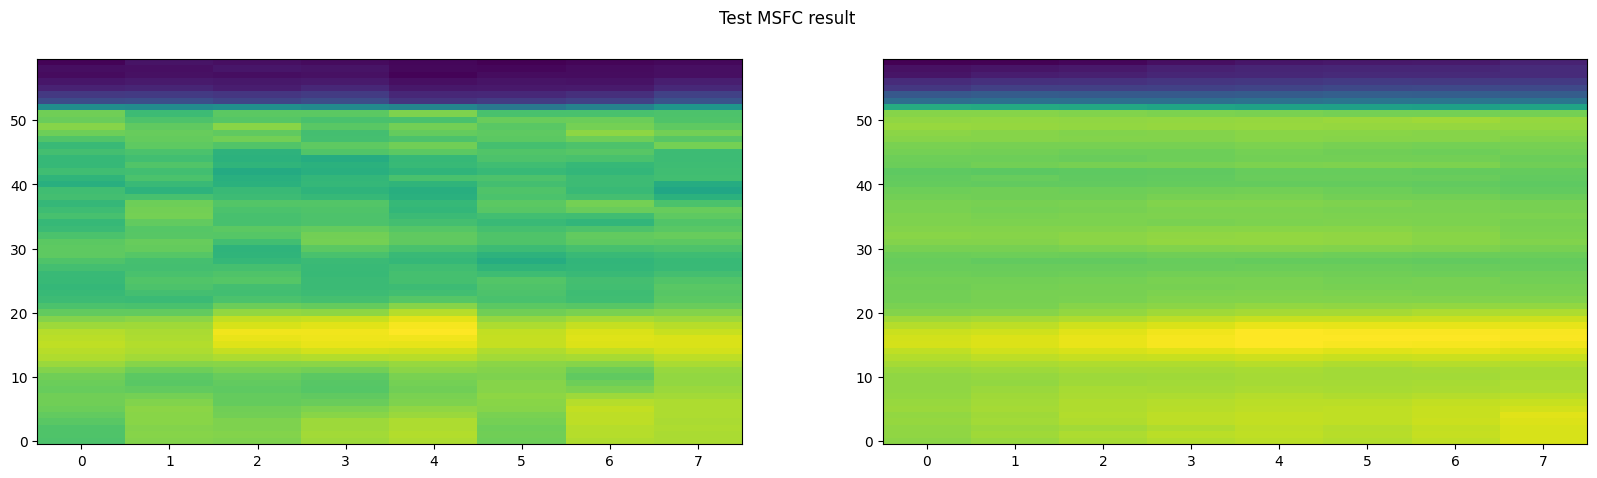

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 168it [00:44,  4.01it/s]

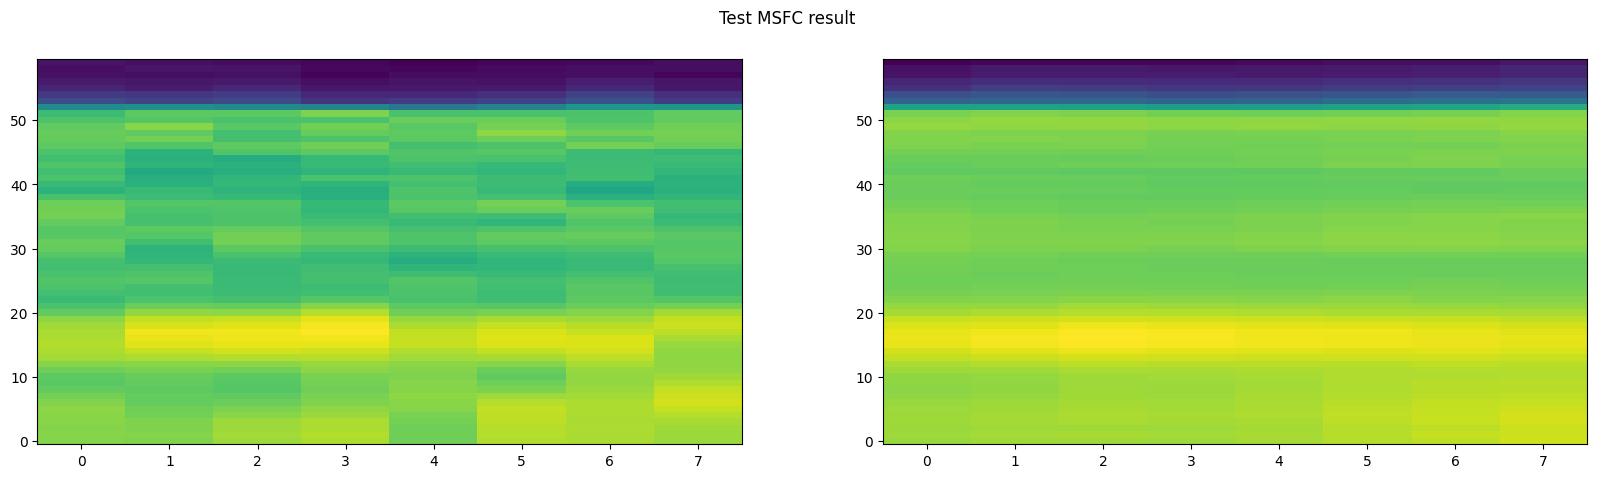

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 169it [00:44,  4.04it/s]

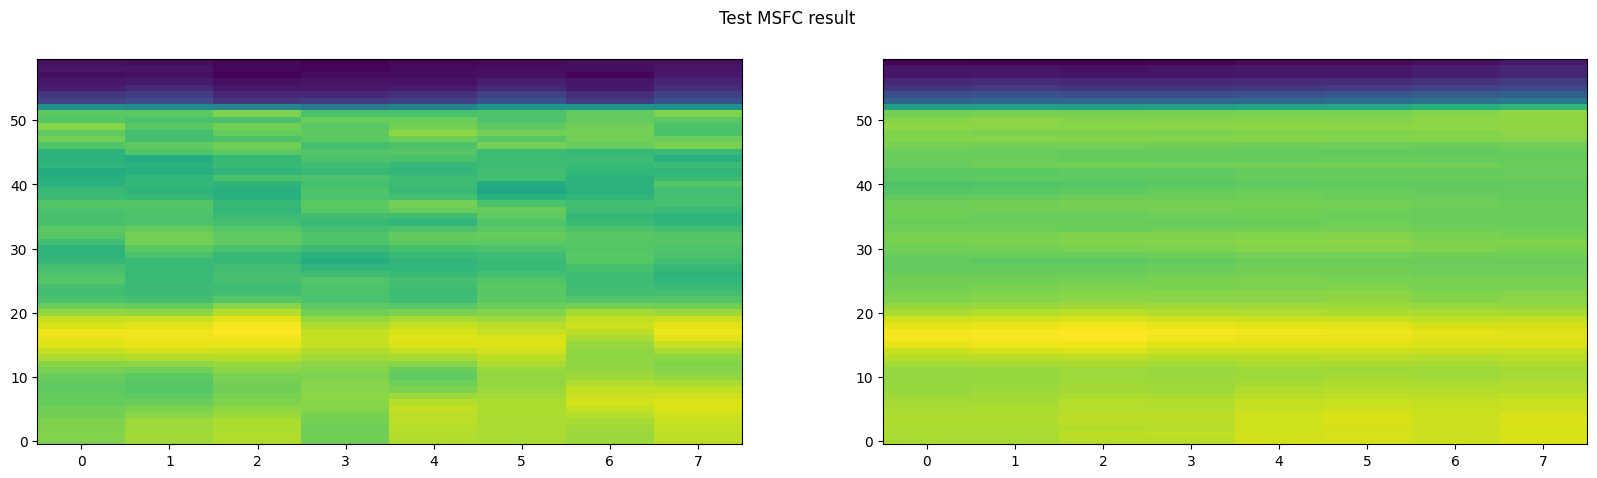

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 170it [00:44,  4.07it/s]

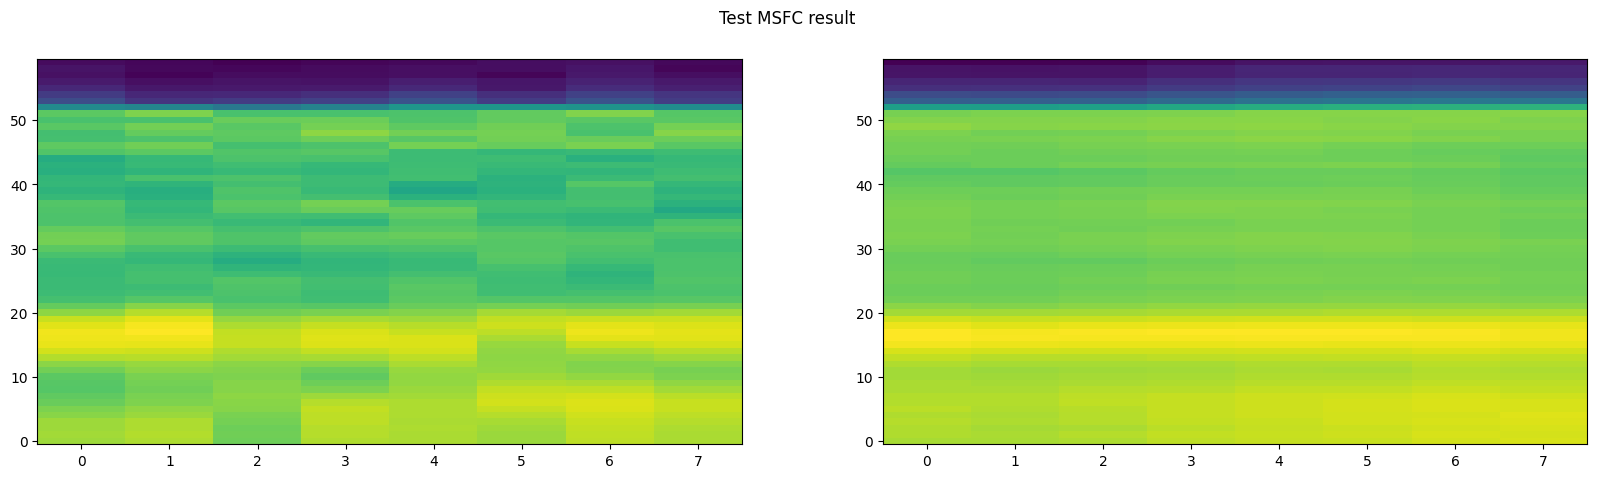

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 171it [00:45,  4.10it/s]

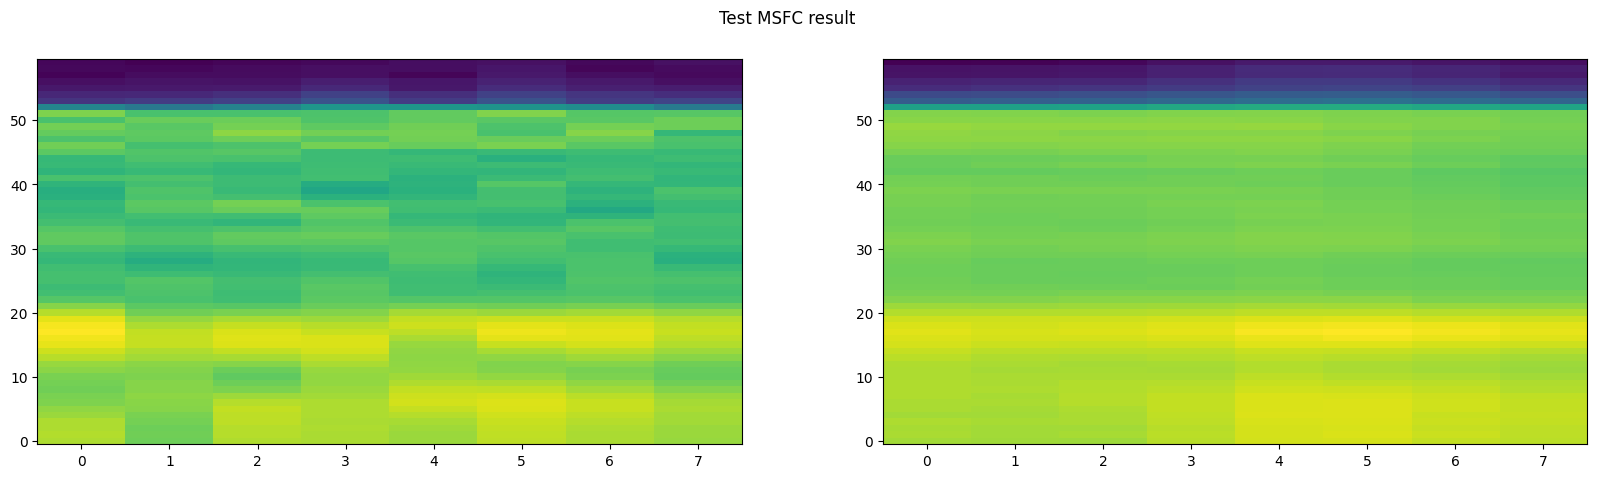

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 172it [00:45,  4.11it/s]

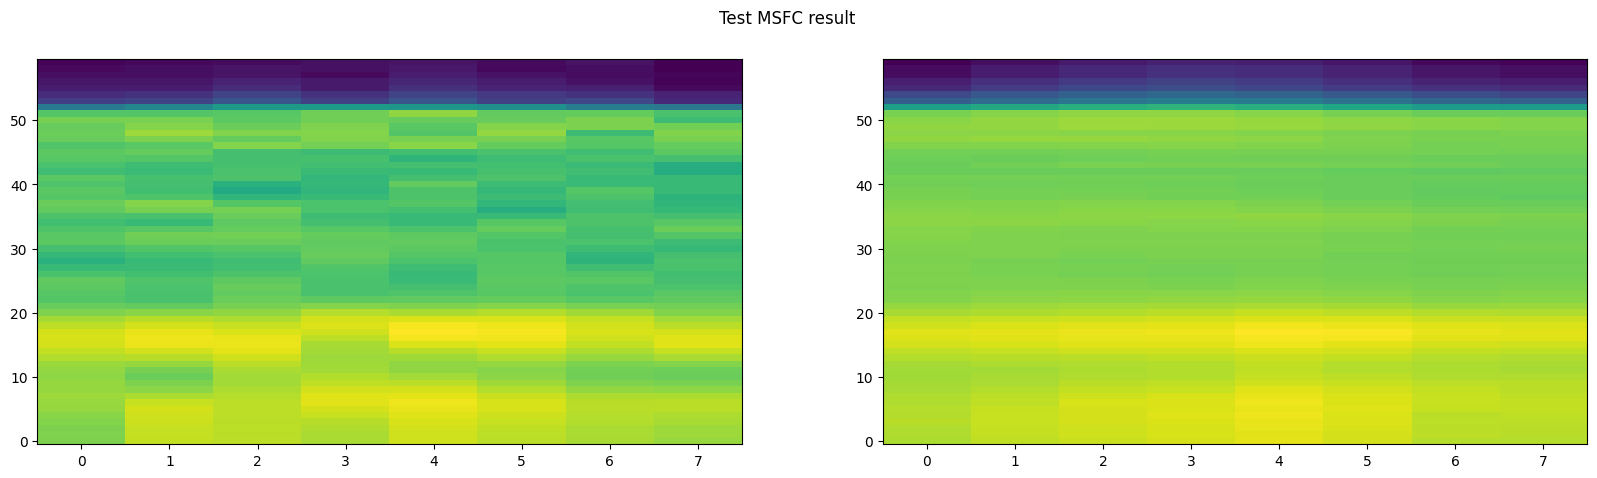

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 173it [00:45,  4.12it/s]

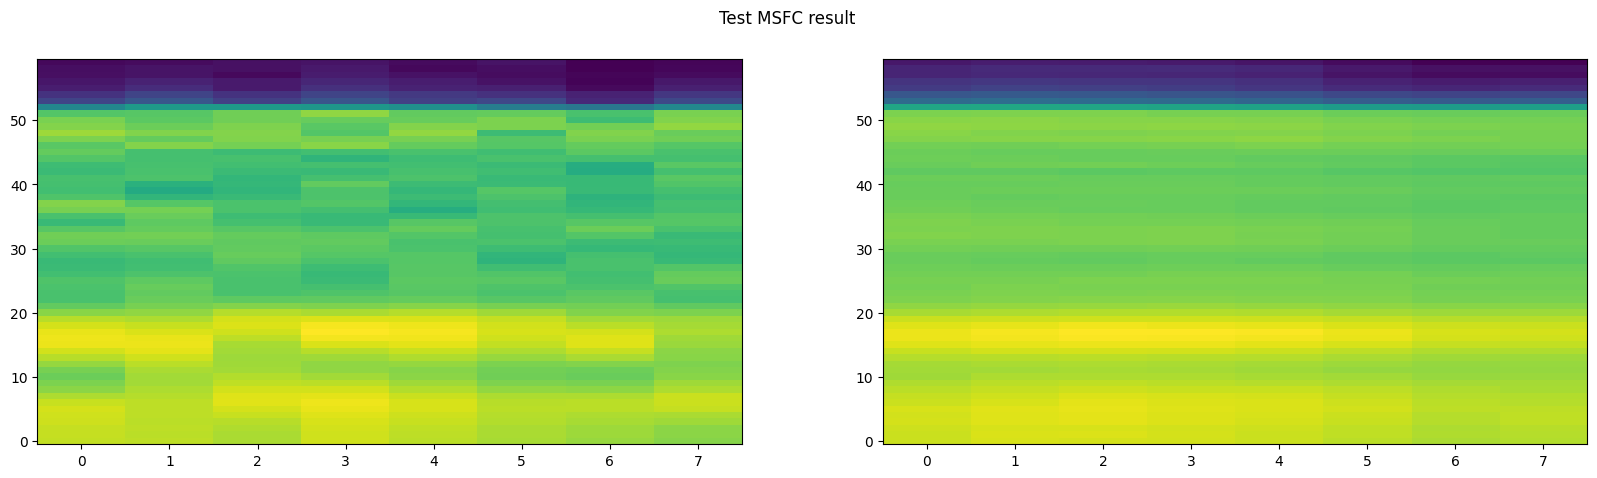

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 174it [00:45,  4.12it/s]

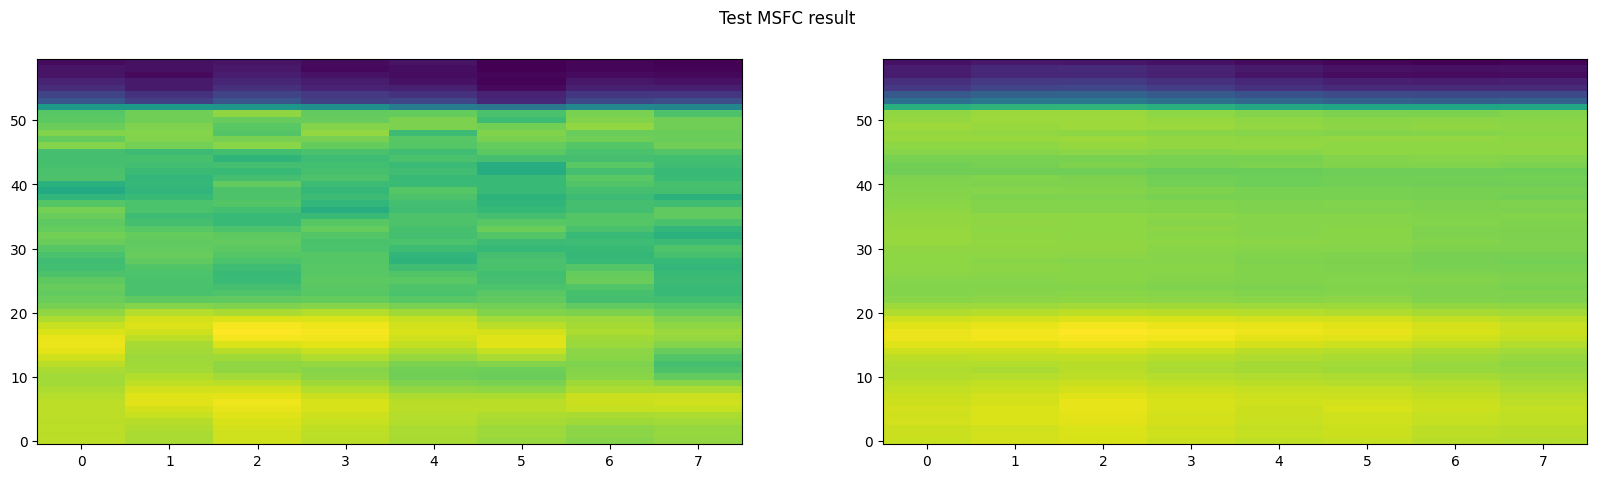

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 175it [00:46,  4.13it/s]

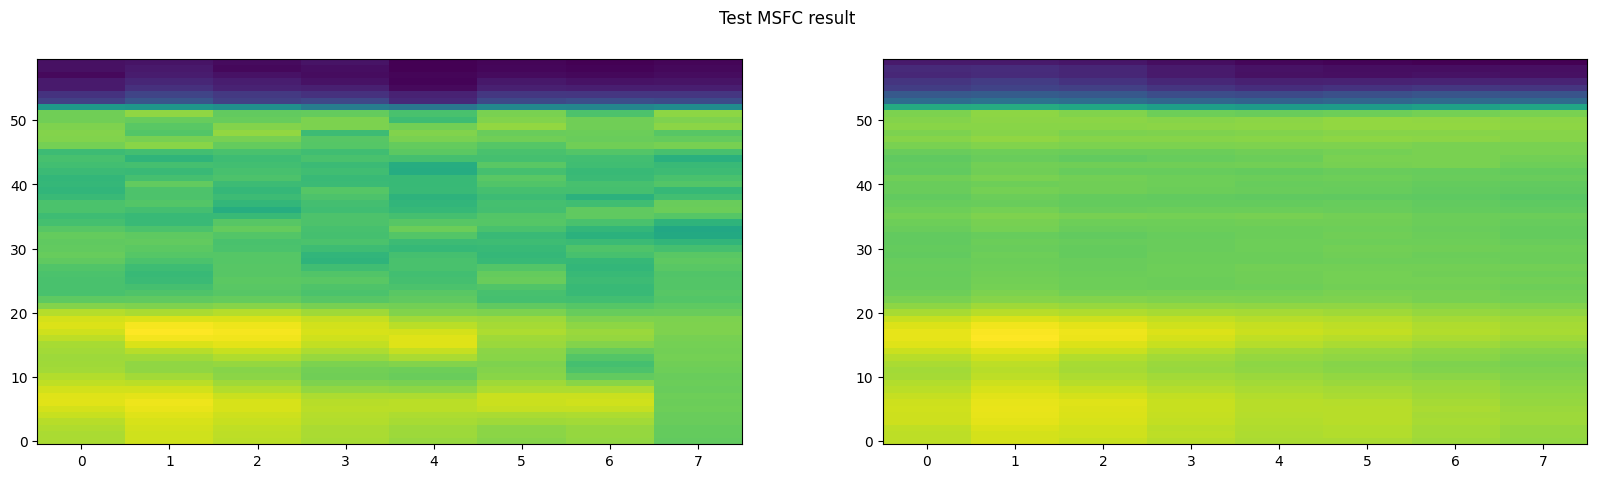

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 176it [00:46,  4.13it/s]

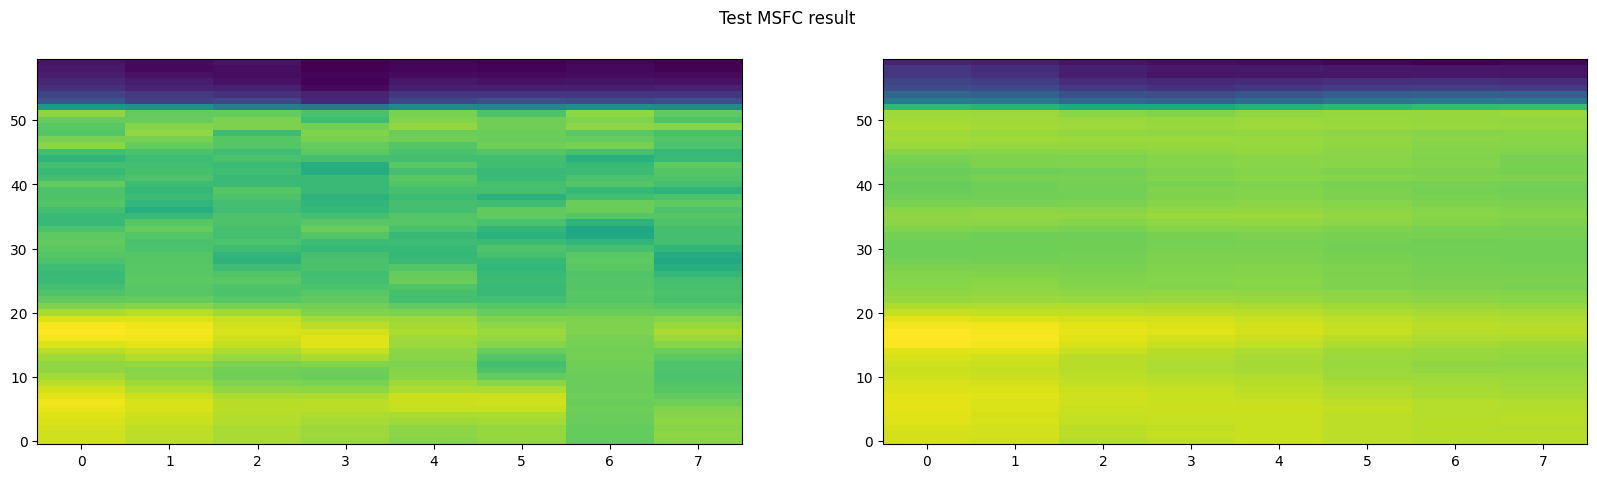

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 177it [00:46,  4.13it/s]

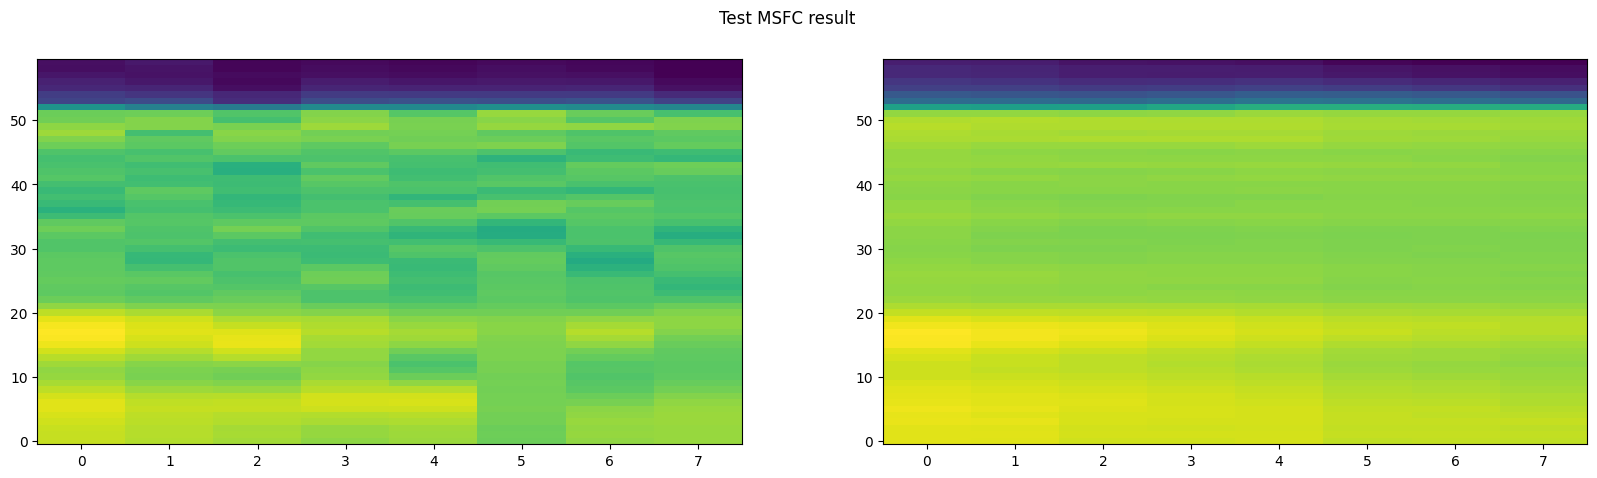

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 178it [00:46,  4.13it/s]

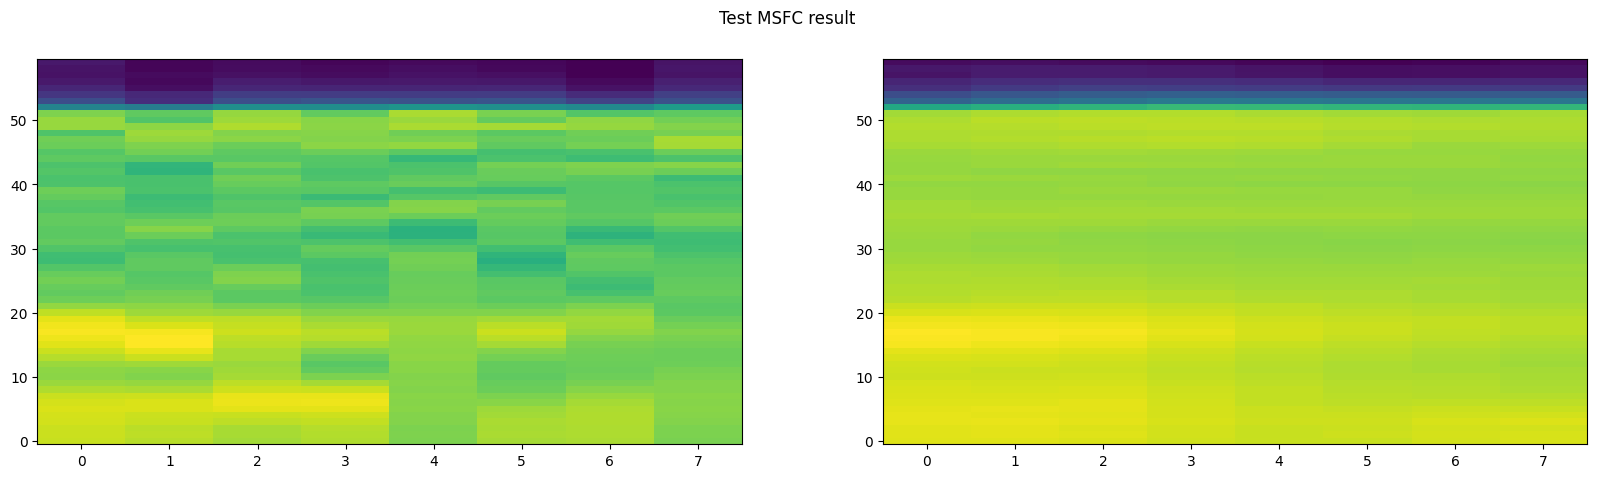

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 179it [00:47,  4.13it/s]

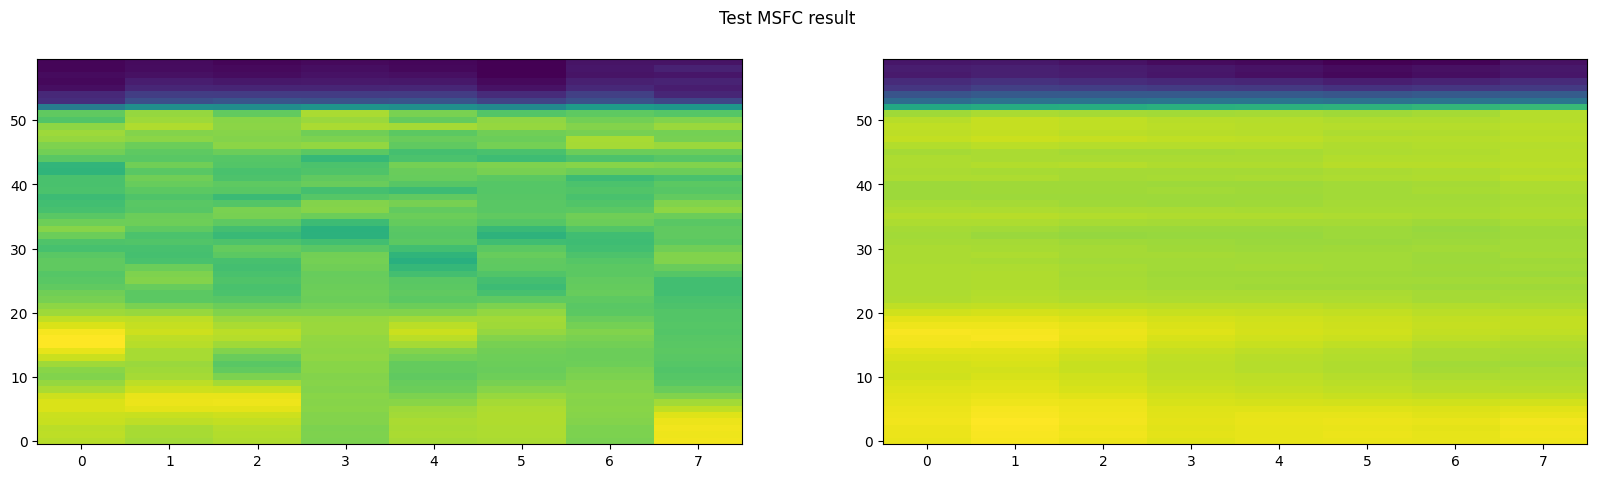

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 180it [00:47,  4.14it/s]

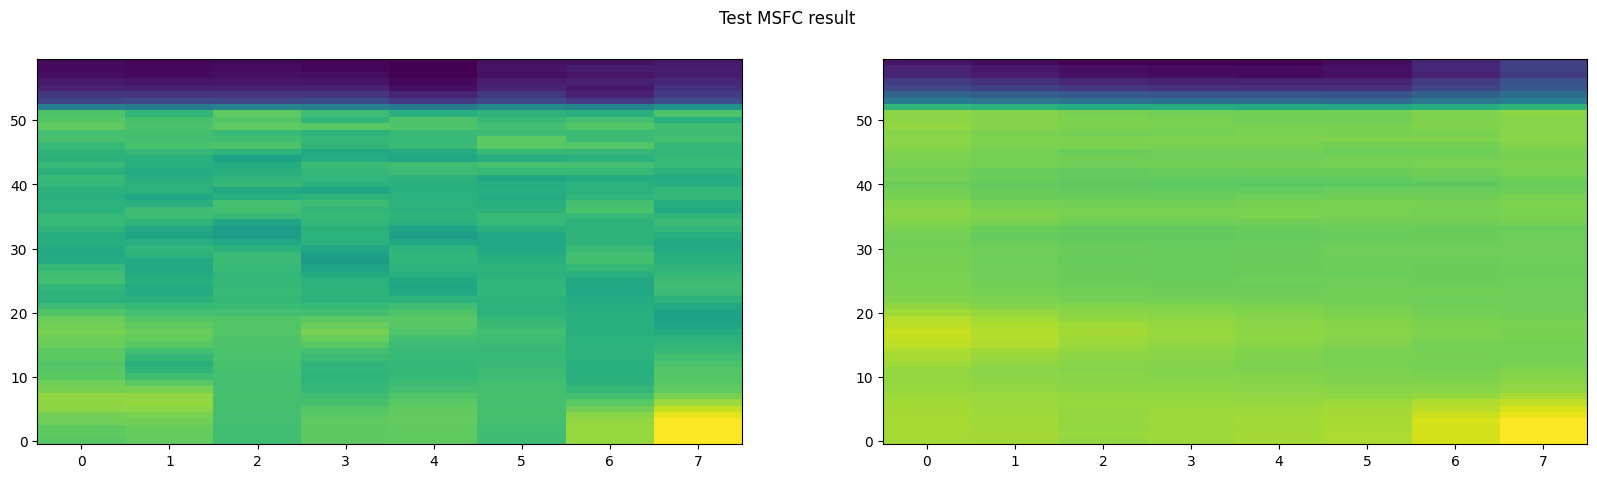

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 181it [00:47,  4.14it/s]

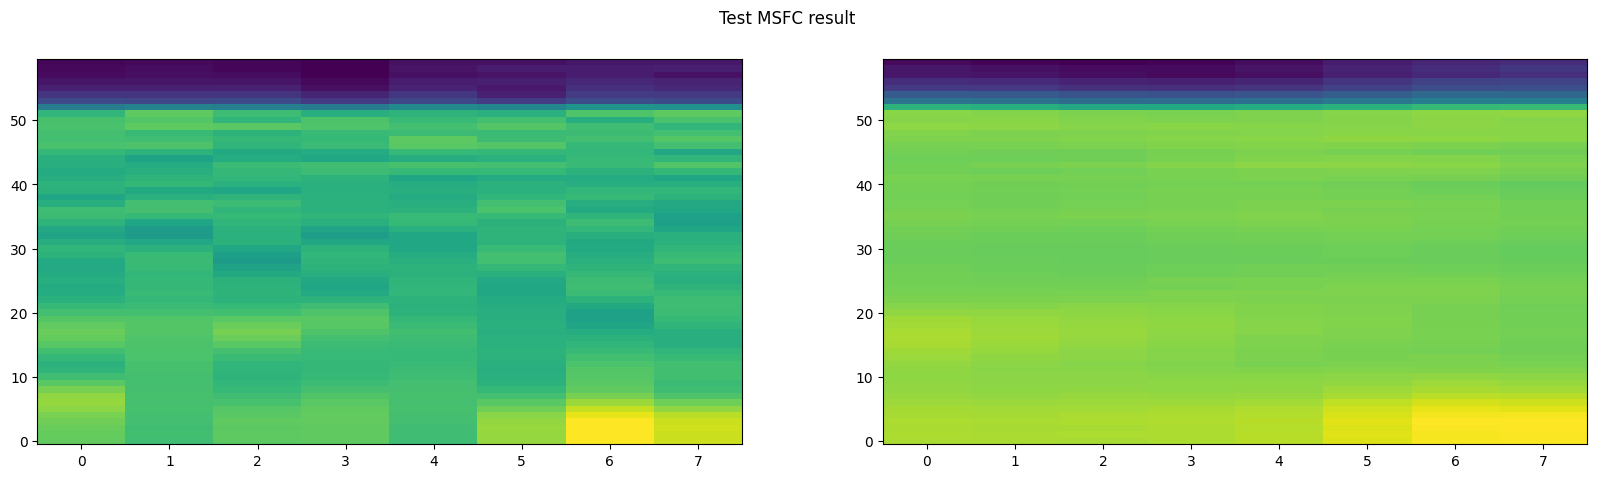

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 182it [00:47,  4.14it/s]

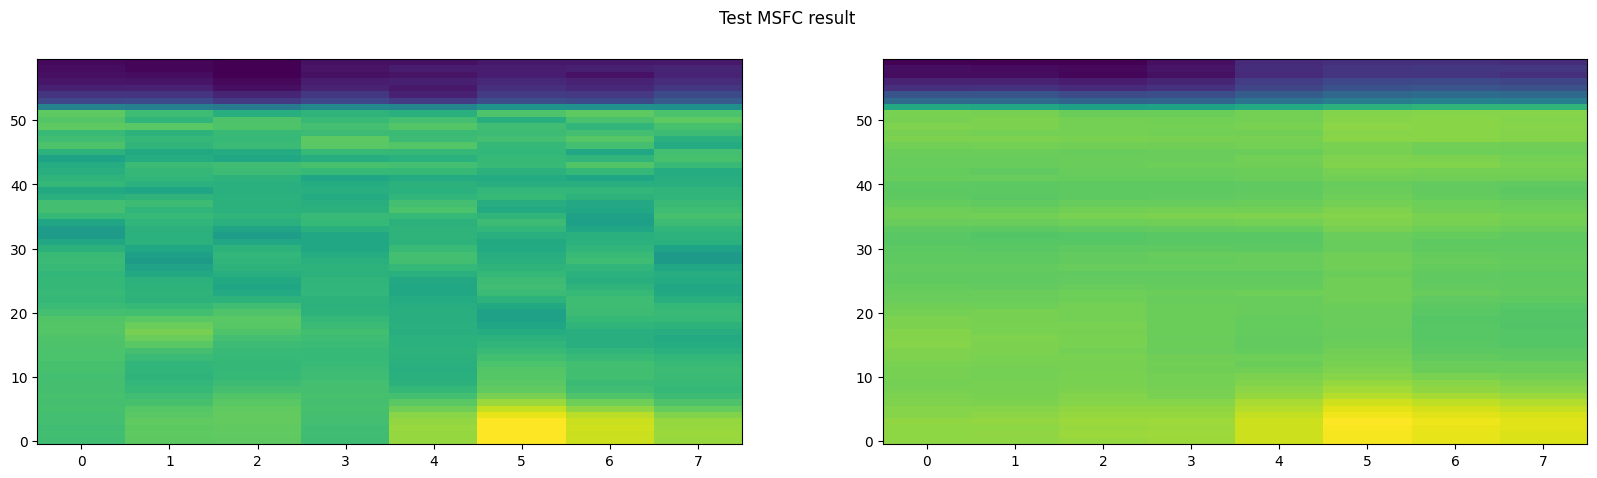

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 183it [00:48,  4.15it/s]

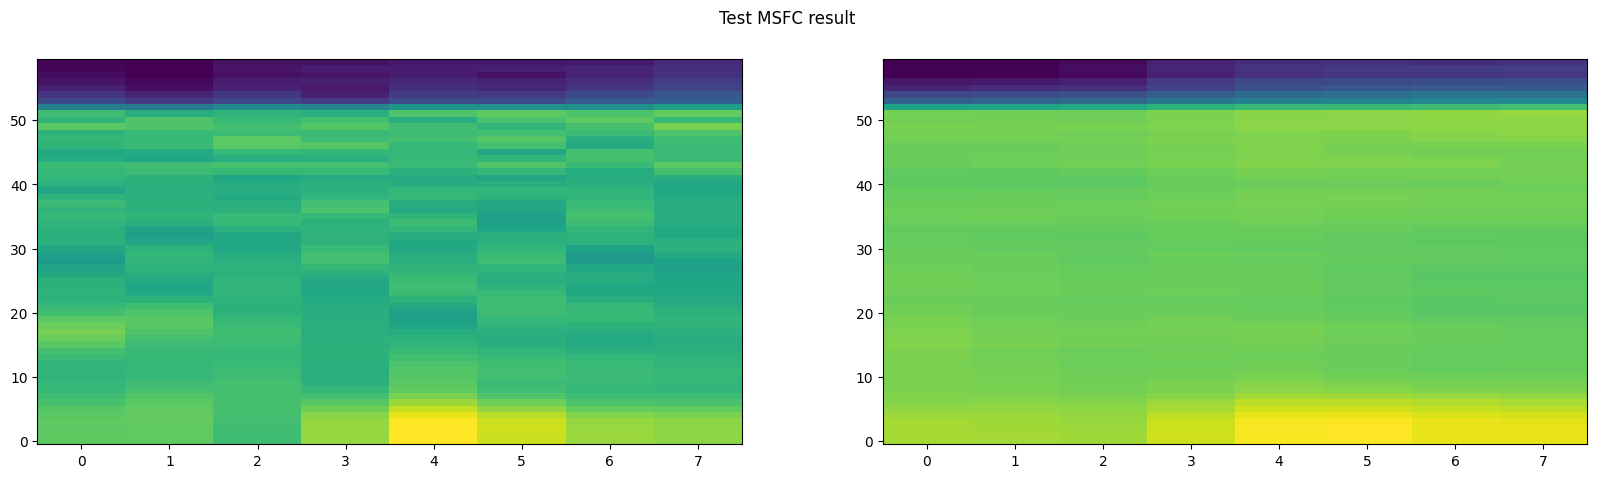

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 184it [00:48,  2.56it/s]

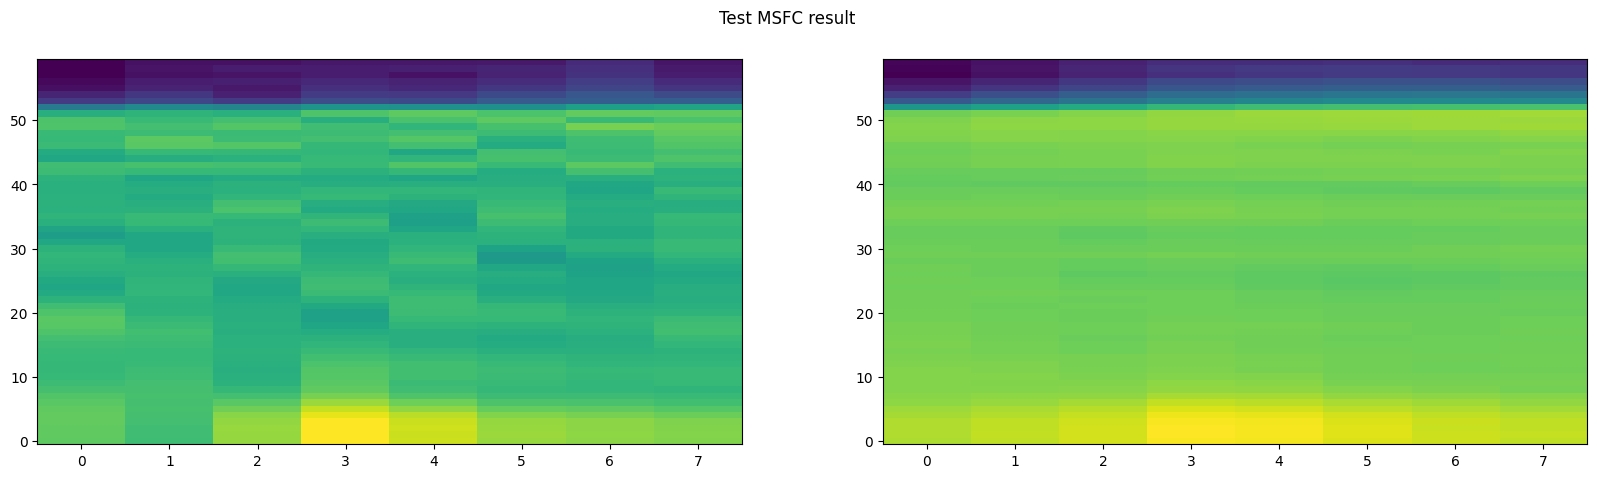

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 185it [00:49,  2.89it/s]

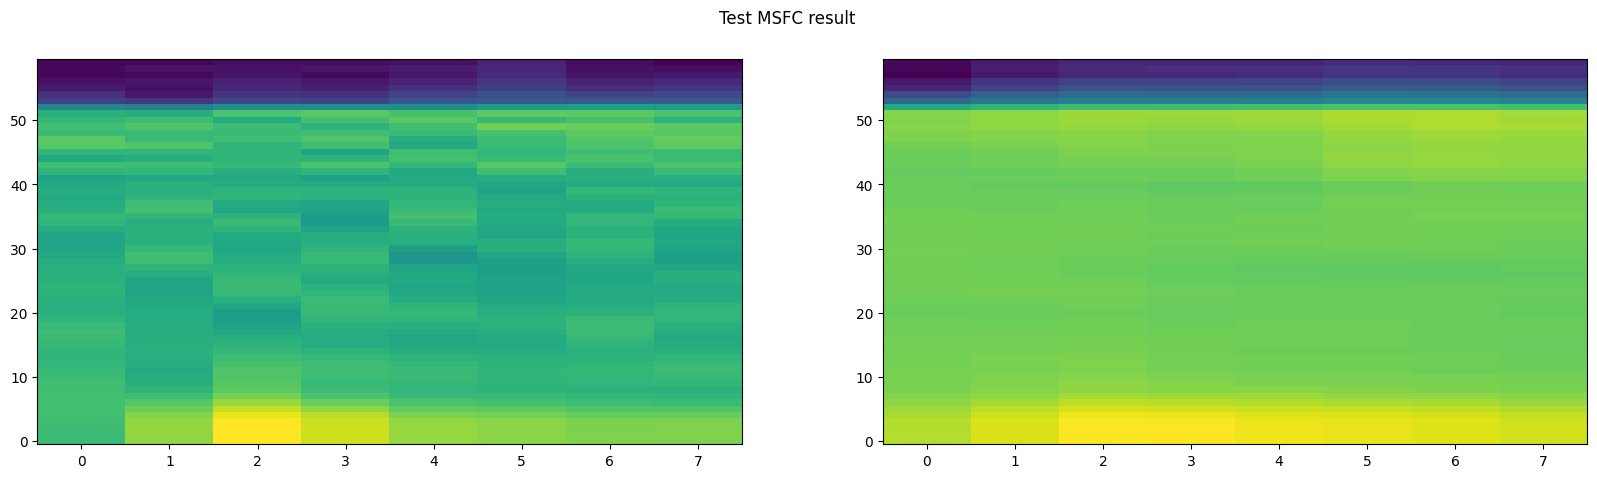

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 186it [00:49,  3.16it/s]

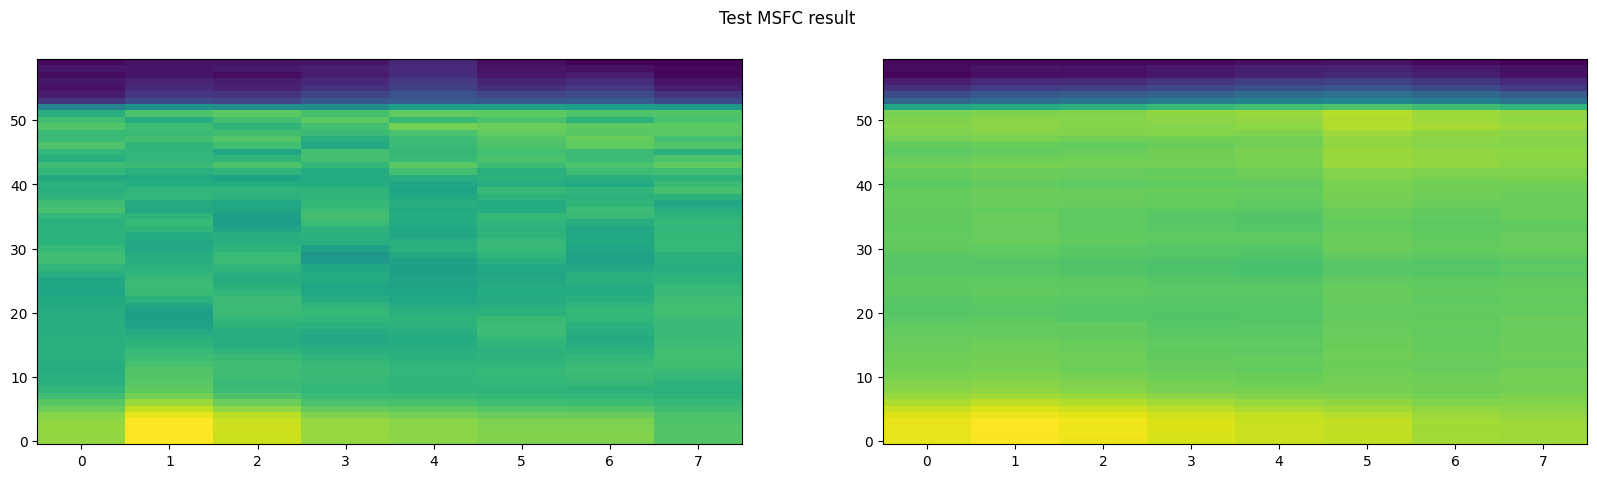

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 187it [00:49,  3.40it/s]

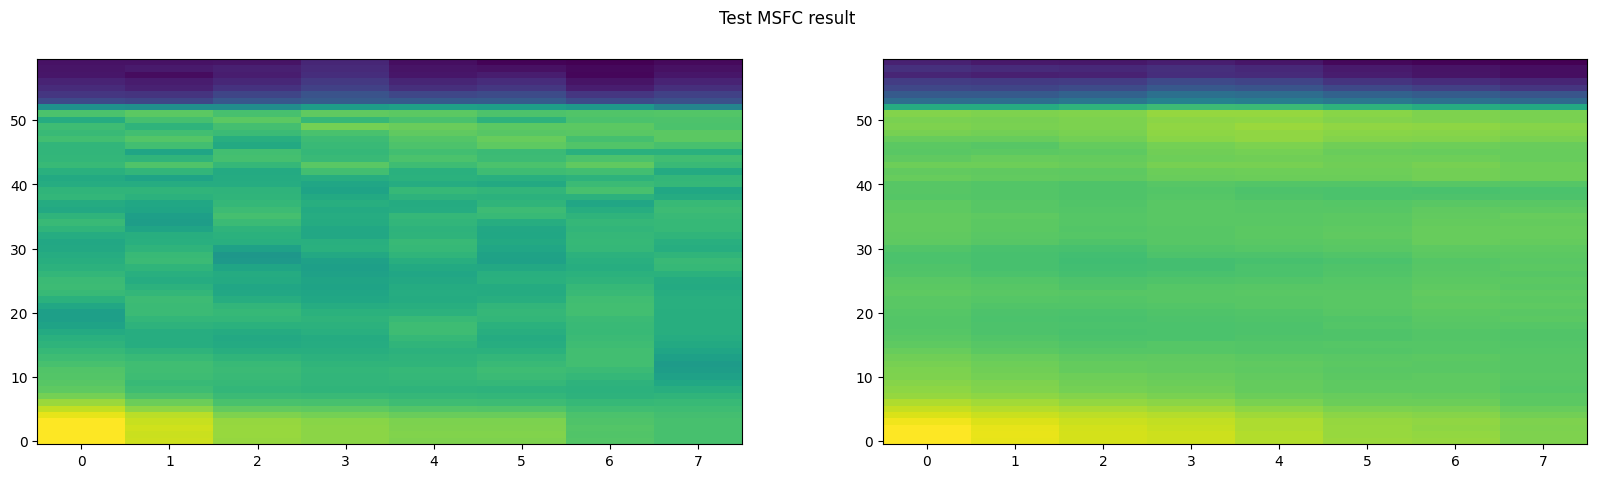

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 188it [00:49,  3.58it/s]

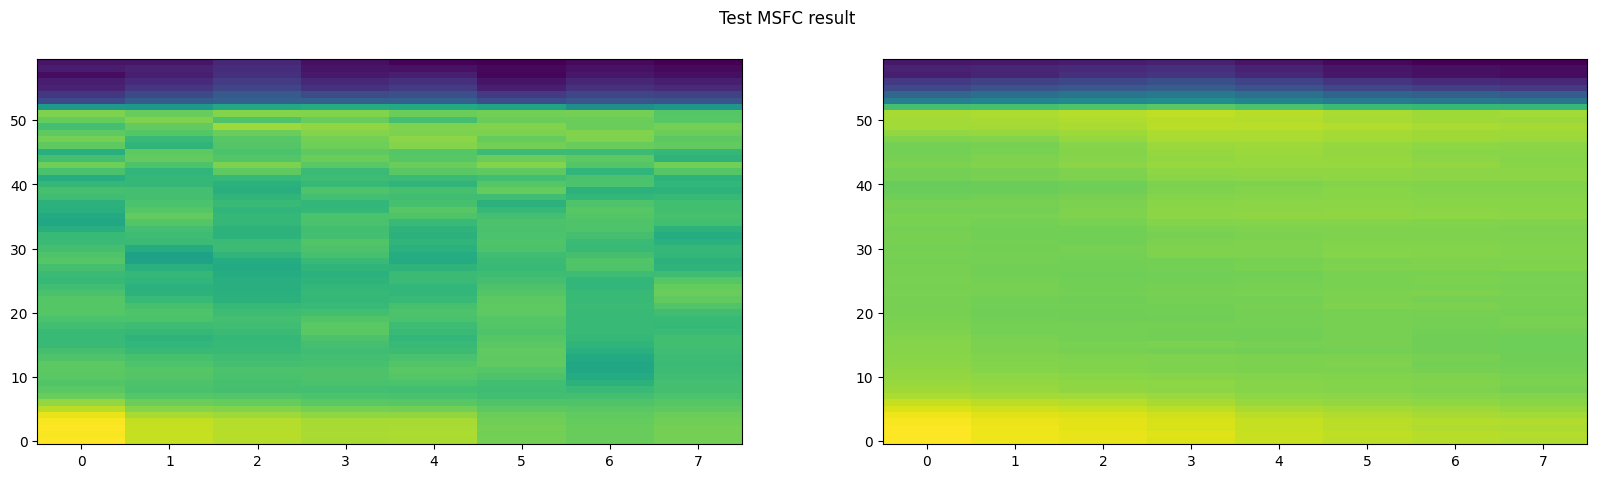

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 189it [00:50,  3.73it/s]

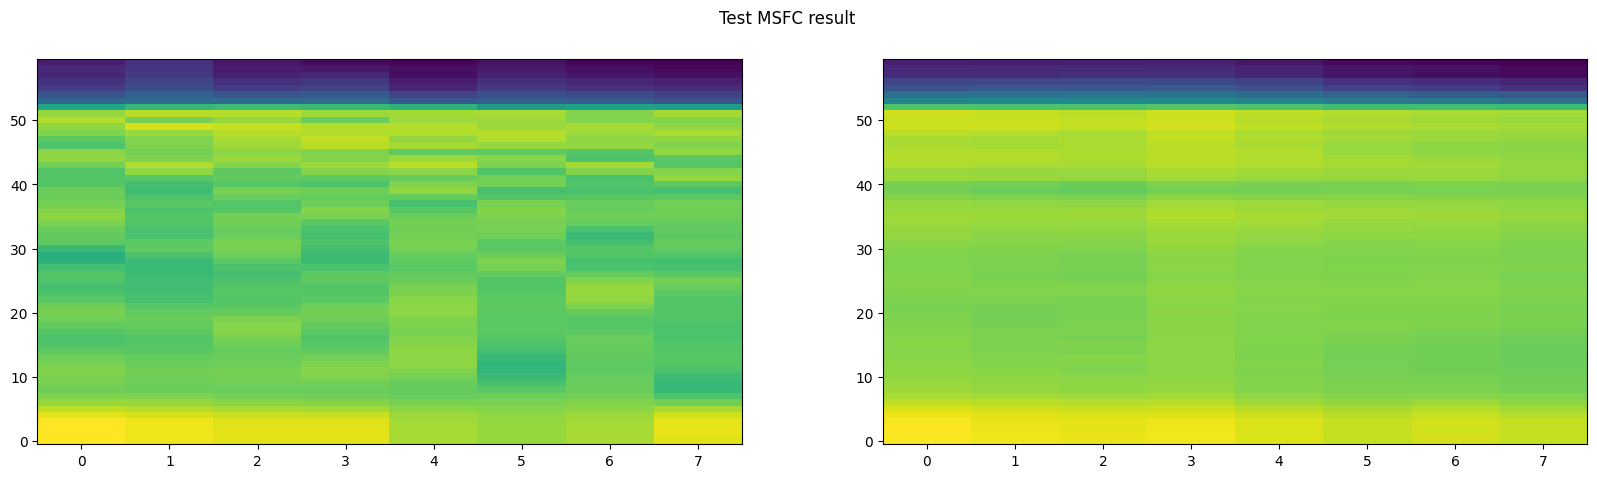

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 190it [00:50,  3.84it/s]

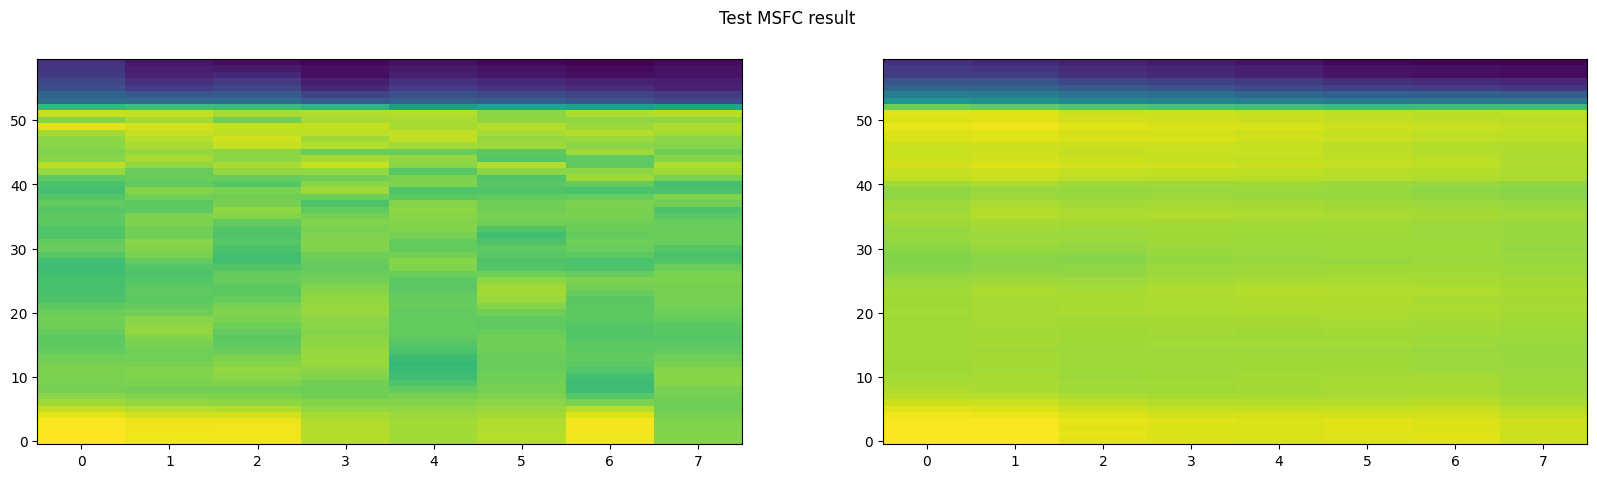

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 191it [00:50,  3.93it/s]

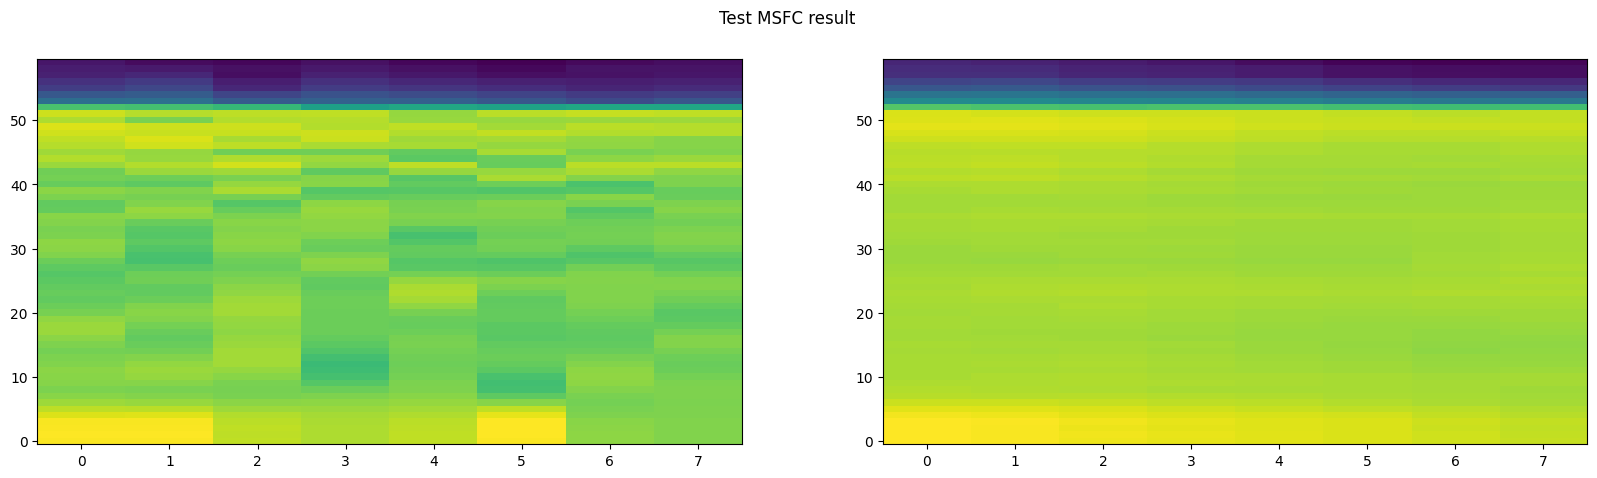

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 192it [00:50,  3.98it/s]

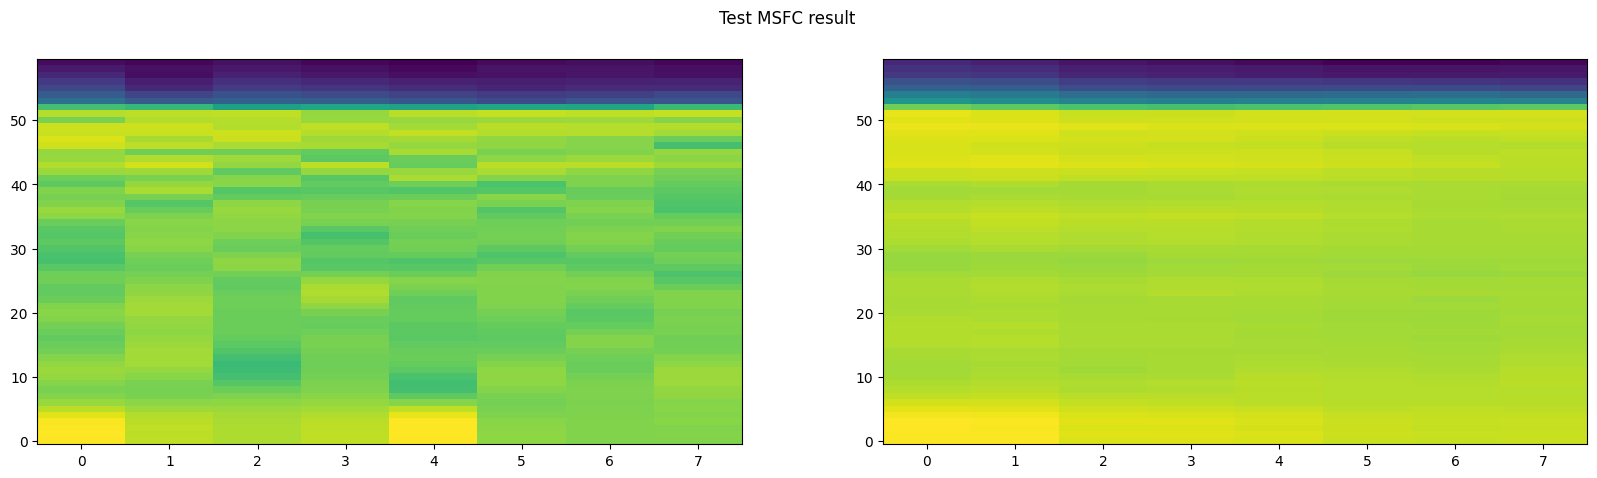

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 193it [00:50,  4.03it/s]

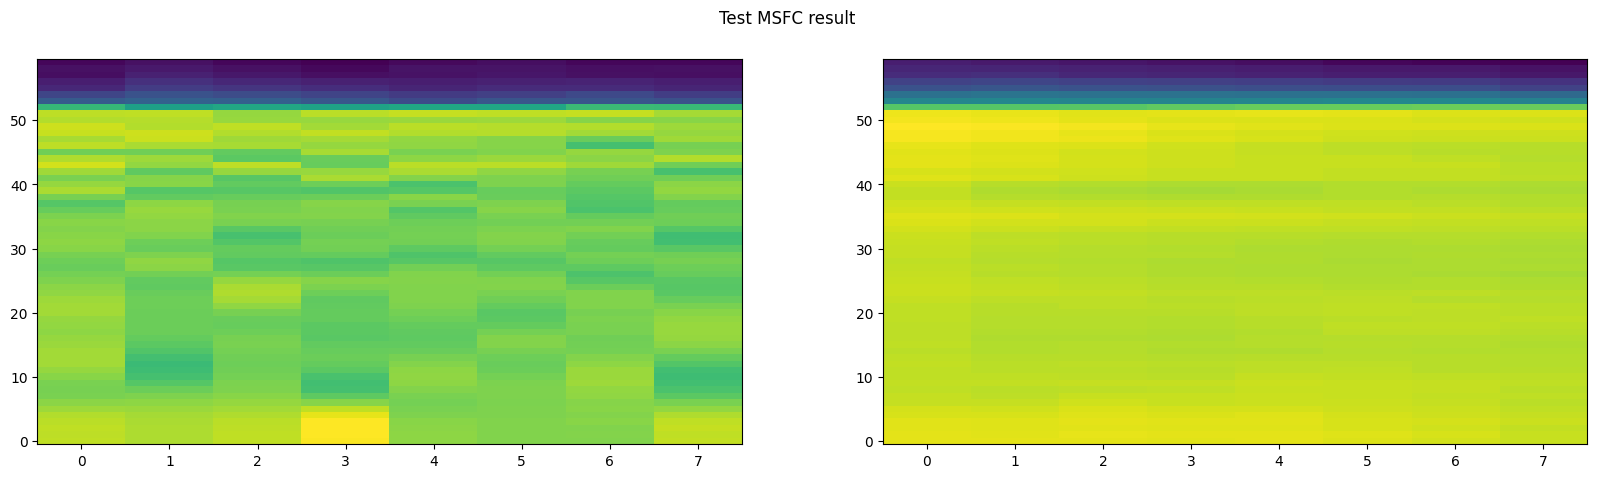

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 194it [00:51,  4.05it/s]

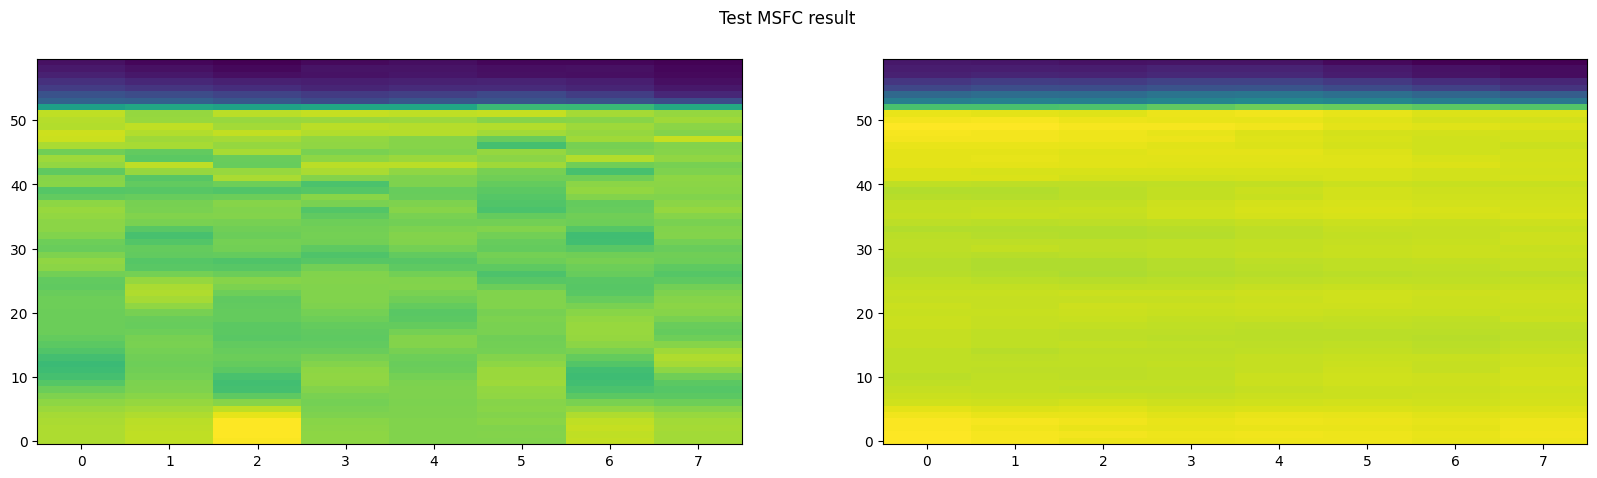

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 195it [00:51,  4.08it/s]

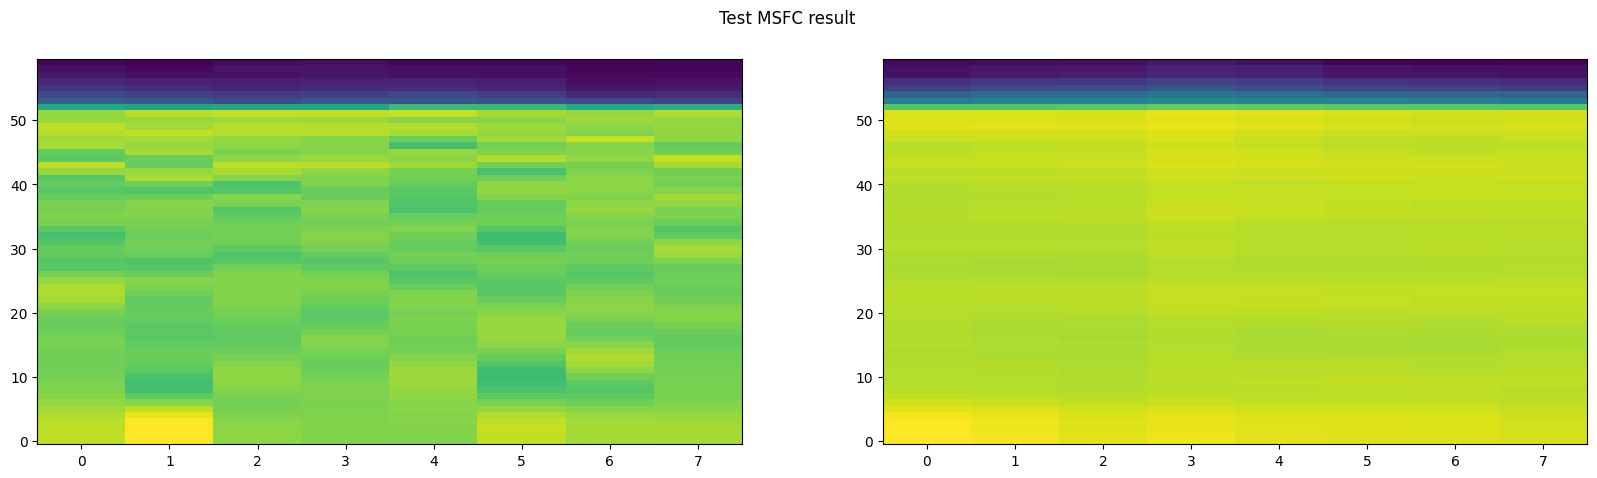

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 196it [00:51,  4.05it/s]

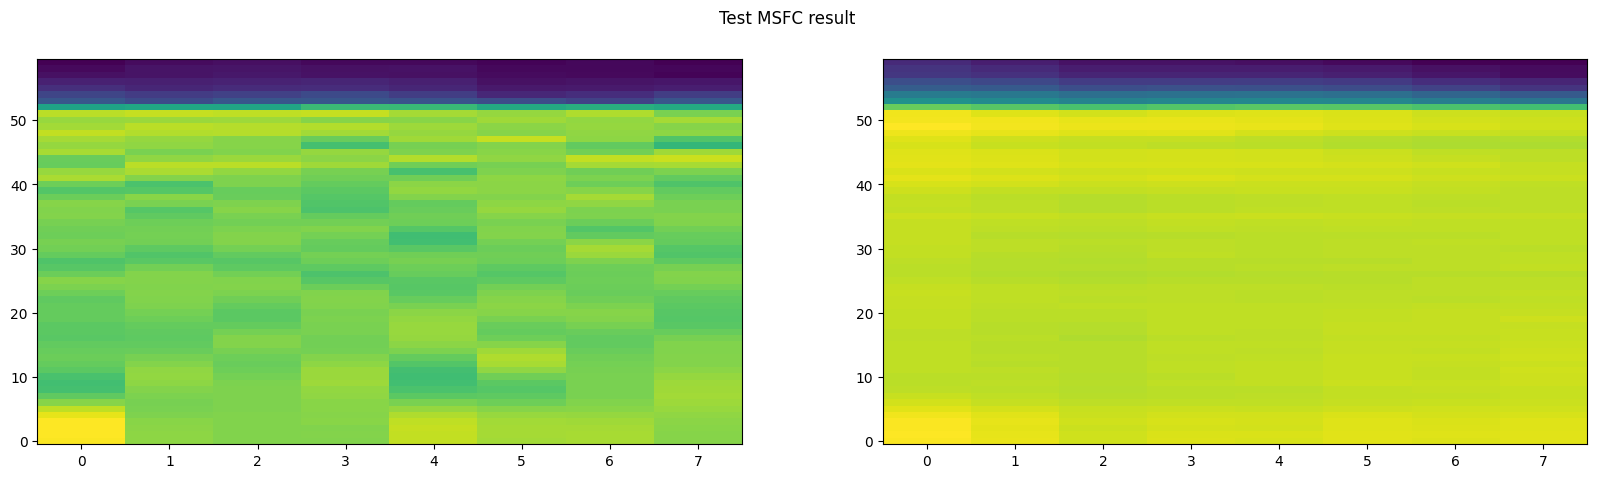

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 197it [00:51,  4.05it/s]

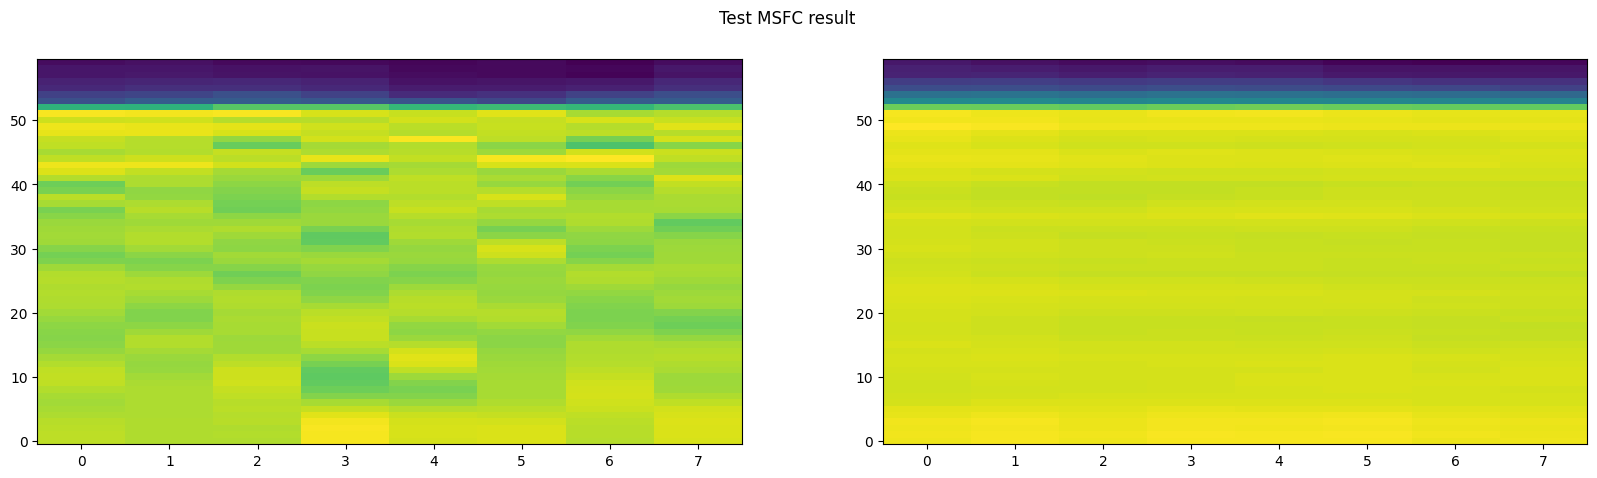

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 198it [00:52,  4.07it/s]

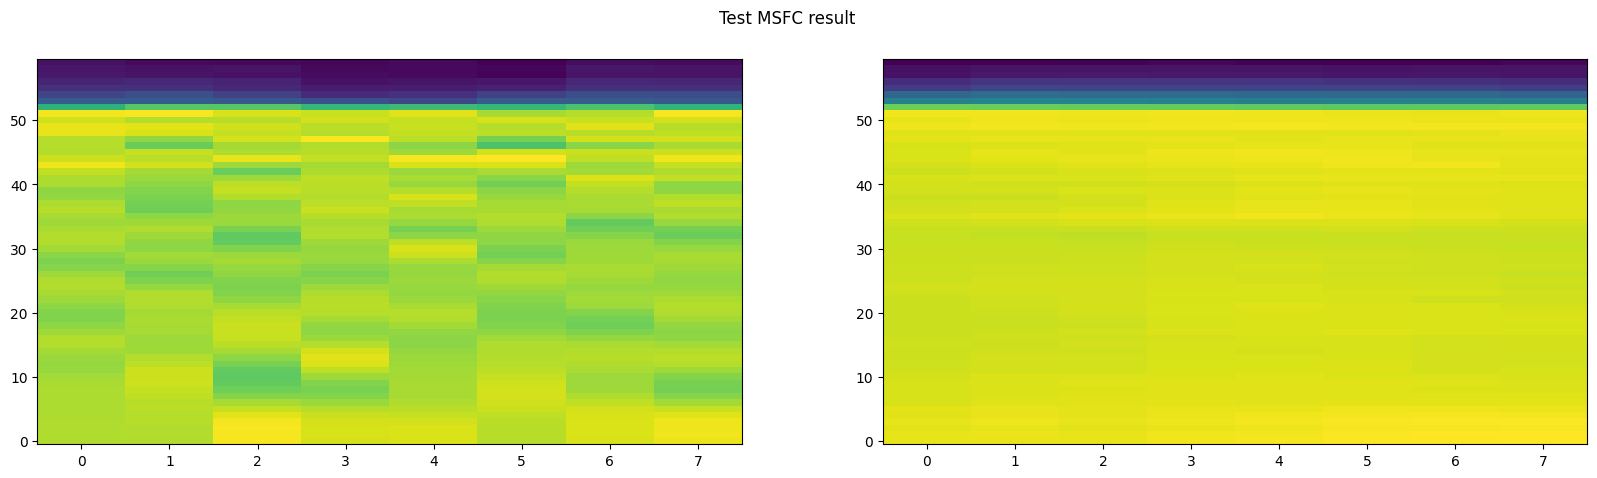

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 199it [00:52,  4.08it/s]

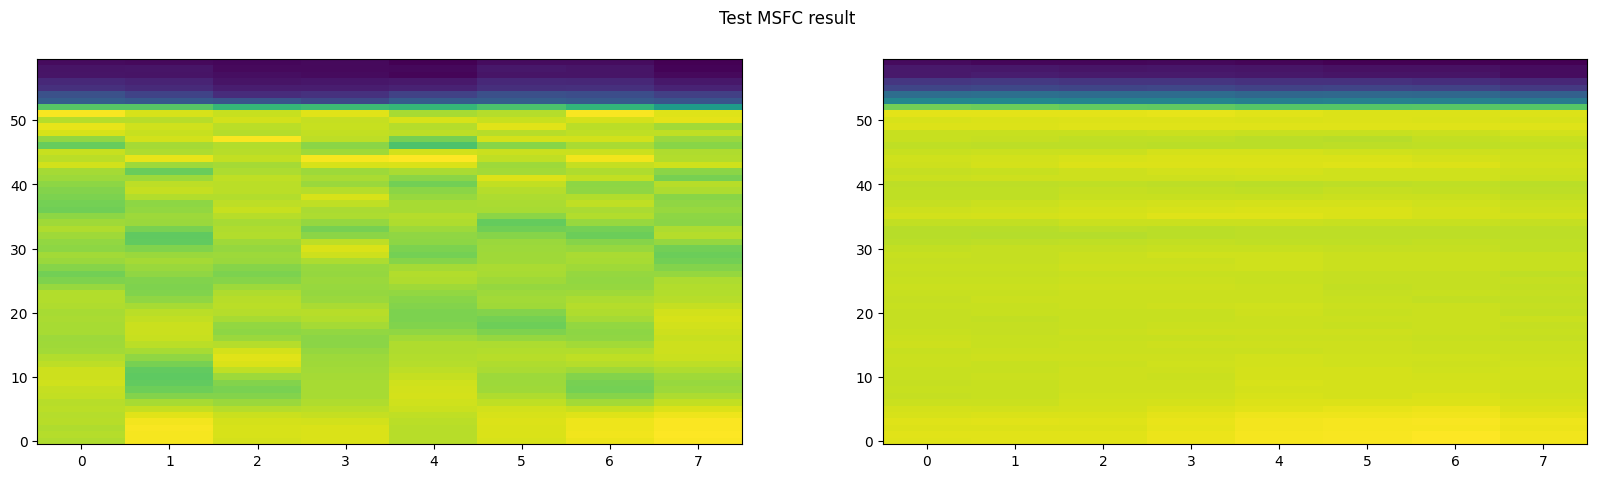

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 200it [00:52,  4.08it/s]

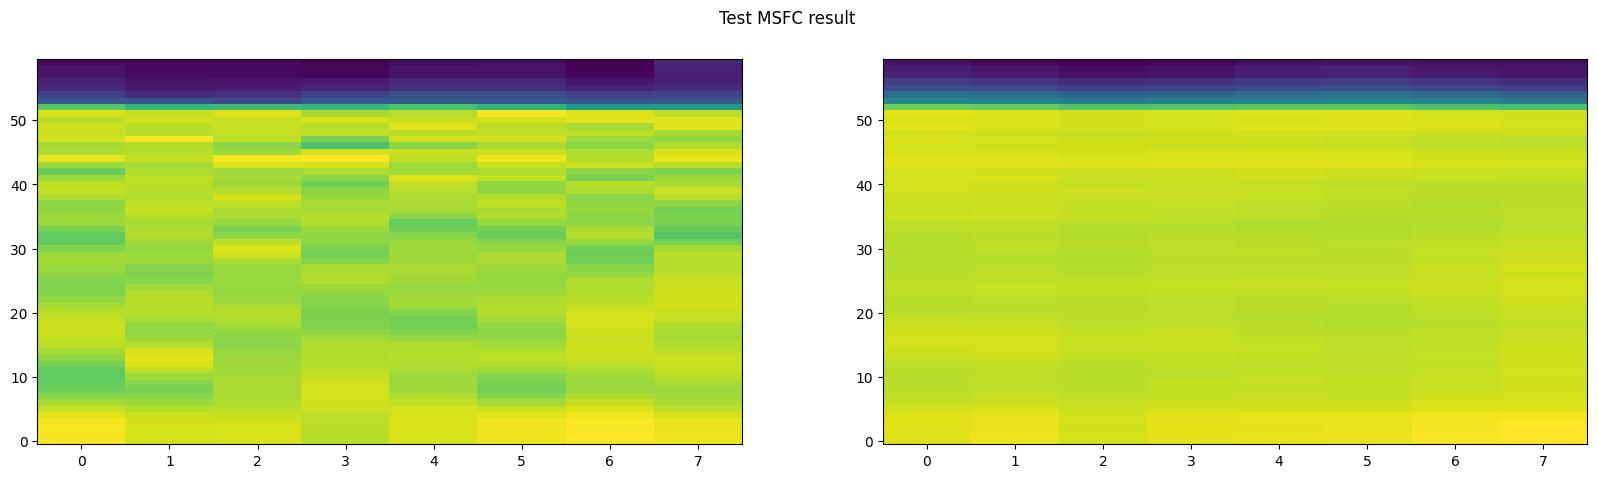

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 201it [00:52,  4.09it/s]

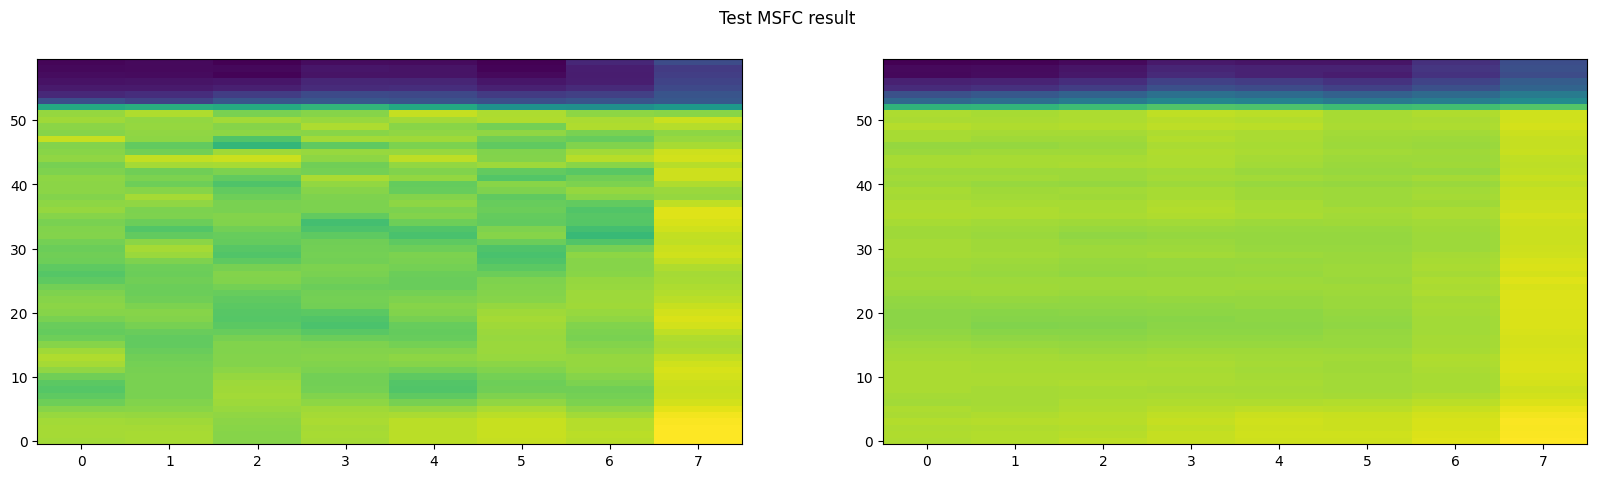

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 202it [00:53,  4.09it/s]

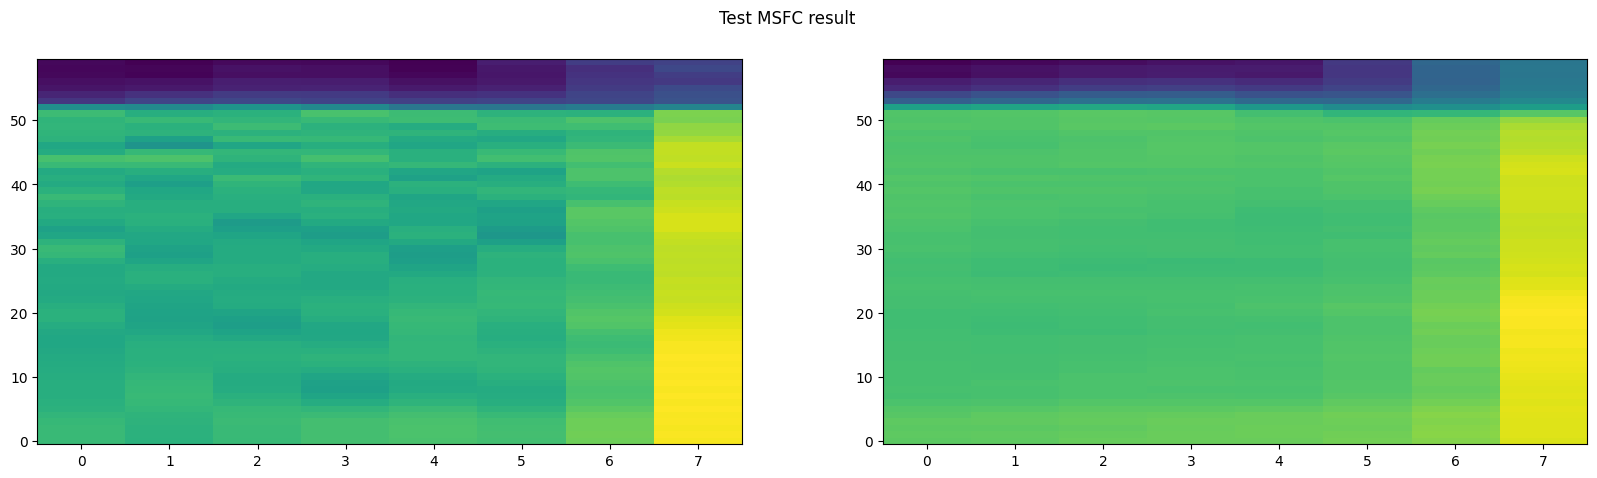

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 203it [00:53,  4.10it/s]

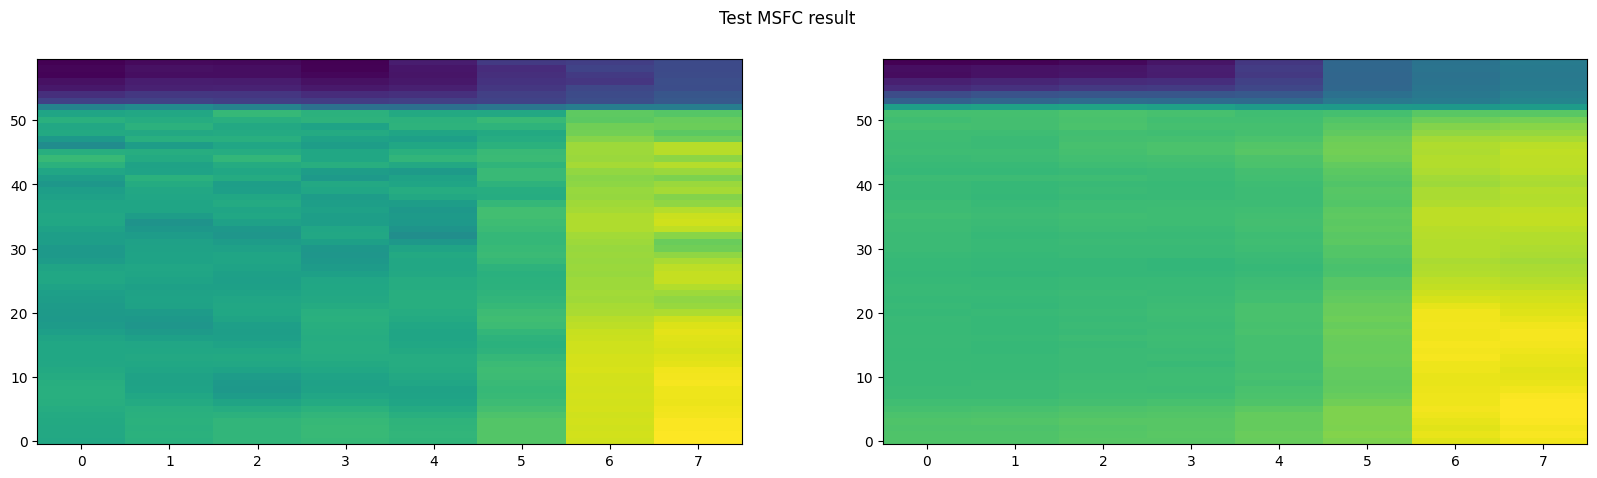

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 204it [00:53,  4.10it/s]

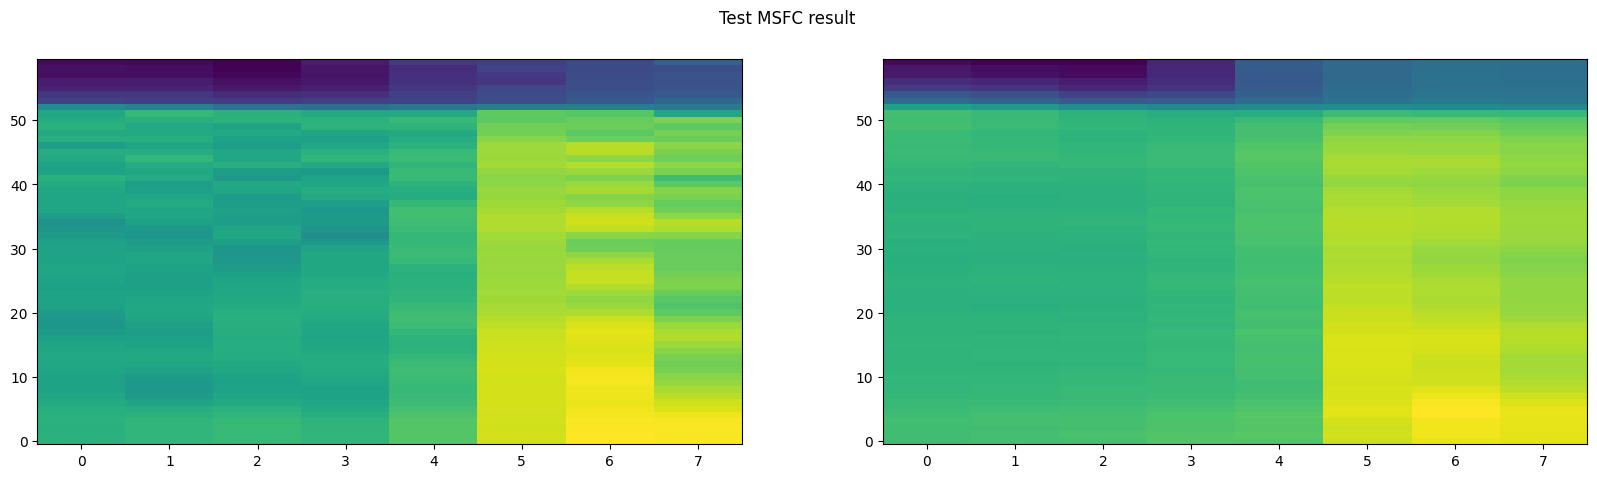

Training. Epoch: 1. Loss for step 7967: 4633.182794570923: 205it [00:54,  3.79it/s]


KeyboardInterrupt: 

In [17]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from models.VAEDenoiser import SPDenoiser
from preprocess import code_harmonic

def normalize1(noisy_file):
    noisy_file = torch.from_numpy(noisy_file)

    sp_min = torch.min(noisy_file)

    sp_max = torch.max(noisy_file)

    clean_file = (noisy_file - sp_min) / (sp_max - sp_min) - 0.5


    return clean_file, sp_min, sp_max
spdenoiser.eval()
testfile = np.load("./traindataset/sp/common_voice_en_34919242.mp3_sp.npy").astype(np.float32)
realcleanfile = np.load("./traindataset/csp/common_voice_en_34919242.mp3_sp.npy").astype(np.float32)


sptestdataloader = DataLoader(spdataset, batch_size=1, shuffle=False, pin_memory = False)

x = next(iter(sptestdataloader))
x = next(iter(sptestdataloader))
x = next(iter(sptestdataloader))
# x = next(iter(sptestdataloader))

device='cuda'

# Model hyperparameters
filters = (512, 256, 128, 64, 32)
kernels = (3, 3, 3, 3, 3)
strides = (2, 2, 2, 2, 1)
output_pads = (1, 1, (0,1), 1, 0)
latent_space_dim = 128

testsamples = []

testfile, minny, maxy = normalize1(testfile)
spdenoiser.eval()

cleansamples = []
i = 0
while i < len(testfile) - 256:
    testsamples.append(testfile[i:i+256])
    cleansamples.append(realcleanfile[i:i+256])
    i += 1

print(np.shape(cleansamples[0][-1:]))
cleanfile = np.zeros((0,60))
realclean = np.zeros((0,60))
print(cleanfile)
k = 0



sample = testsamples[1].transpose(0,1).unsqueeze(0).unsqueeze(0).to('cuda')
print(sample.size())
output, mu, var = spdenoiser(x.to('cuda'))
print(output.size())
# for sample in testsamples:
#     sample = torch.from_numpy(sample).transpose(0,1).unsqueeze(0).unsqueeze(0).to('cuda')
#     output = spdenoiser(sample.type(torch.FloatTensor).to('cuda'))
#     # print(output.size())
#     output = output.squeeze(0).squeeze(0).transpose(0,1).cpu().detach().numpy()
#     realclean = np.concatenate((realclean, cleansamples[k][-1:]), axis=0)
#     # print('Output size: ', np.shape(output))
#     cleanfile = np.concatenate((cleanfile, output), axis=0)
#     # print('Cleanfile shape: ', np.shape(cleanfile))
#     k += 1
#     exit()


cleanfile, _, __ = normalize1(realcleanfile)
output = output.squeeze().squeeze()
print(output.size())

plt.pcolormesh(output.detach().cpu().numpy())
plt.title("Denoised Coded SP")
plt.show()

x = next(iter(sptestdataloader))
plt.pcolormesh(x.squeeze().detach().cpu().numpy())
plt.title("Noisy Coded SP")
plt.show()

x = next(iter(sptestdataloader))
x = next(iter(sptestdataloader))
x = next(iter(sptestdataloader))
x = next(iter(sptestdataloader))
plt.pcolormesh(x.squeeze().detach().cpu().numpy())
plt.title("Noisy Coded SP")
plt.show()

q = 0
with tqdm(enumerate(sptestdataloader),total=2,desc=f"Training. Epoch: {epoch}. Loss for step {step}: {lossy}") as t:
        for batch_idx, (x) in t:
            x_hat, _, _ = spdenoiser(x.to('cuda'))
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
            fig.suptitle("Test MSFC result")
            ax1.imshow(x.squeeze().detach().cpu().numpy(), aspect='auto', origin='lower', interpolation='none')
            ax2.imshow(x_hat.squeeze().detach().cpu().numpy(), aspect='auto', origin='lower', interpolation='none')
            plt.show()


# plt.pcolormesh(y.squeeze().detach().cpu().numpy())
# plt.title("Clean Coded SP")
# plt.show()




In [14]:
sample = (generated.cpu().numpy().astype(np.double)+0.5) * (mx.detach().cpu().numpy() - mn.detach().cpu().numpy()) + mn.detach().cpu().numpy()
# og = (y.astype(np.double)+0.5) * (mx - mn) + mn
connie = (condition.cpu().numpy().astype(np.double)+0.5) * (mx.detach().cpu().numpy() - mn.detach().cpu().numpy()) + mn.detach().cpu().numpy()
# og = np.ndarray.transpose(og, (1,0))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle("Test MSFC result")
ax1.imshow(condition, aspect='auto', origin='lower', interpolation='none')
ax2.imshow(sample, aspect='auto', origin='lower', interpolation='none')
# ax3.imshow(og, aspect='auto', origin='lower', interpolation='none')
# ax4.imshow(sample - np.ndarray.transpose(conditionClean, (1,0)), aspect='auto', origin='lower', interpolation='none')
# ax5.imshow(connie - np.ndarray.transpose(conditionClean, (1,0)), aspect='auto', origin='lower', interpolation='none')

plt.show()

NameError: name 'generated' is not defined

(441, 1025)


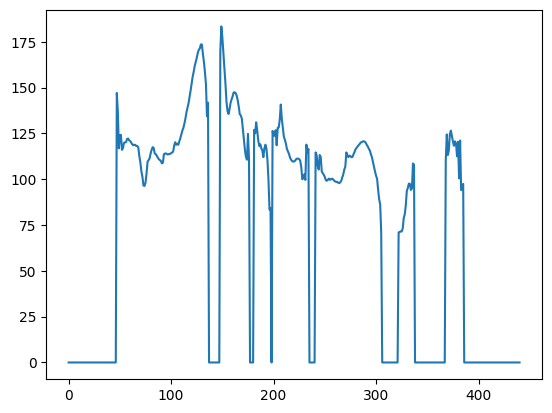

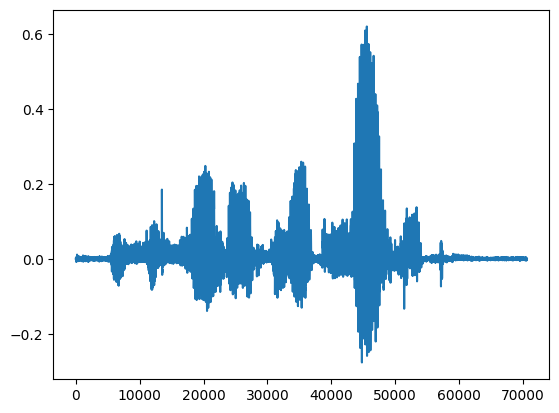

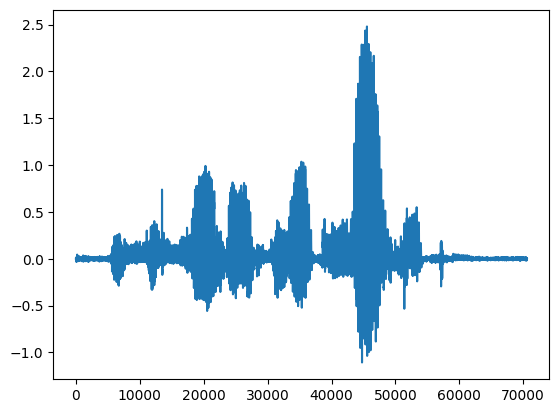

In [ ]:
# ap = np.ndarray.transpose(ap, (0,1))
print(np.shape(ap))
# vdata, vsamplerate = sf.read('H:/Downloads/DS_10283_1942/clean_trainset_wav/p227_249.wav')
# nf0, nsp, nap = pw.wav2world(vdata, vsamplerate)
# _f0, t = pw.dio(vdata, vsamplerate) 
audio = pw.synthesize(np.ascontiguousarray(f0), np.ascontiguousarray(decode_harmonic(np.ndarray.transpose(sample, (1,0)), 2048)), np.ascontiguousarray(ap), 32000)
# audio = pw.synthesize(np.ascontiguousarray(f0), np.ascontiguousarray(decode_harmonic(conditionClean, 2048)), np.ascontiguousarray(ap), 32000)

plt.plot(f0)
plt.show()

# plt.plot(_f0)
# plt.show()

plt.plot(audio)
plt.show()

audio  = audio * 4

plt.plot(audio)
plt.show()

IPython.display.display(IPython.display.Audio(audio, rate=32000))
sf.write("./npsstest.wav", audio, 32000)

In [ ]:
from diffwave.inference import predict as diffwave_predict
from preprocess import code_harmonic

model_dir = 'H:/Downloads/diffwave-ljspeech-22kHz-1000578 (2).pt'
spectrogram = decode_harmonic(np.ndarray.transpose(sample, (1,0)), 2048).astype(np.float32)
spectrogram = torch.from_numpy(np.ndarray.transpose(code_harmonic(spectrogram, 80), (1,0))).type(torch.FloatTensor)
print(spectrogram.size())
audio, sample_rate = diffwave_predict(spectrogram, model_dir)

torch.Size([80, 774])


torch.Size([1, 198144])


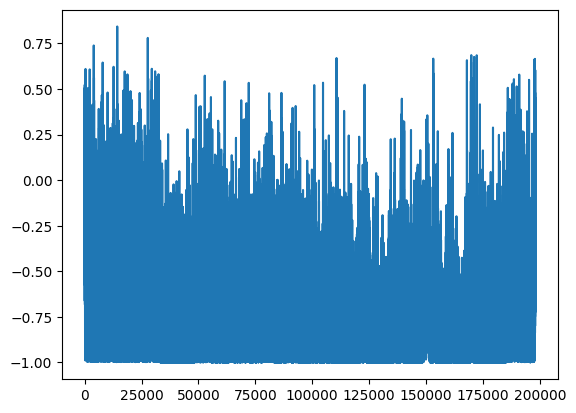

In [ ]:
print(audio.size())
plt.plot(np.squeeze(audio.detach().cpu().numpy()) )
plt.show()

IPython.display.display(IPython.display.Audio(audio.detach().cpu().numpy(), rate=sample_rate))
sf.write("./npsstest2.wav", np.squeeze(audio.detach().cpu().numpy()), sample_rate)